# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper
import os
from glob import glob
helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

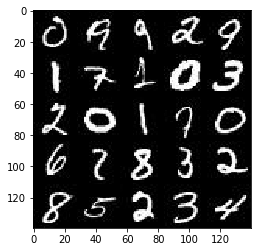

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

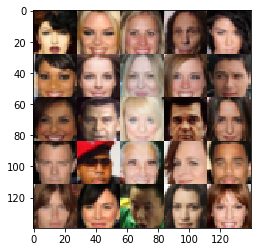

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
   
    learn_rate=tf.placeholder(tf.float32)
    input_real=tf.placeholder(tf.float32,(None,image_width,image_height,image_channels))
    input_z=tf.placeholder(tf.float32,(None,z_dim))
    return input_real, input_z, learn_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

tests.test_model_inputs(model_inputs)


Tests Passed


### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [47]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """

    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
   
        alpha=0.01

        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
      
        x1=tf.maximum(alpha*x1,x1)

        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same')
        x2=tf.maximum(alpha*x2,x2)
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same')
        x3=tf.maximum(alpha*x3,x3)
    
        
     
       
        
        # Flatten it
        flat = tf.reshape(x3, (-1, 131072))

        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)

     
        
        return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [48]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=(not is_train)):
        alpha=0.01

        x1=tf.layers.dense(z,28*28*768)

        x1=tf.reshape(x1,(-1,28,28,768))
        
        
        
        x9 = tf.layers.conv2d_transpose(x1, 384,1, strides=1, padding='same')
        x9=tf.maximum(alpha*x9,x9)
        
        x7 = tf.layers.conv2d_transpose(x9, 192,1, strides=1, padding='same')
        x7=tf.maximum(alpha*x7,x7)
        
 
        
        x5 = tf.layers.conv2d_transpose(x7, 96,1, strides=1, padding='same')
        x5=tf.maximum(alpha*x5,x5)
        
        x6 = tf.layers.conv2d_transpose(x5, 48,1, strides=1, padding='same')
        x6=tf.maximum(alpha*x6,x6)
        
        x2 = tf.layers.conv2d_transpose(x6, 24,1, strides=1, padding='same')
        x2=tf.maximum(alpha*x2,x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 12,1, strides=1, padding='same')
        x3=tf.maximum(alpha*x3,x3)
        
        x4 = tf.layers.conv2d_transpose(x3, 6,1, strides=1, padding='same')
        x4=tf.maximum(alpha*x4,x4)

        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 1, strides=1, padding='same')
        
        output = tf.tanh(logits)
        
        return output

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [49]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [50]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [51]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [52]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
  


    input_real, input_z,lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    d_loss, g_loss = model_loss(input_real,input_z,data_shape[3])

    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
        
 
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):     
                batch_images=batch_images*2
                steps += 1


                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))             
                _ = sess.run(d_opt, feed_dict={input_real: batch_images,input_z: batch_z,lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images,input_z: batch_z,lr:learning_rate})
             # At the end of each epoch, get the losses and print them out
                train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                train_loss_g = g_loss.eval({input_z: batch_z, input_real: batch_images})
                print("Epoch {}/{}...".format(epoch_i+1, epochs),
                      "Discriminator Loss: {:.4f}...".format(train_loss_d),
                      "Generator Loss: {:.4f}".format(train_loss_g))    
                      
                if steps % 100 == 0 or train_loss_g<0.1:
                    show_generator_output(sess, 1, input_z, data_shape[3], data_image_mode)   


### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

Epoch 1/2... Discriminator Loss: 0.7518... Generator Loss: 0.6808
Epoch 1/2... Discriminator Loss: 0.8023... Generator Loss: 0.5948
Epoch 1/2... Discriminator Loss: 1.0173... Generator Loss: 0.4487
Epoch 1/2... Discriminator Loss: 0.6206... Generator Loss: 0.8496
Epoch 1/2... Discriminator Loss: 0.7812... Generator Loss: 0.6122
Epoch 1/2... Discriminator Loss: 0.4531... Generator Loss: 1.0097
Epoch 1/2... Discriminator Loss: 2.5403... Generator Loss: 1.9318
Epoch 1/2... Discriminator Loss: 2.5732... Generator Loss: 0.0794


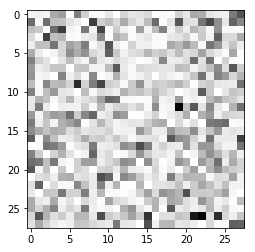

Epoch 1/2... Discriminator Loss: 14.0181... Generator Loss: 0.0000


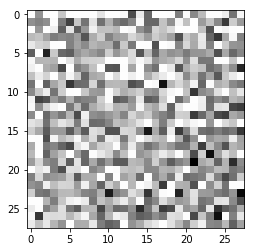

Epoch 1/2... Discriminator Loss: 4.8145... Generator Loss: 0.0081


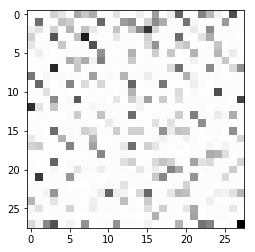

Epoch 1/2... Discriminator Loss: 5.4233... Generator Loss: 1.9543
Epoch 1/2... Discriminator Loss: 0.6128... Generator Loss: 0.7811
Epoch 1/2... Discriminator Loss: 0.7556... Generator Loss: 0.6344
Epoch 1/2... Discriminator Loss: 0.6368... Generator Loss: 0.7531
Epoch 1/2... Discriminator Loss: 0.2536... Generator Loss: 1.5058
Epoch 1/2... Discriminator Loss: 1.1426... Generator Loss: 0.3875
Epoch 1/2... Discriminator Loss: 10.2020... Generator Loss: 0.0233


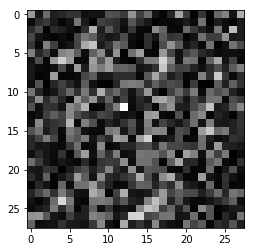

Epoch 1/2... Discriminator Loss: 2.4301... Generator Loss: 0.0921


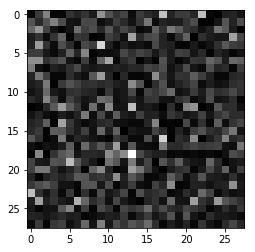

Epoch 1/2... Discriminator Loss: 3.8940... Generator Loss: 1.4718
Epoch 1/2... Discriminator Loss: 0.3290... Generator Loss: 1.2716
Epoch 1/2... Discriminator Loss: 0.4027... Generator Loss: 1.1041
Epoch 1/2... Discriminator Loss: 1.0337... Generator Loss: 0.4395
Epoch 1/2... Discriminator Loss: 0.4800... Generator Loss: 0.9643
Epoch 1/2... Discriminator Loss: 0.0508... Generator Loss: 3.0045
Epoch 1/2... Discriminator Loss: 0.0205... Generator Loss: 3.8969
Epoch 1/2... Discriminator Loss: 0.0024... Generator Loss: 6.0444
Epoch 1/2... Discriminator Loss: 0.0021... Generator Loss: 6.1728
Epoch 1/2... Discriminator Loss: 0.0019... Generator Loss: 6.2529
Epoch 1/2... Discriminator Loss: 0.0220... Generator Loss: 3.8268
Epoch 1/2... Discriminator Loss: 0.1535... Generator Loss: 1.9497
Epoch 1/2... Discriminator Loss: 0.7809... Generator Loss: 0.6125
Epoch 1/2... Discriminator Loss: 0.4337... Generator Loss: 1.0443
Epoch 1/2... Discriminator Loss: 0.3042... Generator Loss: 1.3383
Epoch 1/2.

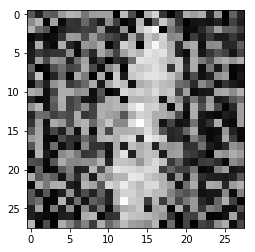

Epoch 1/2... Discriminator Loss: 0.2319... Generator Loss: 1.5750
Epoch 1/2... Discriminator Loss: 0.0586... Generator Loss: 2.8673
Epoch 1/2... Discriminator Loss: 0.6984... Generator Loss: 0.6951
Epoch 1/2... Discriminator Loss: 1.5784... Generator Loss: 0.2399
Epoch 1/2... Discriminator Loss: 7.3519... Generator Loss: 0.0006


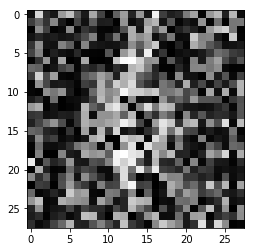

Epoch 1/2... Discriminator Loss: 49.6677... Generator Loss: 39.8331
Epoch 1/2... Discriminator Loss: 10.2955... Generator Loss: 12.8787
Epoch 1/2... Discriminator Loss: 0.8399... Generator Loss: 2.3377
Epoch 1/2... Discriminator Loss: 1.1685... Generator Loss: 0.3851
Epoch 1/2... Discriminator Loss: 0.9088... Generator Loss: 0.5384
Epoch 1/2... Discriminator Loss: 0.7471... Generator Loss: 0.6828
Epoch 1/2... Discriminator Loss: 0.6624... Generator Loss: 0.8384
Epoch 1/2... Discriminator Loss: 0.4573... Generator Loss: 1.1350
Epoch 1/2... Discriminator Loss: 0.3961... Generator Loss: 1.3437
Epoch 1/2... Discriminator Loss: 0.2751... Generator Loss: 1.6709
Epoch 1/2... Discriminator Loss: 0.1699... Generator Loss: 2.1235
Epoch 1/2... Discriminator Loss: 0.1378... Generator Loss: 2.2739
Epoch 1/2... Discriminator Loss: 0.1120... Generator Loss: 2.4467
Epoch 1/2... Discriminator Loss: 0.0587... Generator Loss: 3.1241
Epoch 1/2... Discriminator Loss: 0.0597... Generator Loss: 3.0836
Epoch 

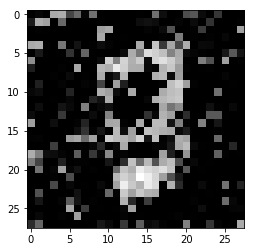

Epoch 1/2... Discriminator Loss: 2.0626... Generator Loss: 0.1360
Epoch 1/2... Discriminator Loss: 0.3412... Generator Loss: 1.2416
Epoch 1/2... Discriminator Loss: 0.1411... Generator Loss: 2.6506
Epoch 1/2... Discriminator Loss: 0.2110... Generator Loss: 2.2613
Epoch 1/2... Discriminator Loss: 0.1551... Generator Loss: 2.2043
Epoch 1/2... Discriminator Loss: 0.2337... Generator Loss: 1.7272
Epoch 1/2... Discriminator Loss: 0.5884... Generator Loss: 0.8120
Epoch 1/2... Discriminator Loss: 0.5813... Generator Loss: 0.8616
Epoch 1/2... Discriminator Loss: 1.7204... Generator Loss: 2.8389
Epoch 1/2... Discriminator Loss: 0.4600... Generator Loss: 2.3674
Epoch 1/2... Discriminator Loss: 0.3044... Generator Loss: 1.5423
Epoch 1/2... Discriminator Loss: 1.6456... Generator Loss: 0.2202
Epoch 1/2... Discriminator Loss: 0.8795... Generator Loss: 0.6062
Epoch 1/2... Discriminator Loss: 0.5856... Generator Loss: 1.0511
Epoch 1/2... Discriminator Loss: 1.5275... Generator Loss: 0.2932
Epoch 1/2.

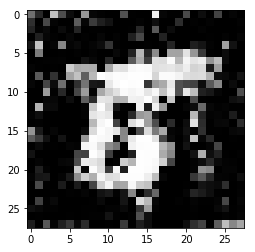

Epoch 1/2... Discriminator Loss: 2.0028... Generator Loss: 2.8859


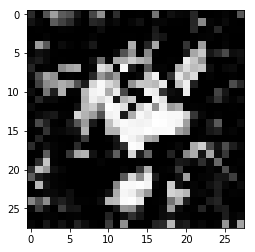

Epoch 1/2... Discriminator Loss: 0.6116... Generator Loss: 0.8871
Epoch 1/2... Discriminator Loss: 2.9358... Generator Loss: 0.0548


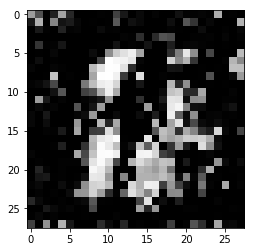

Epoch 1/2... Discriminator Loss: 2.0276... Generator Loss: 3.4961
Epoch 1/2... Discriminator Loss: 2.5073... Generator Loss: 0.0852


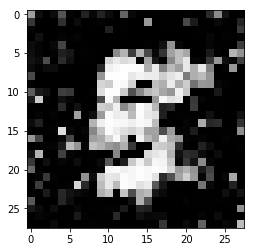

Epoch 1/2... Discriminator Loss: 1.2661... Generator Loss: 0.3549
Epoch 1/2... Discriminator Loss: 0.6030... Generator Loss: 1.9235
Epoch 1/2... Discriminator Loss: 1.3369... Generator Loss: 0.3136
Epoch 1/2... Discriminator Loss: 1.2461... Generator Loss: 0.3473
Epoch 1/2... Discriminator Loss: 0.5166... Generator Loss: 1.6892
Epoch 1/2... Discriminator Loss: 0.4976... Generator Loss: 1.0024
Epoch 1/2... Discriminator Loss: 1.2292... Generator Loss: 0.3542
Epoch 1/2... Discriminator Loss: 0.3779... Generator Loss: 2.5195
Epoch 1/2... Discriminator Loss: 1.0835... Generator Loss: 0.4180
Epoch 1/2... Discriminator Loss: 0.9730... Generator Loss: 0.4800
Epoch 1/2... Discriminator Loss: 0.6317... Generator Loss: 0.8017
Epoch 1/2... Discriminator Loss: 0.4117... Generator Loss: 1.4609
Epoch 1/2... Discriminator Loss: 3.9940... Generator Loss: 0.0186


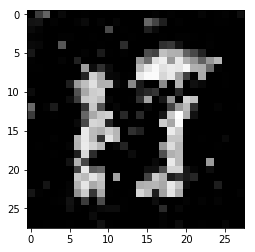

Epoch 1/2... Discriminator Loss: 9.0083... Generator Loss: 12.2646
Epoch 1/2... Discriminator Loss: 0.4336... Generator Loss: 1.0817
Epoch 1/2... Discriminator Loss: 1.1251... Generator Loss: 0.3979
Epoch 1/2... Discriminator Loss: 0.7628... Generator Loss: 0.7377
Epoch 1/2... Discriminator Loss: 0.6642... Generator Loss: 1.2856
Epoch 1/2... Discriminator Loss: 0.3292... Generator Loss: 1.9158
Epoch 1/2... Discriminator Loss: 0.5364... Generator Loss: 1.1182
Epoch 1/2... Discriminator Loss: 0.5727... Generator Loss: 0.9500
Epoch 1/2... Discriminator Loss: 0.5052... Generator Loss: 1.0354
Epoch 1/2... Discriminator Loss: 0.5375... Generator Loss: 1.3188
Epoch 1/2... Discriminator Loss: 0.4573... Generator Loss: 1.1698
Epoch 1/2... Discriminator Loss: 0.5258... Generator Loss: 1.0271
Epoch 1/2... Discriminator Loss: 0.3945... Generator Loss: 1.2491
Epoch 1/2... Discriminator Loss: 0.4255... Generator Loss: 1.1593
Epoch 1/2... Discriminator Loss: 0.3370... Generator Loss: 1.5015
Epoch 1/2

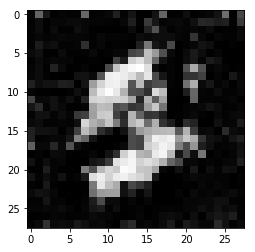

Epoch 1/2... Discriminator Loss: 0.3278... Generator Loss: 1.5782
Epoch 1/2... Discriminator Loss: 0.7698... Generator Loss: 2.7609
Epoch 1/2... Discriminator Loss: 0.4018... Generator Loss: 1.4112
Epoch 1/2... Discriminator Loss: 0.9593... Generator Loss: 0.5220
Epoch 1/2... Discriminator Loss: 0.5419... Generator Loss: 0.9160
Epoch 1/2... Discriminator Loss: 0.6900... Generator Loss: 0.8177
Epoch 1/2... Discriminator Loss: 0.3804... Generator Loss: 1.3962
Epoch 1/2... Discriminator Loss: 0.3407... Generator Loss: 1.4203
Epoch 1/2... Discriminator Loss: 0.7552... Generator Loss: 0.7175
Epoch 1/2... Discriminator Loss: 0.2432... Generator Loss: 1.8065
Epoch 1/2... Discriminator Loss: 0.5791... Generator Loss: 0.8777
Epoch 1/2... Discriminator Loss: 0.5156... Generator Loss: 1.0611
Epoch 1/2... Discriminator Loss: 0.3618... Generator Loss: 1.6085
Epoch 1/2... Discriminator Loss: 0.3439... Generator Loss: 1.2821
Epoch 1/2... Discriminator Loss: 0.7975... Generator Loss: 0.6243
Epoch 1/2.

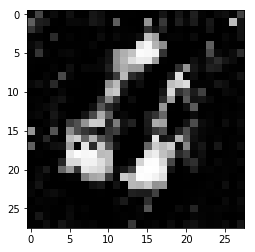

Epoch 1/2... Discriminator Loss: 0.3588... Generator Loss: 2.6982
Epoch 1/2... Discriminator Loss: 0.7511... Generator Loss: 3.7388
Epoch 1/2... Discriminator Loss: 0.2561... Generator Loss: 1.5772
Epoch 1/2... Discriminator Loss: 1.3543... Generator Loss: 0.3069
Epoch 1/2... Discriminator Loss: 0.4572... Generator Loss: 1.1119
Epoch 1/2... Discriminator Loss: 0.2699... Generator Loss: 2.5960
Epoch 1/2... Discriminator Loss: 0.2634... Generator Loss: 2.2519
Epoch 1/2... Discriminator Loss: 0.4565... Generator Loss: 1.0329
Epoch 1/2... Discriminator Loss: 0.6822... Generator Loss: 0.7156
Epoch 1/2... Discriminator Loss: 0.4042... Generator Loss: 1.2083
Epoch 1/2... Discriminator Loss: 0.2108... Generator Loss: 1.8307
Epoch 1/2... Discriminator Loss: 0.2210... Generator Loss: 1.8224
Epoch 1/2... Discriminator Loss: 1.2289... Generator Loss: 0.3527
Epoch 1/2... Discriminator Loss: 0.9149... Generator Loss: 0.5169
Epoch 1/2... Discriminator Loss: 0.3654... Generator Loss: 1.6532
Epoch 1/2.

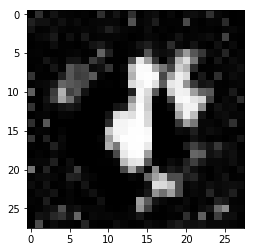

Epoch 1/2... Discriminator Loss: 0.5903... Generator Loss: 1.8268
Epoch 1/2... Discriminator Loss: 1.8971... Generator Loss: 0.1627
Epoch 1/2... Discriminator Loss: 0.4467... Generator Loss: 1.4183
Epoch 1/2... Discriminator Loss: 0.4140... Generator Loss: 1.4430
Epoch 1/2... Discriminator Loss: 0.2300... Generator Loss: 1.8782
Epoch 1/2... Discriminator Loss: 3.1185... Generator Loss: 0.0453


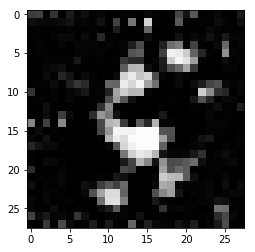

Epoch 1/2... Discriminator Loss: 0.6629... Generator Loss: 0.7820
Epoch 1/2... Discriminator Loss: 0.5812... Generator Loss: 0.9854
Epoch 1/2... Discriminator Loss: 1.7396... Generator Loss: 0.1985
Epoch 1/2... Discriminator Loss: 1.3611... Generator Loss: 0.3005
Epoch 1/2... Discriminator Loss: 0.8179... Generator Loss: 0.5877
Epoch 1/2... Discriminator Loss: 2.0894... Generator Loss: 0.1350
Epoch 1/2... Discriminator Loss: 0.6246... Generator Loss: 0.9327
Epoch 1/2... Discriminator Loss: 0.6359... Generator Loss: 0.7775
Epoch 1/2... Discriminator Loss: 0.9275... Generator Loss: 0.5089
Epoch 1/2... Discriminator Loss: 0.6300... Generator Loss: 0.8169
Epoch 1/2... Discriminator Loss: 1.6793... Generator Loss: 0.2071
Epoch 1/2... Discriminator Loss: 2.0384... Generator Loss: 3.6063
Epoch 1/2... Discriminator Loss: 2.4626... Generator Loss: 0.0891


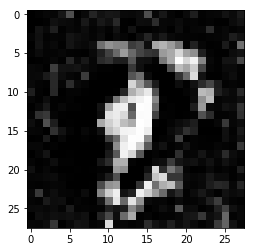

Epoch 1/2... Discriminator Loss: 2.5518... Generator Loss: 0.0812


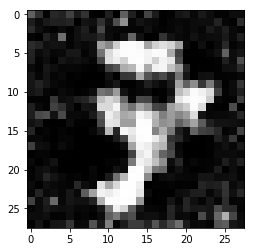

Epoch 1/2... Discriminator Loss: 0.1286... Generator Loss: 2.5302
Epoch 1/2... Discriminator Loss: 0.1601... Generator Loss: 2.4744
Epoch 1/2... Discriminator Loss: 1.8313... Generator Loss: 0.1750
Epoch 1/2... Discriminator Loss: 2.4109... Generator Loss: 0.0941


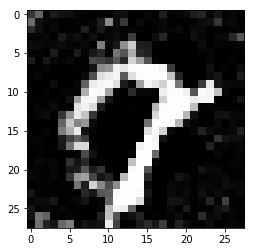

Epoch 1/2... Discriminator Loss: 0.3414... Generator Loss: 1.2620
Epoch 1/2... Discriminator Loss: 0.1511... Generator Loss: 2.2665
Epoch 1/2... Discriminator Loss: 0.1946... Generator Loss: 1.7894
Epoch 1/2... Discriminator Loss: 4.5388... Generator Loss: 0.0107


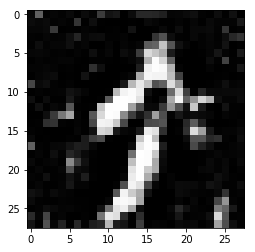

Epoch 1/2... Discriminator Loss: 0.1111... Generator Loss: 2.3823
Epoch 1/2... Discriminator Loss: 0.1631... Generator Loss: 2.6681
Epoch 1/2... Discriminator Loss: 0.2499... Generator Loss: 1.5258
Epoch 1/2... Discriminator Loss: 1.1266... Generator Loss: 0.3927
Epoch 1/2... Discriminator Loss: 1.4198... Generator Loss: 0.2803
Epoch 1/2... Discriminator Loss: 0.7006... Generator Loss: 0.7062
Epoch 1/2... Discriminator Loss: 1.5267... Generator Loss: 0.2565
Epoch 1/2... Discriminator Loss: 0.2114... Generator Loss: 1.6699
Epoch 1/2... Discriminator Loss: 0.4977... Generator Loss: 0.9474
Epoch 1/2... Discriminator Loss: 0.8505... Generator Loss: 0.5613
Epoch 1/2... Discriminator Loss: 3.5119... Generator Loss: 0.0303


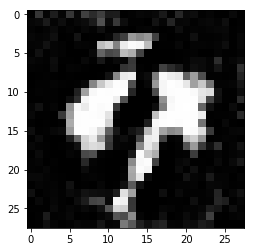

Epoch 1/2... Discriminator Loss: 18.3107... Generator Loss: 18.4427
Epoch 1/2... Discriminator Loss: 3.7367... Generator Loss: 6.8231
Epoch 1/2... Discriminator Loss: 0.3034... Generator Loss: 2.4984
Epoch 1/2... Discriminator Loss: 0.9935... Generator Loss: 0.4659
Epoch 1/2... Discriminator Loss: 1.0688... Generator Loss: 0.4264
Epoch 1/2... Discriminator Loss: 0.5040... Generator Loss: 1.1365
Epoch 1/2... Discriminator Loss: 0.3837... Generator Loss: 1.7074
Epoch 1/2... Discriminator Loss: 0.2851... Generator Loss: 1.8145
Epoch 1/2... Discriminator Loss: 0.2655... Generator Loss: 1.8308
Epoch 1/2... Discriminator Loss: 0.3874... Generator Loss: 1.2852
Epoch 1/2... Discriminator Loss: 0.2354... Generator Loss: 1.6322
Epoch 1/2... Discriminator Loss: 0.2295... Generator Loss: 1.6170
Epoch 1/2... Discriminator Loss: 0.3289... Generator Loss: 1.3909
Epoch 1/2... Discriminator Loss: 0.4015... Generator Loss: 1.2186
Epoch 1/2... Discriminator Loss: 0.1856... Generator Loss: 2.0077
Epoch 1/

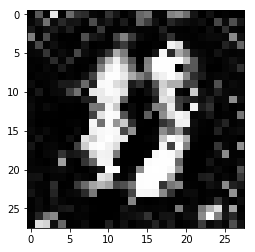

Epoch 1/2... Discriminator Loss: 0.0439... Generator Loss: 3.4092
Epoch 1/2... Discriminator Loss: 0.2852... Generator Loss: 3.7579
Epoch 1/2... Discriminator Loss: 0.0471... Generator Loss: 3.6892
Epoch 1/2... Discriminator Loss: 0.0590... Generator Loss: 3.0339
Epoch 1/2... Discriminator Loss: 0.0859... Generator Loss: 2.5220
Epoch 1/2... Discriminator Loss: 0.1756... Generator Loss: 1.8284
Epoch 1/2... Discriminator Loss: 0.2148... Generator Loss: 1.6449
Epoch 1/2... Discriminator Loss: 0.7248... Generator Loss: 0.6634
Epoch 1/2... Discriminator Loss: 0.5646... Generator Loss: 0.8472
Epoch 1/2... Discriminator Loss: 1.0153... Generator Loss: 0.4539
Epoch 1/2... Discriminator Loss: 0.1175... Generator Loss: 2.2417
Epoch 1/2... Discriminator Loss: 0.3332... Generator Loss: 1.3341
Epoch 1/2... Discriminator Loss: 0.4508... Generator Loss: 1.0355
Epoch 1/2... Discriminator Loss: 0.2797... Generator Loss: 1.4204
Epoch 1/2... Discriminator Loss: 0.4798... Generator Loss: 0.9808
Epoch 1/2.

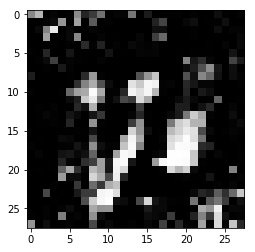

Epoch 1/2... Discriminator Loss: 1.7867... Generator Loss: 0.1834
Epoch 1/2... Discriminator Loss: 0.2655... Generator Loss: 1.4767
Epoch 1/2... Discriminator Loss: 1.1468... Generator Loss: 3.6809
Epoch 1/2... Discriminator Loss: 3.6643... Generator Loss: 0.0260


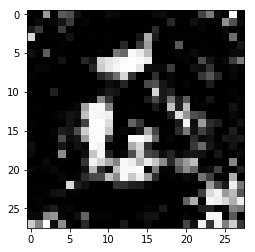

Epoch 1/2... Discriminator Loss: 3.4133... Generator Loss: 6.5792
Epoch 1/2... Discriminator Loss: 0.1019... Generator Loss: 2.3548
Epoch 1/2... Discriminator Loss: 0.4353... Generator Loss: 1.0438
Epoch 1/2... Discriminator Loss: 0.4775... Generator Loss: 0.9705
Epoch 1/2... Discriminator Loss: 0.4226... Generator Loss: 1.0723
Epoch 1/2... Discriminator Loss: 0.2936... Generator Loss: 1.3735
Epoch 1/2... Discriminator Loss: 0.2419... Generator Loss: 1.5791
Epoch 1/2... Discriminator Loss: 0.1776... Generator Loss: 1.9224
Epoch 1/2... Discriminator Loss: 0.0763... Generator Loss: 2.9999
Epoch 1/2... Discriminator Loss: 0.0672... Generator Loss: 2.9872
Epoch 1/2... Discriminator Loss: 0.1287... Generator Loss: 2.2084
Epoch 1/2... Discriminator Loss: 0.3312... Generator Loss: 1.3160
Epoch 1/2... Discriminator Loss: 0.2220... Generator Loss: 1.6382
Epoch 1/2... Discriminator Loss: 0.1630... Generator Loss: 1.9041
Epoch 1/2... Discriminator Loss: 0.2566... Generator Loss: 1.5066
Epoch 1/2.

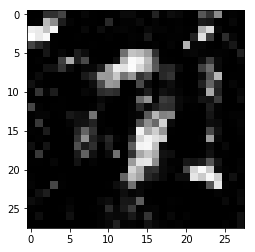

Epoch 1/2... Discriminator Loss: 0.1048... Generator Loss: 3.8926
Epoch 1/2... Discriminator Loss: 0.0922... Generator Loss: 4.5389
Epoch 1/2... Discriminator Loss: 4.8629... Generator Loss: 0.0078


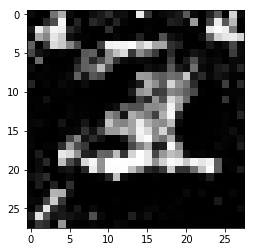

Epoch 1/2... Discriminator Loss: 0.0166... Generator Loss: 5.5348
Epoch 1/2... Discriminator Loss: 0.2627... Generator Loss: 7.1219
Epoch 1/2... Discriminator Loss: 5.6124... Generator Loss: 0.0037


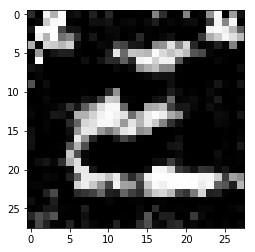

Epoch 1/2... Discriminator Loss: 4.5600... Generator Loss: 0.0105


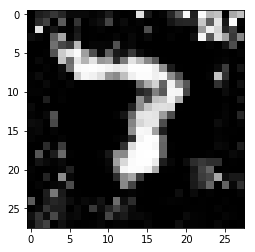

Epoch 1/2... Discriminator Loss: 0.0256... Generator Loss: 3.6783
Epoch 1/2... Discriminator Loss: 0.0177... Generator Loss: 4.4026
Epoch 1/2... Discriminator Loss: 0.0234... Generator Loss: 5.9330
Epoch 1/2... Discriminator Loss: 0.0104... Generator Loss: 5.9915
Epoch 1/2... Discriminator Loss: 0.0402... Generator Loss: 3.3522
Epoch 1/2... Discriminator Loss: 0.0491... Generator Loss: 3.0674
Epoch 1/2... Discriminator Loss: 1.1363... Generator Loss: 0.3887
Epoch 1/2... Discriminator Loss: 1.4244... Generator Loss: 0.2761
Epoch 1/2... Discriminator Loss: 1.3726... Generator Loss: 0.2924
Epoch 1/2... Discriminator Loss: 0.1696... Generator Loss: 1.9677
Epoch 1/2... Discriminator Loss: 1.3587... Generator Loss: 0.2971
Epoch 1/2... Discriminator Loss: 0.5054... Generator Loss: 0.9254
Epoch 1/2... Discriminator Loss: 0.8645... Generator Loss: 0.5529
Epoch 1/2... Discriminator Loss: 1.7838... Generator Loss: 0.1855
Epoch 1/2... Discriminator Loss: 0.2422... Generator Loss: 1.5530
Epoch 1/2.

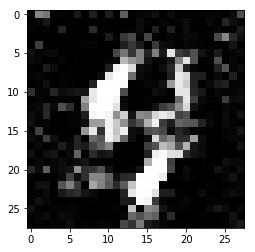

Epoch 1/2... Discriminator Loss: 3.4256... Generator Loss: 9.6276
Epoch 1/2... Discriminator Loss: 0.0079... Generator Loss: 5.0589
Epoch 1/2... Discriminator Loss: 0.4815... Generator Loss: 0.9622
Epoch 1/2... Discriminator Loss: 2.7522... Generator Loss: 0.0659


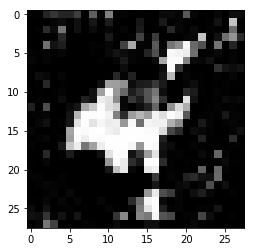

Epoch 1/2... Discriminator Loss: 0.0839... Generator Loss: 2.7049
Epoch 1/2... Discriminator Loss: 0.0720... Generator Loss: 3.1149
Epoch 1/2... Discriminator Loss: 0.1042... Generator Loss: 2.4838
Epoch 1/2... Discriminator Loss: 0.1081... Generator Loss: 2.2973
Epoch 1/2... Discriminator Loss: 0.1044... Generator Loss: 2.3405
Epoch 1/2... Discriminator Loss: 0.2141... Generator Loss: 1.6540
Epoch 1/2... Discriminator Loss: 0.1544... Generator Loss: 1.9997
Epoch 1/2... Discriminator Loss: 0.2051... Generator Loss: 1.7078
Epoch 1/2... Discriminator Loss: 0.1614... Generator Loss: 1.9296
Epoch 1/2... Discriminator Loss: 0.1265... Generator Loss: 2.1336
Epoch 1/2... Discriminator Loss: 0.0355... Generator Loss: 3.4457
Epoch 1/2... Discriminator Loss: 0.3516... Generator Loss: 1.2477
Epoch 1/2... Discriminator Loss: 0.2844... Generator Loss: 1.4575
Epoch 1/2... Discriminator Loss: 0.2052... Generator Loss: 1.6897
Epoch 1/2... Discriminator Loss: 0.3217... Generator Loss: 1.2931
Epoch 1/2.

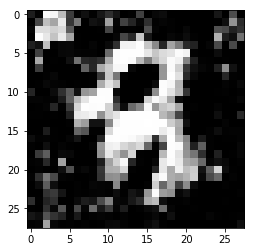

Epoch 1/2... Discriminator Loss: 0.2642... Generator Loss: 1.4805
Epoch 1/2... Discriminator Loss: 0.4170... Generator Loss: 1.1392
Epoch 1/2... Discriminator Loss: 0.3584... Generator Loss: 1.2345
Epoch 1/2... Discriminator Loss: 0.1688... Generator Loss: 1.8979
Epoch 1/2... Discriminator Loss: 0.0902... Generator Loss: 2.4940
Epoch 1/2... Discriminator Loss: 0.1794... Generator Loss: 1.8699
Epoch 1/2... Discriminator Loss: 0.2122... Generator Loss: 1.6682
Epoch 1/2... Discriminator Loss: 0.4235... Generator Loss: 1.0689
Epoch 1/2... Discriminator Loss: 0.8353... Generator Loss: 0.5835
Epoch 1/2... Discriminator Loss: 0.3764... Generator Loss: 1.1674
Epoch 1/2... Discriminator Loss: 0.6514... Generator Loss: 0.7513
Epoch 1/2... Discriminator Loss: 0.0525... Generator Loss: 2.9883
Epoch 1/2... Discriminator Loss: 0.1074... Generator Loss: 2.3245
Epoch 1/2... Discriminator Loss: 0.0864... Generator Loss: 2.6441
Epoch 1/2... Discriminator Loss: 0.1749... Generator Loss: 1.8327
Epoch 1/2.

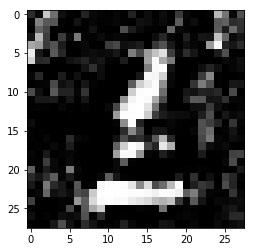

Epoch 1/2... Discriminator Loss: 6.8393... Generator Loss: 12.6420
Epoch 1/2... Discriminator Loss: 0.0045... Generator Loss: 6.0544
Epoch 1/2... Discriminator Loss: 0.0102... Generator Loss: 4.6661
Epoch 1/2... Discriminator Loss: 0.0722... Generator Loss: 2.6785
Epoch 1/2... Discriminator Loss: 0.0532... Generator Loss: 2.9618
Epoch 1/2... Discriminator Loss: 0.4460... Generator Loss: 1.0222
Epoch 1/2... Discriminator Loss: 0.3416... Generator Loss: 1.2401
Epoch 1/2... Discriminator Loss: 0.2644... Generator Loss: 1.4603
Epoch 1/2... Discriminator Loss: 0.4371... Generator Loss: 1.0386
Epoch 1/2... Discriminator Loss: 0.6354... Generator Loss: 0.7545
Epoch 1/2... Discriminator Loss: 0.4789... Generator Loss: 0.9663
Epoch 1/2... Discriminator Loss: 0.7159... Generator Loss: 0.6709
Epoch 1/2... Discriminator Loss: 0.5174... Generator Loss: 0.9158
Epoch 1/2... Discriminator Loss: 0.6140... Generator Loss: 0.7804
Epoch 1/2... Discriminator Loss: 0.4598... Generator Loss: 1.0015
Epoch 1/2

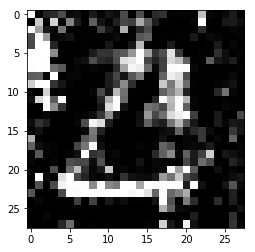

Epoch 1/2... Discriminator Loss: 1.1085... Generator Loss: 0.4006
Epoch 1/2... Discriminator Loss: 1.0470... Generator Loss: 0.4323
Epoch 1/2... Discriminator Loss: 1.0152... Generator Loss: 0.4500
Epoch 1/2... Discriminator Loss: 0.2856... Generator Loss: 1.3924
Epoch 1/2... Discriminator Loss: 0.5056... Generator Loss: 0.9368
Epoch 1/2... Discriminator Loss: 0.0875... Generator Loss: 2.4805
Epoch 1/2... Discriminator Loss: 0.2678... Generator Loss: 1.4507
Epoch 1/2... Discriminator Loss: 0.4325... Generator Loss: 1.0468
Epoch 1/2... Discriminator Loss: 0.5000... Generator Loss: 0.9333
Epoch 1/2... Discriminator Loss: 1.0260... Generator Loss: 0.4441
Epoch 1/2... Discriminator Loss: 0.7138... Generator Loss: 0.6755
Epoch 1/2... Discriminator Loss: 1.3976... Generator Loss: 0.2841
Epoch 1/2... Discriminator Loss: 0.5915... Generator Loss: 0.8074
Epoch 1/2... Discriminator Loss: 0.2053... Generator Loss: 1.7060
Epoch 1/2... Discriminator Loss: 0.3069... Generator Loss: 1.3367
Epoch 1/2.

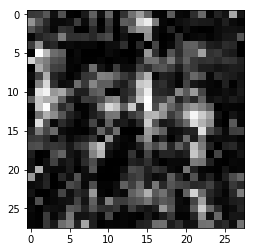

Epoch 1/2... Discriminator Loss: 0.4864... Generator Loss: 0.9619
Epoch 1/2... Discriminator Loss: 2.6635... Generator Loss: 0.0730


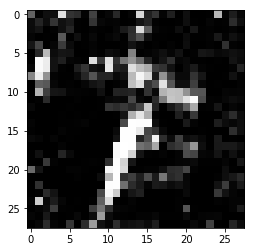

Epoch 1/2... Discriminator Loss: 1.9461... Generator Loss: 7.2167
Epoch 1/2... Discriminator Loss: 6.8983... Generator Loss: 0.0010


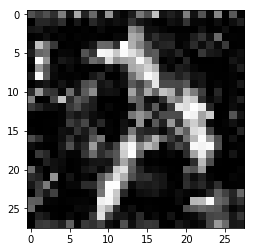

Epoch 1/2... Discriminator Loss: 0.0006... Generator Loss: 7.7507
Epoch 1/2... Discriminator Loss: 0.0027... Generator Loss: 6.3844
Epoch 1/2... Discriminator Loss: 0.2992... Generator Loss: 1.4613
Epoch 1/2... Discriminator Loss: 0.8744... Generator Loss: 0.5399
Epoch 1/2... Discriminator Loss: 1.6937... Generator Loss: 0.2032
Epoch 1/2... Discriminator Loss: 0.1204... Generator Loss: 3.8238
Epoch 1/2... Discriminator Loss: 0.5617... Generator Loss: 2.2510
Epoch 1/2... Discriminator Loss: 4.8546... Generator Loss: 0.0078


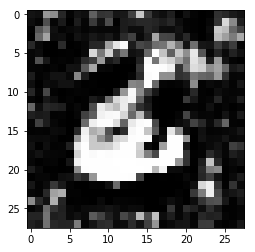

Epoch 1/2... Discriminator Loss: 4.2605... Generator Loss: 9.1402
Epoch 1/2... Discriminator Loss: 0.4174... Generator Loss: 3.7280
Epoch 1/2... Discriminator Loss: 0.2529... Generator Loss: 1.5023
Epoch 1/2... Discriminator Loss: 1.1462... Generator Loss: 0.3844
Epoch 1/2... Discriminator Loss: 0.8851... Generator Loss: 0.5531
Epoch 1/2... Discriminator Loss: 0.9258... Generator Loss: 0.5091
Epoch 1/2... Discriminator Loss: 1.8560... Generator Loss: 0.1736
Epoch 1/2... Discriminator Loss: 0.5956... Generator Loss: 0.8311
Epoch 1/2... Discriminator Loss: 0.4107... Generator Loss: 1.1573
Epoch 1/2... Discriminator Loss: 0.2923... Generator Loss: 1.3995
Epoch 1/2... Discriminator Loss: 0.3805... Generator Loss: 1.1783
Epoch 1/2... Discriminator Loss: 0.3661... Generator Loss: 1.1909
Epoch 1/2... Discriminator Loss: 0.6943... Generator Loss: 0.8721
Epoch 1/2... Discriminator Loss: 0.3783... Generator Loss: 1.2586
Epoch 1/2... Discriminator Loss: 0.6679... Generator Loss: 0.7420
Epoch 1/2.

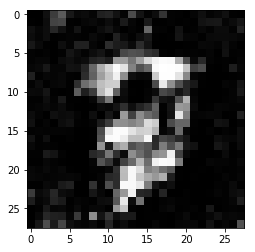

Epoch 1/2... Discriminator Loss: 2.4902... Generator Loss: 7.3842
Epoch 1/2... Discriminator Loss: 0.6700... Generator Loss: 0.7172
Epoch 1/2... Discriminator Loss: 3.0813... Generator Loss: 0.0470


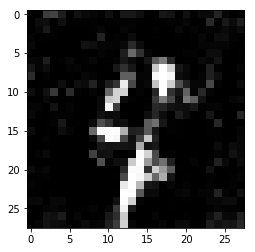

Epoch 1/2... Discriminator Loss: 2.4425... Generator Loss: 0.0910


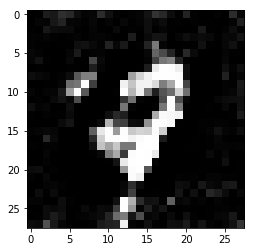

Epoch 1/2... Discriminator Loss: 0.1039... Generator Loss: 3.9338
Epoch 1/2... Discriminator Loss: 0.2271... Generator Loss: 3.9288
Epoch 1/2... Discriminator Loss: 0.0247... Generator Loss: 4.2241
Epoch 1/2... Discriminator Loss: 0.9317... Generator Loss: 0.5042
Epoch 1/2... Discriminator Loss: 1.1832... Generator Loss: 0.3676
Epoch 1/2... Discriminator Loss: 0.6538... Generator Loss: 0.7343
Epoch 1/2... Discriminator Loss: 1.1857... Generator Loss: 0.3648
Epoch 1/2... Discriminator Loss: 0.5439... Generator Loss: 0.8848
Epoch 1/2... Discriminator Loss: 0.1578... Generator Loss: 1.9267
Epoch 1/2... Discriminator Loss: 0.5158... Generator Loss: 0.9111
Epoch 1/2... Discriminator Loss: 0.6531... Generator Loss: 0.7384
Epoch 1/2... Discriminator Loss: 0.0972... Generator Loss: 2.5364
Epoch 1/2... Discriminator Loss: 0.9577... Generator Loss: 0.4984
Epoch 1/2... Discriminator Loss: 1.2766... Generator Loss: 0.3307
Epoch 1/2... Discriminator Loss: 1.2735... Generator Loss: 0.3300
Epoch 1/2.

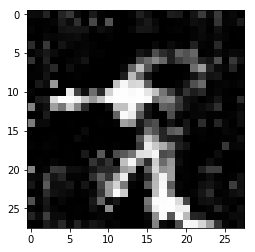

Epoch 1/2... Discriminator Loss: 0.0870... Generator Loss: 2.4961
Epoch 1/2... Discriminator Loss: 1.1764... Generator Loss: 0.3711
Epoch 1/2... Discriminator Loss: 0.3344... Generator Loss: 1.3394
Epoch 1/2... Discriminator Loss: 0.0492... Generator Loss: 3.2703
Epoch 1/2... Discriminator Loss: 1.6510... Generator Loss: 0.2132
Epoch 1/2... Discriminator Loss: 1.8005... Generator Loss: 0.1806
Epoch 1/2... Discriminator Loss: 0.0257... Generator Loss: 4.5487
Epoch 1/2... Discriminator Loss: 0.0126... Generator Loss: 5.4851
Epoch 1/2... Discriminator Loss: 0.0153... Generator Loss: 7.3103
Epoch 1/2... Discriminator Loss: 0.0031... Generator Loss: 6.4020
Epoch 1/2... Discriminator Loss: 0.0030... Generator Loss: 5.8126
Epoch 1/2... Discriminator Loss: 0.0075... Generator Loss: 4.9522
Epoch 1/2... Discriminator Loss: 0.0706... Generator Loss: 2.7195
Epoch 1/2... Discriminator Loss: 0.0136... Generator Loss: 4.3364
Epoch 1/2... Discriminator Loss: 0.1468... Generator Loss: 1.9920
Epoch 1/2.

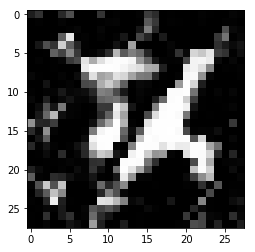

Epoch 1/2... Discriminator Loss: 2.7816... Generator Loss: 0.0642


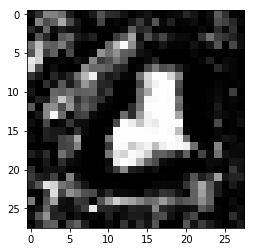

Epoch 1/2... Discriminator Loss: 1.9647... Generator Loss: 0.1511
Epoch 1/2... Discriminator Loss: 1.2138... Generator Loss: 0.3640
Epoch 1/2... Discriminator Loss: 0.0872... Generator Loss: 2.5297
Epoch 1/2... Discriminator Loss: 6.8006... Generator Loss: 0.0011


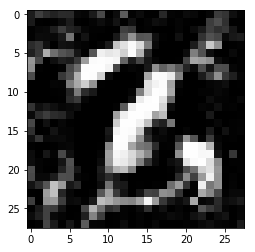

Epoch 1/2... Discriminator Loss: 0.3448... Generator Loss: 9.2173
Epoch 1/2... Discriminator Loss: 0.0040... Generator Loss: 5.7021
Epoch 1/2... Discriminator Loss: 0.0146... Generator Loss: 4.3572
Epoch 1/2... Discriminator Loss: 0.0361... Generator Loss: 3.3414
Epoch 1/2... Discriminator Loss: 0.1029... Generator Loss: 2.3248
Epoch 1/2... Discriminator Loss: 0.0695... Generator Loss: 2.7068
Epoch 1/2... Discriminator Loss: 0.1219... Generator Loss: 2.1707
Epoch 1/2... Discriminator Loss: 0.1744... Generator Loss: 1.8345
Epoch 1/2... Discriminator Loss: 0.3609... Generator Loss: 1.1995
Epoch 1/2... Discriminator Loss: 0.1805... Generator Loss: 1.9705
Epoch 1/2... Discriminator Loss: 0.2885... Generator Loss: 1.3851
Epoch 1/2... Discriminator Loss: 0.2007... Generator Loss: 1.7065
Epoch 1/2... Discriminator Loss: 0.2168... Generator Loss: 1.6416
Epoch 1/2... Discriminator Loss: 0.3106... Generator Loss: 1.3208
Epoch 1/2... Discriminator Loss: 0.3249... Generator Loss: 1.2833
Epoch 1/2.

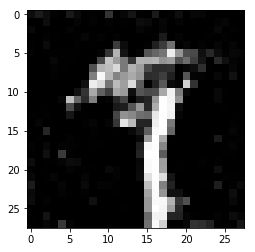

Epoch 1/2... Discriminator Loss: 1.4348... Generator Loss: 7.9754
Epoch 1/2... Discriminator Loss: 0.0120... Generator Loss: 6.8491
Epoch 1/2... Discriminator Loss: 0.0105... Generator Loss: 5.5972
Epoch 1/2... Discriminator Loss: 0.2663... Generator Loss: 1.4571
Epoch 1/2... Discriminator Loss: 0.3813... Generator Loss: 1.1518
Epoch 1/2... Discriminator Loss: 0.0957... Generator Loss: 2.4220
Epoch 1/2... Discriminator Loss: 0.0247... Generator Loss: 4.6256
Epoch 1/2... Discriminator Loss: 0.0829... Generator Loss: 2.5371
Epoch 1/2... Discriminator Loss: 2.1185... Generator Loss: 0.1281
Epoch 1/2... Discriminator Loss: 3.3506... Generator Loss: 0.0357


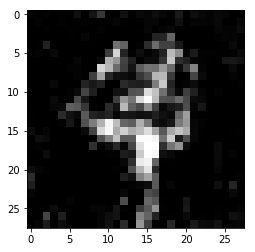

Epoch 1/2... Discriminator Loss: 0.6792... Generator Loss: 0.7076
Epoch 1/2... Discriminator Loss: 0.2305... Generator Loss: 1.5947
Epoch 1/2... Discriminator Loss: 0.0387... Generator Loss: 3.3540
Epoch 1/2... Discriminator Loss: 0.0107... Generator Loss: 4.8839
Epoch 1/2... Discriminator Loss: 0.0443... Generator Loss: 3.3564
Epoch 1/2... Discriminator Loss: 0.3709... Generator Loss: 1.1740
Epoch 1/2... Discriminator Loss: 0.0926... Generator Loss: 2.4734
Epoch 1/2... Discriminator Loss: 0.1192... Generator Loss: 2.1912
Epoch 1/2... Discriminator Loss: 0.1009... Generator Loss: 2.3445
Epoch 1/2... Discriminator Loss: 0.1037... Generator Loss: 2.3304
Epoch 1/2... Discriminator Loss: 0.6201... Generator Loss: 0.7734
Epoch 1/2... Discriminator Loss: 2.5756... Generator Loss: 0.0793


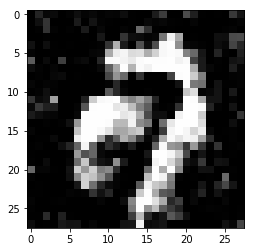

Epoch 1/2... Discriminator Loss: 0.3570... Generator Loss: 1.2304
Epoch 1/2... Discriminator Loss: 1.8516... Generator Loss: 0.1709
Epoch 1/2... Discriminator Loss: 0.9635... Generator Loss: 0.4810
Epoch 1/2... Discriminator Loss: 1.3999... Generator Loss: 0.2859
Epoch 1/2... Discriminator Loss: 2.3993... Generator Loss: 0.0961


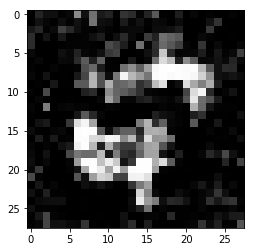

Epoch 1/2... Discriminator Loss: 3.4010... Generator Loss: 0.0345


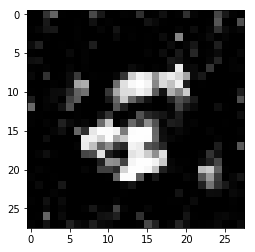

Epoch 1/2... Discriminator Loss: 7.4847... Generator Loss: 0.0006


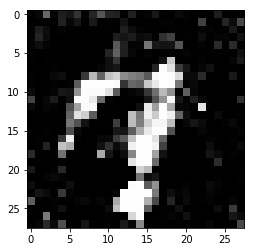

Epoch 1/2... Discriminator Loss: 2.7699... Generator Loss: 9.9427
Epoch 1/2... Discriminator Loss: 5.4524... Generator Loss: 0.0043


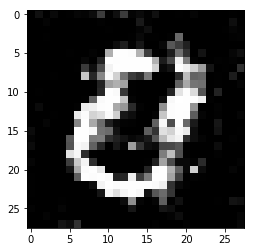

Epoch 1/2... Discriminator Loss: 5.5050... Generator Loss: 0.0041


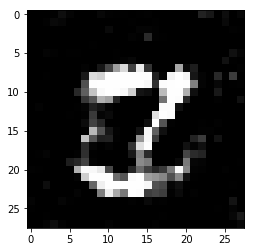

Epoch 1/2... Discriminator Loss: 0.1319... Generator Loss: 9.9699
Epoch 1/2... Discriminator Loss: 0.5660... Generator Loss: 9.2456
Epoch 1/2... Discriminator Loss: 0.0345... Generator Loss: 11.0170
Epoch 1/2... Discriminator Loss: 0.0676... Generator Loss: 2.7283


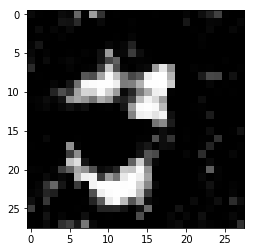

Epoch 1/2... Discriminator Loss: 2.7252... Generator Loss: 0.0678


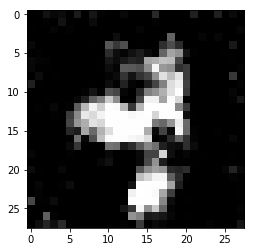

Epoch 1/2... Discriminator Loss: 2.0908... Generator Loss: 0.1319
Epoch 1/2... Discriminator Loss: 0.0613... Generator Loss: 4.8086
Epoch 1/2... Discriminator Loss: 0.2905... Generator Loss: 6.3208
Epoch 1/2... Discriminator Loss: 0.0331... Generator Loss: 4.0153
Epoch 1/2... Discriminator Loss: 0.0309... Generator Loss: 4.0133
Epoch 1/2... Discriminator Loss: 0.2505... Generator Loss: 1.5082
Epoch 1/2... Discriminator Loss: 1.3863... Generator Loss: 0.2880
Epoch 1/2... Discriminator Loss: 0.7375... Generator Loss: 0.6508
Epoch 1/2... Discriminator Loss: 1.2865... Generator Loss: 0.3239
Epoch 1/2... Discriminator Loss: 0.3079... Generator Loss: 1.3488
Epoch 1/2... Discriminator Loss: 0.8050... Generator Loss: 0.5931
Epoch 1/2... Discriminator Loss: 0.9149... Generator Loss: 0.5121
Epoch 1/2... Discriminator Loss: 0.1814... Generator Loss: 1.8052
Epoch 1/2... Discriminator Loss: 0.5664... Generator Loss: 0.8384
Epoch 1/2... Discriminator Loss: 1.6715... Generator Loss: 0.2082
Epoch 1/2.

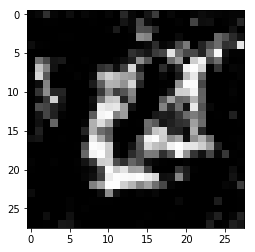

Epoch 1/2... Discriminator Loss: 0.1710... Generator Loss: 1.8629
Epoch 1/2... Discriminator Loss: 1.7469... Generator Loss: 0.1999
Epoch 1/2... Discriminator Loss: 0.1327... Generator Loss: 2.1728
Epoch 1/2... Discriminator Loss: 0.6104... Generator Loss: 0.8048
Epoch 1/2... Discriminator Loss: 1.9539... Generator Loss: 0.1533
Epoch 1/2... Discriminator Loss: 0.5896... Generator Loss: 0.8183
Epoch 1/2... Discriminator Loss: 0.8916... Generator Loss: 0.5317
Epoch 1/2... Discriminator Loss: 2.8193... Generator Loss: 0.0627


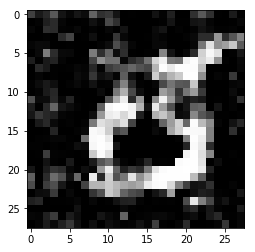

Epoch 1/2... Discriminator Loss: 2.0735... Generator Loss: 0.1345
Epoch 1/2... Discriminator Loss: 1.3526... Generator Loss: 5.3856
Epoch 1/2... Discriminator Loss: 5.4779... Generator Loss: 0.0042


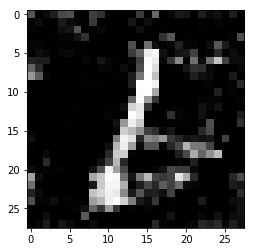

Epoch 1/2... Discriminator Loss: 2.3607... Generator Loss: 0.0991


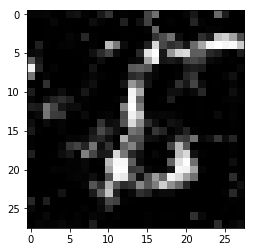

Epoch 1/2... Discriminator Loss: 1.8497... Generator Loss: 0.1711
Epoch 1/2... Discriminator Loss: 0.9517... Generator Loss: 0.4879
Epoch 1/2... Discriminator Loss: 0.1926... Generator Loss: 1.7544
Epoch 1/2... Discriminator Loss: 0.4935... Generator Loss: 0.9430
Epoch 1/2... Discriminator Loss: 0.2375... Generator Loss: 1.5565
Epoch 1/2... Discriminator Loss: 0.0602... Generator Loss: 2.8402
Epoch 1/2... Discriminator Loss: 0.1260... Generator Loss: 2.1367
Epoch 1/2... Discriminator Loss: 0.7841... Generator Loss: 0.6102
Epoch 1/2... Discriminator Loss: 0.3399... Generator Loss: 1.2442
Epoch 1/2... Discriminator Loss: 0.0973... Generator Loss: 2.4189
Epoch 1/2... Discriminator Loss: 0.8249... Generator Loss: 0.5820
Epoch 1/2... Discriminator Loss: 1.0423... Generator Loss: 0.4350
Epoch 1/2... Discriminator Loss: 1.8677... Generator Loss: 0.1684
Epoch 1/2... Discriminator Loss: 0.5627... Generator Loss: 0.8539
Epoch 1/2... Discriminator Loss: 0.6476... Generator Loss: 0.7566
Epoch 1/2.

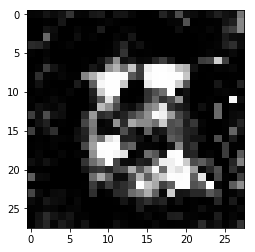

Epoch 1/2... Discriminator Loss: 0.7609... Generator Loss: 0.6298
Epoch 1/2... Discriminator Loss: 0.0348... Generator Loss: 4.1505
Epoch 1/2... Discriminator Loss: 0.0741... Generator Loss: 5.2257
Epoch 1/2... Discriminator Loss: 4.1743... Generator Loss: 0.0155


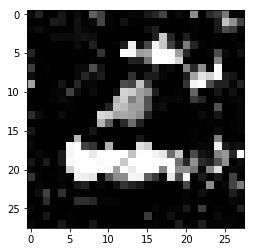

Epoch 1/2... Discriminator Loss: 0.1734... Generator Loss: 1.8402
Epoch 1/2... Discriminator Loss: 1.2410... Generator Loss: 0.3412
Epoch 1/2... Discriminator Loss: 6.2974... Generator Loss: 0.0018


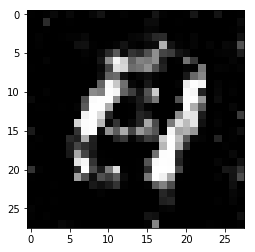

Epoch 1/2... Discriminator Loss: 1.3449... Generator Loss: 0.3033
Epoch 1/2... Discriminator Loss: 0.1703... Generator Loss: 1.9781
Epoch 1/2... Discriminator Loss: 0.1251... Generator Loss: 3.9341
Epoch 1/2... Discriminator Loss: 0.0274... Generator Loss: 4.0394
Epoch 1/2... Discriminator Loss: 2.5565... Generator Loss: 0.0807


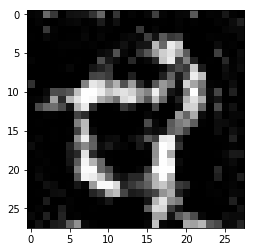

Epoch 1/2... Discriminator Loss: 0.5704... Generator Loss: 0.8707
Epoch 1/2... Discriminator Loss: 0.3493... Generator Loss: 1.2223
Epoch 1/2... Discriminator Loss: 0.1331... Generator Loss: 2.1013
Epoch 1/2... Discriminator Loss: 1.0066... Generator Loss: 0.4671
Epoch 1/2... Discriminator Loss: 0.0665... Generator Loss: 2.7509
Epoch 1/2... Discriminator Loss: 0.1783... Generator Loss: 1.8713
Epoch 1/2... Discriminator Loss: 1.7816... Generator Loss: 0.1855
Epoch 1/2... Discriminator Loss: 0.8601... Generator Loss: 0.5522
Epoch 1/2... Discriminator Loss: 0.3298... Generator Loss: 1.2910
Epoch 1/2... Discriminator Loss: 0.0779... Generator Loss: 2.5958
Epoch 1/2... Discriminator Loss: 1.9980... Generator Loss: 0.1462
Epoch 1/2... Discriminator Loss: 0.2841... Generator Loss: 1.3982
Epoch 1/2... Discriminator Loss: 0.2718... Generator Loss: 1.4368
Epoch 1/2... Discriminator Loss: 1.1964... Generator Loss: 0.3613
Epoch 1/2... Discriminator Loss: 2.3763... Generator Loss: 0.0977


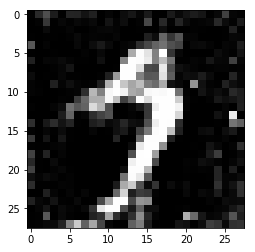

Epoch 1/2... Discriminator Loss: 0.6016... Generator Loss: 0.7944
Epoch 1/2... Discriminator Loss: 1.0579... Generator Loss: 0.4265
Epoch 1/2... Discriminator Loss: 0.2952... Generator Loss: 1.3640
Epoch 1/2... Discriminator Loss: 0.1696... Generator Loss: 1.9261
Epoch 1/2... Discriminator Loss: 1.5404... Generator Loss: 0.2414
Epoch 1/2... Discriminator Loss: 0.8806... Generator Loss: 0.5433
Epoch 1/2... Discriminator Loss: 0.1129... Generator Loss: 2.4392
Epoch 1/2... Discriminator Loss: 0.4085... Generator Loss: 1.0954
Epoch 1/2... Discriminator Loss: 0.0237... Generator Loss: 4.2115
Epoch 1/2... Discriminator Loss: 0.3662... Generator Loss: 1.1826
Epoch 1/2... Discriminator Loss: 0.3628... Generator Loss: 1.2050
Epoch 1/2... Discriminator Loss: 0.4524... Generator Loss: 1.0150


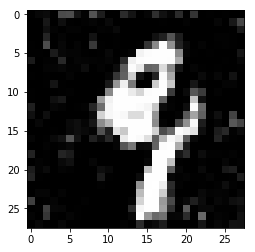

Epoch 1/2... Discriminator Loss: 0.6115... Generator Loss: 0.7845
Epoch 1/2... Discriminator Loss: 1.3329... Generator Loss: 0.3098
Epoch 1/2... Discriminator Loss: 1.4944... Generator Loss: 0.2544
Epoch 1/2... Discriminator Loss: 0.0692... Generator Loss: 2.7257
Epoch 1/2... Discriminator Loss: 1.6836... Generator Loss: 0.2097
Epoch 1/2... Discriminator Loss: 0.4047... Generator Loss: 1.1016
Epoch 1/2... Discriminator Loss: 0.3345... Generator Loss: 1.2709
Epoch 1/2... Discriminator Loss: 0.1769... Generator Loss: 1.8356
Epoch 1/2... Discriminator Loss: 1.2817... Generator Loss: 0.3275
Epoch 1/2... Discriminator Loss: 0.0528... Generator Loss: 3.2591
Epoch 1/2... Discriminator Loss: 0.1706... Generator Loss: 1.8541
Epoch 1/2... Discriminator Loss: 0.2423... Generator Loss: 1.5365
Epoch 1/2... Discriminator Loss: 0.8052... Generator Loss: 0.5924
Epoch 1/2... Discriminator Loss: 0.0713... Generator Loss: 2.6818
Epoch 1/2... Discriminator Loss: 0.1756... Generator Loss: 1.8302
Epoch 1/2.

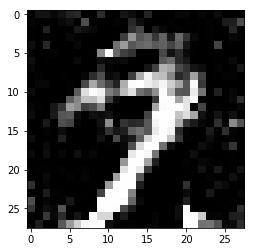

Epoch 1/2... Discriminator Loss: 0.0355... Generator Loss: 5.7605
Epoch 1/2... Discriminator Loss: 0.0612... Generator Loss: 8.2429
Epoch 1/2... Discriminator Loss: 4.7299... Generator Loss: 0.0089


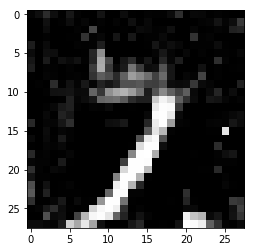

Epoch 1/2... Discriminator Loss: 1.6893... Generator Loss: 0.2041
Epoch 1/2... Discriminator Loss: 1.6904... Generator Loss: 0.2039
Epoch 1/2... Discriminator Loss: 0.4656... Generator Loss: 0.9881
Epoch 1/2... Discriminator Loss: 0.0357... Generator Loss: 3.3500
Epoch 1/2... Discriminator Loss: 0.6945... Generator Loss: 0.6918
Epoch 1/2... Discriminator Loss: 2.8906... Generator Loss: 0.0571


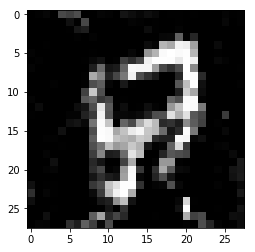

Epoch 1/2... Discriminator Loss: 0.0483... Generator Loss: 3.0536
Epoch 1/2... Discriminator Loss: 0.1313... Generator Loss: 2.0973
Epoch 1/2... Discriminator Loss: 1.7384... Generator Loss: 0.1933
Epoch 1/2... Discriminator Loss: 1.4502... Generator Loss: 0.2673
Epoch 1/2... Discriminator Loss: 0.1512... Generator Loss: 1.9641
Epoch 1/2... Discriminator Loss: 1.9003... Generator Loss: 0.1620
Epoch 1/2... Discriminator Loss: 2.8004... Generator Loss: 0.0627


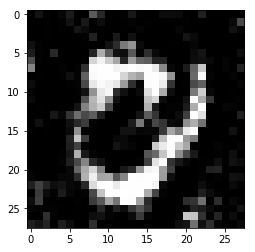

Epoch 1/2... Discriminator Loss: 0.2979... Generator Loss: 1.3562
Epoch 1/2... Discriminator Loss: 0.0221... Generator Loss: 4.0412
Epoch 1/2... Discriminator Loss: 0.0134... Generator Loss: 4.3202
Epoch 1/2... Discriminator Loss: 0.0772... Generator Loss: 2.6009
Epoch 1/2... Discriminator Loss: 2.1862... Generator Loss: 0.1195
Epoch 1/2... Discriminator Loss: 1.6647... Generator Loss: 0.2102
Epoch 1/2... Discriminator Loss: 5.3063... Generator Loss: 0.0050


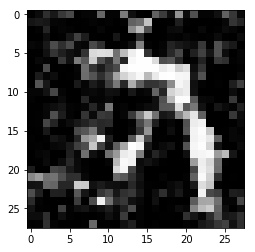

Epoch 1/2... Discriminator Loss: 3.8707... Generator Loss: 0.0212


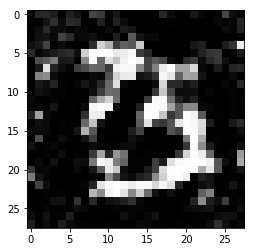

Epoch 1/2... Discriminator Loss: 1.6352... Generator Loss: 0.2169
Epoch 1/2... Discriminator Loss: 0.7710... Generator Loss: 0.6828
Epoch 1/2... Discriminator Loss: 4.3464... Generator Loss: 0.0130


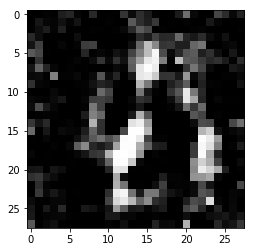

Epoch 1/2... Discriminator Loss: 4.5459... Generator Loss: 0.0107


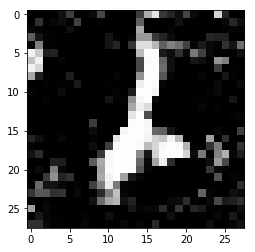

Epoch 1/2... Discriminator Loss: 0.0098... Generator Loss: 4.6299
Epoch 1/2... Discriminator Loss: 0.0495... Generator Loss: 3.0303
Epoch 1/2... Discriminator Loss: 0.0366... Generator Loss: 3.3255
Epoch 1/2... Discriminator Loss: 0.0311... Generator Loss: 3.5599
Epoch 1/2... Discriminator Loss: 0.2331... Generator Loss: 1.5722
Epoch 1/2... Discriminator Loss: 0.1898... Generator Loss: 1.7553
Epoch 1/2... Discriminator Loss: 0.1114... Generator Loss: 2.2503
Epoch 1/2... Discriminator Loss: 0.2389... Generator Loss: 1.5490
Epoch 1/2... Discriminator Loss: 0.1290... Generator Loss: 2.1121
Epoch 1/2... Discriminator Loss: 1.7145... Generator Loss: 0.1985
Epoch 1/2... Discriminator Loss: 0.1650... Generator Loss: 1.8832
Epoch 1/2... Discriminator Loss: 1.8354... Generator Loss: 0.1738
Epoch 1/2... Discriminator Loss: 0.6197... Generator Loss: 0.7729
Epoch 1/2... Discriminator Loss: 0.1075... Generator Loss: 2.2850
Epoch 1/2... Discriminator Loss: 0.1733... Generator Loss: 1.8380
Epoch 1/2.

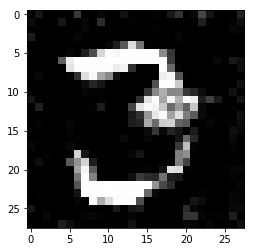

Epoch 1/2... Discriminator Loss: 6.3759... Generator Loss: 0.0017


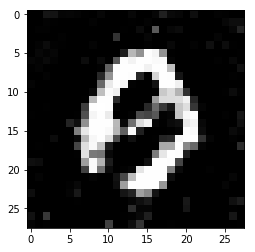

Epoch 1/2... Discriminator Loss: 0.0037... Generator Loss: 12.6805
Epoch 1/2... Discriminator Loss: 2.3793... Generator Loss: 10.8951
Epoch 1/2... Discriminator Loss: 0.0599... Generator Loss: 10.4246
Epoch 1/2... Discriminator Loss: 5.6242... Generator Loss: 0.0036


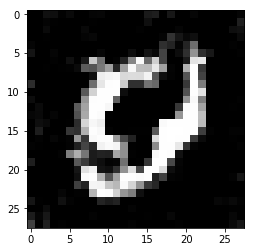

Epoch 1/2... Discriminator Loss: 0.0023... Generator Loss: 6.1030
Epoch 1/2... Discriminator Loss: 0.0011... Generator Loss: 6.7973
Epoch 1/2... Discriminator Loss: 0.0014... Generator Loss: 6.8961
Epoch 1/2... Discriminator Loss: 0.0075... Generator Loss: 7.1273
Epoch 1/2... Discriminator Loss: 0.0362... Generator Loss: 3.7370
Epoch 1/2... Discriminator Loss: 0.0115... Generator Loss: 5.3768
Epoch 1/2... Discriminator Loss: 0.0136... Generator Loss: 4.3281
Epoch 1/2... Discriminator Loss: 0.0072... Generator Loss: 4.9610
Epoch 1/2... Discriminator Loss: 0.0670... Generator Loss: 2.7368
Epoch 1/2... Discriminator Loss: 0.1212... Generator Loss: 2.2102
Epoch 1/2... Discriminator Loss: 0.1215... Generator Loss: 2.1758
Epoch 1/2... Discriminator Loss: 0.0989... Generator Loss: 2.3798
Epoch 1/2... Discriminator Loss: 0.0791... Generator Loss: 2.6582


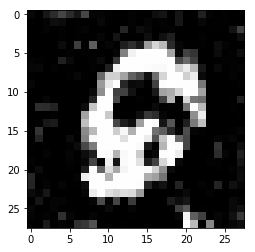

Epoch 1/2... Discriminator Loss: 2.4477... Generator Loss: 0.0918


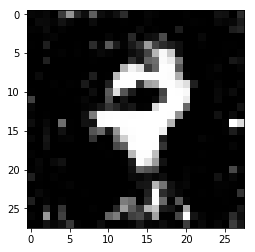

Epoch 1/2... Discriminator Loss: 1.5677... Generator Loss: 0.2346
Epoch 1/2... Discriminator Loss: 2.1832... Generator Loss: 0.1200
Epoch 1/2... Discriminator Loss: 0.7615... Generator Loss: 0.6298
Epoch 1/2... Discriminator Loss: 1.1651... Generator Loss: 0.3738
Epoch 1/2... Discriminator Loss: 0.5485... Generator Loss: 0.8641
Epoch 1/2... Discriminator Loss: 2.4874... Generator Loss: 0.0874


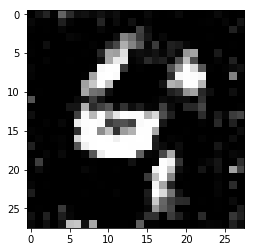

Epoch 1/2... Discriminator Loss: 0.2953... Generator Loss: 1.3739
Epoch 1/2... Discriminator Loss: 3.2608... Generator Loss: 0.0395


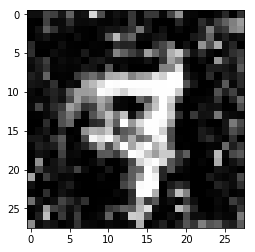

Epoch 1/2... Discriminator Loss: 3.0796... Generator Loss: 0.0471


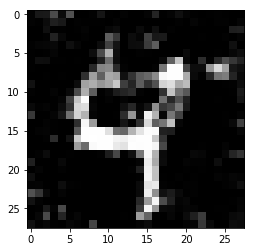

Epoch 1/2... Discriminator Loss: 6.8442... Generator Loss: 0.0011


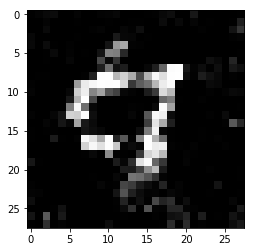

Epoch 1/2... Discriminator Loss: 0.0011... Generator Loss: 6.8657
Epoch 1/2... Discriminator Loss: 0.0458... Generator Loss: 4.7835
Epoch 1/2... Discriminator Loss: 0.0499... Generator Loss: 7.7384
Epoch 1/2... Discriminator Loss: 0.0127... Generator Loss: 7.6119
Epoch 1/2... Discriminator Loss: 0.0069... Generator Loss: 5.3345
Epoch 1/2... Discriminator Loss: 0.0278... Generator Loss: 3.6777
Epoch 1/2... Discriminator Loss: 0.1344... Generator Loss: 2.0736
Epoch 1/2... Discriminator Loss: 0.0485... Generator Loss: 3.0507
Epoch 1/2... Discriminator Loss: 0.0670... Generator Loss: 2.7367
Epoch 1/2... Discriminator Loss: 0.1058... Generator Loss: 2.2991
Epoch 1/2... Discriminator Loss: 0.0557... Generator Loss: 2.9150
Epoch 1/2... Discriminator Loss: 0.0158... Generator Loss: 4.1575
Epoch 1/2... Discriminator Loss: 0.0153... Generator Loss: 4.2182
Epoch 1/2... Discriminator Loss: 0.0123... Generator Loss: 4.4013
Epoch 1/2... Discriminator Loss: 0.0403... Generator Loss: 3.2323
Epoch 1/2.

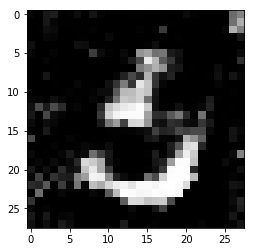

Epoch 1/2... Discriminator Loss: 0.7743... Generator Loss: 0.6184
Epoch 1/2... Discriminator Loss: 3.9539... Generator Loss: 0.0194


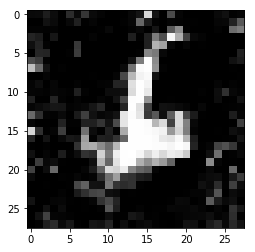

Epoch 1/2... Discriminator Loss: 6.3514... Generator Loss: 17.4870
Epoch 1/2... Discriminator Loss: 0.0041... Generator Loss: 5.4984
Epoch 1/2... Discriminator Loss: 0.1701... Generator Loss: 1.8556
Epoch 1/2... Discriminator Loss: 2.1926... Generator Loss: 0.1189
Epoch 1/2... Discriminator Loss: 0.0748... Generator Loss: 2.6299
Epoch 1/2... Discriminator Loss: 0.6489... Generator Loss: 0.7394
Epoch 1/2... Discriminator Loss: 1.3770... Generator Loss: 0.2908
Epoch 1/2... Discriminator Loss: 0.3349... Generator Loss: 1.2576
Epoch 1/2... Discriminator Loss: 0.1354... Generator Loss: 2.0763
Epoch 1/2... Discriminator Loss: 0.2560... Generator Loss: 1.4903
Epoch 1/2... Discriminator Loss: 0.1235... Generator Loss: 2.1543
Epoch 1/2... Discriminator Loss: 0.5664... Generator Loss: 0.8387
Epoch 1/2... Discriminator Loss: 0.3064... Generator Loss: 1.3325
Epoch 1/2... Discriminator Loss: 0.0178... Generator Loss: 4.0430
Epoch 1/2... Discriminator Loss: 0.3371... Generator Loss: 1.2519
Epoch 1/2

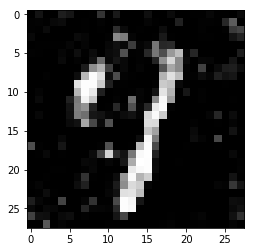

Epoch 1/2... Discriminator Loss: 0.8920... Generator Loss: 0.5276
Epoch 1/2... Discriminator Loss: 0.1237... Generator Loss: 2.1539
Epoch 1/2... Discriminator Loss: 0.1023... Generator Loss: 2.3314
Epoch 1/2... Discriminator Loss: 0.2208... Generator Loss: 1.6271
Epoch 1/2... Discriminator Loss: 0.6090... Generator Loss: 0.7858
Epoch 1/2... Discriminator Loss: 1.9817... Generator Loss: 0.1483
Epoch 1/2... Discriminator Loss: 1.8167... Generator Loss: 0.1774
Epoch 1/2... Discriminator Loss: 0.4258... Generator Loss: 1.0591
Epoch 1/2... Discriminator Loss: 0.3768... Generator Loss: 1.1586
Epoch 1/2... Discriminator Loss: 0.1138... Generator Loss: 2.2302
Epoch 1/2... Discriminator Loss: 0.0764... Generator Loss: 2.6093
Epoch 1/2... Discriminator Loss: 0.1044... Generator Loss: 2.3123
Epoch 1/2... Discriminator Loss: 0.1233... Generator Loss: 2.1626
Epoch 1/2... Discriminator Loss: 0.5070... Generator Loss: 0.9220
Epoch 1/2... Discriminator Loss: 0.0808... Generator Loss: 2.5589
Epoch 1/2.

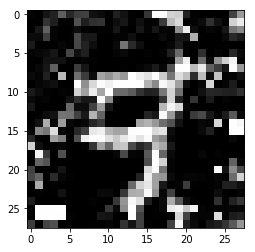

Epoch 1/2... Discriminator Loss: 2.3921... Generator Loss: 0.0959


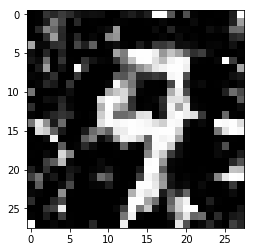

Epoch 1/2... Discriminator Loss: 1.3310... Generator Loss: 0.3070
Epoch 1/2... Discriminator Loss: 0.5395... Generator Loss: 0.8908
Epoch 1/2... Discriminator Loss: 0.8703... Generator Loss: 0.5427
Epoch 1/2... Discriminator Loss: 1.2800... Generator Loss: 0.3299
Epoch 1/2... Discriminator Loss: 0.8269... Generator Loss: 0.5755
Epoch 1/2... Discriminator Loss: 0.5749... Generator Loss: 0.8273
Epoch 1/2... Discriminator Loss: 1.6941... Generator Loss: 0.2031
Epoch 1/2... Discriminator Loss: 0.9632... Generator Loss: 0.4809
Epoch 1/2... Discriminator Loss: 0.6271... Generator Loss: 0.7644
Epoch 1/2... Discriminator Loss: 0.7879... Generator Loss: 0.6066
Epoch 1/2... Discriminator Loss: 0.8657... Generator Loss: 0.5461
Epoch 1/2... Discriminator Loss: 1.2559... Generator Loss: 0.3354
Epoch 1/2... Discriminator Loss: 0.9135... Generator Loss: 0.5135
Epoch 1/2... Discriminator Loss: 0.8306... Generator Loss: 0.5724
Epoch 1/2... Discriminator Loss: 1.1676... Generator Loss: 0.3728
Epoch 1/2.

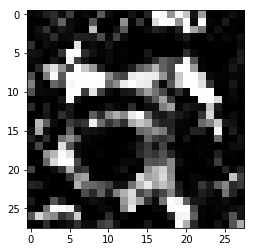

Epoch 1/2... Discriminator Loss: 1.4898... Generator Loss: 0.2554
Epoch 1/2... Discriminator Loss: 0.5287... Generator Loss: 0.8902
Epoch 1/2... Discriminator Loss: 0.0583... Generator Loss: 2.9397
Epoch 1/2... Discriminator Loss: 0.3947... Generator Loss: 1.1220
Epoch 1/2... Discriminator Loss: 1.0572... Generator Loss: 0.4280
Epoch 1/2... Discriminator Loss: 0.6305... Generator Loss: 0.7604
Epoch 1/2... Discriminator Loss: 2.2452... Generator Loss: 0.1124
Epoch 1/2... Discriminator Loss: 1.4768... Generator Loss: 0.2599
Epoch 1/2... Discriminator Loss: 6.0517... Generator Loss: 0.0024


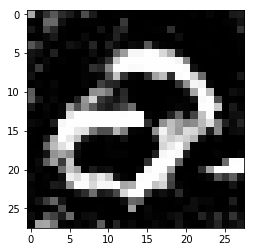

Epoch 1/2... Discriminator Loss: 0.0143... Generator Loss: 7.2895
Epoch 1/2... Discriminator Loss: 0.8278... Generator Loss: 0.5745
Epoch 1/2... Discriminator Loss: 2.2451... Generator Loss: 0.1120
Epoch 1/2... Discriminator Loss: 0.1343... Generator Loss: 2.0742
Epoch 1/2... Discriminator Loss: 1.4310... Generator Loss: 0.2732
Epoch 1/2... Discriminator Loss: 1.1104... Generator Loss: 0.3996
Epoch 1/2... Discriminator Loss: 2.0049... Generator Loss: 0.1446
Epoch 1/2... Discriminator Loss: 1.9732... Generator Loss: 0.1497
Epoch 1/2... Discriminator Loss: 0.0890... Generator Loss: 2.4629
Epoch 1/2... Discriminator Loss: 0.1213... Generator Loss: 2.1711
Epoch 1/2... Discriminator Loss: 5.8718... Generator Loss: 0.0028


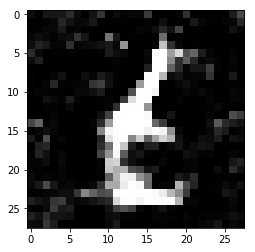

Epoch 1/2... Discriminator Loss: 0.0176... Generator Loss: 10.0015
Epoch 1/2... Discriminator Loss: 0.6584... Generator Loss: 0.7292
Epoch 1/2... Discriminator Loss: 2.4332... Generator Loss: 0.0919


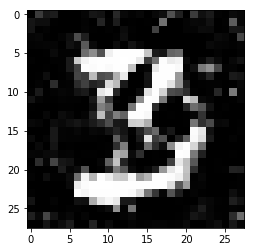

Epoch 1/2... Discriminator Loss: 2.9178... Generator Loss: 0.0556


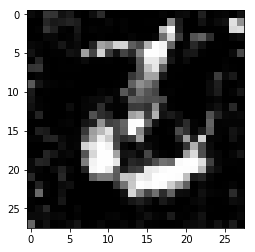

Epoch 1/2... Discriminator Loss: 2.2696... Generator Loss: 0.1091
Epoch 1/2... Discriminator Loss: 0.3912... Generator Loss: 1.1279
Epoch 1/2... Discriminator Loss: 0.5114... Generator Loss: 0.9157
Epoch 1/2... Discriminator Loss: 1.1063... Generator Loss: 0.4017
Epoch 1/2... Discriminator Loss: 0.0967... Generator Loss: 2.3838
Epoch 1/2... Discriminator Loss: 2.8474... Generator Loss: 0.0597


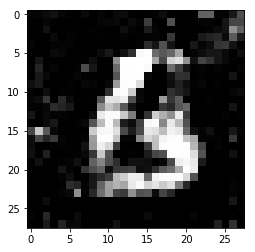

Epoch 1/2... Discriminator Loss: 1.8118... Generator Loss: 0.1784
Epoch 1/2... Discriminator Loss: 2.9037... Generator Loss: 0.0564


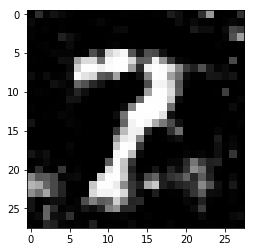

Epoch 1/2... Discriminator Loss: 0.5219... Generator Loss: 0.8999
Epoch 1/2... Discriminator Loss: 2.7952... Generator Loss: 0.0630


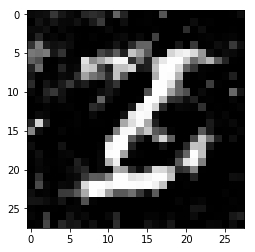

Epoch 1/2... Discriminator Loss: 0.8356... Generator Loss: 0.5685
Epoch 1/2... Discriminator Loss: 2.2476... Generator Loss: 0.1117


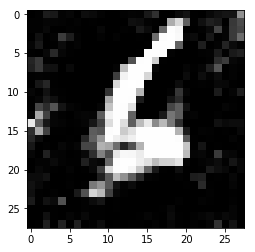

Epoch 1/2... Discriminator Loss: 0.2178... Generator Loss: 1.6318
Epoch 1/2... Discriminator Loss: 3.6101... Generator Loss: 0.0274


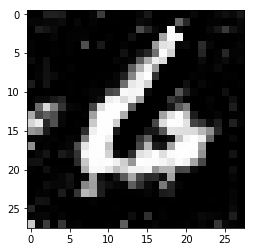

Epoch 1/2... Discriminator Loss: 1.1057... Generator Loss: 0.4031
Epoch 1/2... Discriminator Loss: 1.6960... Generator Loss: 0.2027
Epoch 1/2... Discriminator Loss: 0.2588... Generator Loss: 1.4782
Epoch 1/2... Discriminator Loss: 3.5420... Generator Loss: 0.0294


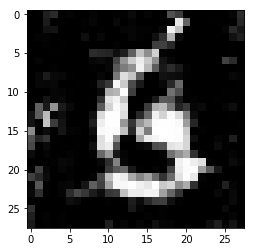

Epoch 1/2... Discriminator Loss: 0.2838... Generator Loss: 1.3983
Epoch 1/2... Discriminator Loss: 0.7436... Generator Loss: 0.6460
Epoch 1/2... Discriminator Loss: 0.0285... Generator Loss: 3.5878
Epoch 1/2... Discriminator Loss: 0.0339... Generator Loss: 3.7187
Epoch 1/2... Discriminator Loss: 0.7728... Generator Loss: 0.6199
Epoch 1/2... Discriminator Loss: 4.7894... Generator Loss: 0.0084


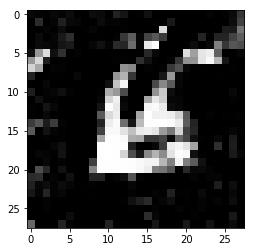

Epoch 1/2... Discriminator Loss: 2.7565... Generator Loss: 0.0656


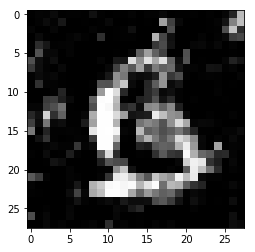

Epoch 1/2... Discriminator Loss: 3.7718... Generator Loss: 0.0233


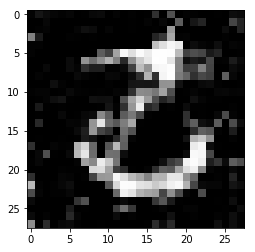

Epoch 1/2... Discriminator Loss: 0.9209... Generator Loss: 0.5078
Epoch 1/2... Discriminator Loss: 2.8628... Generator Loss: 0.0588


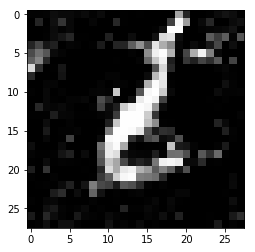

Epoch 1/2... Discriminator Loss: 0.7655... Generator Loss: 0.6258
Epoch 1/2... Discriminator Loss: 1.0120... Generator Loss: 0.4529
Epoch 1/2... Discriminator Loss: 1.5415... Generator Loss: 0.2409
Epoch 1/2... Discriminator Loss: 0.7224... Generator Loss: 0.6647
Epoch 1/2... Discriminator Loss: 1.6500... Generator Loss: 0.2133
Epoch 1/2... Discriminator Loss: 0.6008... Generator Loss: 0.7968
Epoch 1/2... Discriminator Loss: 2.2400... Generator Loss: 0.1126
Epoch 1/2... Discriminator Loss: 2.1037... Generator Loss: 0.1301
Epoch 1/2... Discriminator Loss: 2.2375... Generator Loss: 0.1129
Epoch 1/2... Discriminator Loss: 1.8078... Generator Loss: 0.1792
Epoch 1/2... Discriminator Loss: 0.0318... Generator Loss: 3.5169
Epoch 1/2... Discriminator Loss: 0.0444... Generator Loss: 3.1746
Epoch 1/2... Discriminator Loss: 0.4890... Generator Loss: 0.9500
Epoch 1/2... Discriminator Loss: 0.2180... Generator Loss: 1.6305
Epoch 1/2... Discriminator Loss: 0.4529... Generator Loss: 1.0120
Epoch 1/2.

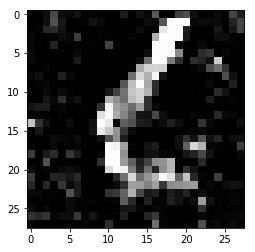

Epoch 1/2... Discriminator Loss: 2.7355... Generator Loss: 0.0673


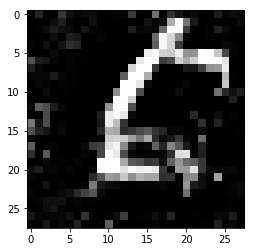

Epoch 1/2... Discriminator Loss: 0.5705... Generator Loss: 0.8698
Epoch 1/2... Discriminator Loss: 0.4291... Generator Loss: 1.0778
Epoch 1/2... Discriminator Loss: 0.0647... Generator Loss: 2.8227
Epoch 1/2... Discriminator Loss: 0.1237... Generator Loss: 2.1698
Epoch 1/2... Discriminator Loss: 2.1040... Generator Loss: 0.1301
Epoch 1/2... Discriminator Loss: 1.8669... Generator Loss: 0.1680
Epoch 1/2... Discriminator Loss: 1.7985... Generator Loss: 0.1813
Epoch 1/2... Discriminator Loss: 0.0449... Generator Loss: 3.1260
Epoch 1/2... Discriminator Loss: 0.2024... Generator Loss: 1.7137
Epoch 1/2... Discriminator Loss: 0.3716... Generator Loss: 1.1712
Epoch 1/2... Discriminator Loss: 0.0516... Generator Loss: 2.9981
Epoch 1/2... Discriminator Loss: 2.7301... Generator Loss: 0.0678


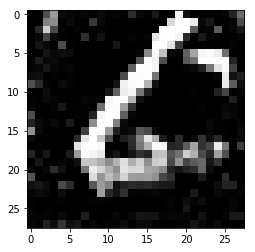

Epoch 1/2... Discriminator Loss: 1.5484... Generator Loss: 0.2392
Epoch 1/2... Discriminator Loss: 4.0775... Generator Loss: 0.0171


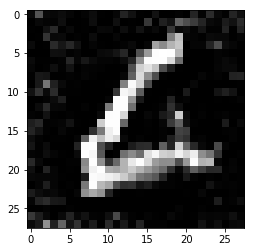

Epoch 1/2... Discriminator Loss: 16.2226... Generator Loss: 34.0727
Epoch 1/2... Discriminator Loss: 0.0000... Generator Loss: 13.5419
Epoch 1/2... Discriminator Loss: 0.0003... Generator Loss: 8.5492
Epoch 1/2... Discriminator Loss: 0.0049... Generator Loss: 5.3115
Epoch 1/2... Discriminator Loss: 0.0326... Generator Loss: 3.4411
Epoch 1/2... Discriminator Loss: 1.3772... Generator Loss: 0.2907
Epoch 1/2... Discriminator Loss: 0.1821... Generator Loss: 6.2667
Epoch 1/2... Discriminator Loss: 1.2942... Generator Loss: 4.7368
Epoch 1/2... Discriminator Loss: 3.0951... Generator Loss: 0.0463


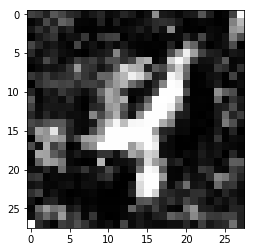

Epoch 1/2... Discriminator Loss: 0.0134... Generator Loss: 5.4967
Epoch 1/2... Discriminator Loss: 0.0251... Generator Loss: 4.4229
Epoch 1/2... Discriminator Loss: 0.0497... Generator Loss: 3.6151
Epoch 1/2... Discriminator Loss: 0.1944... Generator Loss: 1.7487
Epoch 1/2... Discriminator Loss: 0.0215... Generator Loss: 4.0245
Epoch 1/2... Discriminator Loss: 0.2412... Generator Loss: 1.5406
Epoch 1/2... Discriminator Loss: 1.3944... Generator Loss: 0.2887
Epoch 1/2... Discriminator Loss: 0.3717... Generator Loss: 1.1706
Epoch 1/2... Discriminator Loss: 0.1582... Generator Loss: 1.9218
Epoch 1/2... Discriminator Loss: 0.0715... Generator Loss: 2.7288
Epoch 1/2... Discriminator Loss: 0.2766... Generator Loss: 1.4202
Epoch 1/2... Discriminator Loss: 0.0038... Generator Loss: 7.2922
Epoch 1/2... Discriminator Loss: 0.0569... Generator Loss: 6.6361
Epoch 1/2... Discriminator Loss: 0.0061... Generator Loss: 6.2445
Epoch 1/2... Discriminator Loss: 0.0091... Generator Loss: 4.7183
Epoch 1/2.

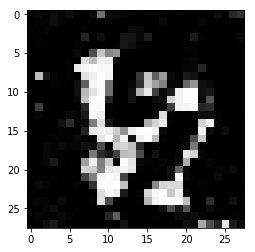

Epoch 1/2... Discriminator Loss: 0.0009... Generator Loss: 7.9222
Epoch 1/2... Discriminator Loss: 0.2351... Generator Loss: 8.2702
Epoch 1/2... Discriminator Loss: 0.0645... Generator Loss: 9.0383
Epoch 1/2... Discriminator Loss: 0.1564... Generator Loss: 1.9326
Epoch 1/2... Discriminator Loss: 0.9311... Generator Loss: 0.5010
Epoch 1/2... Discriminator Loss: 1.1697... Generator Loss: 0.3717


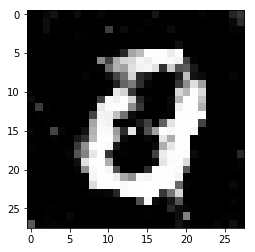

Epoch 1/2... Discriminator Loss: 0.0933... Generator Loss: 2.4183
Epoch 1/2... Discriminator Loss: 0.1867... Generator Loss: 1.7702
Epoch 1/2... Discriminator Loss: 0.1080... Generator Loss: 2.2790
Epoch 1/2... Discriminator Loss: 0.3376... Generator Loss: 1.2501
Epoch 1/2... Discriminator Loss: 0.0730... Generator Loss: 2.6538
Epoch 1/2... Discriminator Loss: 0.1773... Generator Loss: 1.8175
Epoch 1/2... Discriminator Loss: 0.6314... Generator Loss: 0.7590
Epoch 1/2... Discriminator Loss: 0.9504... Generator Loss: 0.4887
Epoch 1/2... Discriminator Loss: 0.1670... Generator Loss: 1.8736
Epoch 1/2... Discriminator Loss: 0.2383... Generator Loss: 1.5520
Epoch 1/2... Discriminator Loss: 0.2583... Generator Loss: 1.4802
Epoch 1/2... Discriminator Loss: 0.1677... Generator Loss: 1.8685
Epoch 1/2... Discriminator Loss: 0.0686... Generator Loss: 2.7133
Epoch 1/2... Discriminator Loss: 0.0640... Generator Loss: 2.7808
Epoch 1/2... Discriminator Loss: 0.3807... Generator Loss: 1.1500
Epoch 1/2.

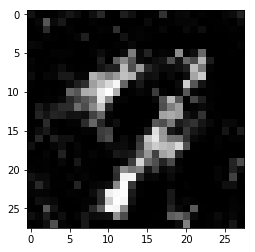

Epoch 1/2... Discriminator Loss: 0.4499... Generator Loss: 1.0153
Epoch 1/2... Discriminator Loss: 0.2307... Generator Loss: 1.5821
Epoch 1/2... Discriminator Loss: 0.1499... Generator Loss: 1.9921
Epoch 1/2... Discriminator Loss: 0.0919... Generator Loss: 2.4433
Epoch 1/2... Discriminator Loss: 0.1542... Generator Loss: 1.9458
Epoch 1/2... Discriminator Loss: 1.2106... Generator Loss: 0.3554
Epoch 1/2... Discriminator Loss: 0.1222... Generator Loss: 2.1627
Epoch 1/2... Discriminator Loss: 0.7526... Generator Loss: 0.6392
Epoch 1/2... Discriminator Loss: 0.0612... Generator Loss: 2.8261
Epoch 1/2... Discriminator Loss: 0.5382... Generator Loss: 0.8852
Epoch 1/2... Discriminator Loss: 0.8841... Generator Loss: 0.5329
Epoch 1/2... Discriminator Loss: 1.4813... Generator Loss: 0.2579
Epoch 1/2... Discriminator Loss: 0.8151... Generator Loss: 0.5845
Epoch 1/2... Discriminator Loss: 0.1148... Generator Loss: 2.2427
Epoch 1/2... Discriminator Loss: 0.0314... Generator Loss: 3.4753
Epoch 1/2.

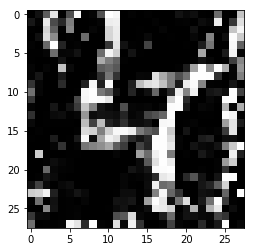

Epoch 1/2... Discriminator Loss: 1.6896... Generator Loss: 0.2061
Epoch 1/2... Discriminator Loss: 0.1857... Generator Loss: 1.7763
Epoch 1/2... Discriminator Loss: 0.1240... Generator Loss: 2.1536
Epoch 1/2... Discriminator Loss: 1.6037... Generator Loss: 0.2247
Epoch 1/2... Discriminator Loss: 0.8014... Generator Loss: 0.5955
Epoch 1/2... Discriminator Loss: 2.6708... Generator Loss: 0.0718


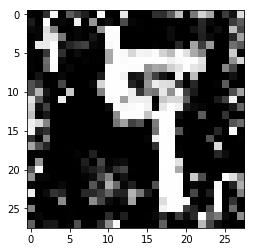

Epoch 1/2... Discriminator Loss: 1.6493... Generator Loss: 0.2134
Epoch 1/2... Discriminator Loss: 1.9975... Generator Loss: 0.1458
Epoch 1/2... Discriminator Loss: 1.1637... Generator Loss: 0.3772
Epoch 1/2... Discriminator Loss: 3.5879... Generator Loss: 0.0280


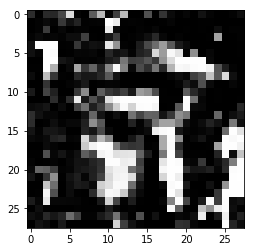

Epoch 1/2... Discriminator Loss: 0.6508... Generator Loss: 0.7380
Epoch 1/2... Discriminator Loss: 0.3527... Generator Loss: 1.2133
Epoch 1/2... Discriminator Loss: 2.1254... Generator Loss: 0.1271
Epoch 1/2... Discriminator Loss: 0.3050... Generator Loss: 1.3361
Epoch 1/2... Discriminator Loss: 0.7804... Generator Loss: 0.6147
Epoch 1/2... Discriminator Loss: 1.9244... Generator Loss: 0.1578
Epoch 1/2... Discriminator Loss: 0.4445... Generator Loss: 1.0248
Epoch 1/2... Discriminator Loss: 0.0667... Generator Loss: 2.7431
Epoch 1/2... Discriminator Loss: 0.0118... Generator Loss: 4.6637
Epoch 1/2... Discriminator Loss: 5.6895... Generator Loss: 0.0034


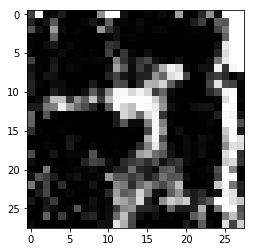

Epoch 1/2... Discriminator Loss: 0.3098... Generator Loss: 14.7256
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 11.3022
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.4952
Epoch 1/2... Discriminator Loss: 0.0006... Generator Loss: 7.3478
Epoch 1/2... Discriminator Loss: 0.0011... Generator Loss: 6.8274
Epoch 1/2... Discriminator Loss: 0.0013... Generator Loss: 6.6398
Epoch 1/2... Discriminator Loss: 0.0013... Generator Loss: 6.6443
Epoch 1/2... Discriminator Loss: 0.0012... Generator Loss: 6.7289
Epoch 1/2... Discriminator Loss: 0.0011... Generator Loss: 6.8530
Epoch 1/2... Discriminator Loss: 0.0009... Generator Loss: 6.9911
Epoch 1/2... Discriminator Loss: 0.0008... Generator Loss: 7.1173
Epoch 1/2... Discriminator Loss: 0.0007... Generator Loss: 7.2394
Epoch 1/2... Discriminator Loss: 0.0006... Generator Loss: 7.3434
Epoch 1/2... Discriminator Loss: 0.0006... Generator Loss: 7.4432
Epoch 1/2... Discriminator Loss: 0.0005... Generator Loss: 7.5269
Epoch 1/

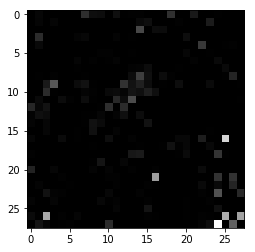

Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.3465
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.3797
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.4081
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.4341
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.4636
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.4920
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.5187
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.5430
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.5709
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.5958
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.6147
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.6395
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.6628
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.6866
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.7072
Epoch 1/2.

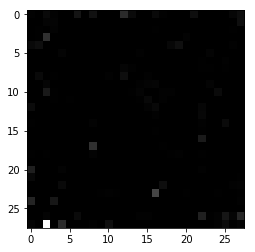

Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.7526
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.7614
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.7708
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.7733
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.7799
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.7919
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.7907
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.8049
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.8072
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.8196
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.8209
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.8264
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.8335
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.8369
Epoch 1/2... Discriminator Loss: 0.0001... Generator Loss: 9.8506
Epoch 1/2.

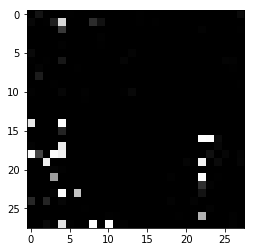

Epoch 1/2... Discriminator Loss: 0.0006... Generator Loss: 7.3871
Epoch 1/2... Discriminator Loss: 0.0006... Generator Loss: 7.4481
Epoch 1/2... Discriminator Loss: 0.0007... Generator Loss: 7.2829
Epoch 1/2... Discriminator Loss: 0.0007... Generator Loss: 7.3341
Epoch 1/2... Discriminator Loss: 0.0007... Generator Loss: 7.2270
Epoch 1/2... Discriminator Loss: 0.0007... Generator Loss: 7.1963
Epoch 1/2... Discriminator Loss: 0.0008... Generator Loss: 7.1627
Epoch 1/2... Discriminator Loss: 0.0009... Generator Loss: 6.9797
Epoch 1/2... Discriminator Loss: 0.0009... Generator Loss: 7.0112
Epoch 1/2... Discriminator Loss: 0.0007... Generator Loss: 7.3210
Epoch 1/2... Discriminator Loss: 0.0007... Generator Loss: 7.2430
Epoch 1/2... Discriminator Loss: 0.0009... Generator Loss: 7.0126
Epoch 1/2... Discriminator Loss: 0.0009... Generator Loss: 6.9614
Epoch 1/2... Discriminator Loss: 0.0009... Generator Loss: 7.0398
Epoch 1/2... Discriminator Loss: 0.0009... Generator Loss: 7.0159
Epoch 1/2.

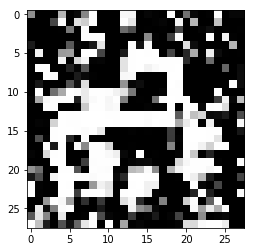

Epoch 1/2... Discriminator Loss: 1.2784... Generator Loss: 22.5126
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.6325
Epoch 1/2... Discriminator Loss: 0.0007... Generator Loss: 7.2967
Epoch 1/2... Discriminator Loss: 0.0005... Generator Loss: 7.5395
Epoch 1/2... Discriminator Loss: 0.0003... Generator Loss: 8.0425
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.4194
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.5549
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.7120
Epoch 1/2... Discriminator Loss: 0.0003... Generator Loss: 8.2053
Epoch 1/2... Discriminator Loss: 0.0002... Generator Loss: 8.5418
Epoch 1/2... Discriminator Loss: 0.0004... Generator Loss: 7.7305
Epoch 1/2... Discriminator Loss: 0.0005... Generator Loss: 7.5265
Epoch 1/2... Discriminator Loss: 0.0014... Generator Loss: 6.5558
Epoch 1/2... Discriminator Loss: 0.0066... Generator Loss: 5.0246
Epoch 1/2... Discriminator Loss: 0.0059... Generator Loss: 5.1378
Epoch 1/2

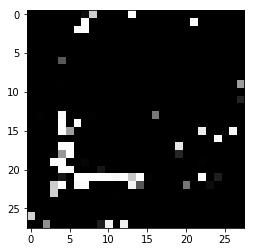

Epoch 1/2... Discriminator Loss: 0.0055... Generator Loss: 5.2084
Epoch 1/2... Discriminator Loss: 0.0099... Generator Loss: 4.6198
Epoch 1/2... Discriminator Loss: 0.0140... Generator Loss: 4.2750
Epoch 1/2... Discriminator Loss: 0.0174... Generator Loss: 4.0617
Epoch 1/2... Discriminator Loss: 0.0152... Generator Loss: 4.1957
Epoch 1/2... Discriminator Loss: 6.2266... Generator Loss: 0.0020


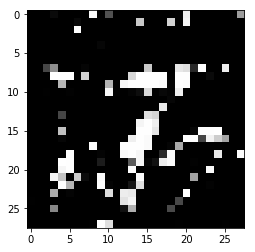

Epoch 1/2... Discriminator Loss: 5.3998... Generator Loss: 22.2797
Epoch 1/2... Discriminator Loss: 0.1605... Generator Loss: 18.5022
Epoch 1/2... Discriminator Loss: 10.1673... Generator Loss: 26.8824
Epoch 1/2... Discriminator Loss: 0.0672... Generator Loss: 2.7331
Epoch 1/2... Discriminator Loss: 0.7253... Generator Loss: 0.6620
Epoch 1/2... Discriminator Loss: 0.0000... Generator Loss: 22.2259
Epoch 1/2... Discriminator Loss: 0.0000... Generator Loss: 19.1405
Epoch 1/2... Discriminator Loss: 7.8297... Generator Loss: 0.0004


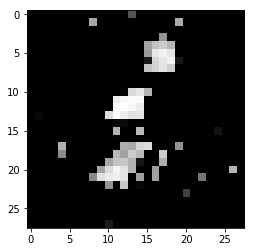

Epoch 1/2... Discriminator Loss: 4.2606... Generator Loss: 0.0142


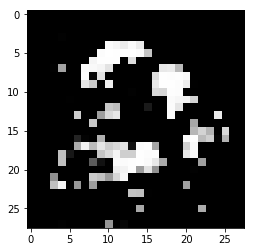

Epoch 1/2... Discriminator Loss: 8.7442... Generator Loss: 13.3044
Epoch 1/2... Discriminator Loss: 1.4182... Generator Loss: 0.2783
Epoch 1/2... Discriminator Loss: 0.3849... Generator Loss: 1.7822
Epoch 1/2... Discriminator Loss: 0.2184... Generator Loss: 3.3793
Epoch 1/2... Discriminator Loss: 0.0712... Generator Loss: 2.6892
Epoch 1/2... Discriminator Loss: 0.0977... Generator Loss: 2.4882
Epoch 1/2... Discriminator Loss: 0.0582... Generator Loss: 2.9353
Epoch 1/2... Discriminator Loss: 0.0300... Generator Loss: 3.5523
Epoch 1/2... Discriminator Loss: 0.0134... Generator Loss: 4.3344
Epoch 1/2... Discriminator Loss: 0.0630... Generator Loss: 2.8664
Epoch 1/2... Discriminator Loss: 0.1309... Generator Loss: 2.0979
Epoch 1/2... Discriminator Loss: 0.0595... Generator Loss: 2.8515
Epoch 1/2... Discriminator Loss: 0.0587... Generator Loss: 2.8647
Epoch 1/2... Discriminator Loss: 0.0202... Generator Loss: 3.9214
Epoch 1/2... Discriminator Loss: 0.0278... Generator Loss: 3.5983
Epoch 1/2

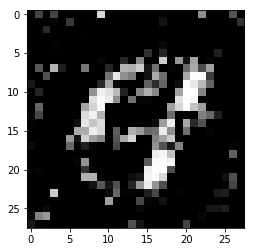

Epoch 1/2... Discriminator Loss: 0.1667... Generator Loss: 1.8739
Epoch 1/2... Discriminator Loss: 3.8994... Generator Loss: 10.3683
Epoch 1/2... Discriminator Loss: 2.6447... Generator Loss: 0.0737


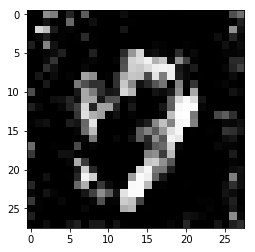

Epoch 1/2... Discriminator Loss: 0.1135... Generator Loss: 2.2318
Epoch 1/2... Discriminator Loss: 0.0290... Generator Loss: 3.5549
Epoch 1/2... Discriminator Loss: 0.0668... Generator Loss: 2.7461
Epoch 1/2... Discriminator Loss: 0.2122... Generator Loss: 1.6545
Epoch 1/2... Discriminator Loss: 0.1948... Generator Loss: 1.7316
Epoch 1/2... Discriminator Loss: 0.0100... Generator Loss: 4.6142
Epoch 1/2... Discriminator Loss: 0.0920... Generator Loss: 2.4528
Epoch 1/2... Discriminator Loss: 0.0402... Generator Loss: 3.2510
Epoch 1/2... Discriminator Loss: 0.1181... Generator Loss: 2.1957
Epoch 1/2... Discriminator Loss: 0.0194... Generator Loss: 3.9722
Epoch 1/2... Discriminator Loss: 0.1971... Generator Loss: 1.7548
Epoch 1/2... Discriminator Loss: 1.4123... Generator Loss: 0.2798
Epoch 1/2... Discriminator Loss: 0.1160... Generator Loss: 2.2118
Epoch 1/2... Discriminator Loss: 1.3819... Generator Loss: 0.2893
Epoch 1/2... Discriminator Loss: 0.5055... Generator Loss: 0.9280
Epoch 1/2.

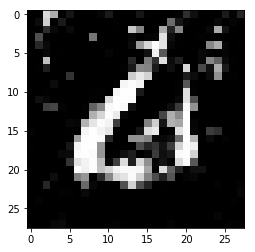

Epoch 1/2... Discriminator Loss: 0.0409... Generator Loss: 7.5748
Epoch 1/2... Discriminator Loss: 0.0051... Generator Loss: 5.3809
Epoch 1/2... Discriminator Loss: 0.0006... Generator Loss: 8.9481
Epoch 1/2... Discriminator Loss: 0.0010... Generator Loss: 9.0702


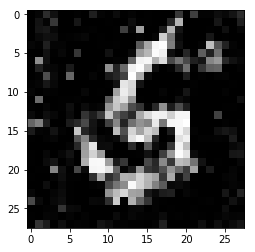

Epoch 1/2... Discriminator Loss: 0.0004... Generator Loss: 9.3952
Epoch 1/2... Discriminator Loss: 0.0040... Generator Loss: 9.4408
Epoch 1/2... Discriminator Loss: 0.0083... Generator Loss: 7.2112
Epoch 1/2... Discriminator Loss: 0.0071... Generator Loss: 6.8421
Epoch 1/2... Discriminator Loss: 0.0055... Generator Loss: 6.5553
Epoch 1/2... Discriminator Loss: 0.0079... Generator Loss: 5.7158
Epoch 1/2... Discriminator Loss: 0.0118... Generator Loss: 4.4528
Epoch 1/2... Discriminator Loss: 0.0106... Generator Loss: 4.5899
Epoch 1/2... Discriminator Loss: 0.0169... Generator Loss: 4.2675
Epoch 1/2... Discriminator Loss: 0.0529... Generator Loss: 3.0781
Epoch 1/2... Discriminator Loss: 0.1651... Generator Loss: 1.8824
Epoch 1/2... Discriminator Loss: 0.1085... Generator Loss: 2.2939
Epoch 1/2... Discriminator Loss: 1.0660... Generator Loss: 0.4315
Epoch 1/2... Discriminator Loss: 0.5708... Generator Loss: 0.8327
Epoch 1/2... Discriminator Loss: 0.7942... Generator Loss: 0.6016
Epoch 1/2.

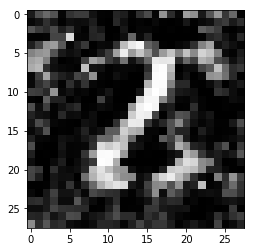

Epoch 1/2... Discriminator Loss: 4.8155... Generator Loss: 0.0081


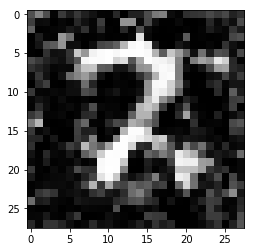

Epoch 1/2... Discriminator Loss: 3.2634... Generator Loss: 11.4085
Epoch 1/2... Discriminator Loss: 2.3571... Generator Loss: 13.2889
Epoch 1/2... Discriminator Loss: 0.0131... Generator Loss: 4.3421
Epoch 1/2... Discriminator Loss: 1.0158... Generator Loss: 0.4496
Epoch 1/2... Discriminator Loss: 0.0065... Generator Loss: 5.0405
Epoch 1/2... Discriminator Loss: 0.0076... Generator Loss: 4.8897
Epoch 1/2... Discriminator Loss: 0.0024... Generator Loss: 6.0224
Epoch 1/2... Discriminator Loss: 0.0142... Generator Loss: 4.2626
Epoch 1/2... Discriminator Loss: 0.0054... Generator Loss: 5.2437
Epoch 1/2... Discriminator Loss: 0.0634... Generator Loss: 2.7894
Epoch 1/2... Discriminator Loss: 0.0069... Generator Loss: 4.9755
Epoch 1/2... Discriminator Loss: 0.1105... Generator Loss: 2.2574
Epoch 1/2... Discriminator Loss: 0.1190... Generator Loss: 2.1877
Epoch 1/2... Discriminator Loss: 0.4917... Generator Loss: 0.9457
Epoch 1/2... Discriminator Loss: 0.2087... Generator Loss: 1.6696
Epoch 1/

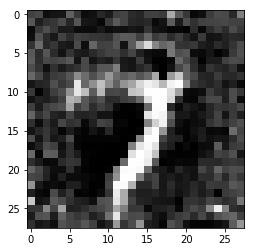

Epoch 1/2... Discriminator Loss: 0.0305... Generator Loss: 3.5075
Epoch 1/2... Discriminator Loss: 0.1295... Generator Loss: 2.7257
Epoch 1/2... Discriminator Loss: 0.0563... Generator Loss: 3.1107
Epoch 1/2... Discriminator Loss: 1.8103... Generator Loss: 0.1787
Epoch 1/2... Discriminator Loss: 1.7360... Generator Loss: 0.1939
Epoch 1/2... Discriminator Loss: 1.7575... Generator Loss: 0.1893
Epoch 1/2... Discriminator Loss: 0.1655... Generator Loss: 1.8808
Epoch 1/2... Discriminator Loss: 0.2868... Generator Loss: 1.3898
Epoch 1/2... Discriminator Loss: 0.0225... Generator Loss: 3.8245
Epoch 1/2... Discriminator Loss: 0.1621... Generator Loss: 1.9015
Epoch 1/2... Discriminator Loss: 0.0411... Generator Loss: 3.2126
Epoch 1/2... Discriminator Loss: 0.1437... Generator Loss: 2.0239
Epoch 1/2... Discriminator Loss: 1.0929... Generator Loss: 0.4084
Epoch 1/2... Discriminator Loss: 1.7176... Generator Loss: 0.1979
Epoch 1/2... Discriminator Loss: 1.4474... Generator Loss: 0.2681
Epoch 1/2.

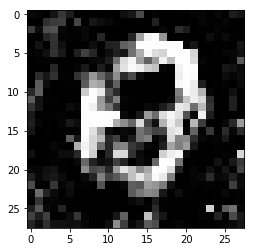

Epoch 1/2... Discriminator Loss: 0.6290... Generator Loss: 0.7640
Epoch 1/2... Discriminator Loss: 0.5113... Generator Loss: 0.9257
Epoch 1/2... Discriminator Loss: 0.6118... Generator Loss: 0.8005
Epoch 1/2... Discriminator Loss: 1.4185... Generator Loss: 0.2774
Epoch 1/2... Discriminator Loss: 0.3979... Generator Loss: 1.1345
Epoch 1/2... Discriminator Loss: 0.8242... Generator Loss: 0.5804
Epoch 1/2... Discriminator Loss: 0.2957... Generator Loss: 1.3661
Epoch 1/2... Discriminator Loss: 0.4311... Generator Loss: 1.0511
Epoch 1/2... Discriminator Loss: 0.2306... Generator Loss: 1.6245
Epoch 1/2... Discriminator Loss: 0.8736... Generator Loss: 0.5415
Epoch 1/2... Discriminator Loss: 0.8133... Generator Loss: 0.5938
Epoch 1/2... Discriminator Loss: 0.4829... Generator Loss: 0.9732
Epoch 1/2... Discriminator Loss: 0.3439... Generator Loss: 2.4627
Epoch 1/2... Discriminator Loss: 4.1664... Generator Loss: 0.0156


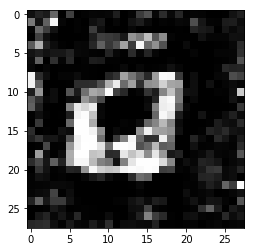

Epoch 1/2... Discriminator Loss: 2.7368... Generator Loss: 0.0670


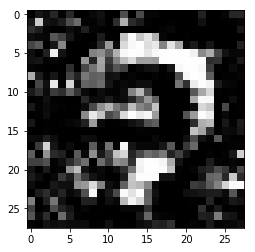

Epoch 1/2... Discriminator Loss: 0.3771... Generator Loss: 10.8892
Epoch 1/2... Discriminator Loss: 0.0016... Generator Loss: 8.6881
Epoch 1/2... Discriminator Loss: 0.0008... Generator Loss: 7.2328
Epoch 1/2... Discriminator Loss: 0.0079... Generator Loss: 8.4845
Epoch 1/2... Discriminator Loss: 0.0014... Generator Loss: 6.8199
Epoch 1/2... Discriminator Loss: 0.0018... Generator Loss: 6.5903
Epoch 1/2... Discriminator Loss: 0.0123... Generator Loss: 4.4059
Epoch 1/2... Discriminator Loss: 0.0132... Generator Loss: 4.3320
Epoch 1/2... Discriminator Loss: 0.2371... Generator Loss: 1.5556
Epoch 1/2... Discriminator Loss: 0.0738... Generator Loss: 2.6477
Epoch 1/2... Discriminator Loss: 0.4187... Generator Loss: 1.0810
Epoch 1/2... Discriminator Loss: 0.1489... Generator Loss: 1.9780
Epoch 1/2... Discriminator Loss: 0.0818... Generator Loss: 2.5473
Epoch 1/2... Discriminator Loss: 0.1732... Generator Loss: 1.8437
Epoch 1/2... Discriminator Loss: 0.1644... Generator Loss: 1.8867
Epoch 1/2

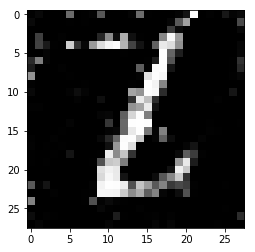

Epoch 1/2... Discriminator Loss: 0.0013... Generator Loss: 6.6211
Epoch 1/2... Discriminator Loss: 0.0243... Generator Loss: 3.7298
Epoch 1/2... Discriminator Loss: 0.0583... Generator Loss: 3.0169
Epoch 1/2... Discriminator Loss: 0.0493... Generator Loss: 3.0461
Epoch 1/2... Discriminator Loss: 0.2059... Generator Loss: 1.7533
Epoch 1/2... Discriminator Loss: 0.3800... Generator Loss: 1.1681
Epoch 1/2... Discriminator Loss: 0.0179... Generator Loss: 4.7171
Epoch 1/2... Discriminator Loss: 0.1318... Generator Loss: 2.1706
Epoch 1/2... Discriminator Loss: 0.2155... Generator Loss: 1.6756
Epoch 1/2... Discriminator Loss: 3.4815... Generator Loss: 0.0312


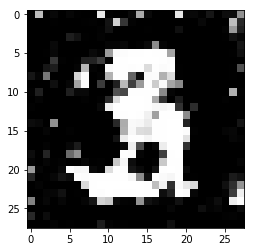

Epoch 1/2... Discriminator Loss: 0.0033... Generator Loss: 13.9167
Epoch 1/2... Discriminator Loss: 0.0501... Generator Loss: 16.1428
Epoch 1/2... Discriminator Loss: 0.0233... Generator Loss: 14.9551
Epoch 1/2... Discriminator Loss: 0.0033... Generator Loss: 5.7190
Epoch 1/2... Discriminator Loss: 0.6552... Generator Loss: 0.7326
Epoch 1/2... Discriminator Loss: 1.5010... Generator Loss: 0.2522
Epoch 1/2... Discriminator Loss: 0.9567... Generator Loss: 0.4847
Epoch 1/2... Discriminator Loss: 0.1441... Generator Loss: 2.0084
Epoch 1/2... Discriminator Loss: 0.2040... Generator Loss: 1.6901
Epoch 1/2... Discriminator Loss: 0.2143... Generator Loss: 1.6461
Epoch 1/2... Discriminator Loss: 0.2067... Generator Loss: 1.6780
Epoch 1/2... Discriminator Loss: 0.2211... Generator Loss: 1.6177
Epoch 1/2... Discriminator Loss: 0.2428... Generator Loss: 1.5345
Epoch 2/2... Discriminator Loss: 0.1656... Generator Loss: 1.8797
Epoch 2/2... Discriminator Loss: 0.3147... Generator Loss: 1.3277
Epoch 2

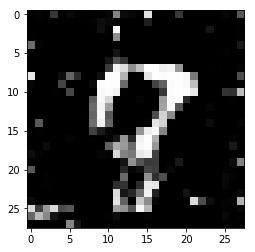

Epoch 2/2... Discriminator Loss: 0.1289... Generator Loss: 2.1426
Epoch 2/2... Discriminator Loss: 1.6849... Generator Loss: 0.2067
Epoch 2/2... Discriminator Loss: 0.2181... Generator Loss: 1.6303
Epoch 2/2... Discriminator Loss: 0.2787... Generator Loss: 1.4216
Epoch 2/2... Discriminator Loss: 4.7254... Generator Loss: 0.0089


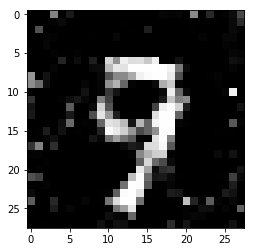

Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 6.5695
Epoch 2/2... Discriminator Loss: 0.0019... Generator Loss: 7.0231
Epoch 2/2... Discriminator Loss: 0.0359... Generator Loss: 7.7109
Epoch 2/2... Discriminator Loss: 0.0163... Generator Loss: 8.4422
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 7.9223
Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 8.1577
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 7.3765
Epoch 2/2... Discriminator Loss: 0.0073... Generator Loss: 7.1680
Epoch 2/2... Discriminator Loss: 0.0010... Generator Loss: 7.2818
Epoch 2/2... Discriminator Loss: 0.0138... Generator Loss: 6.6027
Epoch 2/2... Discriminator Loss: 0.0022... Generator Loss: 6.6189
Epoch 2/2... Discriminator Loss: 0.0079... Generator Loss: 4.8506
Epoch 2/2... Discriminator Loss: 0.0112... Generator Loss: 5.8321
Epoch 2/2... Discriminator Loss: 0.0331... Generator Loss: 3.4423
Epoch 2/2... Discriminator Loss: 0.0060... Generator Loss: 5.1255
Epoch 2/2.

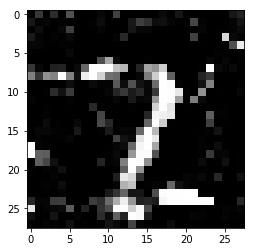

Epoch 2/2... Discriminator Loss: 0.8996... Generator Loss: 0.5221
Epoch 2/2... Discriminator Loss: 0.2817... Generator Loss: 1.4045
Epoch 2/2... Discriminator Loss: 0.1442... Generator Loss: 2.0078
Epoch 2/2... Discriminator Loss: 0.7718... Generator Loss: 0.6202
Epoch 2/2... Discriminator Loss: 2.1887... Generator Loss: 0.1189
Epoch 2/2... Discriminator Loss: 2.3683... Generator Loss: 0.0983


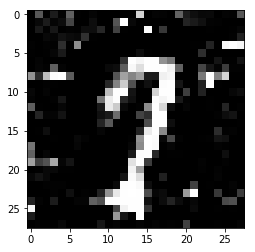

Epoch 2/2... Discriminator Loss: 2.2771... Generator Loss: 0.1082
Epoch 2/2... Discriminator Loss: 0.5480... Generator Loss: 0.8630
Epoch 2/2... Discriminator Loss: 0.9749... Generator Loss: 0.4736
Epoch 2/2... Discriminator Loss: 1.8372... Generator Loss: 0.1735
Epoch 2/2... Discriminator Loss: 1.1031... Generator Loss: 0.4032
Epoch 2/2... Discriminator Loss: 0.5978... Generator Loss: 0.8016
Epoch 2/2... Discriminator Loss: 0.2269... Generator Loss: 1.5946
Epoch 2/2... Discriminator Loss: 0.5222... Generator Loss: 0.8998
Epoch 2/2... Discriminator Loss: 1.6528... Generator Loss: 0.2128
Epoch 2/2... Discriminator Loss: 0.5129... Generator Loss: 0.9132
Epoch 2/2... Discriminator Loss: 0.2713... Generator Loss: 1.4406
Epoch 2/2... Discriminator Loss: 1.0452... Generator Loss: 0.4333
Epoch 2/2... Discriminator Loss: 1.2701... Generator Loss: 0.3297
Epoch 2/2... Discriminator Loss: 1.1665... Generator Loss: 0.3740
Epoch 2/2... Discriminator Loss: 1.2619... Generator Loss: 0.3363
Epoch 2/2.

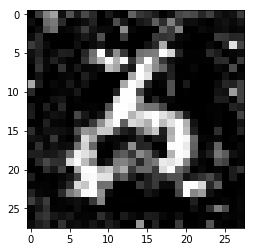

Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 9.4078
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 11.1487
Epoch 2/2... Discriminator Loss: 0.0173... Generator Loss: 13.1348
Epoch 2/2... Discriminator Loss: 0.0020... Generator Loss: 6.2327
Epoch 2/2... Discriminator Loss: 0.0291... Generator Loss: 3.5516
Epoch 2/2... Discriminator Loss: 0.6419... Generator Loss: 0.7472
Epoch 2/2... Discriminator Loss: 3.9490... Generator Loss: 0.0195


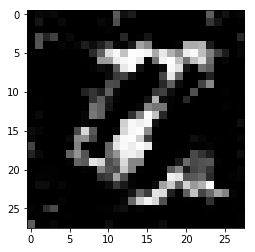

Epoch 2/2... Discriminator Loss: 1.2063... Generator Loss: 0.3557
Epoch 2/2... Discriminator Loss: 1.2359... Generator Loss: 0.3433
Epoch 2/2... Discriminator Loss: 0.5410... Generator Loss: 0.8727
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 7.9849


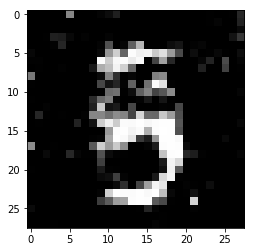

Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 9.2979
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 9.4972
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 10.8783
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.9051
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 11.5532
Epoch 2/2... Discriminator Loss: 0.0046... Generator Loss: 9.7177
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 8.1782
Epoch 2/2... Discriminator Loss: 0.0037... Generator Loss: 7.3766
Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 8.4338
Epoch 2/2... Discriminator Loss: 0.6424... Generator Loss: 0.7466
Epoch 2/2... Discriminator Loss: 2.9352... Generator Loss: 0.0546


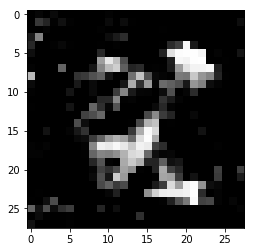

Epoch 2/2... Discriminator Loss: 0.6334... Generator Loss: 0.7567
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 8.0824
Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 7.4246
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 9.3684
Epoch 2/2... Discriminator Loss: 0.0155... Generator Loss: 8.3917
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 9.0742
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 8.7351
Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 8.8940
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 7.5768
Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 8.6267
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 7.5100
Epoch 2/2... Discriminator Loss: 0.0012... Generator Loss: 6.8361
Epoch 2/2... Discriminator Loss: 0.0023... Generator Loss: 6.1377
Epoch 2/2... Discriminator Loss: 0.0031... Generator Loss: 7.4963
Epoch 2/2... Discriminator Loss: 0.0020... Generator Loss: 6.2789
Epoch 2/2.

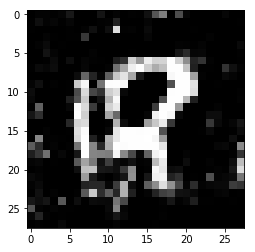

Epoch 2/2... Discriminator Loss: 0.7361... Generator Loss: 0.6520
Epoch 2/2... Discriminator Loss: 0.0012... Generator Loss: 6.7549
Epoch 2/2... Discriminator Loss: 0.0314... Generator Loss: 3.4777
Epoch 2/2... Discriminator Loss: 0.0022... Generator Loss: 6.1257
Epoch 2/2... Discriminator Loss: 0.0323... Generator Loss: 3.4502
Epoch 2/2... Discriminator Loss: 0.1662... Generator Loss: 1.8765
Epoch 2/2... Discriminator Loss: 1.0669... Generator Loss: 0.4217
Epoch 2/2... Discriminator Loss: 2.1535... Generator Loss: 0.1234
Epoch 2/2... Discriminator Loss: 1.0607... Generator Loss: 0.4250
Epoch 2/2... Discriminator Loss: 0.6404... Generator Loss: 0.7490
Epoch 2/2... Discriminator Loss: 0.3336... Generator Loss: 1.2600
Epoch 2/2... Discriminator Loss: 1.5289... Generator Loss: 0.2443
Epoch 2/2... Discriminator Loss: 0.1547... Generator Loss: 1.9430
Epoch 2/2... Discriminator Loss: 6.3736... Generator Loss: 0.0017


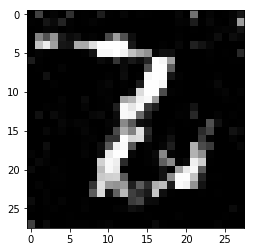

Epoch 2/2... Discriminator Loss: 4.0509... Generator Loss: 0.0176


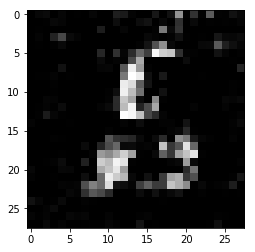

Epoch 2/2... Discriminator Loss: 2.9051... Generator Loss: 15.1752
Epoch 2/2... Discriminator Loss: 6.1249... Generator Loss: 21.6479


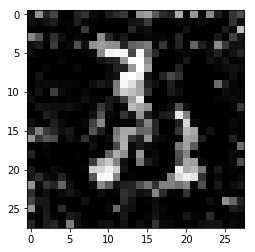

Epoch 2/2... Discriminator Loss: 9.2807... Generator Loss: 0.0001


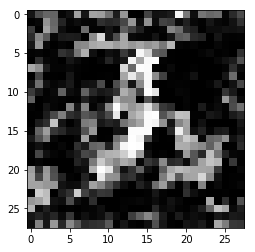

Epoch 2/2... Discriminator Loss: 7.7938... Generator Loss: 0.0004


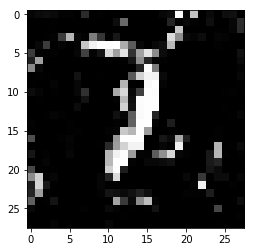

Epoch 2/2... Discriminator Loss: 0.8813... Generator Loss: 0.5348
Epoch 2/2... Discriminator Loss: 0.0662... Generator Loss: 2.7486
Epoch 2/2... Discriminator Loss: 0.0092... Generator Loss: 4.6944
Epoch 2/2... Discriminator Loss: 0.0665... Generator Loss: 2.7430
Epoch 2/2... Discriminator Loss: 6.6354... Generator Loss: 0.0013


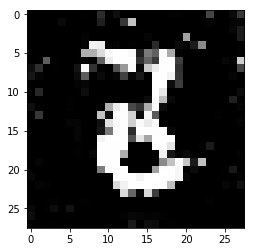

Epoch 2/2... Discriminator Loss: 0.7973... Generator Loss: 0.5988
Epoch 2/2... Discriminator Loss: 2.5602... Generator Loss: 0.0804


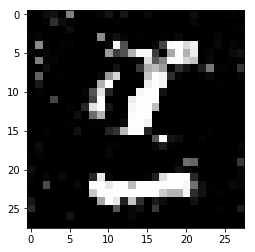

Epoch 2/2... Discriminator Loss: 0.5348... Generator Loss: 0.8814
Epoch 2/2... Discriminator Loss: 0.1245... Generator Loss: 2.1449
Epoch 2/2... Discriminator Loss: 0.0865... Generator Loss: 2.4907
Epoch 2/2... Discriminator Loss: 0.0424... Generator Loss: 3.1820
Epoch 2/2... Discriminator Loss: 0.2633... Generator Loss: 1.4696
Epoch 2/2... Discriminator Loss: 0.2589... Generator Loss: 1.4781
Epoch 2/2... Discriminator Loss: 0.5591... Generator Loss: 0.8480
Epoch 2/2... Discriminator Loss: 0.6221... Generator Loss: 0.7696
Epoch 2/2... Discriminator Loss: 0.1957... Generator Loss: 1.7273
Epoch 2/2... Discriminator Loss: 0.3008... Generator Loss: 1.3482
Epoch 2/2... Discriminator Loss: 0.3022... Generator Loss: 1.3439
Epoch 2/2... Discriminator Loss: 1.0229... Generator Loss: 0.4456
Epoch 2/2... Discriminator Loss: 0.7159... Generator Loss: 0.6709
Epoch 2/2... Discriminator Loss: 0.3357... Generator Loss: 1.2547
Epoch 2/2... Discriminator Loss: 0.6626... Generator Loss: 0.7257
Epoch 2/2.

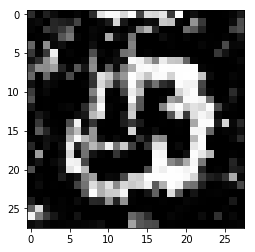

Epoch 2/2... Discriminator Loss: 1.7595... Generator Loss: 0.1897
Epoch 2/2... Discriminator Loss: 3.5776... Generator Loss: 0.0283


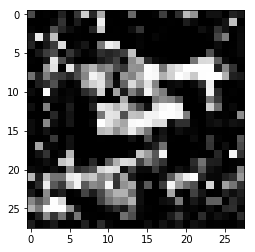

Epoch 2/2... Discriminator Loss: 0.0032... Generator Loss: 7.8926
Epoch 2/2... Discriminator Loss: 0.2084... Generator Loss: 14.8469
Epoch 2/2... Discriminator Loss: 4.0173... Generator Loss: 0.0182


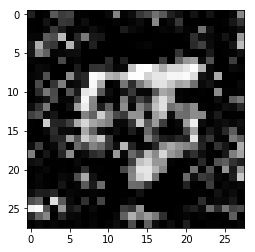

Epoch 2/2... Discriminator Loss: 17.2760... Generator Loss: 0.0000


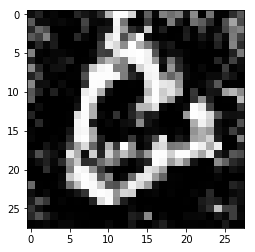

Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 6.6033
Epoch 2/2... Discriminator Loss: 0.3386... Generator Loss: 1.2476
Epoch 2/2... Discriminator Loss: 0.1068... Generator Loss: 2.2895
Epoch 2/2... Discriminator Loss: 0.0319... Generator Loss: 3.4609
Epoch 2/2... Discriminator Loss: 0.0214... Generator Loss: 3.8570
Epoch 2/2... Discriminator Loss: 0.0098... Generator Loss: 4.6269
Epoch 2/2... Discriminator Loss: 0.0742... Generator Loss: 2.6384
Epoch 2/2... Discriminator Loss: 0.0048... Generator Loss: 5.3515
Epoch 2/2... Discriminator Loss: 0.0124... Generator Loss: 4.3936
Epoch 2/2... Discriminator Loss: 0.0229... Generator Loss: 3.7873
Epoch 2/2... Discriminator Loss: 0.0309... Generator Loss: 3.4922
Epoch 2/2... Discriminator Loss: 0.0527... Generator Loss: 2.9687
Epoch 2/2... Discriminator Loss: 0.1255... Generator Loss: 2.1375
Epoch 2/2... Discriminator Loss: 0.0828... Generator Loss: 2.5328
Epoch 2/2... Discriminator Loss: 0.0646... Generator Loss: 2.7718
Epoch 2/2.

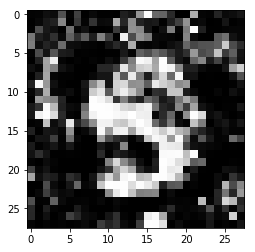

Epoch 2/2... Discriminator Loss: 1.0497... Generator Loss: 0.4308
Epoch 2/2... Discriminator Loss: 20.6954... Generator Loss: 0.0000


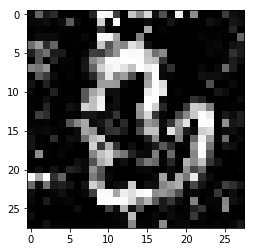

Epoch 2/2... Discriminator Loss: 9.1831... Generator Loss: 18.5188
Epoch 2/2... Discriminator Loss: 27.6933... Generator Loss: 0.0000


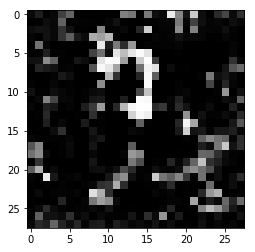

Epoch 2/2... Discriminator Loss: 0.0016... Generator Loss: 6.4220
Epoch 2/2... Discriminator Loss: 0.0071... Generator Loss: 4.9490
Epoch 2/2... Discriminator Loss: 0.0124... Generator Loss: 4.4211
Epoch 2/2... Discriminator Loss: 0.0200... Generator Loss: 5.7775
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 6.7892
Epoch 2/2... Discriminator Loss: 0.0643... Generator Loss: 2.7768
Epoch 2/2... Discriminator Loss: 0.0298... Generator Loss: 3.5434
Epoch 2/2... Discriminator Loss: 0.0236... Generator Loss: 3.7587
Epoch 2/2... Discriminator Loss: 0.0376... Generator Loss: 3.3287
Epoch 2/2... Discriminator Loss: 0.0676... Generator Loss: 2.7573
Epoch 2/2... Discriminator Loss: 0.1160... Generator Loss: 2.2114
Epoch 2/2... Discriminator Loss: 0.0818... Generator Loss: 2.5441
Epoch 2/2... Discriminator Loss: 0.0528... Generator Loss: 2.9964
Epoch 2/2... Discriminator Loss: 0.5869... Generator Loss: 0.8175
Epoch 2/2... Discriminator Loss: 0.1776... Generator Loss: 1.8158
Epoch 2/2.

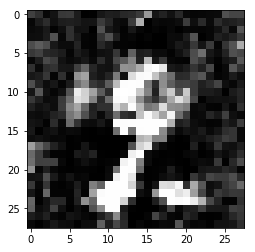

Epoch 2/2... Discriminator Loss: 1.4858... Generator Loss: 0.2566
Epoch 2/2... Discriminator Loss: 0.6657... Generator Loss: 0.7297
Epoch 2/2... Discriminator Loss: 1.1668... Generator Loss: 0.3731
Epoch 2/2... Discriminator Loss: 6.0559... Generator Loss: 0.0023


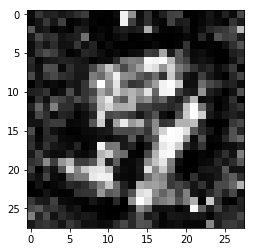

Epoch 2/2... Discriminator Loss: 4.2615... Generator Loss: 0.0142


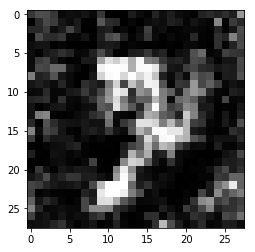

Epoch 2/2... Discriminator Loss: 0.0141... Generator Loss: 10.7004
Epoch 2/2... Discriminator Loss: 0.0161... Generator Loss: 4.1398
Epoch 2/2... Discriminator Loss: 0.0501... Generator Loss: 3.0181
Epoch 2/2... Discriminator Loss: 0.4852... Generator Loss: 0.9561
Epoch 2/2... Discriminator Loss: 0.6383... Generator Loss: 0.7512
Epoch 2/2... Discriminator Loss: 0.5905... Generator Loss: 0.8075
Epoch 2/2... Discriminator Loss: 0.2643... Generator Loss: 1.4600
Epoch 2/2... Discriminator Loss: 0.1700... Generator Loss: 1.8560
Epoch 2/2... Discriminator Loss: 0.0582... Generator Loss: 2.8729
Epoch 2/2... Discriminator Loss: 0.0228... Generator Loss: 3.8087
Epoch 2/2... Discriminator Loss: 0.0807... Generator Loss: 2.5572
Epoch 2/2... Discriminator Loss: 0.0251... Generator Loss: 3.6979
Epoch 2/2... Discriminator Loss: 0.0892... Generator Loss: 2.4616
Epoch 2/2... Discriminator Loss: 0.0238... Generator Loss: 3.7702
Epoch 2/2... Discriminator Loss: 0.1246... Generator Loss: 2.1445
Epoch 2/2

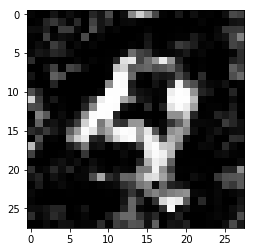

Epoch 2/2... Discriminator Loss: 0.0432... Generator Loss: 10.6409
Epoch 2/2... Discriminator Loss: 0.0209... Generator Loss: 8.0229
Epoch 2/2... Discriminator Loss: 0.0571... Generator Loss: 11.6676
Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 11.5857
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 10.7930
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 7.5908
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 9.9793
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 7.6337
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 7.7832
Epoch 2/2... Discriminator Loss: 0.0025... Generator Loss: 6.0490
Epoch 2/2... Discriminator Loss: 0.0097... Generator Loss: 5.3466
Epoch 2/2... Discriminator Loss: 0.0037... Generator Loss: 5.5885
Epoch 2/2... Discriminator Loss: 0.0148... Generator Loss: 4.2297
Epoch 2/2... Discriminator Loss: 0.0455... Generator Loss: 3.1121
Epoch 2/2... Discriminator Loss: 0.2142... Generator Loss: 1.6459
Epoch 

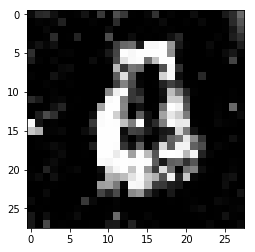

Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 7.0104
Epoch 2/2... Discriminator Loss: 0.0011... Generator Loss: 6.8643
Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 8.6516
Epoch 2/2... Discriminator Loss: 0.0209... Generator Loss: 3.8776
Epoch 2/2... Discriminator Loss: 0.0031... Generator Loss: 6.0158
Epoch 2/2... Discriminator Loss: 0.0098... Generator Loss: 4.6349
Epoch 2/2... Discriminator Loss: 0.7151... Generator Loss: 0.6717
Epoch 2/2... Discriminator Loss: 0.0299... Generator Loss: 3.5259
Epoch 2/2... Discriminator Loss: 2.3080... Generator Loss: 0.1048
Epoch 2/2... Discriminator Loss: 0.4854... Generator Loss: 0.9557
Epoch 2/2... Discriminator Loss: 2.3904... Generator Loss: 0.0961


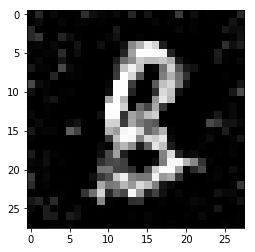

Epoch 2/2... Discriminator Loss: 0.0290... Generator Loss: 3.5550
Epoch 2/2... Discriminator Loss: 0.5334... Generator Loss: 0.8834
Epoch 2/2... Discriminator Loss: 2.2134... Generator Loss: 0.1158
Epoch 2/2... Discriminator Loss: 1.8334... Generator Loss: 0.1742
Epoch 2/2... Discriminator Loss: 1.7715... Generator Loss: 0.1864
Epoch 2/2... Discriminator Loss: 2.5100... Generator Loss: 0.0848


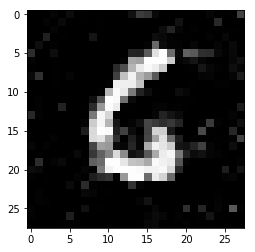

Epoch 2/2... Discriminator Loss: 1.9853... Generator Loss: 0.1477
Epoch 2/2... Discriminator Loss: 0.4734... Generator Loss: 0.9752
Epoch 2/2... Discriminator Loss: 2.7204... Generator Loss: 0.0681


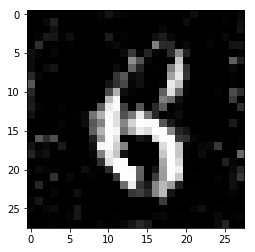

Epoch 2/2... Discriminator Loss: 1.3322... Generator Loss: 0.3077
Epoch 2/2... Discriminator Loss: 0.3232... Generator Loss: 1.2868
Epoch 2/2... Discriminator Loss: 0.8087... Generator Loss: 0.5896
Epoch 2/2... Discriminator Loss: 2.1506... Generator Loss: 0.1238
Epoch 2/2... Discriminator Loss: 1.9249... Generator Loss: 0.1577
Epoch 2/2... Discriminator Loss: 1.6330... Generator Loss: 0.2186
Epoch 2/2... Discriminator Loss: 1.7981... Generator Loss: 0.1811
Epoch 2/2... Discriminator Loss: 0.5688... Generator Loss: 0.8352


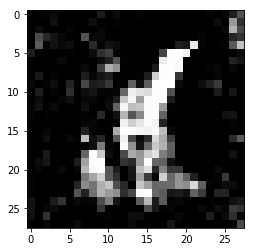

Epoch 2/2... Discriminator Loss: 2.8373... Generator Loss: 0.0604


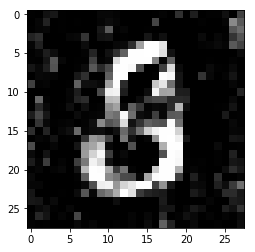

Epoch 2/2... Discriminator Loss: 1.9754... Generator Loss: 0.1493
Epoch 2/2... Discriminator Loss: 0.0146... Generator Loss: 5.9918
Epoch 2/2... Discriminator Loss: 0.0523... Generator Loss: 9.8091
Epoch 2/2... Discriminator Loss: 0.8015... Generator Loss: 0.5954
Epoch 2/2... Discriminator Loss: 6.7151... Generator Loss: 0.0012


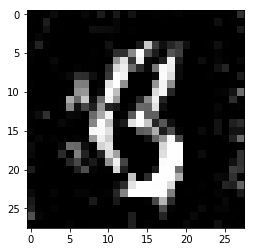

Epoch 2/2... Discriminator Loss: 2.6125... Generator Loss: 0.0762


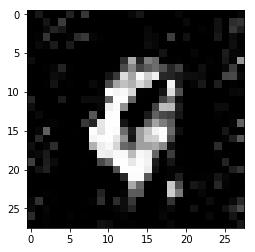

Epoch 2/2... Discriminator Loss: 1.1803... Generator Loss: 0.3670
Epoch 2/2... Discriminator Loss: 1.9399... Generator Loss: 0.1552
Epoch 2/2... Discriminator Loss: 1.3671... Generator Loss: 0.2942
Epoch 2/2... Discriminator Loss: 2.3482... Generator Loss: 0.1004
Epoch 2/2... Discriminator Loss: 5.6664... Generator Loss: 0.0035


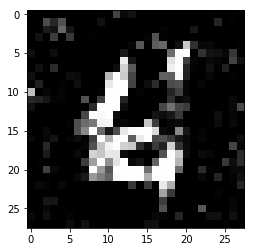

Epoch 2/2... Discriminator Loss: 0.9879... Generator Loss: 0.4658
Epoch 2/2... Discriminator Loss: 1.3510... Generator Loss: 0.2997
Epoch 2/2... Discriminator Loss: 1.5339... Generator Loss: 0.2430
Epoch 2/2... Discriminator Loss: 7.2913... Generator Loss: 0.0007


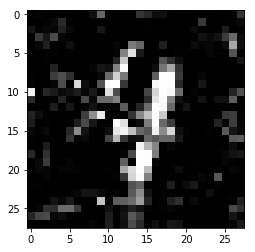

Epoch 2/2... Discriminator Loss: 1.1595... Generator Loss: 0.3764
Epoch 2/2... Discriminator Loss: 1.4782... Generator Loss: 0.2588
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 16.8630
Epoch 2/2... Discriminator Loss: 1.3000... Generator Loss: 15.6515
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 14.5430
Epoch 2/2... Discriminator Loss: 0.0361... Generator Loss: 3.3393
Epoch 2/2... Discriminator Loss: 0.0355... Generator Loss: 3.3553
Epoch 2/2... Discriminator Loss: 1.6937... Generator Loss: 0.2032
Epoch 2/2... Discriminator Loss: 0.4415... Generator Loss: 1.0302
Epoch 2/2... Discriminator Loss: 0.4930... Generator Loss: 0.9436
Epoch 2/2... Discriminator Loss: 0.1486... Generator Loss: 1.9797
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 9.6710
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 9.5707
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.2203
Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 8.5711
Epoch 

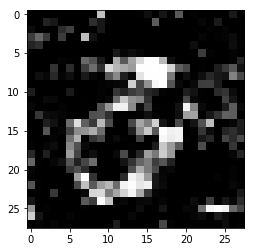

Epoch 2/2... Discriminator Loss: 1.8890... Generator Loss: 0.1640
Epoch 2/2... Discriminator Loss: 4.0342... Generator Loss: 0.0179


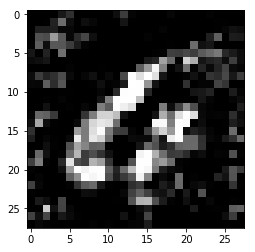

Epoch 2/2... Discriminator Loss: 1.1969... Generator Loss: 0.3597
Epoch 2/2... Discriminator Loss: 0.5395... Generator Loss: 0.8748
Epoch 2/2... Discriminator Loss: 1.1851... Generator Loss: 0.3650
Epoch 2/2... Discriminator Loss: 2.4334... Generator Loss: 0.0918


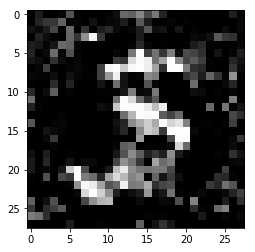

Epoch 2/2... Discriminator Loss: 1.0188... Generator Loss: 0.4479
Epoch 2/2... Discriminator Loss: 4.4568... Generator Loss: 0.0117


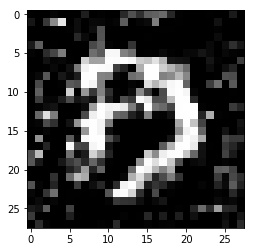

Epoch 2/2... Discriminator Loss: 2.2918... Generator Loss: 0.1066
Epoch 2/2... Discriminator Loss: 1.4704... Generator Loss: 0.2612
Epoch 2/2... Discriminator Loss: 1.4762... Generator Loss: 0.2594
Epoch 2/2... Discriminator Loss: 4.3609... Generator Loss: 0.0128


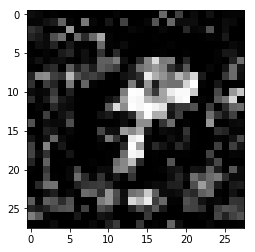

Epoch 2/2... Discriminator Loss: 4.8146... Generator Loss: 0.0081


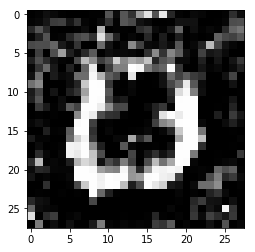

Epoch 2/2... Discriminator Loss: 0.1974... Generator Loss: 1.7196
Epoch 2/2... Discriminator Loss: 0.5633... Generator Loss: 0.8425
Epoch 2/2... Discriminator Loss: 1.3160... Generator Loss: 0.3123
Epoch 2/2... Discriminator Loss: 4.1396... Generator Loss: 0.0161


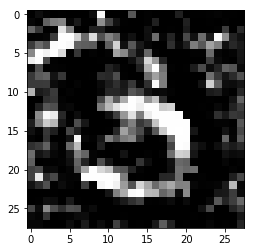

Epoch 2/2... Discriminator Loss: 3.5299... Generator Loss: 0.0307


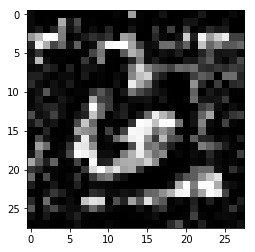

Epoch 2/2... Discriminator Loss: 4.7576... Generator Loss: 0.0087


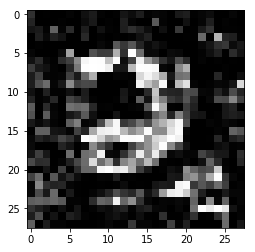

Epoch 2/2... Discriminator Loss: 5.3906... Generator Loss: 0.0046


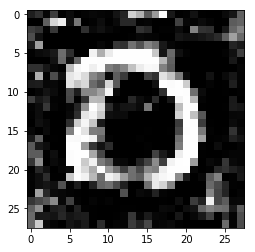

Epoch 2/2... Discriminator Loss: 5.7155... Generator Loss: 0.0033


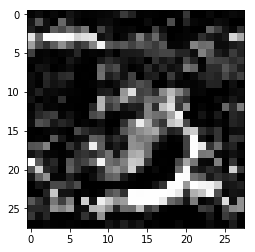

Epoch 2/2... Discriminator Loss: 4.6654... Generator Loss: 0.0095


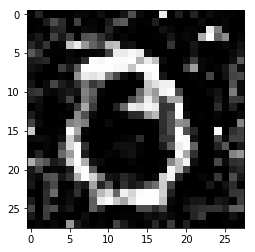

Epoch 2/2... Discriminator Loss: 5.5947... Generator Loss: 0.0037


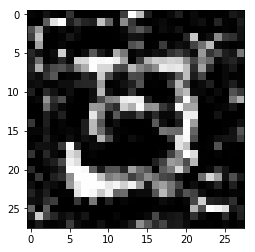

Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 12.8423
Epoch 2/2... Discriminator Loss: 1.3894... Generator Loss: 17.6847
Epoch 2/2... Discriminator Loss: 0.0084... Generator Loss: 19.1020
Epoch 2/2... Discriminator Loss: 0.0019... Generator Loss: 6.2620
Epoch 2/2... Discriminator Loss: 6.7792... Generator Loss: 0.0011


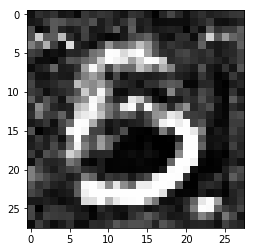

Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 8.7100
Epoch 2/2... Discriminator Loss: 0.0175... Generator Loss: 4.0545
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 7.4414
Epoch 2/2... Discriminator Loss: 0.0019... Generator Loss: 6.2613
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 7.9472
Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 7.3358
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 7.6594
Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 7.0300
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 7.9232
Epoch 2/2... Discriminator Loss: 0.0015... Generator Loss: 6.4921
Epoch 2/2... Discriminator Loss: 0.0027... Generator Loss: 5.9170
Epoch 2/2... Discriminator Loss: 0.0032... Generator Loss: 5.7518
Epoch 2/2... Discriminator Loss: 0.0060... Generator Loss: 5.1196
Epoch 2/2... Discriminator Loss: 0.0028... Generator Loss: 5.8887
Epoch 2/2... Discriminator Loss: 0.0096... Generator Loss: 4.6464
Epoch 2/2.

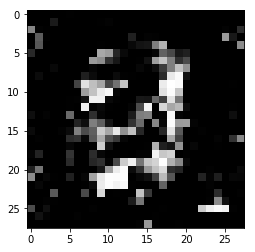

Epoch 2/2... Discriminator Loss: 0.0094... Generator Loss: 4.6719
Epoch 2/2... Discriminator Loss: 0.0192... Generator Loss: 3.9631
Epoch 2/2... Discriminator Loss: 0.0202... Generator Loss: 3.9128
Epoch 2/2... Discriminator Loss: 0.0133... Generator Loss: 4.3247
Epoch 2/2... Discriminator Loss: 0.0224... Generator Loss: 3.8101
Epoch 2/2... Discriminator Loss: 0.0180... Generator Loss: 4.0274
Epoch 2/2... Discriminator Loss: 0.0018... Generator Loss: 6.3390
Epoch 2/2... Discriminator Loss: 0.1937... Generator Loss: 1.7369
Epoch 2/2... Discriminator Loss: 0.0079... Generator Loss: 4.8432
Epoch 2/2... Discriminator Loss: 0.0179... Generator Loss: 4.0331
Epoch 2/2... Discriminator Loss: 0.0143... Generator Loss: 4.2525
Epoch 2/2... Discriminator Loss: 0.0141... Generator Loss: 4.2862
Epoch 2/2... Discriminator Loss: 0.0372... Generator Loss: 3.3100
Epoch 2/2... Discriminator Loss: 0.1103... Generator Loss: 2.2589
Epoch 2/2... Discriminator Loss: 0.0679... Generator Loss: 2.7240
Epoch 2/2.

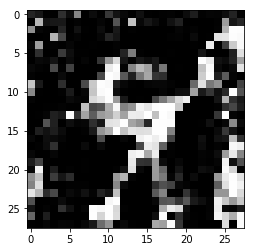

Epoch 2/2... Discriminator Loss: 0.0020... Generator Loss: 6.2252
Epoch 2/2... Discriminator Loss: 0.0250... Generator Loss: 3.7010
Epoch 2/2... Discriminator Loss: 0.0072... Generator Loss: 4.9411
Epoch 2/2... Discriminator Loss: 0.0108... Generator Loss: 4.5370
Epoch 2/2... Discriminator Loss: 0.0123... Generator Loss: 4.4053
Epoch 2/2... Discriminator Loss: 0.0699... Generator Loss: 2.6958
Epoch 2/2... Discriminator Loss: 0.0683... Generator Loss: 2.7176
Epoch 2/2... Discriminator Loss: 0.0123... Generator Loss: 4.4009
Epoch 2/2... Discriminator Loss: 0.0273... Generator Loss: 3.6138
Epoch 2/2... Discriminator Loss: 0.1101... Generator Loss: 2.2611
Epoch 2/2... Discriminator Loss: 0.3193... Generator Loss: 1.2970
Epoch 2/2... Discriminator Loss: 0.0663... Generator Loss: 2.7464
Epoch 2/2... Discriminator Loss: 0.0431... Generator Loss: 3.1666
Epoch 2/2... Discriminator Loss: 0.0523... Generator Loss: 2.9769
Epoch 2/2... Discriminator Loss: 0.0539... Generator Loss: 2.9481
Epoch 2/2.

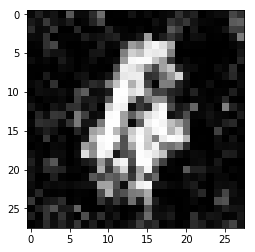

Epoch 2/2... Discriminator Loss: 0.3677... Generator Loss: 1.1811
Epoch 2/2... Discriminator Loss: 0.0508... Generator Loss: 3.0044
Epoch 2/2... Discriminator Loss: 0.3240... Generator Loss: 1.2845
Epoch 2/2... Discriminator Loss: 0.0101... Generator Loss: 4.6042
Epoch 2/2... Discriminator Loss: 0.2078... Generator Loss: 1.6742
Epoch 2/2... Discriminator Loss: 0.0330... Generator Loss: 3.4281
Epoch 2/2... Discriminator Loss: 0.0118... Generator Loss: 4.4436
Epoch 2/2... Discriminator Loss: 0.0646... Generator Loss: 2.7776
Epoch 2/2... Discriminator Loss: 0.0333... Generator Loss: 3.4193
Epoch 2/2... Discriminator Loss: 0.0037... Generator Loss: 5.9226
Epoch 2/2... Discriminator Loss: 0.0926... Generator Loss: 2.4288
Epoch 2/2... Discriminator Loss: 7.8721... Generator Loss: 0.0004


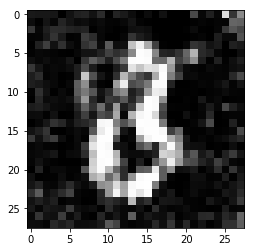

Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 12.0245
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 10.8089
Epoch 2/2... Discriminator Loss: 0.0044... Generator Loss: 12.7047
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 11.5956
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 11.3184
Epoch 2/2... Discriminator Loss: 0.0056... Generator Loss: 10.5794
Epoch 2/2... Discriminator Loss: 0.0082... Generator Loss: 9.8664
Epoch 2/2... Discriminator Loss: 0.0010... Generator Loss: 9.2345
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 8.3416
Epoch 2/2... Discriminator Loss: 0.0039... Generator Loss: 5.6773
Epoch 2/2... Discriminator Loss: 0.0089... Generator Loss: 4.7222
Epoch 2/2... Discriminator Loss: 0.0223... Generator Loss: 3.8146
Epoch 2/2... Discriminator Loss: 0.1849... Generator Loss: 1.7790
Epoch 2/2... Discriminator Loss: 0.1593... Generator Loss: 1.9156
Epoch 2/2... Discriminator Loss: 0.0540... Generator Loss: 2.9460
Epoc

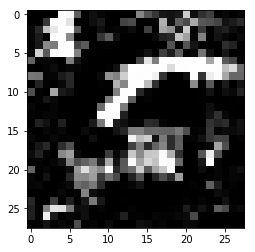

Epoch 2/2... Discriminator Loss: 0.0146... Generator Loss: 4.2309
Epoch 2/2... Discriminator Loss: 0.0881... Generator Loss: 2.4735
Epoch 2/2... Discriminator Loss: 0.7362... Generator Loss: 0.6519
Epoch 2/2... Discriminator Loss: 0.0113... Generator Loss: 4.4845
Epoch 2/2... Discriminator Loss: 0.0585... Generator Loss: 2.8682
Epoch 2/2... Discriminator Loss: 0.6084... Generator Loss: 0.7857
Epoch 2/2... Discriminator Loss: 0.1569... Generator Loss: 1.9293
Epoch 2/2... Discriminator Loss: 0.5369... Generator Loss: 0.8784
Epoch 2/2... Discriminator Loss: 0.0339... Generator Loss: 3.4538
Epoch 2/2... Discriminator Loss: 1.1461... Generator Loss: 0.3825
Epoch 2/2... Discriminator Loss: 0.0506... Generator Loss: 3.0091
Epoch 2/2... Discriminator Loss: 0.4003... Generator Loss: 1.1091
Epoch 2/2... Discriminator Loss: 0.0085... Generator Loss: 4.7771
Epoch 2/2... Discriminator Loss: 2.7835... Generator Loss: 0.0638


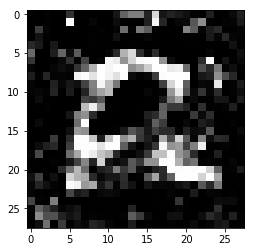

Epoch 2/2... Discriminator Loss: 0.9999... Generator Loss: 0.4587
Epoch 2/2... Discriminator Loss: 0.5267... Generator Loss: 0.8929
Epoch 2/2... Discriminator Loss: 1.8675... Generator Loss: 0.1678
Epoch 2/2... Discriminator Loss: 0.4370... Generator Loss: 1.0393
Epoch 2/2... Discriminator Loss: 0.1775... Generator Loss: 1.8179


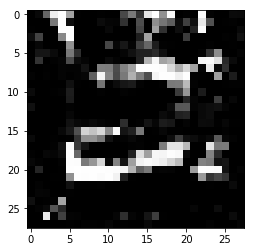

Epoch 2/2... Discriminator Loss: 0.0086... Generator Loss: 4.7606
Epoch 2/2... Discriminator Loss: 0.0018... Generator Loss: 6.3294
Epoch 2/2... Discriminator Loss: 7.0983... Generator Loss: 0.0008


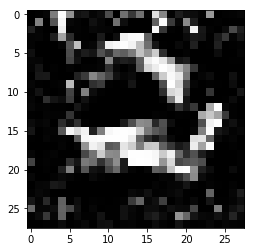

Epoch 2/2... Discriminator Loss: 5.6872... Generator Loss: 0.0034


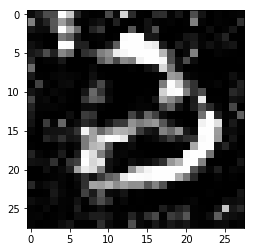

Epoch 2/2... Discriminator Loss: 1.2566... Generator Loss: 0.3349
Epoch 2/2... Discriminator Loss: 1.4570... Generator Loss: 0.2652
Epoch 2/2... Discriminator Loss: 0.0041... Generator Loss: 5.4939
Epoch 2/2... Discriminator Loss: 0.0015... Generator Loss: 6.4714
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 8.1146
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 8.7668
Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 8.3196
Epoch 2/2... Discriminator Loss: 0.0055... Generator Loss: 5.2197
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 8.2561
Epoch 2/2... Discriminator Loss: 0.0032... Generator Loss: 5.7495
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.1241
Epoch 2/2... Discriminator Loss: 0.0013... Generator Loss: 6.6558
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 7.7376
Epoch 2/2... Discriminator Loss: 0.0025... Generator Loss: 5.9965
Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 8.3772
Epoch 2/2.

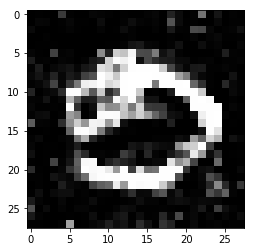

Epoch 2/2... Discriminator Loss: 0.5035... Generator Loss: 0.9278
Epoch 2/2... Discriminator Loss: 0.1140... Generator Loss: 2.2279
Epoch 2/2... Discriminator Loss: 0.7537... Generator Loss: 0.6361
Epoch 2/2... Discriminator Loss: 0.0565... Generator Loss: 2.9729
Epoch 2/2... Discriminator Loss: 0.4657... Generator Loss: 0.9880
Epoch 2/2... Discriminator Loss: 0.0647... Generator Loss: 2.7707
Epoch 2/2... Discriminator Loss: 4.1902... Generator Loss: 0.0153


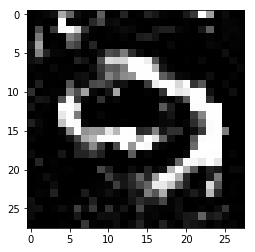

Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 27.8120
Epoch 2/2... Discriminator Loss: 0.1301... Generator Loss: 31.0564
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 16.1366
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 7.7228
Epoch 2/2... Discriminator Loss: 6.0445... Generator Loss: 0.0024


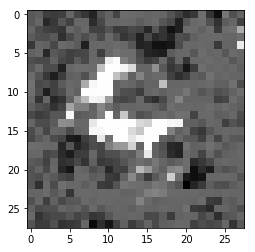

Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 11.6905
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 7.6465
Epoch 2/2... Discriminator Loss: 12.0945... Generator Loss: 0.0000


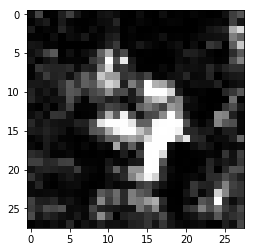

Epoch 2/2... Discriminator Loss: 35.6613... Generator Loss: 0.0000


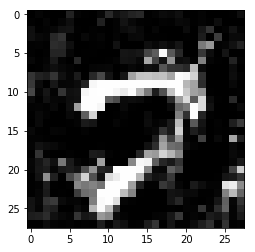

Epoch 2/2... Discriminator Loss: 2.2764... Generator Loss: 15.3753
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 8.1102
Epoch 2/2... Discriminator Loss: 0.0027... Generator Loss: 5.9215
Epoch 2/2... Discriminator Loss: 0.3100... Generator Loss: 1.3232
Epoch 2/2... Discriminator Loss: 0.6462... Generator Loss: 0.7426
Epoch 2/2... Discriminator Loss: 0.2317... Generator Loss: 1.5760
Epoch 2/2... Discriminator Loss: 0.0690... Generator Loss: 3.1123
Epoch 2/2... Discriminator Loss: 0.0201... Generator Loss: 3.9175
Epoch 2/2... Discriminator Loss: 0.0010... Generator Loss: 6.8969
Epoch 2/2... Discriminator Loss: 0.0049... Generator Loss: 5.4046
Epoch 2/2... Discriminator Loss: 0.0111... Generator Loss: 4.5050
Epoch 2/2... Discriminator Loss: 0.0135... Generator Loss: 4.8608
Epoch 2/2... Discriminator Loss: 0.0493... Generator Loss: 3.1651
Epoch 2/2... Discriminator Loss: 0.0395... Generator Loss: 3.2517
Epoch 2/2... Discriminator Loss: 0.0540... Generator Loss: 2.9454
Epoch 2/2

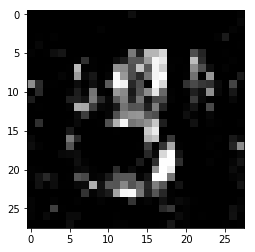

Epoch 2/2... Discriminator Loss: 0.0576... Generator Loss: 2.8834
Epoch 2/2... Discriminator Loss: 0.3161... Generator Loss: 1.3057
Epoch 2/2... Discriminator Loss: 0.0376... Generator Loss: 3.6172
Epoch 2/2... Discriminator Loss: 0.4072... Generator Loss: 1.0957
Epoch 2/2... Discriminator Loss: 0.1880... Generator Loss: 1.8017
Epoch 2/2... Discriminator Loss: 0.4881... Generator Loss: 0.9517
Epoch 2/2... Discriminator Loss: 1.0627... Generator Loss: 0.4239
Epoch 2/2... Discriminator Loss: 0.5386... Generator Loss: 0.8761
Epoch 2/2... Discriminator Loss: 0.0350... Generator Loss: 3.5320
Epoch 2/2... Discriminator Loss: 0.3459... Generator Loss: 1.2296
Epoch 2/2... Discriminator Loss: 0.0840... Generator Loss: 2.5190
Epoch 2/2... Discriminator Loss: 0.5523... Generator Loss: 0.8572
Epoch 2/2... Discriminator Loss: 0.0288... Generator Loss: 3.5615
Epoch 2/2... Discriminator Loss: 0.6683... Generator Loss: 0.7186
Epoch 2/2... Discriminator Loss: 0.0016... Generator Loss: 6.4096
Epoch 2/2.

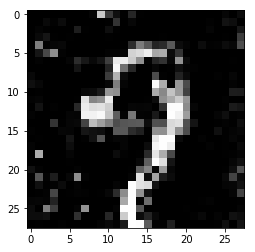

Epoch 2/2... Discriminator Loss: 0.0142... Generator Loss: 4.2635
Epoch 2/2... Discriminator Loss: 0.0200... Generator Loss: 3.9205
Epoch 2/2... Discriminator Loss: 0.0877... Generator Loss: 2.4775
Epoch 2/2... Discriminator Loss: 1.6193... Generator Loss: 0.2207
Epoch 2/2... Discriminator Loss: 0.0025... Generator Loss: 5.9934
Epoch 2/2... Discriminator Loss: 0.2446... Generator Loss: 1.5285
Epoch 2/2... Discriminator Loss: 0.0410... Generator Loss: 3.2155
Epoch 2/2... Discriminator Loss: 0.0113... Generator Loss: 4.5185
Epoch 2/2... Discriminator Loss: 0.0351... Generator Loss: 3.3678
Epoch 2/2... Discriminator Loss: 0.0178... Generator Loss: 4.0364
Epoch 2/2... Discriminator Loss: 0.3185... Generator Loss: 1.2995
Epoch 2/2... Discriminator Loss: 0.2507... Generator Loss: 1.5062
Epoch 2/2... Discriminator Loss: 0.5678... Generator Loss: 0.8365
Epoch 2/2... Discriminator Loss: 0.0324... Generator Loss: 3.4443
Epoch 2/2... Discriminator Loss: 0.4684... Generator Loss: 0.9836
Epoch 2/2.

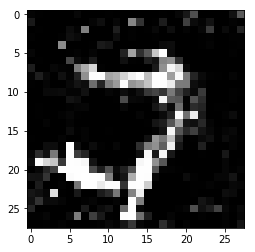

Epoch 2/2... Discriminator Loss: 0.5228... Generator Loss: 0.8986
Epoch 2/2... Discriminator Loss: 0.1333... Generator Loss: 2.0808
Epoch 2/2... Discriminator Loss: 0.2006... Generator Loss: 1.7049
Epoch 2/2... Discriminator Loss: 0.0171... Generator Loss: 4.0847
Epoch 2/2... Discriminator Loss: 0.1041... Generator Loss: 2.3136
Epoch 2/2... Discriminator Loss: 0.2604... Generator Loss: 1.4825
Epoch 2/2... Discriminator Loss: 0.1487... Generator Loss: 1.9794
Epoch 2/2... Discriminator Loss: 0.0012... Generator Loss: 6.7407
Epoch 2/2... Discriminator Loss: 0.0230... Generator Loss: 3.7846
Epoch 2/2... Discriminator Loss: 0.0533... Generator Loss: 2.9751
Epoch 2/2... Discriminator Loss: 0.5787... Generator Loss: 0.8224
Epoch 2/2... Discriminator Loss: 0.3944... Generator Loss: 1.1211
Epoch 2/2... Discriminator Loss: 0.7419... Generator Loss: 0.6467
Epoch 2/2... Discriminator Loss: 0.0028... Generator Loss: 5.9128
Epoch 2/2... Discriminator Loss: 0.0859... Generator Loss: 2.4977
Epoch 2/2.

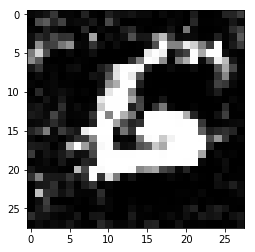

Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 14.4915
Epoch 2/2... Discriminator Loss: 0.1066... Generator Loss: 10.6410
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 12.0805
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 9.0815
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 11.6247
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 8.2163
Epoch 2/2... Discriminator Loss: 13.0501... Generator Loss: 0.0000


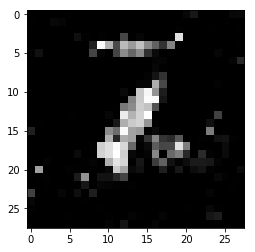

Epoch 2/2... Discriminator Loss: 4.0342... Generator Loss: 0.0179


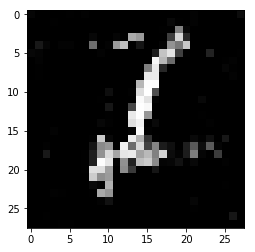

Epoch 2/2... Discriminator Loss: 6.9051... Generator Loss: 23.3083
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 13.4877
Epoch 2/2... Discriminator Loss: 0.0012... Generator Loss: 6.7575
Epoch 2/2... Discriminator Loss: 0.0306... Generator Loss: 3.5005
Epoch 2/2... Discriminator Loss: 0.2169... Generator Loss: 1.6348
Epoch 2/2... Discriminator Loss: 0.4506... Generator Loss: 1.0141
Epoch 2/2... Discriminator Loss: 0.5847... Generator Loss: 0.8148
Epoch 2/2... Discriminator Loss: 0.2281... Generator Loss: 1.5898
Epoch 2/2... Discriminator Loss: 0.6346... Generator Loss: 0.7553
Epoch 2/2... Discriminator Loss: 0.5913... Generator Loss: 0.8066
Epoch 2/2... Discriminator Loss: 0.1383... Generator Loss: 2.0465
Epoch 2/2... Discriminator Loss: 0.2477... Generator Loss: 1.5168
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 7.8212
Epoch 2/2... Discriminator Loss: 0.0017... Generator Loss: 8.5232
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 9.0359
Epoch 2/

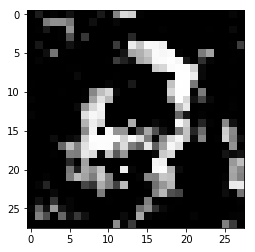

Epoch 2/2... Discriminator Loss: 0.0015... Generator Loss: 6.5140
Epoch 2/2... Discriminator Loss: 0.0082... Generator Loss: 6.6669
Epoch 2/2... Discriminator Loss: 0.0374... Generator Loss: 7.7973
Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 7.5743
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 8.2516
Epoch 2/2... Discriminator Loss: 0.0036... Generator Loss: 7.4199
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 7.6129
Epoch 2/2... Discriminator Loss: 0.0311... Generator Loss: 3.4863
Epoch 2/2... Discriminator Loss: 0.2294... Generator Loss: 1.5847
Epoch 2/2... Discriminator Loss: 0.4359... Generator Loss: 1.0404
Epoch 2/2... Discriminator Loss: 0.3720... Generator Loss: 1.1691
Epoch 2/2... Discriminator Loss: 0.4675... Generator Loss: 0.9851
Epoch 2/2... Discriminator Loss: 0.3467... Generator Loss: 1.2276
Epoch 2/2... Discriminator Loss: 0.1909... Generator Loss: 1.7499
Epoch 2/2... Discriminator Loss: 0.6353... Generator Loss: 0.7546
Epoch 2/2.

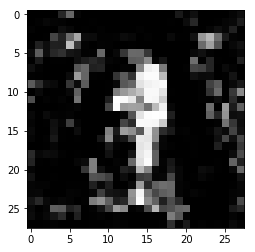

Epoch 2/2... Discriminator Loss: 0.9509... Generator Loss: 0.4909
Epoch 2/2... Discriminator Loss: 0.0586... Generator Loss: 2.8671
Epoch 2/2... Discriminator Loss: 0.0025... Generator Loss: 6.0126
Epoch 2/2... Discriminator Loss: 1.5711... Generator Loss: 0.2335


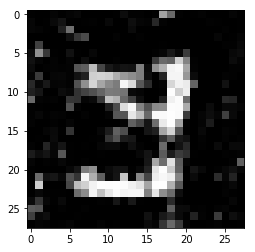

Epoch 2/2... Discriminator Loss: 0.1161... Generator Loss: 2.2108
Epoch 2/2... Discriminator Loss: 6.4308... Generator Loss: 0.0016


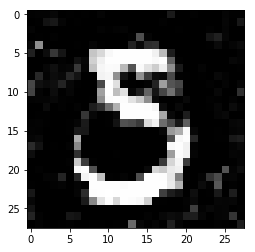

Epoch 2/2... Discriminator Loss: 4.7935... Generator Loss: 0.0083


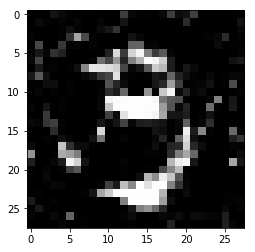

Epoch 2/2... Discriminator Loss: 4.3262... Generator Loss: 0.0133


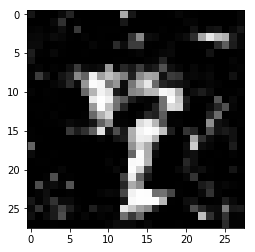

Epoch 2/2... Discriminator Loss: 4.7311... Generator Loss: 0.0089


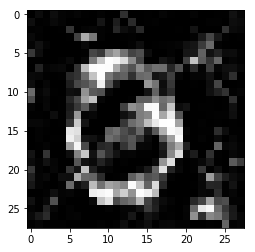

Epoch 2/2... Discriminator Loss: 6.5668... Generator Loss: 0.0014


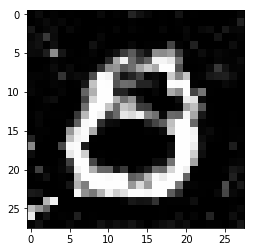

Epoch 2/2... Discriminator Loss: 4.1567... Generator Loss: 0.0158


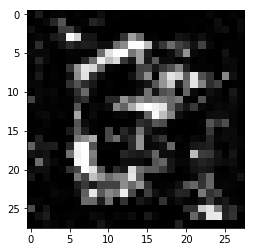

Epoch 2/2... Discriminator Loss: 1.7845... Generator Loss: 0.1844
Epoch 2/2... Discriminator Loss: 4.9757... Generator Loss: 0.0069


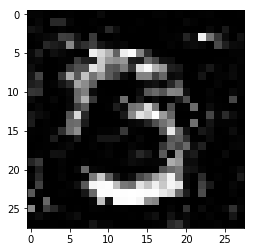

Epoch 2/2... Discriminator Loss: 7.1881... Generator Loss: 0.0008


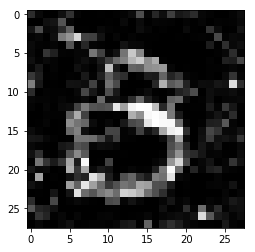

Epoch 2/2... Discriminator Loss: 5.4058... Generator Loss: 0.0045


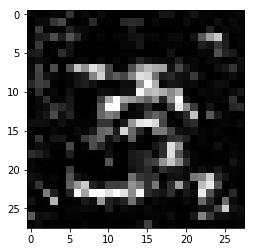

Epoch 2/2... Discriminator Loss: 12.2390... Generator Loss: 0.0000


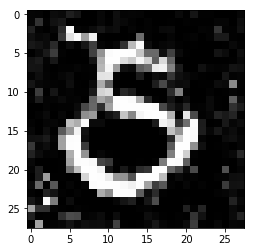

Epoch 2/2... Discriminator Loss: 4.9654... Generator Loss: 0.0070


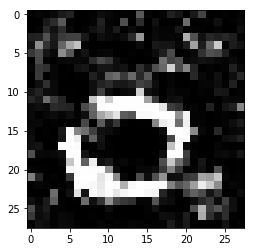

Epoch 2/2... Discriminator Loss: 10.9476... Generator Loss: 30.3911
Epoch 2/2... Discriminator Loss: 0.0170... Generator Loss: 4.0811
Epoch 2/2... Discriminator Loss: 0.0052... Generator Loss: 5.2666
Epoch 2/2... Discriminator Loss: 0.2701... Generator Loss: 1.4410
Epoch 2/2... Discriminator Loss: 0.5844... Generator Loss: 0.8152
Epoch 2/2... Discriminator Loss: 0.2834... Generator Loss: 1.3991
Epoch 2/2... Discriminator Loss: 0.0575... Generator Loss: 2.8852
Epoch 2/2... Discriminator Loss: 0.0155... Generator Loss: 4.1735
Epoch 2/2... Discriminator Loss: 0.0318... Generator Loss: 3.4655
Epoch 2/2... Discriminator Loss: 0.0143... Generator Loss: 4.2531
Epoch 2/2... Discriminator Loss: 0.0203... Generator Loss: 3.9090
Epoch 2/2... Discriminator Loss: 0.0976... Generator Loss: 2.3753
Epoch 2/2... Discriminator Loss: 0.0604... Generator Loss: 2.8368
Epoch 2/2... Discriminator Loss: 0.0137... Generator Loss: 4.3005
Epoch 2/2... Discriminator Loss: 0.0063... Generator Loss: 5.0761
Epoch 2/

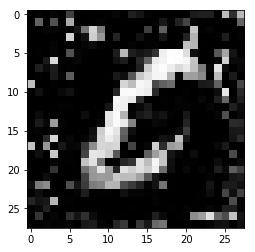

Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.1800
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 7.4466
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 8.9112
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 7.5430
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.1791
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 9.5469
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 11.1853
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 8.6567


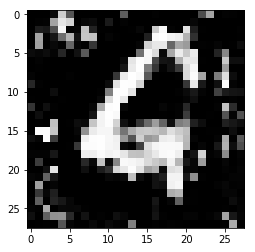

Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 7.3877
Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 7.3009
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 6.5845
Epoch 2/2... Discriminator Loss: 0.0138... Generator Loss: 4.2922
Epoch 2/2... Discriminator Loss: 0.0075... Generator Loss: 4.8938
Epoch 2/2... Discriminator Loss: 0.0210... Generator Loss: 3.8746
Epoch 2/2... Discriminator Loss: 0.0039... Generator Loss: 5.5519
Epoch 2/2... Discriminator Loss: 0.0050... Generator Loss: 5.3109
Epoch 2/2... Discriminator Loss: 0.0146... Generator Loss: 4.2340
Epoch 2/2... Discriminator Loss: 0.0157... Generator Loss: 4.1611
Epoch 2/2... Discriminator Loss: 0.0288... Generator Loss: 3.5636
Epoch 2/2... Discriminator Loss: 0.0258... Generator Loss: 3.6699
Epoch 2/2... Discriminator Loss: 0.8263... Generator Loss: 0.5757
Epoch 2/2... Discriminator Loss: 0.0838... Generator Loss: 2.5211
Epoch 2/2... Discriminator Loss: 0.0264... Generator Loss: 3.6475
Epoch 2/2.

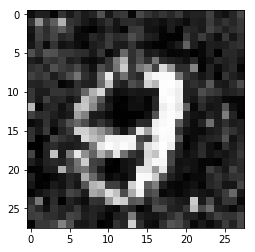

Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 8.3436
Epoch 2/2... Discriminator Loss: 0.0012... Generator Loss: 6.7257
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 7.3908
Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 7.9684
Epoch 2/2... Discriminator Loss: 0.0043... Generator Loss: 6.0414
Epoch 2/2... Discriminator Loss: 0.0017... Generator Loss: 6.3876
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 6.6029
Epoch 2/2... Discriminator Loss: 0.0019... Generator Loss: 6.2519
Epoch 2/2... Discriminator Loss: 0.0042... Generator Loss: 5.4753
Epoch 2/2... Discriminator Loss: 0.0037... Generator Loss: 5.6057
Epoch 2/2... Discriminator Loss: 0.0068... Generator Loss: 4.9980
Epoch 2/2... Discriminator Loss: 0.2581... Generator Loss: 1.4808
Epoch 2/2... Discriminator Loss: 1.4839... Generator Loss: 0.2572
Epoch 2/2... Discriminator Loss: 3.8434... Generator Loss: 0.0217


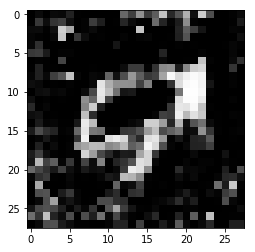

Epoch 2/2... Discriminator Loss: 1.1192... Generator Loss: 0.3953
Epoch 2/2... Discriminator Loss: 1.7212... Generator Loss: 0.1977
Epoch 2/2... Discriminator Loss: 3.5064... Generator Loss: 0.0305


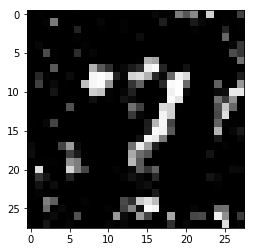

Epoch 2/2... Discriminator Loss: 2.1453... Generator Loss: 0.1245
Epoch 2/2... Discriminator Loss: 5.9853... Generator Loss: 0.0025


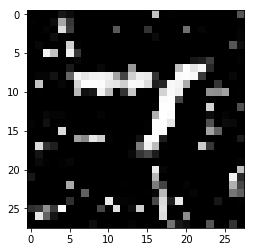

Epoch 2/2... Discriminator Loss: 0.3115... Generator Loss: 1.3193
Epoch 2/2... Discriminator Loss: 1.7015... Generator Loss: 0.2014
Epoch 2/2... Discriminator Loss: 1.0993... Generator Loss: 0.4051
Epoch 2/2... Discriminator Loss: 2.0975... Generator Loss: 0.1310
Epoch 2/2... Discriminator Loss: 1.1086... Generator Loss: 0.4005
Epoch 2/2... Discriminator Loss: 0.5249... Generator Loss: 0.8955
Epoch 2/2... Discriminator Loss: 0.3418... Generator Loss: 1.2398
Epoch 2/2... Discriminator Loss: 0.0172... Generator Loss: 4.0728
Epoch 2/2... Discriminator Loss: 0.1131... Generator Loss: 2.2353
Epoch 2/2... Discriminator Loss: 0.1898... Generator Loss: 1.7565
Epoch 2/2... Discriminator Loss: 0.0056... Generator Loss: 5.1853
Epoch 2/2... Discriminator Loss: 0.0188... Generator Loss: 3.9928
Epoch 2/2... Discriminator Loss: 0.0099... Generator Loss: 4.6214
Epoch 2/2... Discriminator Loss: 0.0109... Generator Loss: 4.5228
Epoch 2/2... Discriminator Loss: 0.0206... Generator Loss: 3.8909
Epoch 2/2.

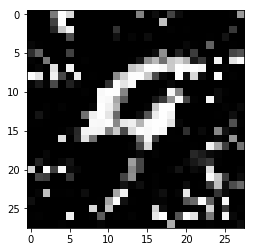

Epoch 2/2... Discriminator Loss: 0.3565... Generator Loss: 1.2043
Epoch 2/2... Discriminator Loss: 0.2360... Generator Loss: 1.5598
Epoch 2/2... Discriminator Loss: 0.0241... Generator Loss: 3.7370
Epoch 2/2... Discriminator Loss: 0.2947... Generator Loss: 1.3672
Epoch 2/2... Discriminator Loss: 0.7276... Generator Loss: 0.6598
Epoch 2/2... Discriminator Loss: 0.0383... Generator Loss: 3.2818
Epoch 2/2... Discriminator Loss: 0.0941... Generator Loss: 2.4255
Epoch 2/2... Discriminator Loss: 0.0292... Generator Loss: 3.5497
Epoch 2/2... Discriminator Loss: 0.0427... Generator Loss: 3.2207
Epoch 2/2... Discriminator Loss: 0.1007... Generator Loss: 2.3477
Epoch 2/2... Discriminator Loss: 0.0127... Generator Loss: 4.3693
Epoch 2/2... Discriminator Loss: 0.2368... Generator Loss: 1.5568
Epoch 2/2... Discriminator Loss: 0.1136... Generator Loss: 2.2312
Epoch 2/2... Discriminator Loss: 0.6649... Generator Loss: 0.7222
Epoch 2/2... Discriminator Loss: 0.0454... Generator Loss: 3.1142
Epoch 2/2.

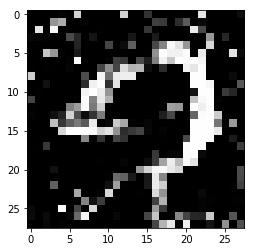

Epoch 2/2... Discriminator Loss: 0.0819... Generator Loss: 2.5427
Epoch 2/2... Discriminator Loss: 0.0168... Generator Loss: 4.0981
Epoch 2/2... Discriminator Loss: 0.0199... Generator Loss: 3.9290
Epoch 2/2... Discriminator Loss: 0.0796... Generator Loss: 2.6041
Epoch 2/2... Discriminator Loss: 0.0301... Generator Loss: 3.5192
Epoch 2/2... Discriminator Loss: 0.1057... Generator Loss: 2.3002
Epoch 2/2... Discriminator Loss: 0.5581... Generator Loss: 0.8493
Epoch 2/2... Discriminator Loss: 0.0781... Generator Loss: 2.5880
Epoch 2/2... Discriminator Loss: 1.1893... Generator Loss: 0.3631
Epoch 2/2... Discriminator Loss: 0.8957... Generator Loss: 0.5248
Epoch 2/2... Discriminator Loss: 0.0729... Generator Loss: 2.6555
Epoch 2/2... Discriminator Loss: 0.0818... Generator Loss: 2.5437
Epoch 2/2... Discriminator Loss: 0.0672... Generator Loss: 2.8089
Epoch 2/2... Discriminator Loss: 0.5136... Generator Loss: 0.9136
Epoch 2/2... Discriminator Loss: 0.6780... Generator Loss: 0.7085
Epoch 2/2.

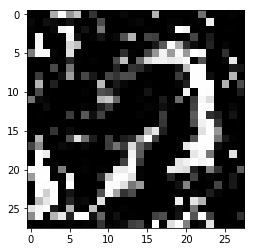

Epoch 2/2... Discriminator Loss: 2.2073... Generator Loss: 0.1165
Epoch 2/2... Discriminator Loss: 1.6485... Generator Loss: 0.2136
Epoch 2/2... Discriminator Loss: 0.7530... Generator Loss: 0.6367
Epoch 2/2... Discriminator Loss: 0.3635... Generator Loss: 1.1882
Epoch 2/2... Discriminator Loss: 0.0980... Generator Loss: 2.3709
Epoch 2/2... Discriminator Loss: 0.5924... Generator Loss: 0.8052
Epoch 2/2... Discriminator Loss: 0.5299... Generator Loss: 0.8884
Epoch 2/2... Discriminator Loss: 0.0269... Generator Loss: 3.6299
Epoch 2/2... Discriminator Loss: 0.0956... Generator Loss: 2.3948
Epoch 2/2... Discriminator Loss: 0.7527... Generator Loss: 0.6369
Epoch 2/2... Discriminator Loss: 0.1216... Generator Loss: 2.1670
Epoch 2/2... Discriminator Loss: 1.7090... Generator Loss: 0.1997
Epoch 2/2... Discriminator Loss: 1.5406... Generator Loss: 0.2411
Epoch 2/2... Discriminator Loss: 0.3229... Generator Loss: 1.2875
Epoch 2/2... Discriminator Loss: 0.6724... Generator Loss: 0.7144
Epoch 2/2.

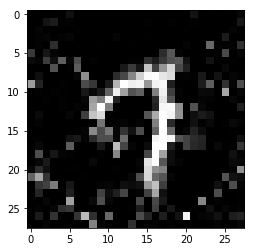

Epoch 2/2... Discriminator Loss: 0.0197... Generator Loss: 3.9347
Epoch 2/2... Discriminator Loss: 0.1577... Generator Loss: 1.9247
Epoch 2/2... Discriminator Loss: 0.0643... Generator Loss: 2.7759
Epoch 2/2... Discriminator Loss: 1.1548... Generator Loss: 0.3785
Epoch 2/2... Discriminator Loss: 0.2653... Generator Loss: 1.4565
Epoch 2/2... Discriminator Loss: 0.8360... Generator Loss: 0.5682
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 7.4223
Epoch 2/2... Discriminator Loss: 0.0181... Generator Loss: 4.0210
Epoch 2/2... Discriminator Loss: 0.0426... Generator Loss: 3.1778
Epoch 2/2... Discriminator Loss: 0.6161... Generator Loss: 0.7766
Epoch 2/2... Discriminator Loss: 0.0192... Generator Loss: 3.9632
Epoch 2/2... Discriminator Loss: 0.0402... Generator Loss: 3.2332
Epoch 2/2... Discriminator Loss: 0.6760... Generator Loss: 0.7106
Epoch 2/2... Discriminator Loss: 0.2320... Generator Loss: 1.5750
Epoch 2/2... Discriminator Loss: 0.0653... Generator Loss: 2.7619
Epoch 2/2.

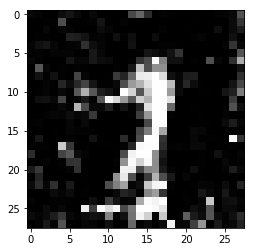

Epoch 2/2... Discriminator Loss: 0.4643... Generator Loss: 0.9905
Epoch 2/2... Discriminator Loss: 0.6194... Generator Loss: 0.7727
Epoch 2/2... Discriminator Loss: 0.0540... Generator Loss: 2.9534
Epoch 2/2... Discriminator Loss: 0.4595... Generator Loss: 0.9990
Epoch 2/2... Discriminator Loss: 2.0271... Generator Loss: 0.1412
Epoch 2/2... Discriminator Loss: 0.1528... Generator Loss: 1.9543
Epoch 2/2... Discriminator Loss: 0.3432... Generator Loss: 1.2361
Epoch 2/2... Discriminator Loss: 0.0540... Generator Loss: 2.9453
Epoch 2/2... Discriminator Loss: 0.3092... Generator Loss: 1.3284
Epoch 2/2... Discriminator Loss: 0.0457... Generator Loss: 3.1078
Epoch 2/2... Discriminator Loss: 0.1875... Generator Loss: 1.7661
Epoch 2/2... Discriminator Loss: 0.1356... Generator Loss: 2.0653
Epoch 2/2... Discriminator Loss: 0.6711... Generator Loss: 0.7157
Epoch 2/2... Discriminator Loss: 0.5722... Generator Loss: 0.8307
Epoch 2/2... Discriminator Loss: 0.4360... Generator Loss: 1.0401
Epoch 2/2.

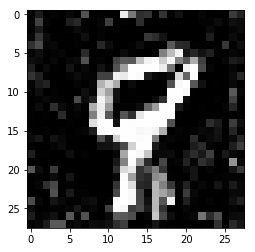

Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 12.0009
Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 6.9764
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.6273
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.2071
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 12.2476
Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 11.8429
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 11.1672
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 12.3602
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.8925
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 11.9328
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 10.7101
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.6638
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 12.0450
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 12.1199
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 11.5

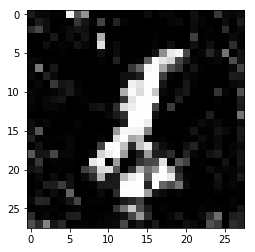

Epoch 2/2... Discriminator Loss: 35.2781... Generator Loss: 34.4155
Epoch 2/2... Discriminator Loss: 1.5246... Generator Loss: 6.8562
Epoch 2/2... Discriminator Loss: 1.2875... Generator Loss: 0.3229
Epoch 2/2... Discriminator Loss: 0.4062... Generator Loss: 1.0974
Epoch 2/2... Discriminator Loss: 0.1408... Generator Loss: 2.0303
Epoch 2/2... Discriminator Loss: 0.0371... Generator Loss: 3.3121
Epoch 2/2... Discriminator Loss: 0.0093... Generator Loss: 4.6857
Epoch 2/2... Discriminator Loss: 0.0017... Generator Loss: 6.4354
Epoch 2/2... Discriminator Loss: 0.0012... Generator Loss: 6.8346
Epoch 2/2... Discriminator Loss: 0.0018... Generator Loss: 6.8169
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 6.6356
Epoch 2/2... Discriminator Loss: 0.0020... Generator Loss: 6.2443
Epoch 2/2... Discriminator Loss: 0.0033... Generator Loss: 5.7187
Epoch 2/2... Discriminator Loss: 0.0087... Generator Loss: 4.7478
Epoch 2/2... Discriminator Loss: 0.0866... Generator Loss: 2.5001
Epoch 2/

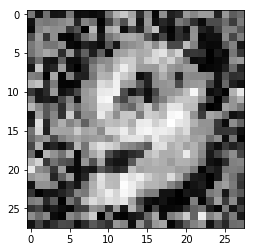

Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 8.9406
Epoch 2/2... Discriminator Loss: 0.0213... Generator Loss: 8.7093
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 7.7590
Epoch 2/2... Discriminator Loss: 0.0009... Generator Loss: 6.9728
Epoch 2/2... Discriminator Loss: 0.0019... Generator Loss: 6.2818
Epoch 2/2... Discriminator Loss: 0.9526... Generator Loss: 0.4873
Epoch 2/2... Discriminator Loss: 2.0349... Generator Loss: 0.1401
Epoch 2/2... Discriminator Loss: 0.0179... Generator Loss: 4.0326
Epoch 2/2... Discriminator Loss: 0.0185... Generator Loss: 8.0057


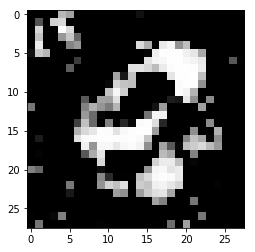

Epoch 2/2... Discriminator Loss: 0.0122... Generator Loss: 5.0089
Epoch 2/2... Discriminator Loss: 0.0033... Generator Loss: 9.2138
Epoch 2/2... Discriminator Loss: 0.0010... Generator Loss: 7.2293
Epoch 2/2... Discriminator Loss: 2.3897... Generator Loss: 0.0961


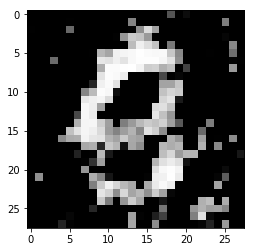

Epoch 2/2... Discriminator Loss: 0.7093... Generator Loss: 0.6773
Epoch 2/2... Discriminator Loss: 0.0004... Generator Loss: 9.3271
Epoch 2/2... Discriminator Loss: 0.0015... Generator Loss: 6.9926
Epoch 2/2... Discriminator Loss: 0.0385... Generator Loss: 5.6766
Epoch 2/2... Discriminator Loss: 0.0115... Generator Loss: 8.1105
Epoch 2/2... Discriminator Loss: 0.0088... Generator Loss: 6.7605
Epoch 2/2... Discriminator Loss: 0.0047... Generator Loss: 6.9863
Epoch 2/2... Discriminator Loss: 0.0018... Generator Loss: 6.7136
Epoch 2/2... Discriminator Loss: 0.0680... Generator Loss: 2.7236
Epoch 2/2... Discriminator Loss: 0.1908... Generator Loss: 1.7541
Epoch 2/2... Discriminator Loss: 0.0689... Generator Loss: 2.7097
Epoch 2/2... Discriminator Loss: 0.5575... Generator Loss: 9.7174
Epoch 2/2... Discriminator Loss: 0.0047... Generator Loss: 5.3633
Epoch 2/2... Discriminator Loss: 0.0019... Generator Loss: 7.3608
Epoch 2/2... Discriminator Loss: 0.0051... Generator Loss: 6.1459
Epoch 2/2.

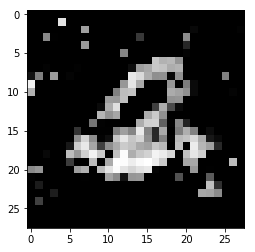

Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 7.9742
Epoch 2/2... Discriminator Loss: 0.0014... Generator Loss: 6.6898
Epoch 2/2... Discriminator Loss: 0.0257... Generator Loss: 10.0207
Epoch 2/2... Discriminator Loss: 0.0023... Generator Loss: 7.0574
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 7.5814
Epoch 2/2... Discriminator Loss: 0.0005... Generator Loss: 7.6977
Epoch 2/2... Discriminator Loss: 0.0008... Generator Loss: 7.1792
Epoch 2/2... Discriminator Loss: 0.0058... Generator Loss: 5.1496
Epoch 2/2... Discriminator Loss: 0.0114... Generator Loss: 4.4794
Epoch 2/2... Discriminator Loss: 0.0066... Generator Loss: 5.0332
Epoch 2/2... Discriminator Loss: 0.0080... Generator Loss: 4.8366
Epoch 2/2... Discriminator Loss: 0.0995... Generator Loss: 2.3571
Epoch 2/2... Discriminator Loss: 0.0079... Generator Loss: 4.8417
Epoch 2/2... Discriminator Loss: 0.1560... Generator Loss: 1.9377
Epoch 2/2... Discriminator Loss: 0.0024... Generator Loss: 6.0291
Epoch 2/2

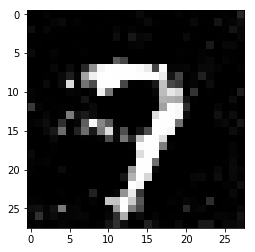

Epoch 2/2... Discriminator Loss: 1.6541... Generator Loss: 0.2123
Epoch 2/2... Discriminator Loss: 1.9696... Generator Loss: 0.1503
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 15.9013
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 18.3356
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 18.8772
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 12.9692
Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 8.4273
Epoch 2/2... Discriminator Loss: 0.0027... Generator Loss: 5.9145
Epoch 2/2... Discriminator Loss: 0.0036... Generator Loss: 5.6372
Epoch 2/2... Discriminator Loss: 0.0007... Generator Loss: 7.2236
Epoch 2/2... Discriminator Loss: 0.0002... Generator Loss: 8.4079
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 9.1085
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 9.5253
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 9.7569
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 9.9024
Epoch 

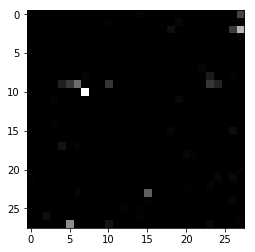

Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.2683
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.3056
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.3460
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.3779
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.4020
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.4383
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.4678
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.4923
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.5234
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.5484
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.5707
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.5888
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.6204
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.6397
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.

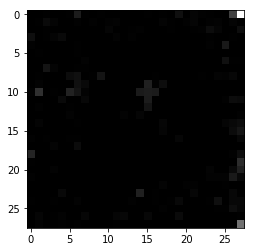

Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 11.4328
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 11.3992
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 11.3414
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 11.4151
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 11.2205
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 11.2449
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 11.1879
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.9601
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.8274
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.4916
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 10.3085
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 9.9390
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 9.6853
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 9.3597
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 8.8971

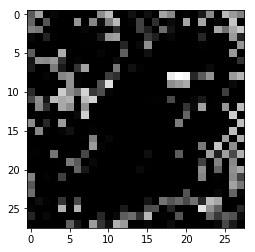

Epoch 2/2... Discriminator Loss: 15.0863... Generator Loss: 0.0000


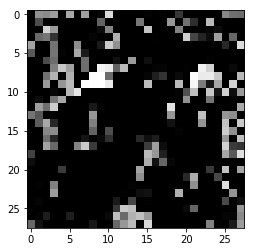

Epoch 2/2... Discriminator Loss: 7.5201... Generator Loss: 0.0005


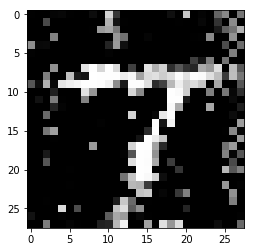

Epoch 2/2... Discriminator Loss: 0.0003... Generator Loss: 8.1102
Epoch 2/2... Discriminator Loss: 6.2520... Generator Loss: 10.2657
Epoch 2/2... Discriminator Loss: 21.0858... Generator Loss: 0.0000


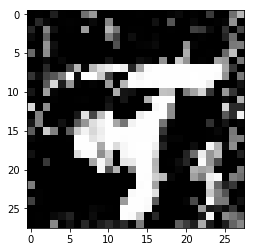

Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 12.2201
Epoch 2/2... Discriminator Loss: 0.0119... Generator Loss: 12.7924
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 13.8722
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 13.8632
Epoch 2/2... Discriminator Loss: 0.0000... Generator Loss: 12.5297
Epoch 2/2... Discriminator Loss: 0.0070... Generator Loss: 8.8070
Epoch 2/2... Discriminator Loss: 0.0006... Generator Loss: 7.5448
Epoch 2/2... Discriminator Loss: 0.0074... Generator Loss: 4.9141
Epoch 2/2... Discriminator Loss: 0.0204... Generator Loss: 3.9043
Epoch 2/2... Discriminator Loss: 0.0584... Generator Loss: 2.8700
Epoch 2/2... Discriminator Loss: 0.0632... Generator Loss: 2.7931
Epoch 2/2... Discriminator Loss: 0.1838... Generator Loss: 1.7844
Epoch 2/2... Discriminator Loss: 0.0563... Generator Loss: 2.9048
Epoch 2/2... Discriminator Loss: 0.1127... Generator Loss: 2.2388
Epoch 2/2... Discriminator Loss: 0.0590... Generator Loss: 2.8590
Epoch

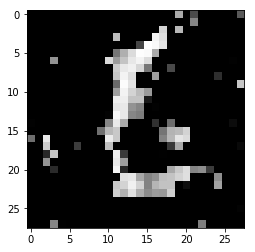

Epoch 2/2... Discriminator Loss: 11.4653... Generator Loss: 13.0193
Epoch 2/2... Discriminator Loss: 0.0001... Generator Loss: 9.0294
Epoch 2/2... Discriminator Loss: 0.0010... Generator Loss: 6.8942
Epoch 2/2... Discriminator Loss: 0.0116... Generator Loss: 4.4595
Epoch 2/2... Discriminator Loss: 0.0050... Generator Loss: 5.2917
Epoch 2/2... Discriminator Loss: 0.0110... Generator Loss: 4.5138
Epoch 2/2... Discriminator Loss: 0.0226... Generator Loss: 3.8015
Epoch 2/2... Discriminator Loss: 0.0114... Generator Loss: 4.4828
Epoch 2/2... Discriminator Loss: 0.0153... Generator Loss: 4.1865
Epoch 2/2... Discriminator Loss: 0.0112... Generator Loss: 4.4946
Epoch 2/2... Discriminator Loss: 0.0099... Generator Loss: 4.6239
Epoch 2/2... Discriminator Loss: 0.0153... Generator Loss: 4.1864
Epoch 2/2... Discriminator Loss: 0.0091... Generator Loss: 4.7038
Epoch 2/2... Discriminator Loss: 0.0150... Generator Loss: 4.2157
Epoch 2/2... Discriminator Loss: 0.0343... Generator Loss: 3.3904
Epoch 2/

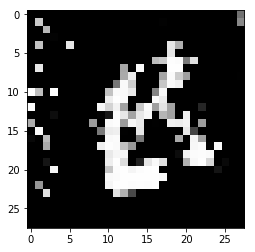

Epoch 2/2... Discriminator Loss: 0.0078... Generator Loss: 5.3188
Epoch 2/2... Discriminator Loss: 0.0192... Generator Loss: 3.9601
Epoch 2/2... Discriminator Loss: 0.0172... Generator Loss: 4.0727
Epoch 2/2... Discriminator Loss: 0.0104... Generator Loss: 4.5787
Epoch 2/2... Discriminator Loss: 0.0353... Generator Loss: 3.3608
Epoch 2/2... Discriminator Loss: 0.0085... Generator Loss: 4.7662
Epoch 2/2... Discriminator Loss: 0.2220... Generator Loss: 1.6139
Epoch 2/2... Discriminator Loss: 0.0175... Generator Loss: 4.0531
Epoch 2/2... Discriminator Loss: 0.0051... Generator Loss: 5.2788
Epoch 2/2... Discriminator Loss: 0.0057... Generator Loss: 5.1792
Epoch 2/2... Discriminator Loss: 0.0096... Generator Loss: 4.6472
Epoch 2/2... Discriminator Loss: 0.0616... Generator Loss: 2.8180
Epoch 2/2... Discriminator Loss: 0.0273... Generator Loss: 3.6148
Epoch 2/2... Discriminator Loss: 0.0192... Generator Loss: 3.9635
Epoch 2/2... Discriminator Loss: 0.0129... Generator Loss: 4.3574
Epoch 2/2.

In [53]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))

with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,mnist_dataset.shape, mnist_dataset.image_mode)


### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

Epoch 1/1... Discriminator Loss: 0.8152... Generator Loss: 0.5994
Epoch 1/1... Discriminator Loss: 1.8290... Generator Loss: 0.1750
Epoch 1/1... Discriminator Loss: 0.6411... Generator Loss: 0.7496
Epoch 1/1... Discriminator Loss: 0.5621... Generator Loss: 0.9222
Epoch 1/1... Discriminator Loss: 0.5407... Generator Loss: 0.8731
Epoch 1/1... Discriminator Loss: 0.4941... Generator Loss: 0.9420
Epoch 1/1... Discriminator Loss: 0.2777... Generator Loss: 1.4169
Epoch 1/1... Discriminator Loss: 0.1030... Generator Loss: 2.3240
Epoch 1/1... Discriminator Loss: 0.0229... Generator Loss: 3.7897
Epoch 1/1... Discriminator Loss: 0.0055... Generator Loss: 5.2055
Epoch 1/1... Discriminator Loss: 0.0022... Generator Loss: 6.1291
Epoch 1/1... Discriminator Loss: 0.0011... Generator Loss: 6.7979
Epoch 1/1... Discriminator Loss: 0.0023... Generator Loss: 6.0873
Epoch 1/1... Discriminator Loss: 0.5723... Generator Loss: 0.8306
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 9.7307
Epoch 1/1.

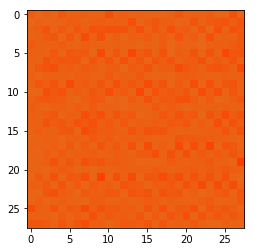

Epoch 1/1... Discriminator Loss: 6.5353... Generator Loss: 0.0015


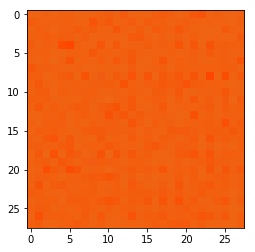

Epoch 1/1... Discriminator Loss: 0.0407... Generator Loss: 3.2228
Epoch 1/1... Discriminator Loss: 0.0034... Generator Loss: 5.6714
Epoch 1/1... Discriminator Loss: 4.7831... Generator Loss: 7.1215
Epoch 1/1... Discriminator Loss: 0.0706... Generator Loss: 2.6855
Epoch 1/1... Discriminator Loss: 25.4720... Generator Loss: 0.0000


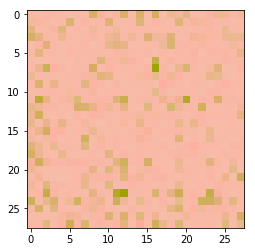

Epoch 1/1... Discriminator Loss: 379.8737... Generator Loss: 0.0000


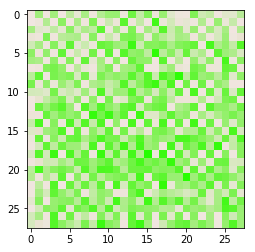

Epoch 1/1... Discriminator Loss: 24.3814... Generator Loss: 0.0000


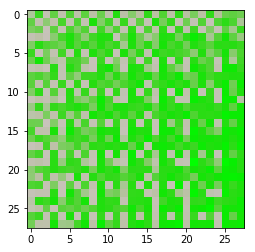

Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 12.4874
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 9.4044
Epoch 1/1... Discriminator Loss: 0.0004... Generator Loss: 7.7457
Epoch 1/1... Discriminator Loss: 75.9889... Generator Loss: 0.0000


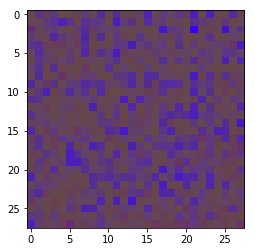

Epoch 1/1... Discriminator Loss: 26.7304... Generator Loss: 0.0000


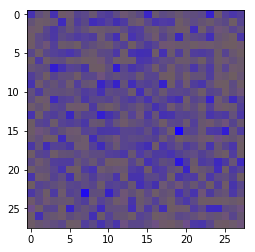

Epoch 1/1... Discriminator Loss: 0.2114... Generator Loss: 1.6578
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 10.7837
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 11.8941
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 11.1716
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 9.8848
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 9.6695
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 9.6406
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 9.6483
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 9.5408
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 9.4669
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 9.3934
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 9.2568
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 9.2419
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 8.9819
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 8.9681
Epoch 1

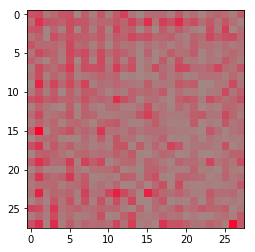

Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 9.0151
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 16.0956
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 17.8421
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 18.7397
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 18.2976
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 18.5316
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 18.2106
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 17.6078
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 18.0782
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 17.3201
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 17.3861
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 16.9002
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 16.5960
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 16.2961
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 15.8

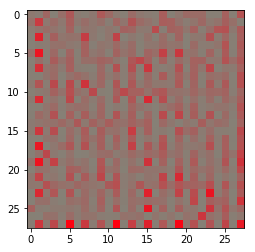

Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 48.0685
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 60.2236
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 61.5866
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 57.0491
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 39.0737


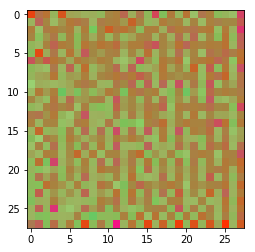

Epoch 1/1... Discriminator Loss: 198.4720... Generator Loss: 0.0000


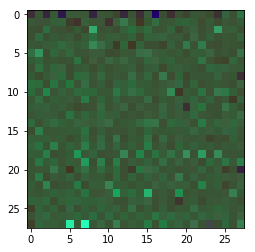

Epoch 1/1... Discriminator Loss: 517.1984... Generator Loss: 158.3543
Epoch 1/1... Discriminator Loss: 22.8067... Generator Loss: 25.4978
Epoch 1/1... Discriminator Loss: 0.6892... Generator Loss: 0.9936
Epoch 1/1... Discriminator Loss: 2.2089... Generator Loss: 0.1180
Epoch 1/1... Discriminator Loss: 0.9443... Generator Loss: 0.5282
Epoch 1/1... Discriminator Loss: 0.4904... Generator Loss: 1.0037
Epoch 1/1... Discriminator Loss: 0.4432... Generator Loss: 1.1307
Epoch 1/1... Discriminator Loss: 0.3471... Generator Loss: 1.3351
Epoch 1/1... Discriminator Loss: 0.2959... Generator Loss: 1.4038
Epoch 1/1... Discriminator Loss: 0.2467... Generator Loss: 1.5268
Epoch 1/1... Discriminator Loss: 0.1166... Generator Loss: 2.2086
Epoch 1/1... Discriminator Loss: 0.1405... Generator Loss: 2.0560
Epoch 1/1... Discriminator Loss: 0.1257... Generator Loss: 2.1374
Epoch 1/1... Discriminator Loss: 0.1010... Generator Loss: 2.3487
Epoch 1/1... Discriminator Loss: 0.0619... Generator Loss: 2.8208
Epoc

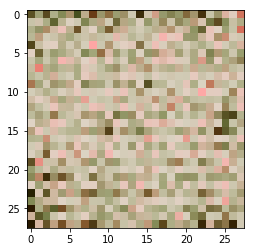

Epoch 1/1... Discriminator Loss: 0.0017... Generator Loss: 6.4069
Epoch 1/1... Discriminator Loss: 0.0018... Generator Loss: 6.3012
Epoch 1/1... Discriminator Loss: 0.0026... Generator Loss: 5.9372
Epoch 1/1... Discriminator Loss: 0.0023... Generator Loss: 6.0951
Epoch 1/1... Discriminator Loss: 0.0020... Generator Loss: 6.4446
Epoch 1/1... Discriminator Loss: 0.0014... Generator Loss: 6.5448
Epoch 1/1... Discriminator Loss: 0.0019... Generator Loss: 6.2995
Epoch 1/1... Discriminator Loss: 0.0022... Generator Loss: 6.1434
Epoch 1/1... Discriminator Loss: 0.0021... Generator Loss: 6.1532
Epoch 1/1... Discriminator Loss: 0.0017... Generator Loss: 6.4573
Epoch 1/1... Discriminator Loss: 0.0006... Generator Loss: 7.5023
Epoch 1/1... Discriminator Loss: 0.0011... Generator Loss: 6.8085
Epoch 1/1... Discriminator Loss: 0.0022... Generator Loss: 6.1269
Epoch 1/1... Discriminator Loss: 0.0023... Generator Loss: 6.0663
Epoch 1/1... Discriminator Loss: 0.0014... Generator Loss: 6.5615
Epoch 1/1.

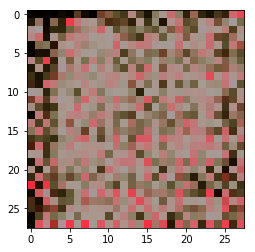

Epoch 1/1... Discriminator Loss: 0.0461... Generator Loss: 3.0990
Epoch 1/1... Discriminator Loss: 0.0607... Generator Loss: 2.8320
Epoch 1/1... Discriminator Loss: 18.0292... Generator Loss: 0.0000


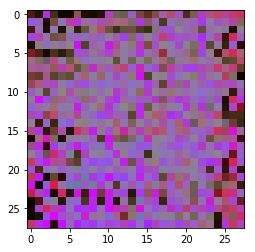

Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 34.9117
Epoch 1/1... Discriminator Loss: 9.6943... Generator Loss: 20.3435
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 11.5040
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 8.3917
Epoch 1/1... Discriminator Loss: 0.0012... Generator Loss: 6.7675
Epoch 1/1... Discriminator Loss: 0.0090... Generator Loss: 4.7132
Epoch 1/1... Discriminator Loss: 0.9203... Generator Loss: 0.5082
Epoch 1/1... Discriminator Loss: 0.2789... Generator Loss: 1.4132
Epoch 1/1... Discriminator Loss: 0.1123... Generator Loss: 2.2423
Epoch 1/1... Discriminator Loss: 0.1023... Generator Loss: 2.3307
Epoch 1/1... Discriminator Loss: 0.0174... Generator Loss: 4.0622
Epoch 1/1... Discriminator Loss: 0.4894... Generator Loss: 0.9494
Epoch 1/1... Discriminator Loss: 1.2434... Generator Loss: 0.3403
Epoch 1/1... Discriminator Loss: 1.6161... Generator Loss: 0.2215
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 8.0283
Epoch 1

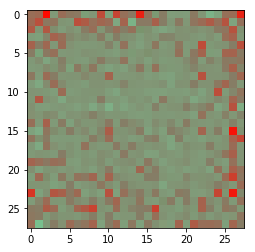

Epoch 1/1... Discriminator Loss: 10.8653... Generator Loss: 34.3565
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 8.9296
Epoch 1/1... Discriminator Loss: 29.2051... Generator Loss: 0.0000


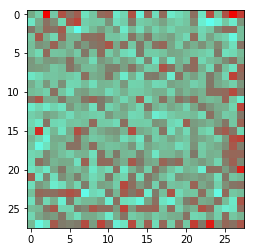

Epoch 1/1... Discriminator Loss: 10.2032... Generator Loss: 56.5067
Epoch 1/1... Discriminator Loss: 0.0027... Generator Loss: 28.3160
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 18.0600
Epoch 1/1... Discriminator Loss: 0.0005... Generator Loss: 13.5727
Epoch 1/1... Discriminator Loss: 0.0009... Generator Loss: 6.9793
Epoch 1/1... Discriminator Loss: 0.0012... Generator Loss: 6.7220
Epoch 1/1... Discriminator Loss: 0.0511... Generator Loss: 3.0003
Epoch 1/1... Discriminator Loss: 0.1624... Generator Loss: 1.8976
Epoch 1/1... Discriminator Loss: 0.1049... Generator Loss: 2.3069
Epoch 1/1... Discriminator Loss: 0.4054... Generator Loss: 1.0990
Epoch 1/1... Discriminator Loss: 0.1993... Generator Loss: 1.7109
Epoch 1/1... Discriminator Loss: 0.0349... Generator Loss: 3.3726
Epoch 1/1... Discriminator Loss: 0.1134... Generator Loss: 2.2328
Epoch 1/1... Discriminator Loss: 0.0206... Generator Loss: 3.8929
Epoch 1/1... Discriminator Loss: 0.0130... Generator Loss: 4.3458
Epoch

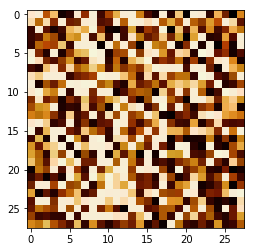

Epoch 1/1... Discriminator Loss: 0.0749... Generator Loss: 14.4749
Epoch 1/1... Discriminator Loss: 0.0134... Generator Loss: 15.2203
Epoch 1/1... Discriminator Loss: 0.0273... Generator Loss: 11.3626
Epoch 1/1... Discriminator Loss: 0.0022... Generator Loss: 8.7229
Epoch 1/1... Discriminator Loss: 0.0021... Generator Loss: 6.8478
Epoch 1/1... Discriminator Loss: 0.0201... Generator Loss: 4.6707
Epoch 1/1... Discriminator Loss: 0.0170... Generator Loss: 4.0940
Epoch 1/1... Discriminator Loss: 0.0208... Generator Loss: 4.2366
Epoch 1/1... Discriminator Loss: 0.0330... Generator Loss: 3.4301
Epoch 1/1... Discriminator Loss: 0.0173... Generator Loss: 4.0833
Epoch 1/1... Discriminator Loss: 0.0260... Generator Loss: 4.0943
Epoch 1/1... Discriminator Loss: 0.0232... Generator Loss: 3.7739
Epoch 1/1... Discriminator Loss: 0.0129... Generator Loss: 4.3540
Epoch 1/1... Discriminator Loss: 0.0147... Generator Loss: 4.2301
Epoch 1/1... Discriminator Loss: 0.0157... Generator Loss: 4.2113
Epoch 1

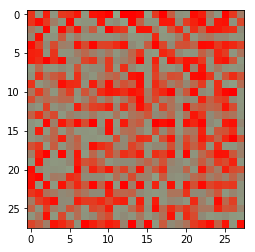

Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 11.9613
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 11.5186
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 11.8258
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 11.9433
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 10.1302
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 9.3653
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 8.6388
Epoch 1/1... Discriminator Loss: 0.0004... Generator Loss: 7.9189
Epoch 1/1... Discriminator Loss: 0.0085... Generator Loss: 4.7852
Epoch 1/1... Discriminator Loss: 0.0080... Generator Loss: 4.8274
Epoch 1/1... Discriminator Loss: 0.0164... Generator Loss: 4.1210
Epoch 1/1... Discriminator Loss: 0.0670... Generator Loss: 2.7365
Epoch 1/1... Discriminator Loss: 0.0508... Generator Loss: 3.0059
Epoch 1/1... Discriminator Loss: 0.0944... Generator Loss: 2.4071
Epoch 1/1... Discriminator Loss: 0.0867... Generator Loss: 2.4889
Epoch

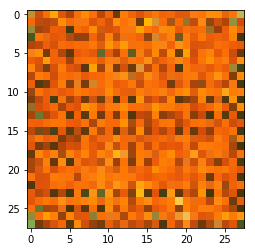

Epoch 1/1... Discriminator Loss: 0.0041... Generator Loss: 5.5073
Epoch 1/1... Discriminator Loss: 0.0023... Generator Loss: 6.0743
Epoch 1/1... Discriminator Loss: 0.0024... Generator Loss: 6.0183
Epoch 1/1... Discriminator Loss: 0.0016... Generator Loss: 6.4195
Epoch 1/1... Discriminator Loss: 0.0014... Generator Loss: 6.5963
Epoch 1/1... Discriminator Loss: 0.0013... Generator Loss: 6.6612
Epoch 1/1... Discriminator Loss: 0.0014... Generator Loss: 6.5915
Epoch 1/1... Discriminator Loss: 0.0012... Generator Loss: 6.7044
Epoch 1/1... Discriminator Loss: 0.0013... Generator Loss: 6.6611
Epoch 1/1... Discriminator Loss: 0.0012... Generator Loss: 6.7596
Epoch 1/1... Discriminator Loss: 0.0012... Generator Loss: 6.7086
Epoch 1/1... Discriminator Loss: 0.0011... Generator Loss: 6.7821
Epoch 1/1... Discriminator Loss: 0.0012... Generator Loss: 6.7392
Epoch 1/1... Discriminator Loss: 0.0011... Generator Loss: 6.8351
Epoch 1/1... Discriminator Loss: 0.0010... Generator Loss: 6.8739
Epoch 1/1.

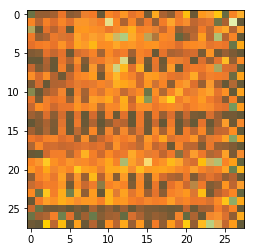

Epoch 1/1... Discriminator Loss: 0.0005... Generator Loss: 7.8825
Epoch 1/1... Discriminator Loss: 0.0004... Generator Loss: 7.8960
Epoch 1/1... Discriminator Loss: 0.0008... Generator Loss: 7.9321
Epoch 1/1... Discriminator Loss: 0.0004... Generator Loss: 7.7933
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 8.0702
Epoch 1/1... Discriminator Loss: 0.0004... Generator Loss: 7.8589
Epoch 1/1... Discriminator Loss: 0.0004... Generator Loss: 7.8198
Epoch 1/1... Discriminator Loss: 0.0020... Generator Loss: 7.6364
Epoch 1/1... Discriminator Loss: 0.0005... Generator Loss: 7.7435
Epoch 1/1... Discriminator Loss: 0.0005... Generator Loss: 7.6719
Epoch 1/1... Discriminator Loss: 0.0005... Generator Loss: 7.6921
Epoch 1/1... Discriminator Loss: 0.0005... Generator Loss: 7.6778
Epoch 1/1... Discriminator Loss: 0.0005... Generator Loss: 7.6743
Epoch 1/1... Discriminator Loss: 0.0004... Generator Loss: 7.7102
Epoch 1/1... Discriminator Loss: 0.0004... Generator Loss: 7.7355
Epoch 1/1.

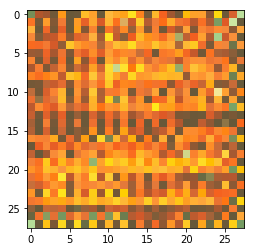

Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 8.4254
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 8.4010
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 8.2860
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 8.1670
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 8.0670
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 8.4717
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 8.5252
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 8.5643
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 8.5998
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 8.3394
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 8.1525
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 8.0984
Epoch 1/1... Discriminator Loss: 0.0004... Generator Loss: 7.8801
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 8.0012
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 8.0429
Epoch 1/1.

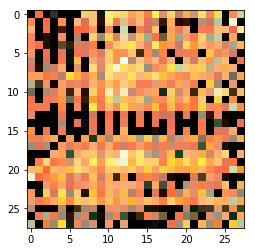

Epoch 1/1... Discriminator Loss: 5.7570... Generator Loss: 23.3996
Epoch 1/1... Discriminator Loss: 46.0180... Generator Loss: 0.0000


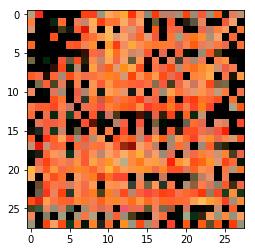

Epoch 1/1... Discriminator Loss: 14.8493... Generator Loss: 22.3081
Epoch 1/1... Discriminator Loss: 0.0035... Generator Loss: 5.6560
Epoch 1/1... Discriminator Loss: 2.2099... Generator Loss: 0.1162
Epoch 1/1... Discriminator Loss: 3.8251... Generator Loss: 1.5624
Epoch 1/1... Discriminator Loss: 2.0248... Generator Loss: 0.1416
Epoch 1/1... Discriminator Loss: 0.2641... Generator Loss: 1.4607
Epoch 1/1... Discriminator Loss: 0.1813... Generator Loss: 1.7967
Epoch 1/1... Discriminator Loss: 0.1065... Generator Loss: 2.2949
Epoch 1/1... Discriminator Loss: 0.0820... Generator Loss: 2.6293
Epoch 1/1... Discriminator Loss: 0.0759... Generator Loss: 2.6363
Epoch 1/1... Discriminator Loss: 0.0550... Generator Loss: 2.9280
Epoch 1/1... Discriminator Loss: 0.0446... Generator Loss: 3.1463
Epoch 1/1... Discriminator Loss: 0.0322... Generator Loss: 3.4526
Epoch 1/1... Discriminator Loss: 0.0194... Generator Loss: 3.9508
Epoch 1/1... Discriminator Loss: 0.0175... Generator Loss: 4.0617
Epoch 1/

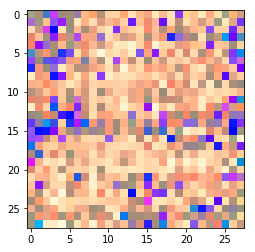

Epoch 1/1... Discriminator Loss: 1.0635... Generator Loss: 0.4235
Epoch 1/1... Discriminator Loss: 0.0070... Generator Loss: 4.9631
Epoch 1/1... Discriminator Loss: 0.0004... Generator Loss: 7.9839
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 10.1464
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 10.6049
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 9.7970
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 8.1000
Epoch 1/1... Discriminator Loss: 0.0005... Generator Loss: 7.5764
Epoch 1/1... Discriminator Loss: 0.0016... Generator Loss: 6.6378
Epoch 1/1... Discriminator Loss: 0.0163... Generator Loss: 4.1243
Epoch 1/1... Discriminator Loss: 0.0562... Generator Loss: 2.9077
Epoch 1/1... Discriminator Loss: 0.5057... Generator Loss: 0.9240
Epoch 1/1... Discriminator Loss: 15.2187... Generator Loss: 14.3606
Epoch 1/1... Discriminator Loss: 7.1392... Generator Loss: 0.0008


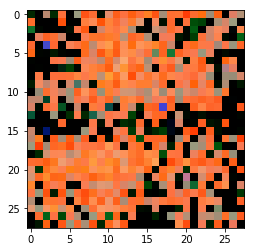

Epoch 1/1... Discriminator Loss: 1.1758... Generator Loss: 5.0714
Epoch 1/1... Discriminator Loss: 0.2443... Generator Loss: 3.9907
Epoch 1/1... Discriminator Loss: 0.2209... Generator Loss: 1.7068
Epoch 1/1... Discriminator Loss: 0.3649... Generator Loss: 1.2006
Epoch 1/1... Discriminator Loss: 0.1376... Generator Loss: 2.0662
Epoch 1/1... Discriminator Loss: 0.0742... Generator Loss: 2.7652
Epoch 1/1... Discriminator Loss: 0.0620... Generator Loss: 3.1387
Epoch 1/1... Discriminator Loss: 0.0623... Generator Loss: 2.8323
Epoch 1/1... Discriminator Loss: 0.0517... Generator Loss: 3.0005


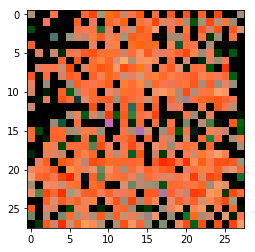

Epoch 1/1... Discriminator Loss: 0.0686... Generator Loss: 2.7270
Epoch 1/1... Discriminator Loss: 0.0253... Generator Loss: 3.6912
Epoch 1/1... Discriminator Loss: 0.0642... Generator Loss: 2.7798
Epoch 1/1... Discriminator Loss: 0.1254... Generator Loss: 2.1703
Epoch 1/1... Discriminator Loss: 1.1363... Generator Loss: 0.3878
Epoch 1/1... Discriminator Loss: 15.6309... Generator Loss: 28.0405
Epoch 1/1... Discriminator Loss: 6.4149... Generator Loss: 13.7506
Epoch 1/1... Discriminator Loss: 4.7871... Generator Loss: 0.0112


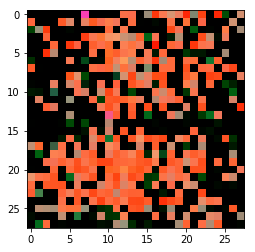

Epoch 1/1... Discriminator Loss: 2.7347... Generator Loss: 5.9585
Epoch 1/1... Discriminator Loss: 2.1259... Generator Loss: 4.8464
Epoch 1/1... Discriminator Loss: 1.4362... Generator Loss: 2.5648
Epoch 1/1... Discriminator Loss: 1.2894... Generator Loss: 1.2727
Epoch 1/1... Discriminator Loss: 1.2337... Generator Loss: 0.9167
Epoch 1/1... Discriminator Loss: 1.1327... Generator Loss: 1.0469
Epoch 1/1... Discriminator Loss: 1.0466... Generator Loss: 1.1837
Epoch 1/1... Discriminator Loss: 0.9336... Generator Loss: 1.5818
Epoch 1/1... Discriminator Loss: 1.1615... Generator Loss: 1.6300
Epoch 1/1... Discriminator Loss: 0.9871... Generator Loss: 1.5851
Epoch 1/1... Discriminator Loss: 0.8997... Generator Loss: 0.9444
Epoch 1/1... Discriminator Loss: 0.9100... Generator Loss: 2.3218
Epoch 1/1... Discriminator Loss: 1.0439... Generator Loss: 2.1211
Epoch 1/1... Discriminator Loss: 0.8471... Generator Loss: 2.4093
Epoch 1/1... Discriminator Loss: 0.8094... Generator Loss: 1.9155
Epoch 1/1.

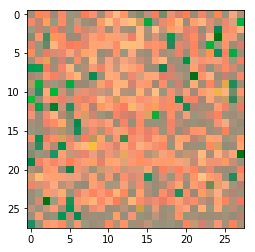

Epoch 1/1... Discriminator Loss: 4.1296... Generator Loss: 5.2882
Epoch 1/1... Discriminator Loss: 2.9167... Generator Loss: 4.6075
Epoch 1/1... Discriminator Loss: 1.6560... Generator Loss: 2.2691
Epoch 1/1... Discriminator Loss: 1.1642... Generator Loss: 0.9056
Epoch 1/1... Discriminator Loss: 1.2416... Generator Loss: 0.6020
Epoch 1/1... Discriminator Loss: 1.1395... Generator Loss: 0.6988
Epoch 1/1... Discriminator Loss: 1.0351... Generator Loss: 0.9278
Epoch 1/1... Discriminator Loss: 1.0056... Generator Loss: 1.1572
Epoch 1/1... Discriminator Loss: 0.9234... Generator Loss: 1.3264
Epoch 1/1... Discriminator Loss: 0.9538... Generator Loss: 1.0450
Epoch 1/1... Discriminator Loss: 0.7236... Generator Loss: 1.1894
Epoch 1/1... Discriminator Loss: 0.6707... Generator Loss: 1.4208
Epoch 1/1... Discriminator Loss: 0.5919... Generator Loss: 1.1175
Epoch 1/1... Discriminator Loss: 0.5702... Generator Loss: 2.3608
Epoch 1/1... Discriminator Loss: 0.3325... Generator Loss: 2.0164
Epoch 1/1.

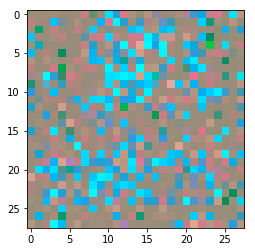

Epoch 1/1... Discriminator Loss: 0.0141... Generator Loss: 4.2813
Epoch 1/1... Discriminator Loss: 0.0221... Generator Loss: 4.3085
Epoch 1/1... Discriminator Loss: 0.0133... Generator Loss: 4.4579
Epoch 1/1... Discriminator Loss: 0.0125... Generator Loss: 4.5767
Epoch 1/1... Discriminator Loss: 0.0190... Generator Loss: 4.0486
Epoch 1/1... Discriminator Loss: 0.0008... Generator Loss: 7.1341
Epoch 1/1... Discriminator Loss: 0.0655... Generator Loss: 2.7577
Epoch 1/1... Discriminator Loss: 0.0135... Generator Loss: 4.3133
Epoch 1/1... Discriminator Loss: 0.0096... Generator Loss: 4.6481
Epoch 1/1... Discriminator Loss: 0.0119... Generator Loss: 4.4357
Epoch 1/1... Discriminator Loss: 0.0162... Generator Loss: 4.1281
Epoch 1/1... Discriminator Loss: 0.0307... Generator Loss: 3.4999
Epoch 1/1... Discriminator Loss: 0.0468... Generator Loss: 3.0857
Epoch 1/1... Discriminator Loss: 0.0323... Generator Loss: 3.4476
Epoch 1/1... Discriminator Loss: 0.0125... Generator Loss: 4.3897
Epoch 1/1.

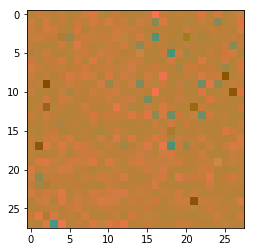

Epoch 1/1... Discriminator Loss: 0.0014... Generator Loss: 6.5942
Epoch 1/1... Discriminator Loss: 0.0013... Generator Loss: 6.6505
Epoch 1/1... Discriminator Loss: 0.0013... Generator Loss: 6.6164
Epoch 1/1... Discriminator Loss: 0.0012... Generator Loss: 6.7473
Epoch 1/1... Discriminator Loss: 0.0013... Generator Loss: 6.6782
Epoch 1/1... Discriminator Loss: 0.0012... Generator Loss: 6.7553
Epoch 1/1... Discriminator Loss: 0.0009... Generator Loss: 6.9845
Epoch 1/1... Discriminator Loss: 0.0009... Generator Loss: 6.9912
Epoch 1/1... Discriminator Loss: 0.0010... Generator Loss: 6.9494
Epoch 1/1... Discriminator Loss: 0.0015... Generator Loss: 6.8436
Epoch 1/1... Discriminator Loss: 0.0010... Generator Loss: 6.8720
Epoch 1/1... Discriminator Loss: 0.0010... Generator Loss: 6.8658
Epoch 1/1... Discriminator Loss: 0.0011... Generator Loss: 6.8304
Epoch 1/1... Discriminator Loss: 0.0011... Generator Loss: 6.8077
Epoch 1/1... Discriminator Loss: 0.0011... Generator Loss: 6.8249
Epoch 1/1.

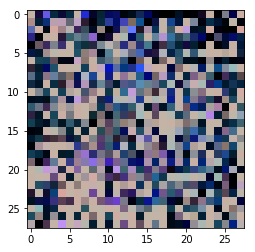

Epoch 1/1... Discriminator Loss: 34.1402... Generator Loss: 10.0840
Epoch 1/1... Discriminator Loss: 10.9061... Generator Loss: 4.5172
Epoch 1/1... Discriminator Loss: 1.2546... Generator Loss: 2.3645
Epoch 1/1... Discriminator Loss: 1.0418... Generator Loss: 1.4637
Epoch 1/1... Discriminator Loss: 0.5833... Generator Loss: 1.2291
Epoch 1/1... Discriminator Loss: 0.3994... Generator Loss: 1.4614
Epoch 1/1... Discriminator Loss: 0.1870... Generator Loss: 1.7908
Epoch 1/1... Discriminator Loss: 0.1419... Generator Loss: 2.0730
Epoch 1/1... Discriminator Loss: 0.1128... Generator Loss: 2.5395
Epoch 1/1... Discriminator Loss: 0.1227... Generator Loss: 2.4415
Epoch 1/1... Discriminator Loss: 0.7874... Generator Loss: 0.6300
Epoch 1/1... Discriminator Loss: 2.3279... Generator Loss: 1.4217
Epoch 1/1... Discriminator Loss: 1.1539... Generator Loss: 0.5007
Epoch 1/1... Discriminator Loss: 1.2089... Generator Loss: 0.3732
Epoch 1/1... Discriminator Loss: 0.7158... Generator Loss: 0.6881
Epoch 1

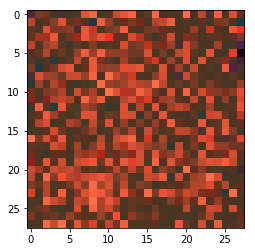

Epoch 1/1... Discriminator Loss: 0.0350... Generator Loss: 3.7766
Epoch 1/1... Discriminator Loss: 0.0362... Generator Loss: 3.5736
Epoch 1/1... Discriminator Loss: 0.0347... Generator Loss: 3.7905
Epoch 1/1... Discriminator Loss: 0.0487... Generator Loss: 3.4735
Epoch 1/1... Discriminator Loss: 0.0373... Generator Loss: 3.3966
Epoch 1/1... Discriminator Loss: 0.0363... Generator Loss: 3.6105
Epoch 1/1... Discriminator Loss: 0.0242... Generator Loss: 3.8203
Epoch 1/1... Discriminator Loss: 0.0194... Generator Loss: 4.1873
Epoch 1/1... Discriminator Loss: 0.0169... Generator Loss: 4.2005
Epoch 1/1... Discriminator Loss: 0.0165... Generator Loss: 4.1950
Epoch 1/1... Discriminator Loss: 0.0159... Generator Loss: 4.1768
Epoch 1/1... Discriminator Loss: 0.0134... Generator Loss: 4.3979
Epoch 1/1... Discriminator Loss: 0.0146... Generator Loss: 4.3603
Epoch 1/1... Discriminator Loss: 0.0147... Generator Loss: 4.2498
Epoch 1/1... Discriminator Loss: 0.0347... Generator Loss: 3.4019
Epoch 1/1.

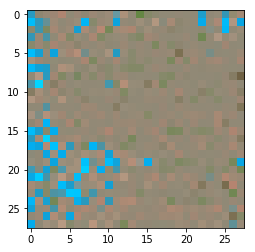

Epoch 1/1... Discriminator Loss: 0.0052... Generator Loss: 5.2866
Epoch 1/1... Discriminator Loss: 0.0044... Generator Loss: 5.5075
Epoch 1/1... Discriminator Loss: 0.0033... Generator Loss: 5.7171
Epoch 1/1... Discriminator Loss: 0.0053... Generator Loss: 5.2364
Epoch 1/1... Discriminator Loss: 0.0028... Generator Loss: 5.8958
Epoch 1/1... Discriminator Loss: 0.0068... Generator Loss: 4.9925
Epoch 1/1... Discriminator Loss: 0.0089... Generator Loss: 4.7234
Epoch 1/1... Discriminator Loss: 0.0084... Generator Loss: 4.7881
Epoch 1/1... Discriminator Loss: 0.2862... Generator Loss: 1.3907
Epoch 1/1... Discriminator Loss: 2.8471... Generator Loss: 0.0598


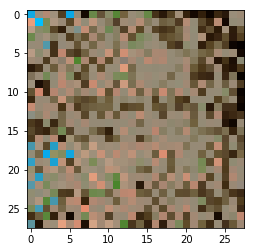

Epoch 1/1... Discriminator Loss: 33.5278... Generator Loss: 22.7530
Epoch 1/1... Discriminator Loss: 0.0045... Generator Loss: 5.4029
Epoch 1/1... Discriminator Loss: 2.3359... Generator Loss: 0.1017
Epoch 1/1... Discriminator Loss: 1.0013... Generator Loss: 0.4579
Epoch 1/1... Discriminator Loss: 1.1019... Generator Loss: 0.4038
Epoch 1/1... Discriminator Loss: 10.0304... Generator Loss: 0.0000


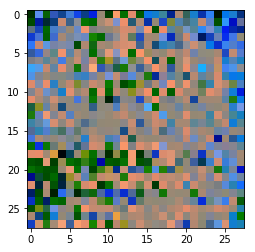

Epoch 1/1... Discriminator Loss: 1.4705... Generator Loss: 0.2611
Epoch 1/1... Discriminator Loss: 0.0062... Generator Loss: 5.0806
Epoch 1/1... Discriminator Loss: 0.0048... Generator Loss: 5.3361
Epoch 1/1... Discriminator Loss: 0.0558... Generator Loss: 2.9141
Epoch 1/1... Discriminator Loss: 0.1358... Generator Loss: 2.0635
Epoch 1/1... Discriminator Loss: 0.1979... Generator Loss: 1.7173
Epoch 1/1... Discriminator Loss: 0.1908... Generator Loss: 1.7506
Epoch 1/1... Discriminator Loss: 0.1684... Generator Loss: 1.8642
Epoch 1/1... Discriminator Loss: 0.1024... Generator Loss: 2.3297
Epoch 1/1... Discriminator Loss: 0.0644... Generator Loss: 2.7740
Epoch 1/1... Discriminator Loss: 0.0576... Generator Loss: 2.8827
Epoch 1/1... Discriminator Loss: 0.0593... Generator Loss: 2.8546
Epoch 1/1... Discriminator Loss: 0.0457... Generator Loss: 3.1095
Epoch 1/1... Discriminator Loss: 0.0230... Generator Loss: 3.7833
Epoch 1/1... Discriminator Loss: 0.0173... Generator Loss: 4.0649
Epoch 1/1.

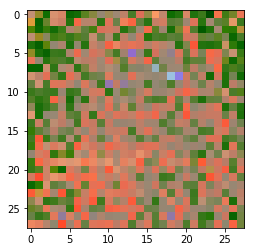

Epoch 1/1... Discriminator Loss: 25.8729... Generator Loss: 0.0000


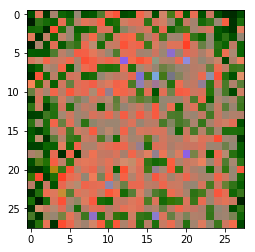

Epoch 1/1... Discriminator Loss: 10.6691... Generator Loss: 23.8215
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 8.3897
Epoch 1/1... Discriminator Loss: 0.0413... Generator Loss: 3.2076
Epoch 1/1... Discriminator Loss: 1.1543... Generator Loss: 0.3787
Epoch 1/1... Discriminator Loss: 1.3043... Generator Loss: 0.3166
Epoch 1/1... Discriminator Loss: 0.0154... Generator Loss: 4.1789
Epoch 1/1... Discriminator Loss: 0.0019... Generator Loss: 6.2748
Epoch 1/1... Discriminator Loss: 0.0010... Generator Loss: 6.9936
Epoch 1/1... Discriminator Loss: 0.0008... Generator Loss: 7.1023
Epoch 1/1... Discriminator Loss: 0.0021... Generator Loss: 7.0269
Epoch 1/1... Discriminator Loss: 0.0015... Generator Loss: 6.4835
Epoch 1/1... Discriminator Loss: 0.0049... Generator Loss: 9.4202
Epoch 1/1... Discriminator Loss: 0.0018... Generator Loss: 6.8016
Epoch 1/1... Discriminator Loss: 0.0022... Generator Loss: 6.1368
Epoch 1/1... Discriminator Loss: 0.0841... Generator Loss: 2.5172
Epoch 1/

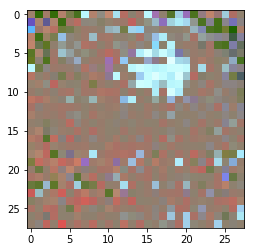

Epoch 1/1... Discriminator Loss: 0.1134... Generator Loss: 2.2328
Epoch 1/1... Discriminator Loss: 0.0903... Generator Loss: 2.4491
Epoch 1/1... Discriminator Loss: 0.0755... Generator Loss: 2.6217
Epoch 1/1... Discriminator Loss: 0.0469... Generator Loss: 3.0829
Epoch 1/1... Discriminator Loss: 0.0582... Generator Loss: 2.8722
Epoch 1/1... Discriminator Loss: 0.0422... Generator Loss: 3.1864
Epoch 1/1... Discriminator Loss: 0.0400... Generator Loss: 3.2383
Epoch 1/1... Discriminator Loss: 0.0351... Generator Loss: 3.3660
Epoch 1/1... Discriminator Loss: 0.0290... Generator Loss: 3.5534
Epoch 1/1... Discriminator Loss: 0.0291... Generator Loss: 3.5529
Epoch 1/1... Discriminator Loss: 0.0276... Generator Loss: 3.6022
Epoch 1/1... Discriminator Loss: 0.0231... Generator Loss: 3.7781
Epoch 1/1... Discriminator Loss: 0.0220... Generator Loss: 3.8272
Epoch 1/1... Discriminator Loss: 0.0194... Generator Loss: 3.9538
Epoch 1/1... Discriminator Loss: 0.0204... Generator Loss: 3.9016
Epoch 1/1.

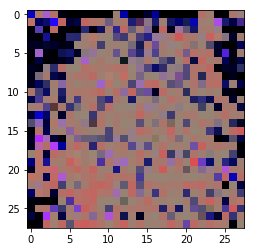

Epoch 1/1... Discriminator Loss: 3.3883... Generator Loss: 13.5854
Epoch 1/1... Discriminator Loss: 0.0058... Generator Loss: 5.1463
Epoch 1/1... Discriminator Loss: 2.3515... Generator Loss: 0.1001
Epoch 1/1... Discriminator Loss: 1.7404... Generator Loss: 0.1929
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 8.4620
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 11.2504
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 12.0902
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 12.1763
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 11.8378
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 11.4432
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 11.1313
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 10.5710
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 10.3913
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 9.6069
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 8.3837
E

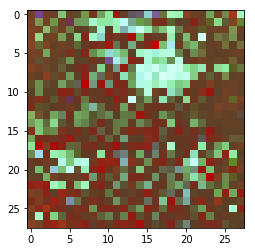

Epoch 1/1... Discriminator Loss: 0.0119... Generator Loss: 4.4374
Epoch 1/1... Discriminator Loss: 0.0112... Generator Loss: 4.4963
Epoch 1/1... Discriminator Loss: 0.0127... Generator Loss: 4.3732
Epoch 1/1... Discriminator Loss: 0.0137... Generator Loss: 4.2995
Epoch 1/1... Discriminator Loss: 0.0161... Generator Loss: 4.1358
Epoch 1/1... Discriminator Loss: 0.0177... Generator Loss: 4.0402
Epoch 1/1... Discriminator Loss: 0.0179... Generator Loss: 4.0310
Epoch 1/1... Discriminator Loss: 0.0156... Generator Loss: 4.1658
Epoch 1/1... Discriminator Loss: 0.0238... Generator Loss: 3.7486
Epoch 1/1... Discriminator Loss: 0.0249... Generator Loss: 3.7057
Epoch 1/1... Discriminator Loss: 0.0255... Generator Loss: 3.6800
Epoch 1/1... Discriminator Loss: 0.0303... Generator Loss: 3.5120
Epoch 1/1... Discriminator Loss: 0.0312... Generator Loss: 3.4844
Epoch 1/1... Discriminator Loss: 0.0326... Generator Loss: 3.4382
Epoch 1/1... Discriminator Loss: 0.0301... Generator Loss: 3.5179
Epoch 1/1.

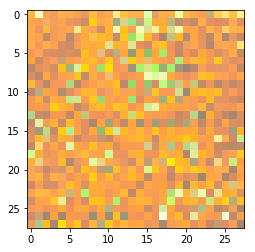

Epoch 1/1... Discriminator Loss: 0.2092... Generator Loss: 1.6672
Epoch 1/1... Discriminator Loss: 0.0050... Generator Loss: 5.3014
Epoch 1/1... Discriminator Loss: 0.0036... Generator Loss: 5.6370
Epoch 1/1... Discriminator Loss: 0.0050... Generator Loss: 5.3033
Epoch 1/1... Discriminator Loss: 0.0098... Generator Loss: 4.6253
Epoch 1/1... Discriminator Loss: 0.0202... Generator Loss: 3.9123
Epoch 1/1... Discriminator Loss: 0.0183... Generator Loss: 4.0097
Epoch 1/1... Discriminator Loss: 0.0136... Generator Loss: 4.3050
Epoch 1/1... Discriminator Loss: 0.0126... Generator Loss: 4.3836
Epoch 1/1... Discriminator Loss: 0.0132... Generator Loss: 4.3372
Epoch 1/1... Discriminator Loss: 0.0132... Generator Loss: 4.3317
Epoch 1/1... Discriminator Loss: 0.0110... Generator Loss: 4.5192
Epoch 1/1... Discriminator Loss: 0.0085... Generator Loss: 4.7669
Epoch 1/1... Discriminator Loss: 0.0070... Generator Loss: 4.9662
Epoch 1/1... Discriminator Loss: 0.0049... Generator Loss: 5.3158
Epoch 1/1.

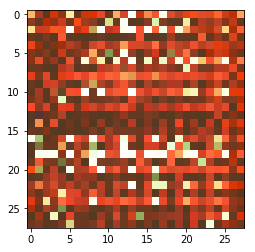

Epoch 1/1... Discriminator Loss: 0.0024... Generator Loss: 6.0935
Epoch 1/1... Discriminator Loss: 0.0018... Generator Loss: 6.3046
Epoch 1/1... Discriminator Loss: 0.0017... Generator Loss: 6.3995
Epoch 1/1... Discriminator Loss: 0.0023... Generator Loss: 6.0578
Epoch 1/1... Discriminator Loss: 0.0023... Generator Loss: 6.0550
Epoch 1/1... Discriminator Loss: 0.0022... Generator Loss: 6.1124
Epoch 1/1... Discriminator Loss: 0.0024... Generator Loss: 6.0486
Epoch 1/1... Discriminator Loss: 0.0024... Generator Loss: 6.0195
Epoch 1/1... Discriminator Loss: 0.0023... Generator Loss: 6.0964
Epoch 1/1... Discriminator Loss: 0.0025... Generator Loss: 5.9969
Epoch 1/1... Discriminator Loss: 0.0024... Generator Loss: 6.0353
Epoch 1/1... Discriminator Loss: 0.0025... Generator Loss: 5.9795
Epoch 1/1... Discriminator Loss: 0.0025... Generator Loss: 6.0020
Epoch 1/1... Discriminator Loss: 0.0023... Generator Loss: 6.0647
Epoch 1/1... Discriminator Loss: 0.0024... Generator Loss: 6.0281
Epoch 1/1.

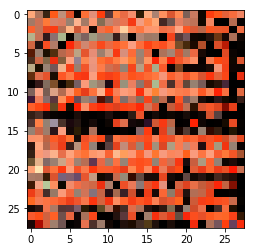

Epoch 1/1... Discriminator Loss: 6.4140... Generator Loss: 19.9944
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 14.3611
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 12.2881
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 10.2030
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 8.9775
Epoch 1/1... Discriminator Loss: 0.0025... Generator Loss: 6.3081
Epoch 1/1... Discriminator Loss: 74.9189... Generator Loss: 0.0000


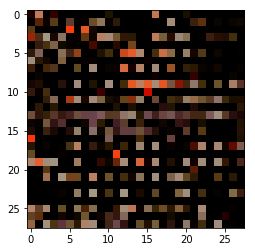

Epoch 1/1... Discriminator Loss: 41.8451... Generator Loss: 9.9279
Epoch 1/1... Discriminator Loss: 0.8544... Generator Loss: 0.5544
Epoch 1/1... Discriminator Loss: 0.2737... Generator Loss: 1.4295
Epoch 1/1... Discriminator Loss: 0.1670... Generator Loss: 1.8719
Epoch 1/1... Discriminator Loss: 0.0930... Generator Loss: 2.4213
Epoch 1/1... Discriminator Loss: 0.0517... Generator Loss: 2.9886
Epoch 1/1... Discriminator Loss: 0.0324... Generator Loss: 3.4448
Epoch 1/1... Discriminator Loss: 0.0224... Generator Loss: 3.8114
Epoch 1/1... Discriminator Loss: 0.0190... Generator Loss: 3.9703
Epoch 1/1... Discriminator Loss: 0.0145... Generator Loss: 4.2440
Epoch 1/1... Discriminator Loss: 0.0162... Generator Loss: 4.1281
Epoch 1/1... Discriminator Loss: 0.0224... Generator Loss: 3.8093
Epoch 1/1... Discriminator Loss: 0.4958... Generator Loss: 0.9393
Epoch 1/1... Discriminator Loss: 73.9703... Generator Loss: 0.0000


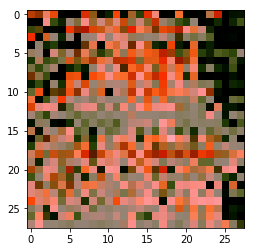

Epoch 1/1... Discriminator Loss: 13.8093... Generator Loss: 6.0963
Epoch 1/1... Discriminator Loss: 1.0234... Generator Loss: 0.4455
Epoch 1/1... Discriminator Loss: 0.7712... Generator Loss: 0.6434
Epoch 1/1... Discriminator Loss: 0.5616... Generator Loss: 0.8850
Epoch 1/1... Discriminator Loss: 0.4316... Generator Loss: 1.0921
Epoch 1/1... Discriminator Loss: 0.1850... Generator Loss: 1.8673
Epoch 1/1... Discriminator Loss: 0.0590... Generator Loss: 3.0052
Epoch 1/1... Discriminator Loss: 0.5630... Generator Loss: 0.8428
Epoch 1/1... Discriminator Loss: 0.0877... Generator Loss: 2.4775
Epoch 1/1... Discriminator Loss: 0.0634... Generator Loss: 2.7891
Epoch 1/1... Discriminator Loss: 0.0601... Generator Loss: 2.8422
Epoch 1/1... Discriminator Loss: 0.0342... Generator Loss: 3.3936
Epoch 1/1... Discriminator Loss: 0.0408... Generator Loss: 3.2205
Epoch 1/1... Discriminator Loss: 0.0546... Generator Loss: 2.9347
Epoch 1/1... Discriminator Loss: 0.1164... Generator Loss: 2.2088


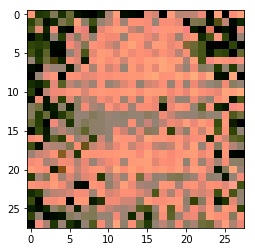

Epoch 1/1... Discriminator Loss: 0.1148... Generator Loss: 2.2212
Epoch 1/1... Discriminator Loss: 0.1196... Generator Loss: 2.1831
Epoch 1/1... Discriminator Loss: 0.1335... Generator Loss: 2.0800
Epoch 1/1... Discriminator Loss: 0.1082... Generator Loss: 2.2774
Epoch 1/1... Discriminator Loss: 0.1508... Generator Loss: 1.9662
Epoch 1/1... Discriminator Loss: 0.1162... Generator Loss: 2.2102
Epoch 1/1... Discriminator Loss: 0.0753... Generator Loss: 2.6243
Epoch 1/1... Discriminator Loss: 0.1036... Generator Loss: 2.3183
Epoch 1/1... Discriminator Loss: 0.1134... Generator Loss: 2.2328
Epoch 1/1... Discriminator Loss: 0.0708... Generator Loss: 2.6838
Epoch 1/1... Discriminator Loss: 0.0924... Generator Loss: 2.4409
Epoch 1/1... Discriminator Loss: 0.0879... Generator Loss: 2.4754
Epoch 1/1... Discriminator Loss: 0.0764... Generator Loss: 2.6093
Epoch 1/1... Discriminator Loss: 0.0806... Generator Loss: 2.5610
Epoch 1/1... Discriminator Loss: 0.1347... Generator Loss: 2.0715
Epoch 1/1.

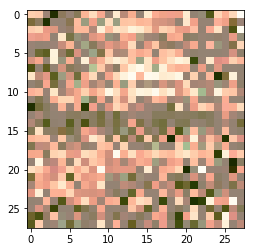

Epoch 1/1... Discriminator Loss: 17.7431... Generator Loss: 18.1118
Epoch 1/1... Discriminator Loss: 0.0325... Generator Loss: 6.3688
Epoch 1/1... Discriminator Loss: 2.2867... Generator Loss: 0.1072
Epoch 1/1... Discriminator Loss: 0.0369... Generator Loss: 3.9736
Epoch 1/1... Discriminator Loss: 1.0910... Generator Loss: 0.4093
Epoch 1/1... Discriminator Loss: 0.1086... Generator Loss: 2.6303
Epoch 1/1... Discriminator Loss: 0.1076... Generator Loss: 3.7710
Epoch 1/1... Discriminator Loss: 0.0307... Generator Loss: 6.4659
Epoch 1/1... Discriminator Loss: 0.0339... Generator Loss: 4.3888
Epoch 1/1... Discriminator Loss: 4.9654... Generator Loss: 0.0070


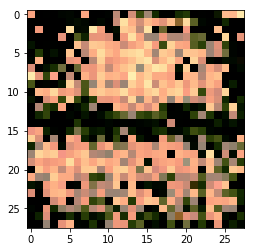

Epoch 1/1... Discriminator Loss: 6.3428... Generator Loss: 14.1706
Epoch 1/1... Discriminator Loss: 0.2480... Generator Loss: 6.0745
Epoch 1/1... Discriminator Loss: 0.4322... Generator Loss: 1.0499
Epoch 1/1... Discriminator Loss: 1.3056... Generator Loss: 0.3164
Epoch 1/1... Discriminator Loss: 0.4753... Generator Loss: 1.0275
Epoch 1/1... Discriminator Loss: 0.2333... Generator Loss: 1.7944
Epoch 1/1... Discriminator Loss: 0.1558... Generator Loss: 1.9645
Epoch 1/1... Discriminator Loss: 0.2411... Generator Loss: 1.6909
Epoch 1/1... Discriminator Loss: 0.9576... Generator Loss: 0.4871
Epoch 1/1... Discriminator Loss: 0.2109... Generator Loss: 1.6677
Epoch 1/1... Discriminator Loss: 0.3405... Generator Loss: 1.2931
Epoch 1/1... Discriminator Loss: 2.5623... Generator Loss: 0.0821


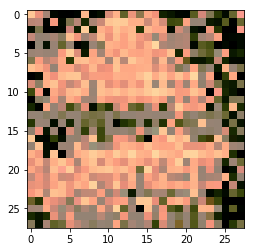

Epoch 1/1... Discriminator Loss: 0.2736... Generator Loss: 1.6324
Epoch 1/1... Discriminator Loss: 0.2826... Generator Loss: 2.1282
Epoch 1/1... Discriminator Loss: 0.2705... Generator Loss: 1.6006
Epoch 1/1... Discriminator Loss: 0.6901... Generator Loss: 0.6974
Epoch 1/1... Discriminator Loss: 0.0223... Generator Loss: 4.0525
Epoch 1/1... Discriminator Loss: 0.0080... Generator Loss: 5.9469
Epoch 1/1... Discriminator Loss: 0.0036... Generator Loss: 6.7394
Epoch 1/1... Discriminator Loss: 0.0077... Generator Loss: 6.4544
Epoch 1/1... Discriminator Loss: 0.0119... Generator Loss: 4.4415
Epoch 1/1... Discriminator Loss: 0.0592... Generator Loss: 2.8568
Epoch 1/1... Discriminator Loss: 0.1303... Generator Loss: 2.1031
Epoch 1/1... Discriminator Loss: 0.6029... Generator Loss: 0.7923
Epoch 1/1... Discriminator Loss: 0.2724... Generator Loss: 1.4337
Epoch 1/1... Discriminator Loss: 0.1503... Generator Loss: 1.9699
Epoch 1/1... Discriminator Loss: 0.0669... Generator Loss: 2.7381
Epoch 1/1.

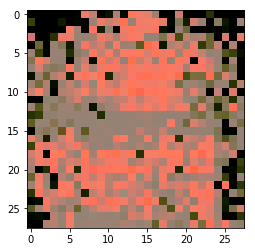

Epoch 1/1... Discriminator Loss: 7.7930... Generator Loss: 13.0131
Epoch 1/1... Discriminator Loss: 2.9318... Generator Loss: 0.0548


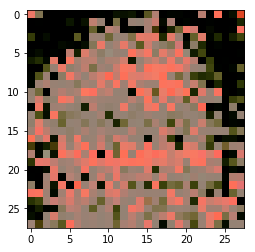

Epoch 1/1... Discriminator Loss: 1.3091... Generator Loss: 0.3163
Epoch 1/1... Discriminator Loss: 0.3738... Generator Loss: 2.9550
Epoch 1/1... Discriminator Loss: 0.0269... Generator Loss: 3.7435
Epoch 1/1... Discriminator Loss: 0.0536... Generator Loss: 3.9865
Epoch 1/1... Discriminator Loss: 0.0270... Generator Loss: 3.9020
Epoch 1/1... Discriminator Loss: 0.1145... Generator Loss: 2.2290
Epoch 1/1... Discriminator Loss: 4.9462... Generator Loss: 0.0071


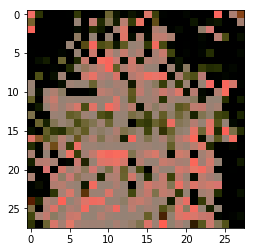

Epoch 1/1... Discriminator Loss: 0.7938... Generator Loss: 0.6463
Epoch 1/1... Discriminator Loss: 0.4712... Generator Loss: 2.1151
Epoch 1/1... Discriminator Loss: 0.1704... Generator Loss: 1.8993
Epoch 1/1... Discriminator Loss: 3.0069... Generator Loss: 0.0511


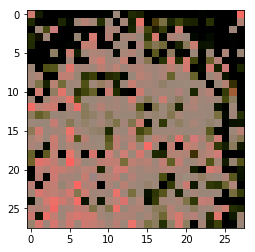

Epoch 1/1... Discriminator Loss: 1.2806... Generator Loss: 0.3258
Epoch 1/1... Discriminator Loss: 0.2735... Generator Loss: 1.7101
Epoch 1/1... Discriminator Loss: 2.1956... Generator Loss: 0.1208
Epoch 1/1... Discriminator Loss: 2.6091... Generator Loss: 9.0038
Epoch 1/1... Discriminator Loss: 0.0174... Generator Loss: 6.0876
Epoch 1/1... Discriminator Loss: 0.8404... Generator Loss: 0.5668
Epoch 1/1... Discriminator Loss: 1.9137... Generator Loss: 0.1597
Epoch 1/1... Discriminator Loss: 0.0712... Generator Loss: 2.7465
Epoch 1/1... Discriminator Loss: 0.0763... Generator Loss: 2.8676
Epoch 1/1... Discriminator Loss: 0.0565... Generator Loss: 3.4452
Epoch 1/1... Discriminator Loss: 0.1854... Generator Loss: 1.9091
Epoch 1/1... Discriminator Loss: 0.0992... Generator Loss: 2.4450
Epoch 1/1... Discriminator Loss: 0.2159... Generator Loss: 1.6865
Epoch 1/1... Discriminator Loss: 0.1708... Generator Loss: 1.8914
Epoch 1/1... Discriminator Loss: 0.2703... Generator Loss: 1.4732
Epoch 1/1.

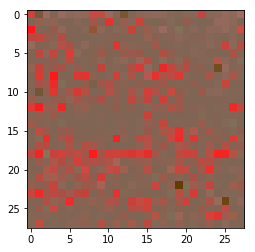

Epoch 1/1... Discriminator Loss: 0.0152... Generator Loss: 4.1974
Epoch 1/1... Discriminator Loss: 0.0124... Generator Loss: 4.3950
Epoch 1/1... Discriminator Loss: 0.0100... Generator Loss: 4.6144
Epoch 1/1... Discriminator Loss: 0.0093... Generator Loss: 4.6840
Epoch 1/1... Discriminator Loss: 0.0091... Generator Loss: 4.7124
Epoch 1/1... Discriminator Loss: 0.0096... Generator Loss: 4.6561
Epoch 1/1... Discriminator Loss: 0.0086... Generator Loss: 4.7550
Epoch 1/1... Discriminator Loss: 0.0081... Generator Loss: 4.8635
Epoch 1/1... Discriminator Loss: 0.0071... Generator Loss: 4.9591
Epoch 1/1... Discriminator Loss: 0.0068... Generator Loss: 4.9992
Epoch 1/1... Discriminator Loss: 0.0065... Generator Loss: 5.0843
Epoch 1/1... Discriminator Loss: 0.0089... Generator Loss: 4.7340
Epoch 1/1... Discriminator Loss: 0.0136... Generator Loss: 4.6683
Epoch 1/1... Discriminator Loss: 0.0122... Generator Loss: 4.4138
Epoch 1/1... Discriminator Loss: 0.0140... Generator Loss: 4.2729
Epoch 1/1.

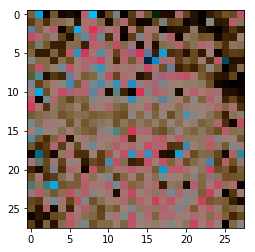

Epoch 1/1... Discriminator Loss: 0.0104... Generator Loss: 8.5420
Epoch 1/1... Discriminator Loss: 0.1885... Generator Loss: 11.4520
Epoch 1/1... Discriminator Loss: 0.0007... Generator Loss: 7.5647
Epoch 1/1... Discriminator Loss: 0.0047... Generator Loss: 5.4453
Epoch 1/1... Discriminator Loss: 0.0152... Generator Loss: 4.2480
Epoch 1/1... Discriminator Loss: 0.0356... Generator Loss: 3.4158
Epoch 1/1... Discriminator Loss: 12.1525... Generator Loss: 0.0000


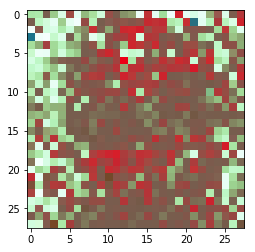

Epoch 1/1... Discriminator Loss: 0.1197... Generator Loss: 8.5176
Epoch 1/1... Discriminator Loss: 0.0052... Generator Loss: 5.3844
Epoch 1/1... Discriminator Loss: 0.0131... Generator Loss: 4.7079
Epoch 1/1... Discriminator Loss: 0.0222... Generator Loss: 4.1758
Epoch 1/1... Discriminator Loss: 0.0159... Generator Loss: 4.1520
Epoch 1/1... Discriminator Loss: 0.0421... Generator Loss: 3.2012
Epoch 1/1... Discriminator Loss: 0.0714... Generator Loss: 2.6751
Epoch 1/1... Discriminator Loss: 0.0502... Generator Loss: 3.0172
Epoch 1/1... Discriminator Loss: 0.0527... Generator Loss: 2.9989
Epoch 1/1... Discriminator Loss: 0.0385... Generator Loss: 3.2785
Epoch 1/1... Discriminator Loss: 0.1369... Generator Loss: 2.1567
Epoch 1/1... Discriminator Loss: 0.0769... Generator Loss: 2.6573
Epoch 1/1... Discriminator Loss: 0.0485... Generator Loss: 3.0520
Epoch 1/1... Discriminator Loss: 0.0149... Generator Loss: 4.2922
Epoch 1/1... Discriminator Loss: 0.0089... Generator Loss: 4.7305
Epoch 1/1.

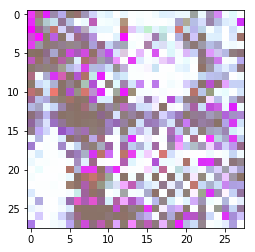

Epoch 1/1... Discriminator Loss: 0.0091... Generator Loss: 4.6993
Epoch 1/1... Discriminator Loss: 0.0200... Generator Loss: 3.9216
Epoch 1/1... Discriminator Loss: 0.0123... Generator Loss: 4.4065
Epoch 1/1... Discriminator Loss: 0.0154... Generator Loss: 4.1842
Epoch 1/1... Discriminator Loss: 0.0357... Generator Loss: 3.3534
Epoch 1/1... Discriminator Loss: 0.0322... Generator Loss: 3.4511
Epoch 1/1... Discriminator Loss: 0.0717... Generator Loss: 2.6742
Epoch 1/1... Discriminator Loss: 0.0375... Generator Loss: 3.3032
Epoch 1/1... Discriminator Loss: 0.0474... Generator Loss: 3.0726
Epoch 1/1... Discriminator Loss: 0.0374... Generator Loss: 3.3042
Epoch 1/1... Discriminator Loss: 0.0193... Generator Loss: 3.9600
Epoch 1/1... Discriminator Loss: 0.0122... Generator Loss: 4.4145
Epoch 1/1... Discriminator Loss: 0.0075... Generator Loss: 4.8980
Epoch 1/1... Discriminator Loss: 0.0037... Generator Loss: 5.5944
Epoch 1/1... Discriminator Loss: 0.0151... Generator Loss: 4.4076
Epoch 1/1.

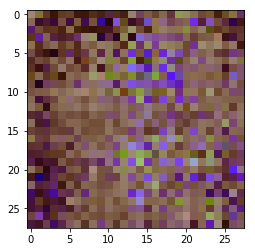

Epoch 1/1... Discriminator Loss: 9.2536... Generator Loss: 9.0990
Epoch 1/1... Discriminator Loss: 1.8194... Generator Loss: 2.4923
Epoch 1/1... Discriminator Loss: 1.6732... Generator Loss: 0.3583
Epoch 1/1... Discriminator Loss: 2.1638... Generator Loss: 0.1323
Epoch 1/1... Discriminator Loss: 0.5512... Generator Loss: 1.5872
Epoch 1/1... Discriminator Loss: 0.1554... Generator Loss: 2.2951
Epoch 1/1... Discriminator Loss: 0.1212... Generator Loss: 2.5888
Epoch 1/1... Discriminator Loss: 0.0727... Generator Loss: 2.6930
Epoch 1/1... Discriminator Loss: 0.0796... Generator Loss: 2.6214
Epoch 1/1... Discriminator Loss: 0.1211... Generator Loss: 2.1794
Epoch 1/1... Discriminator Loss: 0.1506... Generator Loss: 2.0051
Epoch 1/1... Discriminator Loss: 0.2718... Generator Loss: 1.4430
Epoch 1/1... Discriminator Loss: 0.4485... Generator Loss: 1.0183
Epoch 1/1... Discriminator Loss: 0.2912... Generator Loss: 1.4411
Epoch 1/1... Discriminator Loss: 0.7560... Generator Loss: 0.6442
Epoch 1/1.

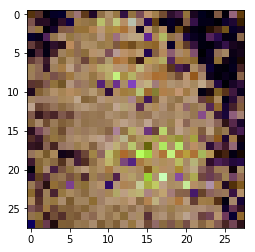

Epoch 1/1... Discriminator Loss: 4.7779... Generator Loss: 10.3968
Epoch 1/1... Discriminator Loss: 2.4463... Generator Loss: 4.9142
Epoch 1/1... Discriminator Loss: 1.2364... Generator Loss: 1.1762
Epoch 1/1... Discriminator Loss: 2.9557... Generator Loss: 0.0539


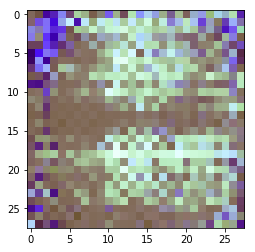

Epoch 1/1... Discriminator Loss: 0.9179... Generator Loss: 1.9545
Epoch 1/1... Discriminator Loss: 0.8378... Generator Loss: 2.2571
Epoch 1/1... Discriminator Loss: 0.9886... Generator Loss: 1.0349
Epoch 1/1... Discriminator Loss: 1.0315... Generator Loss: 0.8569
Epoch 1/1... Discriminator Loss: 1.4462... Generator Loss: 0.5481
Epoch 1/1... Discriminator Loss: 1.2111... Generator Loss: 0.6242
Epoch 1/1... Discriminator Loss: 0.8585... Generator Loss: 0.8638
Epoch 1/1... Discriminator Loss: 0.8109... Generator Loss: 0.9654
Epoch 1/1... Discriminator Loss: 0.6559... Generator Loss: 0.9021
Epoch 1/1... Discriminator Loss: 0.7186... Generator Loss: 0.7410
Epoch 1/1... Discriminator Loss: 0.8611... Generator Loss: 0.8038
Epoch 1/1... Discriminator Loss: 0.4779... Generator Loss: 1.4425
Epoch 1/1... Discriminator Loss: 1.5800... Generator Loss: 0.2394
Epoch 1/1... Discriminator Loss: 0.4329... Generator Loss: 1.0938
Epoch 1/1... Discriminator Loss: 0.3488... Generator Loss: 1.2618
Epoch 1/1.

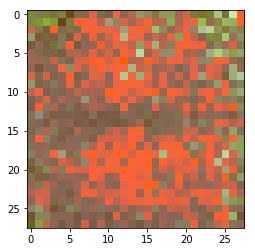

Epoch 1/1... Discriminator Loss: 3.0151... Generator Loss: 14.7576
Epoch 1/1... Discriminator Loss: 0.0520... Generator Loss: 5.1921
Epoch 1/1... Discriminator Loss: 0.1052... Generator Loss: 2.6613
Epoch 1/1... Discriminator Loss: 0.2260... Generator Loss: 1.6562
Epoch 1/1... Discriminator Loss: 0.2267... Generator Loss: 1.7278
Epoch 1/1... Discriminator Loss: 0.1288... Generator Loss: 2.2775
Epoch 1/1... Discriminator Loss: 0.0924... Generator Loss: 2.5226
Epoch 1/1... Discriminator Loss: 0.0673... Generator Loss: 3.0246
Epoch 1/1... Discriminator Loss: 0.0968... Generator Loss: 2.7912


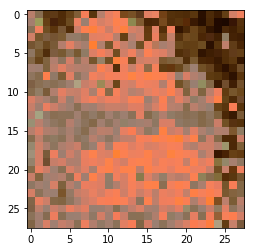

Epoch 1/1... Discriminator Loss: 0.0992... Generator Loss: 2.9069
Epoch 1/1... Discriminator Loss: 0.0585... Generator Loss: 3.1892
Epoch 1/1... Discriminator Loss: 0.0549... Generator Loss: 3.5631
Epoch 1/1... Discriminator Loss: 0.1072... Generator Loss: 2.5030
Epoch 1/1... Discriminator Loss: 0.1553... Generator Loss: 2.0274
Epoch 1/1... Discriminator Loss: 0.2016... Generator Loss: 1.9158
Epoch 1/1... Discriminator Loss: 0.0968... Generator Loss: 2.6679
Epoch 1/1... Discriminator Loss: 0.1161... Generator Loss: 2.3386
Epoch 1/1... Discriminator Loss: 0.1355... Generator Loss: 2.1450
Epoch 1/1... Discriminator Loss: 0.2629... Generator Loss: 1.5660
Epoch 1/1... Discriminator Loss: 0.1796... Generator Loss: 2.1242
Epoch 1/1... Discriminator Loss: 1.5448... Generator Loss: 0.2538
Epoch 1/1... Discriminator Loss: 0.8124... Generator Loss: 0.5963
Epoch 1/1... Discriminator Loss: 0.1563... Generator Loss: 2.8026
Epoch 1/1... Discriminator Loss: 0.3152... Generator Loss: 1.3629
Epoch 1/1.

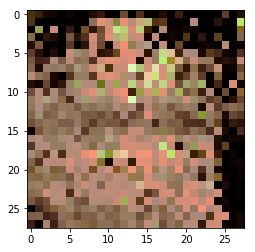

Epoch 1/1... Discriminator Loss: 5.7878... Generator Loss: 9.8434
Epoch 1/1... Discriminator Loss: 3.0500... Generator Loss: 0.0487


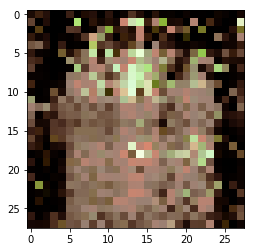

Epoch 1/1... Discriminator Loss: 0.1564... Generator Loss: 2.6487
Epoch 1/1... Discriminator Loss: 0.3666... Generator Loss: 3.7756
Epoch 1/1... Discriminator Loss: 0.1142... Generator Loss: 3.5459
Epoch 1/1... Discriminator Loss: 0.6249... Generator Loss: 0.8162
Epoch 1/1... Discriminator Loss: 1.2969... Generator Loss: 0.3298
Epoch 1/1... Discriminator Loss: 0.2057... Generator Loss: 2.0273
Epoch 1/1... Discriminator Loss: 0.2752... Generator Loss: 2.5183
Epoch 1/1... Discriminator Loss: 0.1998... Generator Loss: 2.0364
Epoch 1/1... Discriminator Loss: 0.3218... Generator Loss: 1.3984
Epoch 1/1... Discriminator Loss: 0.4492... Generator Loss: 1.0845
Epoch 1/1... Discriminator Loss: 0.4043... Generator Loss: 1.1254
Epoch 1/1... Discriminator Loss: 0.1882... Generator Loss: 1.8324
Epoch 1/1... Discriminator Loss: 0.1315... Generator Loss: 2.4370
Epoch 1/1... Discriminator Loss: 0.0918... Generator Loss: 2.6613
Epoch 1/1... Discriminator Loss: 0.0836... Generator Loss: 2.7690
Epoch 1/1.

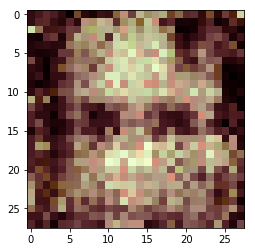

Epoch 1/1... Discriminator Loss: 8.2586... Generator Loss: 8.6101
Epoch 1/1... Discriminator Loss: 5.9684... Generator Loss: 0.0051


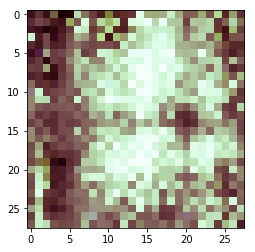

Epoch 1/1... Discriminator Loss: 1.6055... Generator Loss: 0.2353
Epoch 1/1... Discriminator Loss: 3.5768... Generator Loss: 0.0286


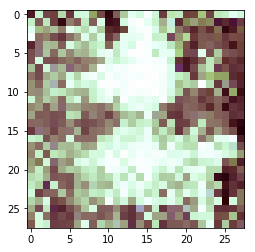

Epoch 1/1... Discriminator Loss: 3.8893... Generator Loss: 0.0207


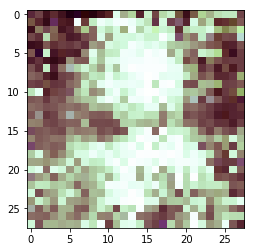

Epoch 1/1... Discriminator Loss: 0.4888... Generator Loss: 0.9585
Epoch 1/1... Discriminator Loss: 0.6525... Generator Loss: 0.7394
Epoch 1/1... Discriminator Loss: 0.9129... Generator Loss: 0.5341
Epoch 1/1... Discriminator Loss: 2.9435... Generator Loss: 0.0543


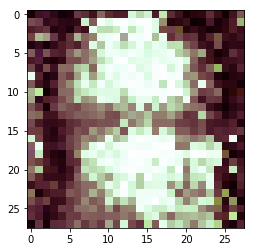

Epoch 1/1... Discriminator Loss: 0.5412... Generator Loss: 0.9024
Epoch 1/1... Discriminator Loss: 0.6776... Generator Loss: 0.7747
Epoch 1/1... Discriminator Loss: 6.5662... Generator Loss: 0.0015


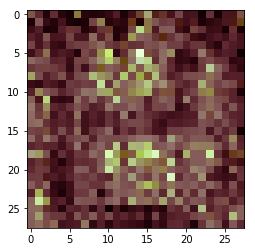

Epoch 1/1... Discriminator Loss: 1.1995... Generator Loss: 3.3413
Epoch 1/1... Discriminator Loss: 0.4779... Generator Loss: 1.7039
Epoch 1/1... Discriminator Loss: 0.3238... Generator Loss: 1.2964
Epoch 1/1... Discriminator Loss: 0.1724... Generator Loss: 1.8512
Epoch 1/1... Discriminator Loss: 0.2012... Generator Loss: 1.7291
Epoch 1/1... Discriminator Loss: 0.1531... Generator Loss: 1.9584
Epoch 1/1... Discriminator Loss: 0.1173... Generator Loss: 2.2104
Epoch 1/1... Discriminator Loss: 0.1177... Generator Loss: 2.1984
Epoch 1/1... Discriminator Loss: 0.1089... Generator Loss: 2.2815
Epoch 1/1... Discriminator Loss: 0.0717... Generator Loss: 2.6961
Epoch 1/1... Discriminator Loss: 0.0551... Generator Loss: 2.9572
Epoch 1/1... Discriminator Loss: 0.0871... Generator Loss: 2.5370
Epoch 1/1... Discriminator Loss: 0.0595... Generator Loss: 2.9897
Epoch 1/1... Discriminator Loss: 0.0404... Generator Loss: 3.2288
Epoch 1/1... Discriminator Loss: 0.0490... Generator Loss: 3.0906
Epoch 1/1.

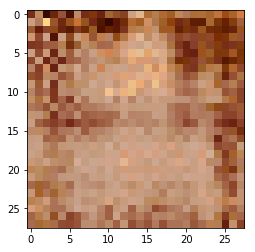

Epoch 1/1... Discriminator Loss: 0.0215... Generator Loss: 3.8497
Epoch 1/1... Discriminator Loss: 0.4281... Generator Loss: 1.0550
Epoch 1/1... Discriminator Loss: 0.4551... Generator Loss: 1.0061
Epoch 1/1... Discriminator Loss: 0.1593... Generator Loss: 1.9154
Epoch 1/1... Discriminator Loss: 0.1415... Generator Loss: 2.0454
Epoch 1/1... Discriminator Loss: 5.5145... Generator Loss: 0.0040


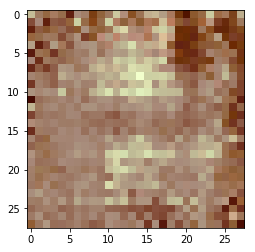

Epoch 1/1... Discriminator Loss: 10.5066... Generator Loss: 9.2451
Epoch 1/1... Discriminator Loss: 4.1113... Generator Loss: 5.4262
Epoch 1/1... Discriminator Loss: 1.0342... Generator Loss: 1.9093
Epoch 1/1... Discriminator Loss: 0.8521... Generator Loss: 0.9441
Epoch 1/1... Discriminator Loss: 0.9829... Generator Loss: 0.6499
Epoch 1/1... Discriminator Loss: 0.8489... Generator Loss: 0.6784
Epoch 1/1... Discriminator Loss: 0.5745... Generator Loss: 1.0090
Epoch 1/1... Discriminator Loss: 0.4974... Generator Loss: 1.2800
Epoch 1/1... Discriminator Loss: 0.2251... Generator Loss: 1.7216
Epoch 1/1... Discriminator Loss: 0.2624... Generator Loss: 1.8539
Epoch 1/1... Discriminator Loss: 0.2574... Generator Loss: 1.8478
Epoch 1/1... Discriminator Loss: 0.2543... Generator Loss: 1.6802
Epoch 1/1... Discriminator Loss: 0.1991... Generator Loss: 1.7593
Epoch 1/1... Discriminator Loss: 0.2946... Generator Loss: 1.4365
Epoch 1/1... Discriminator Loss: 0.1586... Generator Loss: 1.9317
Epoch 1/1

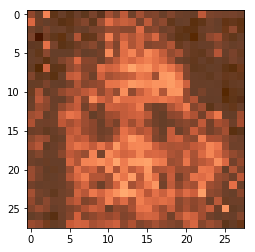

Epoch 1/1... Discriminator Loss: 10.6958... Generator Loss: 28.1143
Epoch 1/1... Discriminator Loss: 0.0115... Generator Loss: 4.4786
Epoch 1/1... Discriminator Loss: 0.5817... Generator Loss: 0.8237
Epoch 1/1... Discriminator Loss: 0.0593... Generator Loss: 2.8733
Epoch 1/1... Discriminator Loss: 0.0709... Generator Loss: 2.6847
Epoch 1/1... Discriminator Loss: 0.0617... Generator Loss: 2.8155
Epoch 1/1... Discriminator Loss: 0.0529... Generator Loss: 2.9836
Epoch 1/1... Discriminator Loss: 0.0548... Generator Loss: 3.0876
Epoch 1/1... Discriminator Loss: 0.0397... Generator Loss: 3.2475
Epoch 1/1... Discriminator Loss: 0.0495... Generator Loss: 3.3545
Epoch 1/1... Discriminator Loss: 0.0272... Generator Loss: 3.6959
Epoch 1/1... Discriminator Loss: 0.0271... Generator Loss: 3.6215
Epoch 1/1... Discriminator Loss: 0.0230... Generator Loss: 3.8552
Epoch 1/1... Discriminator Loss: 0.0243... Generator Loss: 3.7437
Epoch 1/1... Discriminator Loss: 0.0171... Generator Loss: 4.0753
Epoch 1/

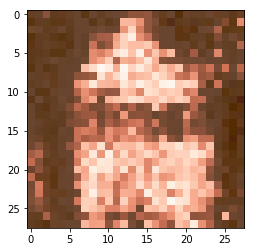

Epoch 1/1... Discriminator Loss: 7.1461... Generator Loss: 31.0451
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 12.4676
Epoch 1/1... Discriminator Loss: 0.1565... Generator Loss: 1.9322
Epoch 1/1... Discriminator Loss: 5.9108... Generator Loss: 0.0027


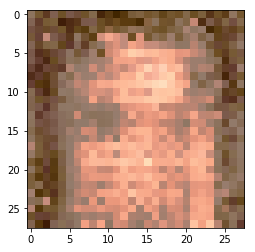

Epoch 1/1... Discriminator Loss: 0.1964... Generator Loss: 18.9049
Epoch 1/1... Discriminator Loss: 36.4900... Generator Loss: 0.0000


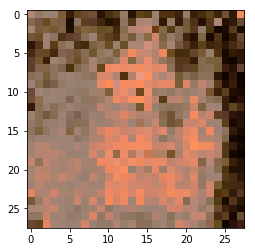

Epoch 1/1... Discriminator Loss: 11.1041... Generator Loss: 0.0000


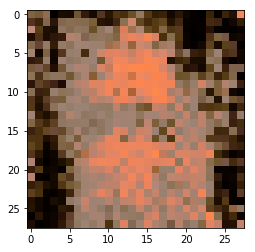

Epoch 1/1... Discriminator Loss: 13.0143... Generator Loss: 0.8452
Epoch 1/1... Discriminator Loss: 9.7551... Generator Loss: 6.0493
Epoch 1/1... Discriminator Loss: 2.2520... Generator Loss: 0.2535
Epoch 1/1... Discriminator Loss: 2.6970... Generator Loss: 0.0739


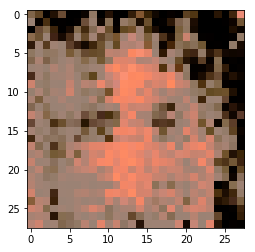

Epoch 1/1... Discriminator Loss: 1.6281... Generator Loss: 0.3748
Epoch 1/1... Discriminator Loss: 1.4200... Generator Loss: 0.8762
Epoch 1/1... Discriminator Loss: 1.3024... Generator Loss: 0.8674
Epoch 1/1... Discriminator Loss: 0.7746... Generator Loss: 0.8768
Epoch 1/1... Discriminator Loss: 0.6591... Generator Loss: 0.9527
Epoch 1/1... Discriminator Loss: 0.6019... Generator Loss: 1.1569
Epoch 1/1... Discriminator Loss: 0.6233... Generator Loss: 1.1547
Epoch 1/1... Discriminator Loss: 0.4323... Generator Loss: 1.3231
Epoch 1/1... Discriminator Loss: 0.6340... Generator Loss: 1.1493
Epoch 1/1... Discriminator Loss: 1.0758... Generator Loss: 0.6489
Epoch 1/1... Discriminator Loss: 1.4652... Generator Loss: 0.3359
Epoch 1/1... Discriminator Loss: 2.2049... Generator Loss: 1.0791
Epoch 1/1... Discriminator Loss: 1.3317... Generator Loss: 1.6101
Epoch 1/1... Discriminator Loss: 0.8790... Generator Loss: 0.8881
Epoch 1/1... Discriminator Loss: 0.6422... Generator Loss: 0.9578
Epoch 1/1.

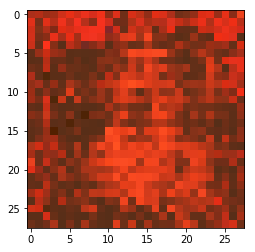

Epoch 1/1... Discriminator Loss: 0.4984... Generator Loss: 1.5648
Epoch 1/1... Discriminator Loss: 0.4292... Generator Loss: 1.5144
Epoch 1/1... Discriminator Loss: 0.3271... Generator Loss: 1.5557
Epoch 1/1... Discriminator Loss: 0.3694... Generator Loss: 1.5864
Epoch 1/1... Discriminator Loss: 0.3356... Generator Loss: 2.1137
Epoch 1/1... Discriminator Loss: 0.1315... Generator Loss: 2.8870
Epoch 1/1... Discriminator Loss: 0.2073... Generator Loss: 2.3547
Epoch 1/1... Discriminator Loss: 0.1327... Generator Loss: 2.4226
Epoch 1/1... Discriminator Loss: 0.1342... Generator Loss: 2.6324
Epoch 1/1... Discriminator Loss: 0.1443... Generator Loss: 2.8296
Epoch 1/1... Discriminator Loss: 0.0544... Generator Loss: 3.5475
Epoch 1/1... Discriminator Loss: 0.0358... Generator Loss: 3.8963
Epoch 1/1... Discriminator Loss: 0.0989... Generator Loss: 2.9615
Epoch 1/1... Discriminator Loss: 0.0561... Generator Loss: 3.1221
Epoch 1/1... Discriminator Loss: 0.2078... Generator Loss: 2.0934
Epoch 1/1.

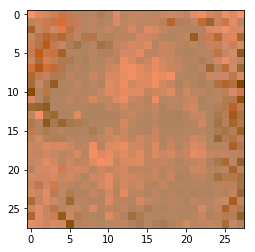

Epoch 1/1... Discriminator Loss: 0.0173... Generator Loss: 4.0666
Epoch 1/1... Discriminator Loss: 0.0166... Generator Loss: 4.1058
Epoch 1/1... Discriminator Loss: 0.0172... Generator Loss: 4.0690
Epoch 1/1... Discriminator Loss: 0.0875... Generator Loss: 2.4792
Epoch 1/1... Discriminator Loss: 0.1820... Generator Loss: 1.7936
Epoch 1/1... Discriminator Loss: 0.1577... Generator Loss: 1.9246
Epoch 1/1... Discriminator Loss: 0.0860... Generator Loss: 2.4956
Epoch 1/1... Discriminator Loss: 0.0432... Generator Loss: 3.1640
Epoch 1/1... Discriminator Loss: 0.0305... Generator Loss: 3.5068
Epoch 1/1... Discriminator Loss: 0.0175... Generator Loss: 4.0524
Epoch 1/1... Discriminator Loss: 0.0145... Generator Loss: 4.2438
Epoch 1/1... Discriminator Loss: 0.0138... Generator Loss: 4.2915
Epoch 1/1... Discriminator Loss: 0.0117... Generator Loss: 4.4547
Epoch 1/1... Discriminator Loss: 0.0127... Generator Loss: 4.3724
Epoch 1/1... Discriminator Loss: 0.0101... Generator Loss: 4.5961
Epoch 1/1.

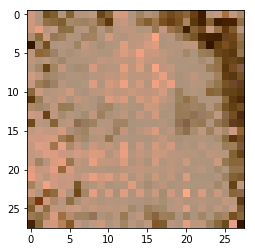

Epoch 1/1... Discriminator Loss: 0.0018... Generator Loss: 6.3237
Epoch 1/1... Discriminator Loss: 2.0450... Generator Loss: 0.1385
Epoch 1/1... Discriminator Loss: 38.8637... Generator Loss: 36.5345
Epoch 1/1... Discriminator Loss: 0.0005... Generator Loss: 7.7012
Epoch 1/1... Discriminator Loss: 0.0247... Generator Loss: 3.7135
Epoch 1/1... Discriminator Loss: 0.0479... Generator Loss: 3.0620
Epoch 1/1... Discriminator Loss: 0.2071... Generator Loss: 1.6762
Epoch 1/1... Discriminator Loss: 0.4352... Generator Loss: 1.0418
Epoch 1/1... Discriminator Loss: 0.6322... Generator Loss: 0.7581
Epoch 1/1... Discriminator Loss: 0.2236... Generator Loss: 1.6077
Epoch 1/1... Discriminator Loss: 0.0873... Generator Loss: 2.4818
Epoch 1/1... Discriminator Loss: 0.2474... Generator Loss: 1.5291
Epoch 1/1... Discriminator Loss: 0.4414... Generator Loss: 1.0305
Epoch 1/1... Discriminator Loss: 0.4895... Generator Loss: 0.9492
Epoch 1/1... Discriminator Loss: 0.4989... Generator Loss: 1.0270
Epoch 1/

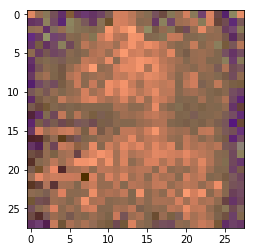

Epoch 1/1... Discriminator Loss: 0.0435... Generator Loss: 3.1568
Epoch 1/1... Discriminator Loss: 0.7046... Generator Loss: 3.5825
Epoch 1/1... Discriminator Loss: 0.4255... Generator Loss: 1.2675
Epoch 1/1... Discriminator Loss: 3.8636... Generator Loss: 0.0212


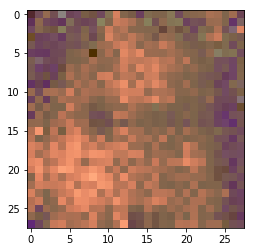

Epoch 1/1... Discriminator Loss: 1.1066... Generator Loss: 0.5590
Epoch 1/1... Discriminator Loss: 0.3127... Generator Loss: 1.8781
Epoch 1/1... Discriminator Loss: 0.1459... Generator Loss: 2.4192
Epoch 1/1... Discriminator Loss: 0.1156... Generator Loss: 2.3306
Epoch 1/1... Discriminator Loss: 0.1388... Generator Loss: 2.0863
Epoch 1/1... Discriminator Loss: 0.1220... Generator Loss: 2.1642
Epoch 1/1... Discriminator Loss: 0.1401... Generator Loss: 2.0361
Epoch 1/1... Discriminator Loss: 0.1524... Generator Loss: 1.9563
Epoch 1/1... Discriminator Loss: 0.1206... Generator Loss: 2.1883
Epoch 1/1... Discriminator Loss: 0.1078... Generator Loss: 2.2890
Epoch 1/1... Discriminator Loss: 0.1090... Generator Loss: 2.2705
Epoch 1/1... Discriminator Loss: 0.0805... Generator Loss: 2.5598
Epoch 1/1... Discriminator Loss: 0.0720... Generator Loss: 2.6671
Epoch 1/1... Discriminator Loss: 0.0700... Generator Loss: 2.6944
Epoch 1/1... Discriminator Loss: 0.0685... Generator Loss: 2.7155
Epoch 1/1.

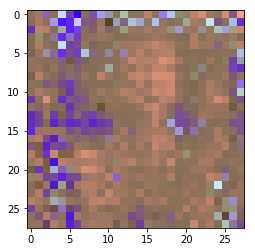

Epoch 1/1... Discriminator Loss: 4.8439... Generator Loss: 2.9868
Epoch 1/1... Discriminator Loss: 3.3051... Generator Loss: 3.3444
Epoch 1/1... Discriminator Loss: 0.6629... Generator Loss: 2.4630
Epoch 1/1... Discriminator Loss: 0.6895... Generator Loss: 1.2412
Epoch 1/1... Discriminator Loss: 0.8930... Generator Loss: 0.7225
Epoch 1/1... Discriminator Loss: 0.5568... Generator Loss: 0.9875
Epoch 1/1... Discriminator Loss: 0.3309... Generator Loss: 1.7038
Epoch 1/1... Discriminator Loss: 0.2585... Generator Loss: 2.0524
Epoch 1/1... Discriminator Loss: 0.2202... Generator Loss: 1.9956
Epoch 1/1... Discriminator Loss: 0.3041... Generator Loss: 1.5321
Epoch 1/1... Discriminator Loss: 0.2697... Generator Loss: 1.4659
Epoch 1/1... Discriminator Loss: 0.2586... Generator Loss: 1.5386
Epoch 1/1... Discriminator Loss: 0.1785... Generator Loss: 2.1758
Epoch 1/1... Discriminator Loss: 0.1535... Generator Loss: 2.4833
Epoch 1/1... Discriminator Loss: 0.0957... Generator Loss: 2.7178
Epoch 1/1.

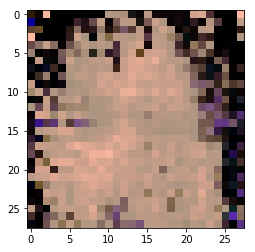

Epoch 1/1... Discriminator Loss: 1.4082... Generator Loss: 2.9021
Epoch 1/1... Discriminator Loss: 0.3769... Generator Loss: 1.2203
Epoch 1/1... Discriminator Loss: 0.6216... Generator Loss: 0.8100
Epoch 1/1... Discriminator Loss: 0.5843... Generator Loss: 0.8594
Epoch 1/1... Discriminator Loss: 0.3252... Generator Loss: 1.2966
Epoch 1/1... Discriminator Loss: 0.2287... Generator Loss: 1.6046
Epoch 1/1... Discriminator Loss: 0.2780... Generator Loss: 1.4853
Epoch 1/1... Discriminator Loss: 0.3550... Generator Loss: 1.3578
Epoch 1/1... Discriminator Loss: 0.3095... Generator Loss: 1.4307
Epoch 1/1... Discriminator Loss: 0.3688... Generator Loss: 1.3058
Epoch 1/1... Discriminator Loss: 0.2531... Generator Loss: 1.6311


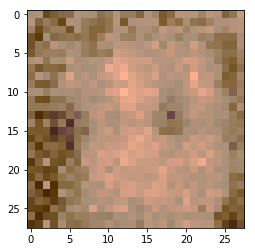

Epoch 1/1... Discriminator Loss: 0.1691... Generator Loss: 2.0036
Epoch 1/1... Discriminator Loss: 0.0970... Generator Loss: 2.4509
Epoch 1/1... Discriminator Loss: 0.0667... Generator Loss: 2.7651
Epoch 1/1... Discriminator Loss: 0.0693... Generator Loss: 2.9727
Epoch 1/1... Discriminator Loss: 0.0565... Generator Loss: 3.1247
Epoch 1/1... Discriminator Loss: 0.0441... Generator Loss: 3.1826
Epoch 1/1... Discriminator Loss: 0.0421... Generator Loss: 3.2029
Epoch 1/1... Discriminator Loss: 0.1104... Generator Loss: 2.3120
Epoch 1/1... Discriminator Loss: 0.1899... Generator Loss: 1.7562
Epoch 1/1... Discriminator Loss: 0.1524... Generator Loss: 1.9567
Epoch 1/1... Discriminator Loss: 0.1231... Generator Loss: 2.1558
Epoch 1/1... Discriminator Loss: 0.0787... Generator Loss: 2.5815
Epoch 1/1... Discriminator Loss: 0.0719... Generator Loss: 2.7197
Epoch 1/1... Discriminator Loss: 0.0872... Generator Loss: 2.5848
Epoch 1/1... Discriminator Loss: 0.0609... Generator Loss: 2.8295
Epoch 1/1.

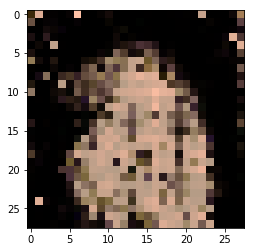

Epoch 1/1... Discriminator Loss: 8.1692... Generator Loss: 18.8748
Epoch 1/1... Discriminator Loss: 0.1088... Generator Loss: 10.3786
Epoch 1/1... Discriminator Loss: 0.9005... Generator Loss: 0.5215
Epoch 1/1... Discriminator Loss: 2.3117... Generator Loss: 0.1043
Epoch 1/1... Discriminator Loss: 0.9760... Generator Loss: 0.4916
Epoch 1/1... Discriminator Loss: 1.5116... Generator Loss: 0.2498
Epoch 1/1... Discriminator Loss: 0.8724... Generator Loss: 0.9748
Epoch 1/1... Discriminator Loss: 1.5886... Generator Loss: 0.2285
Epoch 1/1... Discriminator Loss: 3.2923... Generator Loss: 0.0380


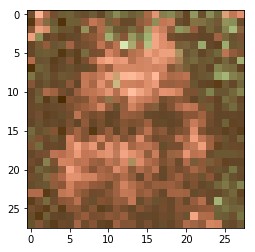

Epoch 1/1... Discriminator Loss: 1.1708... Generator Loss: 2.4012
Epoch 1/1... Discriminator Loss: 0.2820... Generator Loss: 1.9938
Epoch 1/1... Discriminator Loss: 0.0619... Generator Loss: 3.2738
Epoch 1/1... Discriminator Loss: 0.4079... Generator Loss: 1.1077
Epoch 1/1... Discriminator Loss: 0.5531... Generator Loss: 0.8561
Epoch 1/1... Discriminator Loss: 0.3258... Generator Loss: 1.3483
Epoch 1/1... Discriminator Loss: 0.2381... Generator Loss: 2.1893
Epoch 1/1... Discriminator Loss: 0.8307... Generator Loss: 0.5898
Epoch 1/1... Discriminator Loss: 2.9499... Generator Loss: 0.0538


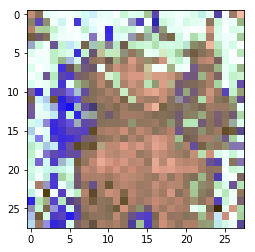

Epoch 1/1... Discriminator Loss: 0.0215... Generator Loss: 3.8515
Epoch 1/1... Discriminator Loss: 0.0926... Generator Loss: 2.4254
Epoch 1/1... Discriminator Loss: 7.9423... Generator Loss: 0.0004


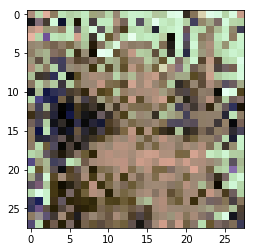

Epoch 1/1... Discriminator Loss: 8.5402... Generator Loss: 4.3508
Epoch 1/1... Discriminator Loss: 3.2918... Generator Loss: 0.0379


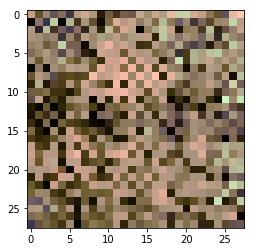

Epoch 1/1... Discriminator Loss: 0.1787... Generator Loss: 3.1832
Epoch 1/1... Discriminator Loss: 0.3972... Generator Loss: 1.1178
Epoch 1/1... Discriminator Loss: 4.9162... Generator Loss: 0.0074


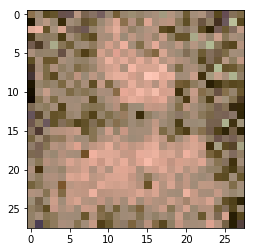

Epoch 1/1... Discriminator Loss: 2.2451... Generator Loss: 0.1120
Epoch 1/1... Discriminator Loss: 0.9369... Generator Loss: 0.4983
Epoch 1/1... Discriminator Loss: 1.9702... Generator Loss: 0.2461
Epoch 1/1... Discriminator Loss: 0.4088... Generator Loss: 1.4071
Epoch 1/1... Discriminator Loss: 0.3886... Generator Loss: 1.2014
Epoch 1/1... Discriminator Loss: 0.5718... Generator Loss: 0.8754
Epoch 1/1... Discriminator Loss: 0.5015... Generator Loss: 1.0360
Epoch 1/1... Discriminator Loss: 0.5509... Generator Loss: 0.9377
Epoch 1/1... Discriminator Loss: 0.5064... Generator Loss: 1.0536
Epoch 1/1... Discriminator Loss: 0.4398... Generator Loss: 1.2194
Epoch 1/1... Discriminator Loss: 0.4813... Generator Loss: 1.1513
Epoch 1/1... Discriminator Loss: 0.4693... Generator Loss: 1.1543
Epoch 1/1... Discriminator Loss: 0.8269... Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 0.4473... Generator Loss: 1.1487
Epoch 1/1... Discriminator Loss: 0.1858... Generator Loss: 1.8892
Epoch 1/1.

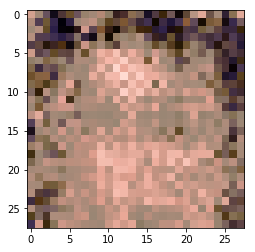

Epoch 1/1... Discriminator Loss: 0.2423... Generator Loss: 2.7802
Epoch 1/1... Discriminator Loss: 0.3538... Generator Loss: 2.2645
Epoch 1/1... Discriminator Loss: 0.2106... Generator Loss: 1.6740
Epoch 1/1... Discriminator Loss: 1.1705... Generator Loss: 0.4041
Epoch 1/1... Discriminator Loss: 0.6720... Generator Loss: 0.7233
Epoch 1/1... Discriminator Loss: 0.2331... Generator Loss: 1.5803
Epoch 1/1... Discriminator Loss: 0.3310... Generator Loss: 1.4988
Epoch 1/1... Discriminator Loss: 0.4157... Generator Loss: 1.1033
Epoch 1/1... Discriminator Loss: 0.5675... Generator Loss: 0.9301
Epoch 1/1... Discriminator Loss: 0.1083... Generator Loss: 2.3542
Epoch 1/1... Discriminator Loss: 2.2100... Generator Loss: 0.1199
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.6036
Epoch 1/1... Discriminator Loss: 7.4272... Generator Loss: 0.0006


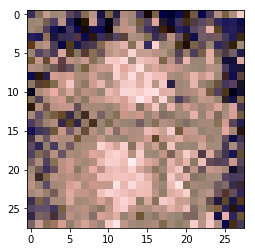

Epoch 1/1... Discriminator Loss: 2.8968... Generator Loss: 5.2782
Epoch 1/1... Discriminator Loss: 1.8126... Generator Loss: 4.0063
Epoch 1/1... Discriminator Loss: 1.1631... Generator Loss: 1.3894
Epoch 1/1... Discriminator Loss: 1.2965... Generator Loss: 0.4917
Epoch 1/1... Discriminator Loss: 1.5391... Generator Loss: 0.3954
Epoch 1/1... Discriminator Loss: 1.3173... Generator Loss: 0.6274
Epoch 1/1... Discriminator Loss: 0.5994... Generator Loss: 1.1989
Epoch 1/1... Discriminator Loss: 0.4070... Generator Loss: 1.6701
Epoch 1/1... Discriminator Loss: 0.6081... Generator Loss: 1.3965
Epoch 1/1... Discriminator Loss: 0.8079... Generator Loss: 1.0870
Epoch 1/1... Discriminator Loss: 0.9329... Generator Loss: 0.6090


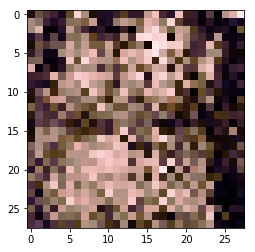

Epoch 1/1... Discriminator Loss: 0.3579... Generator Loss: 1.4776
Epoch 1/1... Discriminator Loss: 0.3395... Generator Loss: 1.5564
Epoch 1/1... Discriminator Loss: 0.6982... Generator Loss: 0.8599
Epoch 1/1... Discriminator Loss: 0.3623... Generator Loss: 1.3140
Epoch 1/1... Discriminator Loss: 0.3602... Generator Loss: 1.3870
Epoch 1/1... Discriminator Loss: 0.2906... Generator Loss: 1.4583
Epoch 1/1... Discriminator Loss: 0.2441... Generator Loss: 1.8711
Epoch 1/1... Discriminator Loss: 0.4373... Generator Loss: 1.0545
Epoch 1/1... Discriminator Loss: 0.3177... Generator Loss: 1.3776
Epoch 1/1... Discriminator Loss: 0.4271... Generator Loss: 1.0821
Epoch 1/1... Discriminator Loss: 0.5177... Generator Loss: 0.9975
Epoch 1/1... Discriminator Loss: 0.1257... Generator Loss: 2.9756
Epoch 1/1... Discriminator Loss: 0.1097... Generator Loss: 2.3400
Epoch 1/1... Discriminator Loss: 2.0529... Generator Loss: 0.1381
Epoch 1/1... Discriminator Loss: 0.4359... Generator Loss: 1.1494
Epoch 1/1.

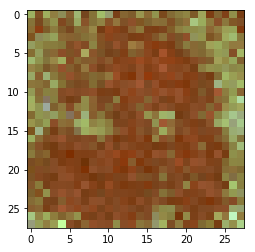

Epoch 1/1... Discriminator Loss: 12.7638... Generator Loss: 11.3625
Epoch 1/1... Discriminator Loss: 1.5015... Generator Loss: 4.0664
Epoch 1/1... Discriminator Loss: 0.6407... Generator Loss: 1.5887
Epoch 1/1... Discriminator Loss: 0.9649... Generator Loss: 0.5757
Epoch 1/1... Discriminator Loss: 1.2183... Generator Loss: 0.3743
Epoch 1/1... Discriminator Loss: 1.2827... Generator Loss: 0.4087
Epoch 1/1... Discriminator Loss: 0.9814... Generator Loss: 0.5199
Epoch 1/1... Discriminator Loss: 0.8631... Generator Loss: 0.6746
Epoch 1/1... Discriminator Loss: 0.9256... Generator Loss: 0.8090
Epoch 1/1... Discriminator Loss: 0.8049... Generator Loss: 0.9448
Epoch 1/1... Discriminator Loss: 0.6542... Generator Loss: 1.0385
Epoch 1/1... Discriminator Loss: 1.3083... Generator Loss: 0.8307
Epoch 1/1... Discriminator Loss: 0.8213... Generator Loss: 0.7722
Epoch 1/1... Discriminator Loss: 0.2855... Generator Loss: 1.4093
Epoch 1/1... Discriminator Loss: 0.1097... Generator Loss: 2.2676
Epoch 1/

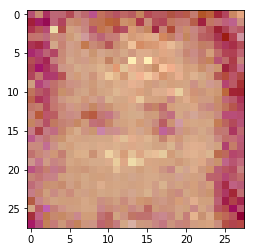

Epoch 1/1... Discriminator Loss: 0.0811... Generator Loss: 2.5526
Epoch 1/1... Discriminator Loss: 0.0653... Generator Loss: 2.7615
Epoch 1/1... Discriminator Loss: 0.0662... Generator Loss: 2.7923
Epoch 1/1... Discriminator Loss: 0.0674... Generator Loss: 2.7301
Epoch 1/1... Discriminator Loss: 0.0571... Generator Loss: 2.9401
Epoch 1/1... Discriminator Loss: 0.0523... Generator Loss: 2.9806
Epoch 1/1... Discriminator Loss: 0.0489... Generator Loss: 3.0420
Epoch 1/1... Discriminator Loss: 0.0498... Generator Loss: 3.0249
Epoch 1/1... Discriminator Loss: 0.0424... Generator Loss: 3.1810
Epoch 1/1... Discriminator Loss: 0.0357... Generator Loss: 3.3516
Epoch 1/1... Discriminator Loss: 0.0371... Generator Loss: 3.3132
Epoch 1/1... Discriminator Loss: 0.0373... Generator Loss: 3.3076
Epoch 1/1... Discriminator Loss: 0.0338... Generator Loss: 3.4044
Epoch 1/1... Discriminator Loss: 0.0356... Generator Loss: 3.3533
Epoch 1/1... Discriminator Loss: 0.0332... Generator Loss: 3.4213
Epoch 1/1.

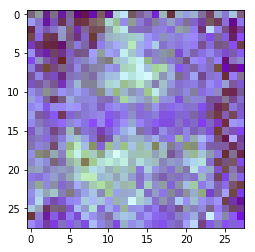

Epoch 1/1... Discriminator Loss: 0.5758... Generator Loss: 12.3501
Epoch 1/1... Discriminator Loss: 0.7686... Generator Loss: 0.6230
Epoch 1/1... Discriminator Loss: 1.9270... Generator Loss: 0.2811
Epoch 1/1... Discriminator Loss: 2.8748... Generator Loss: 0.0581


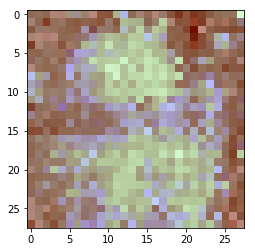

Epoch 1/1... Discriminator Loss: 0.2833... Generator Loss: 3.6344
Epoch 1/1... Discriminator Loss: 1.6072... Generator Loss: 0.2237
Epoch 1/1... Discriminator Loss: 1.2920... Generator Loss: 0.3405
Epoch 1/1... Discriminator Loss: 14.6333... Generator Loss: 8.3584
Epoch 1/1... Discriminator Loss: 8.9410... Generator Loss: 0.0001


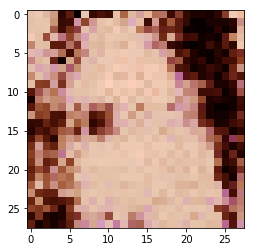

Epoch 1/1... Discriminator Loss: 6.4637... Generator Loss: 0.0016


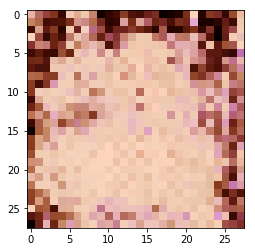

Epoch 1/1... Discriminator Loss: 5.3102... Generator Loss: 5.1110
Epoch 1/1... Discriminator Loss: 1.7369... Generator Loss: 0.1939
Epoch 1/1... Discriminator Loss: 0.4396... Generator Loss: 1.1185
Epoch 1/1... Discriminator Loss: 0.1669... Generator Loss: 3.0955
Epoch 1/1... Discriminator Loss: 10.6735... Generator Loss: 0.0000


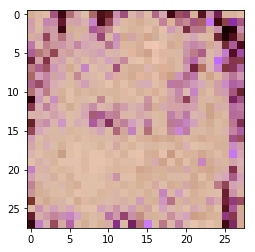

Epoch 1/1... Discriminator Loss: 3.2867... Generator Loss: 0.0381


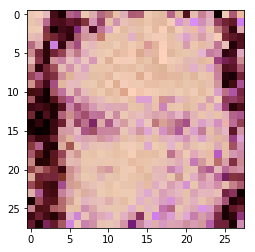

Epoch 1/1... Discriminator Loss: 0.0622... Generator Loss: 3.0692
Epoch 1/1... Discriminator Loss: 2.0484... Generator Loss: 2.1181
Epoch 1/1... Discriminator Loss: 0.4676... Generator Loss: 1.0681
Epoch 1/1... Discriminator Loss: 0.7182... Generator Loss: 0.7016
Epoch 1/1... Discriminator Loss: 1.9752... Generator Loss: 0.1501
Epoch 1/1... Discriminator Loss: 1.2146... Generator Loss: 0.5318
Epoch 1/1... Discriminator Loss: 1.6596... Generator Loss: 1.1655
Epoch 1/1... Discriminator Loss: 3.4021... Generator Loss: 0.0339


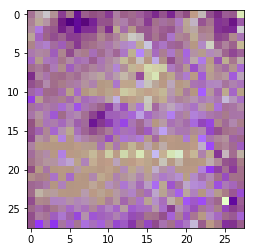

Epoch 1/1... Discriminator Loss: 2.8770... Generator Loss: 0.0584


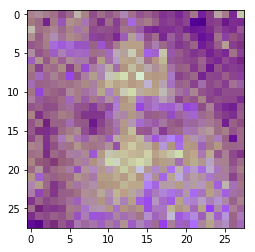

Epoch 1/1... Discriminator Loss: 1.7902... Generator Loss: 0.2695
Epoch 1/1... Discriminator Loss: 1.0133... Generator Loss: 0.5924
Epoch 1/1... Discriminator Loss: 0.5903... Generator Loss: 2.4691
Epoch 1/1... Discriminator Loss: 2.1045... Generator Loss: 0.1300
Epoch 1/1... Discriminator Loss: 0.8942... Generator Loss: 0.5258
Epoch 1/1... Discriminator Loss: 0.0105... Generator Loss: 4.5871
Epoch 1/1... Discriminator Loss: 0.1805... Generator Loss: 4.1319
Epoch 1/1... Discriminator Loss: 0.0790... Generator Loss: 3.0230
Epoch 1/1... Discriminator Loss: 8.7290... Generator Loss: 0.0002


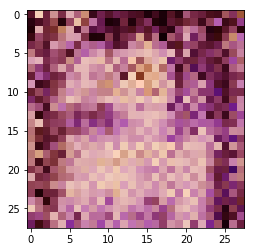

Epoch 1/1... Discriminator Loss: 6.4972... Generator Loss: 0.0015


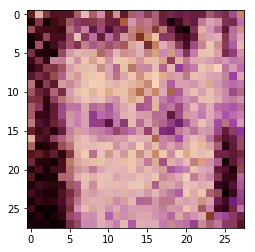

Epoch 1/1... Discriminator Loss: 1.8143... Generator Loss: 0.1779
Epoch 1/1... Discriminator Loss: 0.2870... Generator Loss: 1.5147
Epoch 1/1... Discriminator Loss: 1.4038... Generator Loss: 3.5017
Epoch 1/1... Discriminator Loss: 1.8625... Generator Loss: 0.1888
Epoch 1/1... Discriminator Loss: 0.5327... Generator Loss: 1.7948
Epoch 1/1... Discriminator Loss: 1.6712... Generator Loss: 0.2127
Epoch 1/1... Discriminator Loss: 11.8679... Generator Loss: 15.4994
Epoch 1/1... Discriminator Loss: 4.3266... Generator Loss: 5.8138
Epoch 1/1... Discriminator Loss: 1.0054... Generator Loss: 0.4625
Epoch 1/1... Discriminator Loss: 1.4569... Generator Loss: 0.2667
Epoch 1/1... Discriminator Loss: 0.5870... Generator Loss: 0.8973
Epoch 1/1... Discriminator Loss: 0.8778... Generator Loss: 2.4444
Epoch 1/1... Discriminator Loss: 0.5593... Generator Loss: 0.9435
Epoch 1/1... Discriminator Loss: 0.4893... Generator Loss: 1.0581
Epoch 1/1... Discriminator Loss: 1.7492... Generator Loss: 0.1929
Epoch 1/

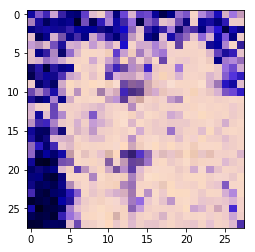

Epoch 1/1... Discriminator Loss: 0.0335... Generator Loss: 3.4127
Epoch 1/1... Discriminator Loss: 0.0617... Generator Loss: 2.8162
Epoch 1/1... Discriminator Loss: 0.1804... Generator Loss: 1.8220
Epoch 1/1... Discriminator Loss: 0.1139... Generator Loss: 2.2286
Epoch 1/1... Discriminator Loss: 0.8896... Generator Loss: 0.5293
Epoch 1/1... Discriminator Loss: 1.5849... Generator Loss: 0.2302
Epoch 1/1... Discriminator Loss: 4.7104... Generator Loss: 1.3534
Epoch 1/1... Discriminator Loss: 3.6778... Generator Loss: 0.0274


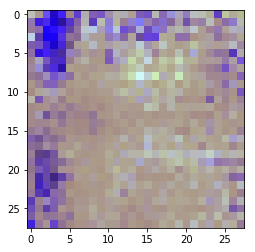

Epoch 1/1... Discriminator Loss: 1.7856... Generator Loss: 0.2017
Epoch 1/1... Discriminator Loss: 0.2774... Generator Loss: 1.5374
Epoch 1/1... Discriminator Loss: 0.2221... Generator Loss: 3.4821
Epoch 1/1... Discriminator Loss: 0.0395... Generator Loss: 4.1141
Epoch 1/1... Discriminator Loss: 0.5107... Generator Loss: 0.9209
Epoch 1/1... Discriminator Loss: 0.0547... Generator Loss: 2.9363
Epoch 1/1... Discriminator Loss: 0.0553... Generator Loss: 2.9225
Epoch 1/1... Discriminator Loss: 0.0493... Generator Loss: 3.0536
Epoch 1/1... Discriminator Loss: 0.0501... Generator Loss: 3.2490
Epoch 1/1... Discriminator Loss: 0.0435... Generator Loss: 3.1577
Epoch 1/1... Discriminator Loss: 0.0495... Generator Loss: 3.0514
Epoch 1/1... Discriminator Loss: 0.0822... Generator Loss: 2.7256
Epoch 1/1... Discriminator Loss: 0.0873... Generator Loss: 2.4849
Epoch 1/1... Discriminator Loss: 0.3312... Generator Loss: 1.2751
Epoch 1/1... Discriminator Loss: 0.7557... Generator Loss: 0.6343
Epoch 1/1.

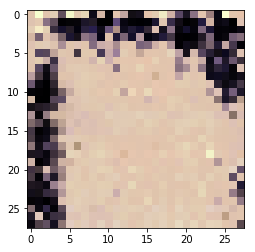

Epoch 1/1... Discriminator Loss: 2.3184... Generator Loss: 0.1039
Epoch 1/1... Discriminator Loss: 4.1461... Generator Loss: 0.0193


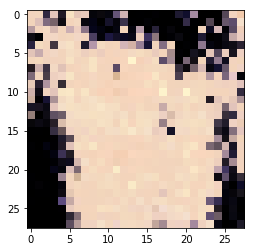

Epoch 1/1... Discriminator Loss: 3.5868... Generator Loss: 1.2942
Epoch 1/1... Discriminator Loss: 1.2216... Generator Loss: 1.0343
Epoch 1/1... Discriminator Loss: 1.4346... Generator Loss: 0.3392
Epoch 1/1... Discriminator Loss: 0.8894... Generator Loss: 0.5843
Epoch 1/1... Discriminator Loss: 1.0955... Generator Loss: 1.6822
Epoch 1/1... Discriminator Loss: 0.4728... Generator Loss: 1.9351
Epoch 1/1... Discriminator Loss: 1.1557... Generator Loss: 0.4096
Epoch 1/1... Discriminator Loss: 0.4741... Generator Loss: 1.0669
Epoch 1/1... Discriminator Loss: 0.3175... Generator Loss: 1.8282
Epoch 1/1... Discriminator Loss: 0.7284... Generator Loss: 0.8370
Epoch 1/1... Discriminator Loss: 0.5798... Generator Loss: 1.0744
Epoch 1/1... Discriminator Loss: 0.5946... Generator Loss: 1.2925
Epoch 1/1... Discriminator Loss: 0.4723... Generator Loss: 2.8313
Epoch 1/1... Discriminator Loss: 0.1209... Generator Loss: 4.0639
Epoch 1/1... Discriminator Loss: 1.0969... Generator Loss: 0.4209
Epoch 1/1.

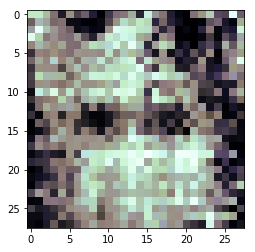

Epoch 1/1... Discriminator Loss: 0.9122... Generator Loss: 3.3588
Epoch 1/1... Discriminator Loss: 0.6009... Generator Loss: 3.6779
Epoch 1/1... Discriminator Loss: 0.5727... Generator Loss: 1.1452
Epoch 1/1... Discriminator Loss: 0.5413... Generator Loss: 0.9546
Epoch 1/1... Discriminator Loss: 0.3028... Generator Loss: 2.0093
Epoch 1/1... Discriminator Loss: 0.2966... Generator Loss: 1.8995
Epoch 1/1... Discriminator Loss: 1.6427... Generator Loss: 0.2439
Epoch 1/1... Discriminator Loss: 0.4815... Generator Loss: 2.0307
Epoch 1/1... Discriminator Loss: 1.2608... Generator Loss: 0.6004
Epoch 1/1... Discriminator Loss: 2.2101... Generator Loss: 0.1261
Epoch 1/1... Discriminator Loss: 1.2149... Generator Loss: 0.8577
Epoch 1/1... Discriminator Loss: 1.2006... Generator Loss: 0.4953
Epoch 1/1... Discriminator Loss: 0.5449... Generator Loss: 1.3871
Epoch 1/1... Discriminator Loss: 0.3726... Generator Loss: 1.5264
Epoch 1/1... Discriminator Loss: 0.2111... Generator Loss: 1.8734
Epoch 1/1.

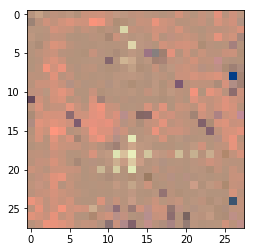

Epoch 1/1... Discriminator Loss: 0.0237... Generator Loss: 3.7550
Epoch 1/1... Discriminator Loss: 0.1863... Generator Loss: 1.7722
Epoch 1/1... Discriminator Loss: 4.3852... Generator Loss: 0.0126


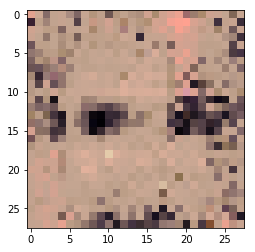

Epoch 1/1... Discriminator Loss: 0.7771... Generator Loss: 2.7908
Epoch 1/1... Discriminator Loss: 0.1701... Generator Loss: 1.8554
Epoch 1/1... Discriminator Loss: 0.4909... Generator Loss: 0.9469
Epoch 1/1... Discriminator Loss: 1.2919... Generator Loss: 0.3212
Epoch 1/1... Discriminator Loss: 0.4007... Generator Loss: 1.1086
Epoch 1/1... Discriminator Loss: 0.9764... Generator Loss: 2.1628
Epoch 1/1... Discriminator Loss: 4.7518... Generator Loss: 0.0087


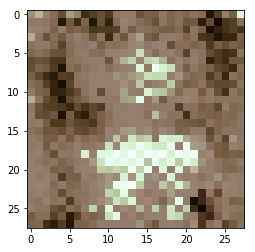

Epoch 1/1... Discriminator Loss: 3.1150... Generator Loss: 4.4479
Epoch 1/1... Discriminator Loss: 0.4582... Generator Loss: 2.2158
Epoch 1/1... Discriminator Loss: 0.6668... Generator Loss: 0.7987
Epoch 1/1... Discriminator Loss: 1.0024... Generator Loss: 0.5044
Epoch 1/1... Discriminator Loss: 0.7885... Generator Loss: 0.8808
Epoch 1/1... Discriminator Loss: 1.0567... Generator Loss: 0.8033
Epoch 1/1... Discriminator Loss: 0.9214... Generator Loss: 1.0036
Epoch 1/1... Discriminator Loss: 1.2010... Generator Loss: 0.6078
Epoch 1/1... Discriminator Loss: 1.6191... Generator Loss: 0.2906
Epoch 1/1... Discriminator Loss: 0.7755... Generator Loss: 2.7470
Epoch 1/1... Discriminator Loss: 0.6417... Generator Loss: 0.9783
Epoch 1/1... Discriminator Loss: 0.6015... Generator Loss: 0.8744
Epoch 1/1... Discriminator Loss: 0.2148... Generator Loss: 1.7956
Epoch 1/1... Discriminator Loss: 0.2314... Generator Loss: 1.9096
Epoch 1/1... Discriminator Loss: 0.2770... Generator Loss: 1.5299
Epoch 1/1.

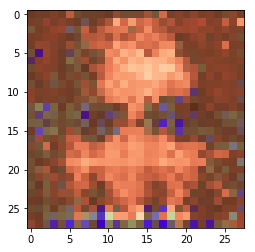

Epoch 1/1... Discriminator Loss: 0.0016... Generator Loss: 6.4458
Epoch 1/1... Discriminator Loss: 0.0023... Generator Loss: 6.2609
Epoch 1/1... Discriminator Loss: 0.0014... Generator Loss: 6.7916
Epoch 1/1... Discriminator Loss: 0.0015... Generator Loss: 6.5353
Epoch 1/1... Discriminator Loss: 0.0112... Generator Loss: 6.3133
Epoch 1/1... Discriminator Loss: 0.0026... Generator Loss: 6.0431
Epoch 1/1... Discriminator Loss: 0.0025... Generator Loss: 6.1116
Epoch 1/1... Discriminator Loss: 0.0036... Generator Loss: 6.0176
Epoch 1/1... Discriminator Loss: 0.0030... Generator Loss: 5.8685
Epoch 1/1... Discriminator Loss: 0.0022... Generator Loss: 6.1210
Epoch 1/1... Discriminator Loss: 0.0044... Generator Loss: 6.1237
Epoch 1/1... Discriminator Loss: 0.0028... Generator Loss: 6.0105
Epoch 1/1... Discriminator Loss: 0.0038... Generator Loss: 5.8195
Epoch 1/1... Discriminator Loss: 0.0025... Generator Loss: 6.0032
Epoch 1/1... Discriminator Loss: 0.0026... Generator Loss: 6.1303
Epoch 1/1.

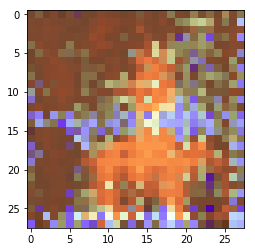

Epoch 1/1... Discriminator Loss: 13.2307... Generator Loss: 23.3591
Epoch 1/1... Discriminator Loss: 0.0185... Generator Loss: 12.3919
Epoch 1/1... Discriminator Loss: 0.0009... Generator Loss: 7.0354
Epoch 1/1... Discriminator Loss: 0.0060... Generator Loss: 5.1243
Epoch 1/1... Discriminator Loss: 0.0301... Generator Loss: 3.5172
Epoch 1/1... Discriminator Loss: 0.0429... Generator Loss: 3.1705
Epoch 1/1... Discriminator Loss: 0.6353... Generator Loss: 0.7545
Epoch 1/1... Discriminator Loss: 1.3198... Generator Loss: 0.3109
Epoch 1/1... Discriminator Loss: 6.5402... Generator Loss: 0.0015


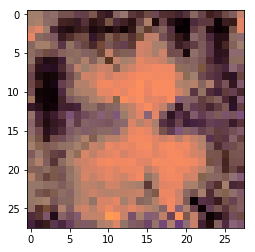

Epoch 1/1... Discriminator Loss: 8.9895... Generator Loss: 0.0056


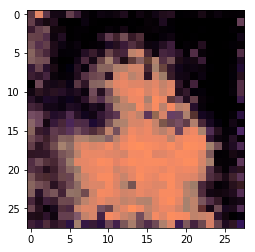

Epoch 1/1... Discriminator Loss: 0.3472... Generator Loss: 1.2276
Epoch 1/1... Discriminator Loss: 4.8761... Generator Loss: 1.3092
Epoch 1/1... Discriminator Loss: 0.8202... Generator Loss: 0.5804
Epoch 1/1... Discriminator Loss: 0.0005... Generator Loss: 7.5506
Epoch 1/1... Discriminator Loss: 0.0126... Generator Loss: 8.2455
Epoch 1/1... Discriminator Loss: 0.0018... Generator Loss: 6.5646
Epoch 1/1... Discriminator Loss: 0.4870... Generator Loss: 0.9531
Epoch 1/1... Discriminator Loss: 8.9256... Generator Loss: 0.0001


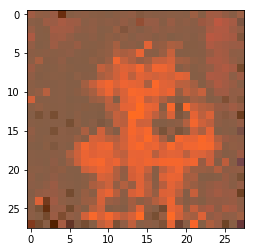

Epoch 1/1... Discriminator Loss: 6.3797... Generator Loss: 1.4419
Epoch 1/1... Discriminator Loss: 0.2147... Generator Loss: 1.9805
Epoch 1/1... Discriminator Loss: 0.2292... Generator Loss: 1.6480
Epoch 1/1... Discriminator Loss: 0.1215... Generator Loss: 2.2712
Epoch 1/1... Discriminator Loss: 1.2040... Generator Loss: 0.3568
Epoch 1/1... Discriminator Loss: 0.0596... Generator Loss: 2.8991
Epoch 1/1... Discriminator Loss: 0.0957... Generator Loss: 3.9766
Epoch 1/1... Discriminator Loss: 0.0435... Generator Loss: 4.6634
Epoch 1/1... Discriminator Loss: 0.0073... Generator Loss: 5.1273
Epoch 1/1... Discriminator Loss: 0.0230... Generator Loss: 4.4190
Epoch 1/1... Discriminator Loss: 0.0119... Generator Loss: 4.4495
Epoch 1/1... Discriminator Loss: 0.0196... Generator Loss: 4.1897
Epoch 1/1... Discriminator Loss: 0.0644... Generator Loss: 2.7761
Epoch 1/1... Discriminator Loss: 0.0502... Generator Loss: 3.0636
Epoch 1/1... Discriminator Loss: 0.0412... Generator Loss: 3.3237
Epoch 1/1.

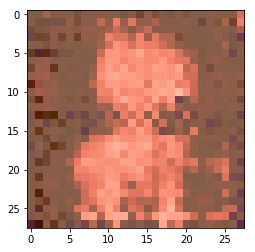

Epoch 1/1... Discriminator Loss: 1.1204... Generator Loss: 10.7936
Epoch 1/1... Discriminator Loss: 0.0028... Generator Loss: 5.9410
Epoch 1/1... Discriminator Loss: 0.2508... Generator Loss: 1.5113
Epoch 1/1... Discriminator Loss: 3.0421... Generator Loss: 0.0489


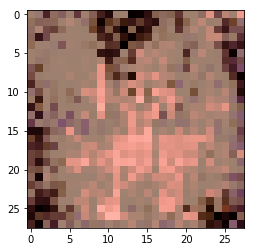

Epoch 1/1... Discriminator Loss: 2.9089... Generator Loss: 0.0561


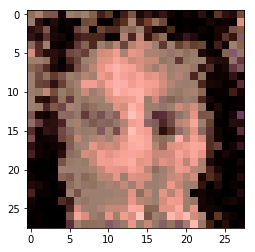

Epoch 1/1... Discriminator Loss: 0.4632... Generator Loss: 2.5474
Epoch 1/1... Discriminator Loss: 3.7190... Generator Loss: 0.0249


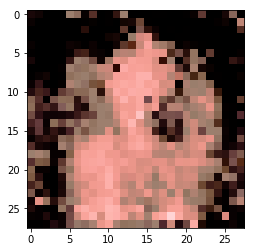

Epoch 1/1... Discriminator Loss: 0.4194... Generator Loss: 1.1192
Epoch 1/1... Discriminator Loss: 1.2181... Generator Loss: 0.3510
Epoch 1/1... Discriminator Loss: 0.6998... Generator Loss: 0.6973
Epoch 1/1... Discriminator Loss: 0.1736... Generator Loss: 2.0301
Epoch 1/1... Discriminator Loss: 4.1723... Generator Loss: 0.0155


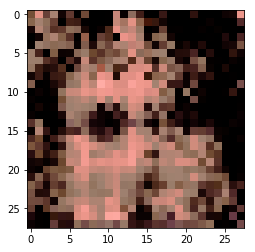

Epoch 1/1... Discriminator Loss: 0.5014... Generator Loss: 7.9451
Epoch 1/1... Discriminator Loss: 0.3263... Generator Loss: 7.6798
Epoch 1/1... Discriminator Loss: 0.0074... Generator Loss: 4.9376
Epoch 1/1... Discriminator Loss: 1.2081... Generator Loss: 0.3550
Epoch 1/1... Discriminator Loss: 2.7728... Generator Loss: 0.0645


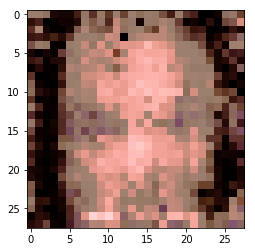

Epoch 1/1... Discriminator Loss: 4.6035... Generator Loss: 6.3515
Epoch 1/1... Discriminator Loss: 1.0520... Generator Loss: 0.4296
Epoch 1/1... Discriminator Loss: 0.7687... Generator Loss: 0.6233
Epoch 1/1... Discriminator Loss: 0.0654... Generator Loss: 3.1102


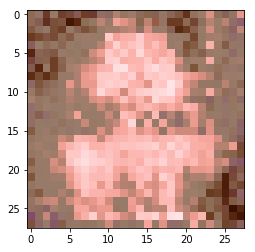

Epoch 1/1... Discriminator Loss: 0.0331... Generator Loss: 3.4271
Epoch 1/1... Discriminator Loss: 0.0033... Generator Loss: 5.7115
Epoch 1/1... Discriminator Loss: 0.0081... Generator Loss: 4.8246
Epoch 1/1... Discriminator Loss: 0.1533... Generator Loss: 1.9510
Epoch 1/1... Discriminator Loss: 0.2517... Generator Loss: 1.5027
Epoch 1/1... Discriminator Loss: 3.5681... Generator Loss: 0.0286


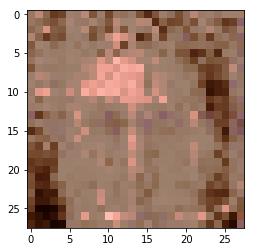

Epoch 1/1... Discriminator Loss: 0.0427... Generator Loss: 3.2677
Epoch 1/1... Discriminator Loss: 1.8416... Generator Loss: 0.1727
Epoch 1/1... Discriminator Loss: 8.1516... Generator Loss: 0.0003


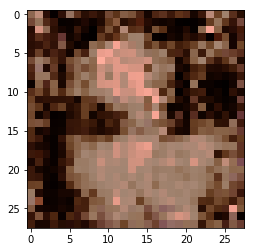

Epoch 1/1... Discriminator Loss: 6.1021... Generator Loss: 11.7725
Epoch 1/1... Discriminator Loss: 0.4510... Generator Loss: 1.1675
Epoch 1/1... Discriminator Loss: 3.2096... Generator Loss: 0.0414


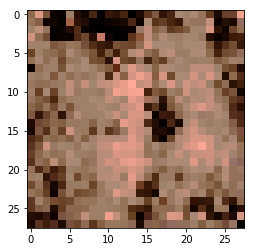

Epoch 1/1... Discriminator Loss: 2.3150... Generator Loss: 0.1058
Epoch 1/1... Discriminator Loss: 0.6080... Generator Loss: 1.0089
Epoch 1/1... Discriminator Loss: 0.5961... Generator Loss: 0.9372
Epoch 1/1... Discriminator Loss: 0.5190... Generator Loss: 1.0142
Epoch 1/1... Discriminator Loss: 0.2612... Generator Loss: 1.4812
Epoch 1/1... Discriminator Loss: 0.1684... Generator Loss: 1.9979
Epoch 1/1... Discriminator Loss: 0.1556... Generator Loss: 1.9994
Epoch 1/1... Discriminator Loss: 0.2112... Generator Loss: 1.6934
Epoch 1/1... Discriminator Loss: 0.1243... Generator Loss: 2.1464
Epoch 1/1... Discriminator Loss: 0.1570... Generator Loss: 2.0174
Epoch 1/1... Discriminator Loss: 0.1575... Generator Loss: 1.9263
Epoch 1/1... Discriminator Loss: 0.1677... Generator Loss: 2.0055
Epoch 1/1... Discriminator Loss: 0.0561... Generator Loss: 2.9515
Epoch 1/1... Discriminator Loss: 0.1214... Generator Loss: 2.1692
Epoch 1/1... Discriminator Loss: 0.2043... Generator Loss: 1.7157
Epoch 1/1.

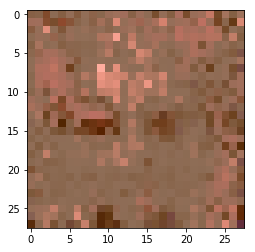

Epoch 1/1... Discriminator Loss: 0.7747... Generator Loss: 1.5635
Epoch 1/1... Discriminator Loss: 0.1993... Generator Loss: 2.8073
Epoch 1/1... Discriminator Loss: 0.0923... Generator Loss: 2.7180
Epoch 1/1... Discriminator Loss: 0.2314... Generator Loss: 1.6604
Epoch 1/1... Discriminator Loss: 0.2751... Generator Loss: 1.4305
Epoch 1/1... Discriminator Loss: 0.3596... Generator Loss: 1.9078
Epoch 1/1... Discriminator Loss: 0.6152... Generator Loss: 0.7810
Epoch 1/1... Discriminator Loss: 0.0823... Generator Loss: 2.6692
Epoch 1/1... Discriminator Loss: 0.1190... Generator Loss: 3.6473
Epoch 1/1... Discriminator Loss: 1.2701... Generator Loss: 0.3307
Epoch 1/1... Discriminator Loss: 0.0522... Generator Loss: 3.1813
Epoch 1/1... Discriminator Loss: 0.1110... Generator Loss: 2.8247
Epoch 1/1... Discriminator Loss: 0.3951... Generator Loss: 1.2153
Epoch 1/1... Discriminator Loss: 0.0378... Generator Loss: 3.2964
Epoch 1/1... Discriminator Loss: 0.1957... Generator Loss: 2.5856
Epoch 1/1.

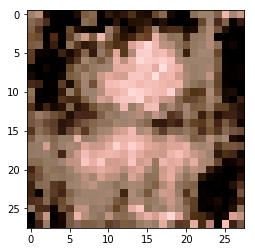

Epoch 1/1... Discriminator Loss: 0.1427... Generator Loss: 3.5970
Epoch 1/1... Discriminator Loss: 0.2330... Generator Loss: 1.5711
Epoch 1/1... Discriminator Loss: 0.2331... Generator Loss: 1.5708
Epoch 1/1... Discriminator Loss: 0.1698... Generator Loss: 1.8599
Epoch 1/1... Discriminator Loss: 0.0820... Generator Loss: 2.5416
Epoch 1/1... Discriminator Loss: 0.0847... Generator Loss: 2.5517
Epoch 1/1... Discriminator Loss: 1.3150... Generator Loss: 0.3126
Epoch 1/1... Discriminator Loss: 0.1597... Generator Loss: 1.9135
Epoch 1/1... Discriminator Loss: 0.1325... Generator Loss: 2.0868
Epoch 1/1... Discriminator Loss: 0.0994... Generator Loss: 2.3582
Epoch 1/1... Discriminator Loss: 0.0920... Generator Loss: 2.4315
Epoch 1/1... Discriminator Loss: 0.0205... Generator Loss: 3.8995
Epoch 1/1... Discriminator Loss: 0.0319... Generator Loss: 3.4603
Epoch 1/1... Discriminator Loss: 0.0394... Generator Loss: 3.2540
Epoch 1/1... Discriminator Loss: 0.0383... Generator Loss: 3.4244
Epoch 1/1.

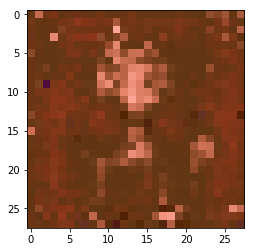

Epoch 1/1... Discriminator Loss: 4.0620... Generator Loss: 6.1039
Epoch 1/1... Discriminator Loss: 0.4663... Generator Loss: 6.3153
Epoch 1/1... Discriminator Loss: 0.0195... Generator Loss: 4.2144
Epoch 1/1... Discriminator Loss: 0.0654... Generator Loss: 2.7732
Epoch 1/1... Discriminator Loss: 0.3567... Generator Loss: 1.2102
Epoch 1/1... Discriminator Loss: 0.1142... Generator Loss: 2.2297
Epoch 1/1... Discriminator Loss: 0.0604... Generator Loss: 3.3487
Epoch 1/1... Discriminator Loss: 0.0994... Generator Loss: 2.7607
Epoch 1/1... Discriminator Loss: 0.0311... Generator Loss: 3.7947
Epoch 1/1... Discriminator Loss: 0.0269... Generator Loss: 3.6820
Epoch 1/1... Discriminator Loss: 0.0469... Generator Loss: 3.6057
Epoch 1/1... Discriminator Loss: 0.1092... Generator Loss: 2.3631
Epoch 1/1... Discriminator Loss: 0.0269... Generator Loss: 4.2957
Epoch 1/1... Discriminator Loss: 0.8310... Generator Loss: 0.5721
Epoch 1/1... Discriminator Loss: 0.3208... Generator Loss: 1.2933
Epoch 1/1.

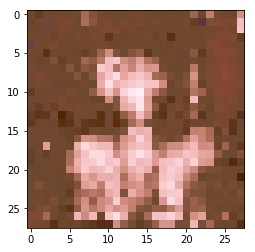

Epoch 1/1... Discriminator Loss: 0.0497... Generator Loss: 3.0343
Epoch 1/1... Discriminator Loss: 0.0108... Generator Loss: 4.7552
Epoch 1/1... Discriminator Loss: 0.0517... Generator Loss: 2.9890
Epoch 1/1... Discriminator Loss: 0.0226... Generator Loss: 3.8005
Epoch 1/1... Discriminator Loss: 0.0076... Generator Loss: 4.8806
Epoch 1/1... Discriminator Loss: 0.0497... Generator Loss: 3.0267
Epoch 1/1... Discriminator Loss: 0.1452... Generator Loss: 2.0015
Epoch 1/1... Discriminator Loss: 0.1288... Generator Loss: 2.1133
Epoch 1/1... Discriminator Loss: 0.1137... Generator Loss: 2.2488
Epoch 1/1... Discriminator Loss: 4.7730... Generator Loss: 0.0085


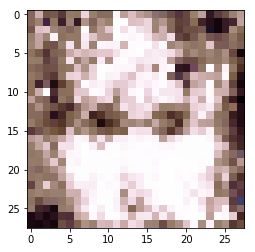

Epoch 1/1... Discriminator Loss: 3.8457... Generator Loss: 12.0898
Epoch 1/1... Discriminator Loss: 2.4159... Generator Loss: 0.1098
Epoch 1/1... Discriminator Loss: 24.0930... Generator Loss: 0.0000


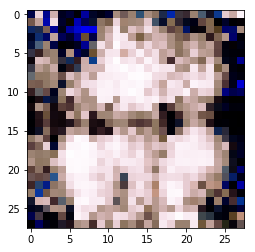

Epoch 1/1... Discriminator Loss: 30.9173... Generator Loss: 72.4104
Epoch 1/1... Discriminator Loss: 7.7147... Generator Loss: 37.9010
Epoch 1/1... Discriminator Loss: 0.0627... Generator Loss: 10.3349
Epoch 1/1... Discriminator Loss: 1.0083... Generator Loss: 0.4795
Epoch 1/1... Discriminator Loss: 0.7622... Generator Loss: 0.6286
Epoch 1/1... Discriminator Loss: 0.0450... Generator Loss: 3.1405
Epoch 1/1... Discriminator Loss: 0.0160... Generator Loss: 4.9429
Epoch 1/1... Discriminator Loss: 0.0083... Generator Loss: 4.8076
Epoch 1/1... Discriminator Loss: 0.0746... Generator Loss: 2.6507
Epoch 1/1... Discriminator Loss: 0.4765... Generator Loss: 0.9701
Epoch 1/1... Discriminator Loss: 0.1961... Generator Loss: 1.7272
Epoch 1/1... Discriminator Loss: 0.2897... Generator Loss: 1.3805
Epoch 1/1... Discriminator Loss: 0.0942... Generator Loss: 2.4090
Epoch 1/1... Discriminator Loss: 0.3434... Generator Loss: 1.2441
Epoch 1/1... Discriminator Loss: 0.3357... Generator Loss: 1.2547
Epoch 

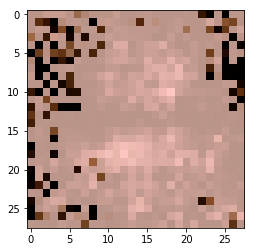

Epoch 1/1... Discriminator Loss: 9.4427... Generator Loss: 15.3692
Epoch 1/1... Discriminator Loss: 92.8495... Generator Loss: 0.0000


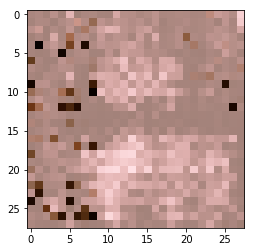

Epoch 1/1... Discriminator Loss: 7.6937... Generator Loss: 13.5267
Epoch 1/1... Discriminator Loss: 2.2180... Generator Loss: 0.1152
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 11.5450
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 8.9365
Epoch 1/1... Discriminator Loss: 0.0164... Generator Loss: 5.3116
Epoch 1/1... Discriminator Loss: 0.1732... Generator Loss: 1.8406
Epoch 1/1... Discriminator Loss: 11.8901... Generator Loss: 0.0000


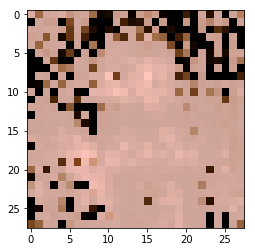

Epoch 1/1... Discriminator Loss: 17.3758... Generator Loss: 2.7659
Epoch 1/1... Discriminator Loss: 4.7982... Generator Loss: 0.0083


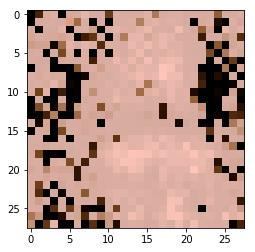

Epoch 1/1... Discriminator Loss: 5.8094... Generator Loss: 0.0030


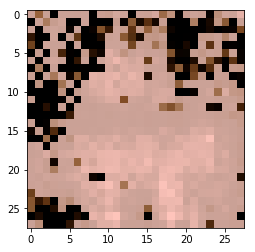

Epoch 1/1... Discriminator Loss: 2.8737... Generator Loss: 0.0586


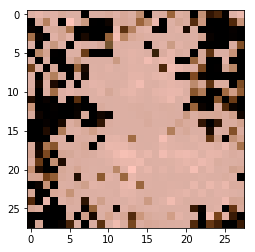

Epoch 1/1... Discriminator Loss: 3.1501... Generator Loss: 0.5567
Epoch 1/1... Discriminator Loss: 3.2143... Generator Loss: 0.0410


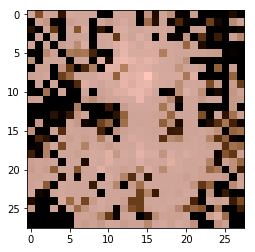

Epoch 1/1... Discriminator Loss: 1.1767... Generator Loss: 0.3951
Epoch 1/1... Discriminator Loss: 1.9716... Generator Loss: 2.6349
Epoch 1/1... Discriminator Loss: 2.2718... Generator Loss: 0.1088


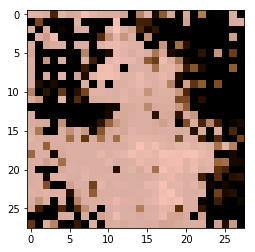

Epoch 1/1... Discriminator Loss: 1.4636... Generator Loss: 0.2651
Epoch 1/1... Discriminator Loss: 0.4202... Generator Loss: 4.4673
Epoch 1/1... Discriminator Loss: 0.0495... Generator Loss: 3.1411
Epoch 1/1... Discriminator Loss: 0.2388... Generator Loss: 1.5634
Epoch 1/1... Discriminator Loss: 0.4264... Generator Loss: 1.0682
Epoch 1/1... Discriminator Loss: 0.2458... Generator Loss: 1.5242
Epoch 1/1... Discriminator Loss: 0.2024... Generator Loss: 1.7342
Epoch 1/1... Discriminator Loss: 0.2857... Generator Loss: 1.4215
Epoch 1/1... Discriminator Loss: 0.1404... Generator Loss: 2.1298
Epoch 1/1... Discriminator Loss: 2.8446... Generator Loss: 0.0599


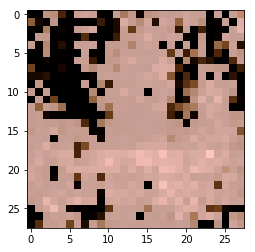

Epoch 1/1... Discriminator Loss: 0.0099... Generator Loss: 4.7909
Epoch 1/1... Discriminator Loss: 1.0559... Generator Loss: 2.8935
Epoch 1/1... Discriminator Loss: 5.4899... Generator Loss: 0.0041


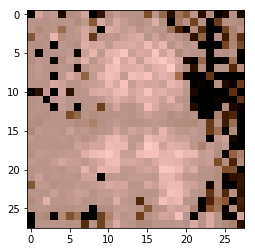

Epoch 1/1... Discriminator Loss: 3.1817... Generator Loss: 0.0424


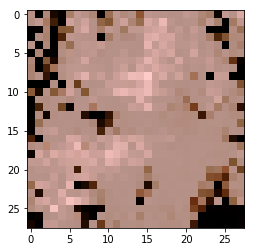

Epoch 1/1... Discriminator Loss: 0.2067... Generator Loss: 2.1460
Epoch 1/1... Discriminator Loss: 5.2289... Generator Loss: 0.0054


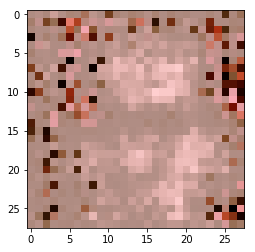

Epoch 1/1... Discriminator Loss: 2.4037... Generator Loss: 0.2224
Epoch 1/1... Discriminator Loss: 2.3818... Generator Loss: 6.2875
Epoch 1/1... Discriminator Loss: 0.8830... Generator Loss: 0.5342
Epoch 1/1... Discriminator Loss: 1.5311... Generator Loss: 0.2476
Epoch 1/1... Discriminator Loss: 1.0614... Generator Loss: 0.4486
Epoch 1/1... Discriminator Loss: 0.4948... Generator Loss: 0.9856
Epoch 1/1... Discriminator Loss: 0.9350... Generator Loss: 0.5887
Epoch 1/1... Discriminator Loss: 0.1315... Generator Loss: 2.2127
Epoch 1/1... Discriminator Loss: 1.3538... Generator Loss: 0.3000
Epoch 1/1... Discriminator Loss: 1.4718... Generator Loss: 0.2616
Epoch 1/1... Discriminator Loss: 1.7442... Generator Loss: 0.1947
Epoch 1/1... Discriminator Loss: 3.0988... Generator Loss: 2.5947
Epoch 1/1... Discriminator Loss: 0.9733... Generator Loss: 0.4930
Epoch 1/1... Discriminator Loss: 1.2123... Generator Loss: 0.3532
Epoch 1/1... Discriminator Loss: 3.6835... Generator Loss: 0.0285


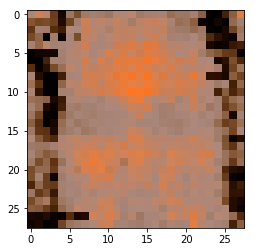

Epoch 1/1... Discriminator Loss: 0.7915... Generator Loss: 1.5046
Epoch 1/1... Discriminator Loss: 0.6694... Generator Loss: 1.0283
Epoch 1/1... Discriminator Loss: 0.4763... Generator Loss: 0.9802
Epoch 1/1... Discriminator Loss: 1.8490... Generator Loss: 0.1760
Epoch 1/1... Discriminator Loss: 0.9452... Generator Loss: 0.4924
Epoch 1/1... Discriminator Loss: 0.3334... Generator Loss: 1.4376
Epoch 1/1... Discriminator Loss: 0.1772... Generator Loss: 1.9524
Epoch 1/1... Discriminator Loss: 0.1158... Generator Loss: 2.3967
Epoch 1/1... Discriminator Loss: 0.1335... Generator Loss: 2.1034
Epoch 1/1... Discriminator Loss: 0.0999... Generator Loss: 2.4057
Epoch 1/1... Discriminator Loss: 0.1590... Generator Loss: 1.9559
Epoch 1/1... Discriminator Loss: 0.2706... Generator Loss: 1.4417
Epoch 1/1... Discriminator Loss: 0.0932... Generator Loss: 2.4208
Epoch 1/1... Discriminator Loss: 0.2019... Generator Loss: 1.7028
Epoch 1/1... Discriminator Loss: 0.1171... Generator Loss: 2.2084
Epoch 1/1.

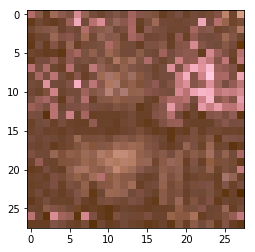

Epoch 1/1... Discriminator Loss: 3.2710... Generator Loss: 10.4237
Epoch 1/1... Discriminator Loss: 0.1208... Generator Loss: 2.1775
Epoch 1/1... Discriminator Loss: 1.1123... Generator Loss: 0.3987
Epoch 1/1... Discriminator Loss: 0.4168... Generator Loss: 1.0764
Epoch 1/1... Discriminator Loss: 0.2102... Generator Loss: 1.6630
Epoch 1/1... Discriminator Loss: 0.5724... Generator Loss: 0.8305
Epoch 1/1... Discriminator Loss: 0.6770... Generator Loss: 0.7097
Epoch 1/1... Discriminator Loss: 0.9369... Generator Loss: 0.4998
Epoch 1/1... Discriminator Loss: 1.0422... Generator Loss: 0.5080
Epoch 1/1... Discriminator Loss: 1.4606... Generator Loss: 0.6942
Epoch 1/1... Discriminator Loss: 2.5518... Generator Loss: 0.1341
Epoch 1/1... Discriminator Loss: 4.2176... Generator Loss: 5.3986
Epoch 1/1... Discriminator Loss: 0.8745... Generator Loss: 0.5907
Epoch 1/1... Discriminator Loss: 4.7589... Generator Loss: 0.0088


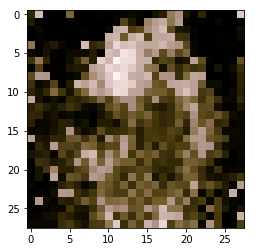

Epoch 1/1... Discriminator Loss: 1.3457... Generator Loss: 0.3476
Epoch 1/1... Discriminator Loss: 0.7762... Generator Loss: 2.8479
Epoch 1/1... Discriminator Loss: 0.8675... Generator Loss: 0.6951
Epoch 1/1... Discriminator Loss: 1.8164... Generator Loss: 0.1839
Epoch 1/1... Discriminator Loss: 0.7821... Generator Loss: 0.6126
Epoch 1/1... Discriminator Loss: 0.4033... Generator Loss: 1.1640
Epoch 1/1... Discriminator Loss: 0.6016... Generator Loss: 0.8530
Epoch 1/1... Discriminator Loss: 1.7836... Generator Loss: 0.2190
Epoch 1/1... Discriminator Loss: 1.4852... Generator Loss: 0.3129
Epoch 1/1... Discriminator Loss: 1.6361... Generator Loss: 0.6180
Epoch 1/1... Discriminator Loss: 1.5666... Generator Loss: 0.2463
Epoch 1/1... Discriminator Loss: 0.3254... Generator Loss: 1.7086
Epoch 1/1... Discriminator Loss: 0.1704... Generator Loss: 2.3407
Epoch 1/1... Discriminator Loss: 0.2634... Generator Loss: 1.6384
Epoch 1/1... Discriminator Loss: 0.1589... Generator Loss: 1.9923
Epoch 1/1.

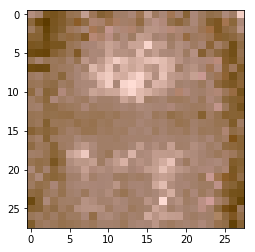

Epoch 1/1... Discriminator Loss: 0.3296... Generator Loss: 1.4365
Epoch 1/1... Discriminator Loss: 0.3605... Generator Loss: 1.4156
Epoch 1/1... Discriminator Loss: 0.1701... Generator Loss: 2.3389
Epoch 1/1... Discriminator Loss: 0.2518... Generator Loss: 1.6033
Epoch 1/1... Discriminator Loss: 0.3309... Generator Loss: 1.3658
Epoch 1/1... Discriminator Loss: 0.3580... Generator Loss: 1.2241
Epoch 1/1... Discriminator Loss: 0.3266... Generator Loss: 1.4345
Epoch 1/1... Discriminator Loss: 0.2176... Generator Loss: 1.7242
Epoch 1/1... Discriminator Loss: 0.1995... Generator Loss: 1.7846
Epoch 1/1... Discriminator Loss: 0.2245... Generator Loss: 1.6046
Epoch 1/1... Discriminator Loss: 0.1919... Generator Loss: 1.7494
Epoch 1/1... Discriminator Loss: 0.1277... Generator Loss: 2.1391
Epoch 1/1... Discriminator Loss: 0.1041... Generator Loss: 2.3143
Epoch 1/1... Discriminator Loss: 0.0691... Generator Loss: 2.7858
Epoch 1/1... Discriminator Loss: 0.0913... Generator Loss: 2.4454
Epoch 1/1.

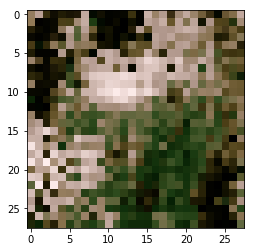

Epoch 1/1... Discriminator Loss: 16.0403... Generator Loss: 15.9880
Epoch 1/1... Discriminator Loss: 0.0889... Generator Loss: 2.4764
Epoch 1/1... Discriminator Loss: 0.3467... Generator Loss: 1.2281
Epoch 1/1... Discriminator Loss: 0.9248... Generator Loss: 0.5065
Epoch 1/1... Discriminator Loss: 1.6056... Generator Loss: 0.2241
Epoch 1/1... Discriminator Loss: 0.2778... Generator Loss: 1.4173
Epoch 1/1... Discriminator Loss: 0.2933... Generator Loss: 1.3697
Epoch 1/1... Discriminator Loss: 0.2378... Generator Loss: 1.5532
Epoch 1/1... Discriminator Loss: 0.0775... Generator Loss: 2.8125
Epoch 1/1... Discriminator Loss: 0.4741... Generator Loss: 0.9800
Epoch 1/1... Discriminator Loss: 0.4439... Generator Loss: 1.0415
Epoch 1/1... Discriminator Loss: 0.1654... Generator Loss: 1.9343
Epoch 1/1... Discriminator Loss: 0.0838... Generator Loss: 2.7082
Epoch 1/1... Discriminator Loss: 0.0569... Generator Loss: 3.1291
Epoch 1/1... Discriminator Loss: 0.3218... Generator Loss: 1.2918
Epoch 1/

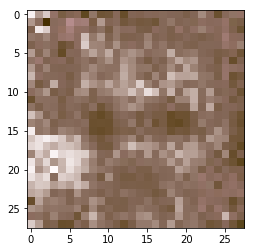

Epoch 1/1... Discriminator Loss: 0.0050... Generator Loss: 11.5481
Epoch 1/1... Discriminator Loss: 0.0185... Generator Loss: 5.3907
Epoch 1/1... Discriminator Loss: 0.9525... Generator Loss: 0.4874
Epoch 1/1... Discriminator Loss: 0.0914... Generator Loss: 2.7229
Epoch 1/1... Discriminator Loss: 0.0990... Generator Loss: 2.4970
Epoch 1/1... Discriminator Loss: 0.1310... Generator Loss: 2.1978
Epoch 1/1... Discriminator Loss: 0.2032... Generator Loss: 1.7008
Epoch 1/1... Discriminator Loss: 0.1237... Generator Loss: 2.1507
Epoch 1/1... Discriminator Loss: 0.2341... Generator Loss: 1.5872
Epoch 1/1... Discriminator Loss: 0.0724... Generator Loss: 2.6622
Epoch 1/1... Discriminator Loss: 0.1293... Generator Loss: 2.1097
Epoch 1/1... Discriminator Loss: 0.3070... Generator Loss: 1.3309
Epoch 1/1... Discriminator Loss: 0.1612... Generator Loss: 1.9215
Epoch 1/1... Discriminator Loss: 0.5645... Generator Loss: 0.8408
Epoch 1/1... Discriminator Loss: 25.9917... Generator Loss: 0.0000


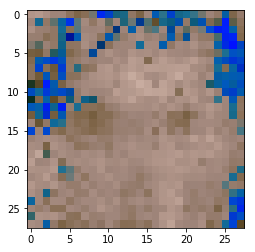

Epoch 1/1... Discriminator Loss: 0.1364... Generator Loss: 7.7222
Epoch 1/1... Discriminator Loss: 0.0271... Generator Loss: 6.9214
Epoch 1/1... Discriminator Loss: 0.0231... Generator Loss: 3.9904
Epoch 1/1... Discriminator Loss: 0.0672... Generator Loss: 2.7351
Epoch 1/1... Discriminator Loss: 0.0844... Generator Loss: 2.5147
Epoch 1/1... Discriminator Loss: 0.1689... Generator Loss: 1.8623
Epoch 1/1... Discriminator Loss: 0.1387... Generator Loss: 2.0444


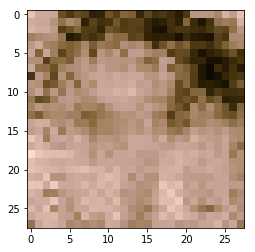

Epoch 1/1... Discriminator Loss: 0.0869... Generator Loss: 2.5352
Epoch 1/1... Discriminator Loss: 0.0853... Generator Loss: 2.5039
Epoch 1/1... Discriminator Loss: 0.1074... Generator Loss: 2.2846
Epoch 1/1... Discriminator Loss: 0.0663... Generator Loss: 2.7541
Epoch 1/1... Discriminator Loss: 0.0825... Generator Loss: 2.5357
Epoch 1/1... Discriminator Loss: 0.0686... Generator Loss: 2.7142
Epoch 1/1... Discriminator Loss: 0.1955... Generator Loss: 1.7302
Epoch 1/1... Discriminator Loss: 0.1662... Generator Loss: 1.8766
Epoch 1/1... Discriminator Loss: 0.1827... Generator Loss: 1.8010
Epoch 1/1... Discriminator Loss: 0.1883... Generator Loss: 1.7622
Epoch 1/1... Discriminator Loss: 0.2204... Generator Loss: 1.6203
Epoch 1/1... Discriminator Loss: 0.0678... Generator Loss: 2.7317
Epoch 1/1... Discriminator Loss: 0.0599... Generator Loss: 3.0040
Epoch 1/1... Discriminator Loss: 0.1298... Generator Loss: 2.1115
Epoch 1/1... Discriminator Loss: 0.1020... Generator Loss: 2.3330
Epoch 1/1.

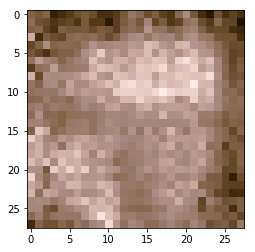

Epoch 1/1... Discriminator Loss: 2.8852... Generator Loss: 4.2695
Epoch 1/1... Discriminator Loss: 0.0478... Generator Loss: 3.5957
Epoch 1/1... Discriminator Loss: 0.1693... Generator Loss: 1.9139
Epoch 1/1... Discriminator Loss: 0.6755... Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 0.7356... Generator Loss: 0.6719
Epoch 1/1... Discriminator Loss: 0.1784... Generator Loss: 2.3159
Epoch 1/1... Discriminator Loss: 0.1170... Generator Loss: 2.9839
Epoch 1/1... Discriminator Loss: 0.1890... Generator Loss: 1.7653
Epoch 1/1... Discriminator Loss: 0.5938... Generator Loss: 0.8058
Epoch 1/1... Discriminator Loss: 0.6687... Generator Loss: 0.7183
Epoch 1/1... Discriminator Loss: 0.1964... Generator Loss: 2.6658
Epoch 1/1... Discriminator Loss: 0.1121... Generator Loss: 2.6578
Epoch 1/1... Discriminator Loss: 0.2782... Generator Loss: 1.4190
Epoch 1/1... Discriminator Loss: 0.8910... Generator Loss: 0.5281
Epoch 1/1... Discriminator Loss: 0.2007... Generator Loss: 1.7560
Epoch 1/1.

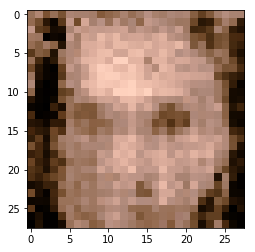

Epoch 1/1... Discriminator Loss: 0.0399... Generator Loss: 3.4972
Epoch 1/1... Discriminator Loss: 0.0429... Generator Loss: 4.7894
Epoch 1/1... Discriminator Loss: 0.0517... Generator Loss: 4.4277
Epoch 1/1... Discriminator Loss: 0.1250... Generator Loss: 2.2012
Epoch 1/1... Discriminator Loss: 0.2910... Generator Loss: 1.4243
Epoch 1/1... Discriminator Loss: 0.5104... Generator Loss: 0.9375
Epoch 1/1... Discriminator Loss: 0.5739... Generator Loss: 0.8369
Epoch 1/1... Discriminator Loss: 0.2568... Generator Loss: 1.6391
Epoch 1/1... Discriminator Loss: 0.1688... Generator Loss: 1.8640
Epoch 1/1... Discriminator Loss: 0.3282... Generator Loss: 1.2740
Epoch 1/1... Discriminator Loss: 0.0720... Generator Loss: 2.6674
Epoch 1/1... Discriminator Loss: 0.0804... Generator Loss: 2.5645
Epoch 1/1... Discriminator Loss: 0.0318... Generator Loss: 4.7130
Epoch 1/1... Discriminator Loss: 0.2406... Generator Loss: 1.5824
Epoch 1/1... Discriminator Loss: 0.4443... Generator Loss: 1.0260
Epoch 1/1.

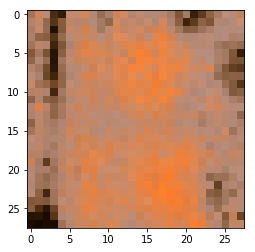

Epoch 1/1... Discriminator Loss: 0.9425... Generator Loss: 6.7250
Epoch 1/1... Discriminator Loss: 1.5314... Generator Loss: 2.1464
Epoch 1/1... Discriminator Loss: 1.1544... Generator Loss: 0.4006
Epoch 1/1... Discriminator Loss: 1.6052... Generator Loss: 0.2804
Epoch 1/1... Discriminator Loss: 0.4034... Generator Loss: 1.5158
Epoch 1/1... Discriminator Loss: 0.0209... Generator Loss: 3.9517
Epoch 1/1... Discriminator Loss: 0.0636... Generator Loss: 3.9794
Epoch 1/1... Discriminator Loss: 0.0459... Generator Loss: 3.4778
Epoch 1/1... Discriminator Loss: 0.1741... Generator Loss: 2.1283
Epoch 1/1... Discriminator Loss: 0.1038... Generator Loss: 2.3520
Epoch 1/1... Discriminator Loss: 0.0614... Generator Loss: 2.8210
Epoch 1/1... Discriminator Loss: 0.0499... Generator Loss: 3.0234
Epoch 1/1... Discriminator Loss: 0.2107... Generator Loss: 2.0470
Epoch 1/1... Discriminator Loss: 0.3933... Generator Loss: 1.2821
Epoch 1/1... Discriminator Loss: 0.1858... Generator Loss: 1.7744
Epoch 1/1.

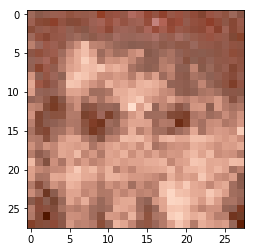

Epoch 1/1... Discriminator Loss: 0.4277... Generator Loss: 7.7342
Epoch 1/1... Discriminator Loss: 3.1440... Generator Loss: 4.3987
Epoch 1/1... Discriminator Loss: 1.1935... Generator Loss: 0.8997
Epoch 1/1... Discriminator Loss: 0.3202... Generator Loss: 1.3468
Epoch 1/1... Discriminator Loss: 0.4939... Generator Loss: 0.9425
Epoch 1/1... Discriminator Loss: 0.5969... Generator Loss: 0.8334
Epoch 1/1... Discriminator Loss: 0.4122... Generator Loss: 1.1695
Epoch 1/1... Discriminator Loss: 0.6354... Generator Loss: 0.9338
Epoch 1/1... Discriminator Loss: 1.4239... Generator Loss: 1.0316
Epoch 1/1... Discriminator Loss: 0.4309... Generator Loss: 1.0541
Epoch 1/1... Discriminator Loss: 0.3142... Generator Loss: 1.3109
Epoch 1/1... Discriminator Loss: 0.2345... Generator Loss: 1.6979
Epoch 1/1... Discriminator Loss: 0.2582... Generator Loss: 1.4819
Epoch 1/1... Discriminator Loss: 0.2262... Generator Loss: 1.7795
Epoch 1/1... Discriminator Loss: 0.7562... Generator Loss: 0.7085
Epoch 1/1.

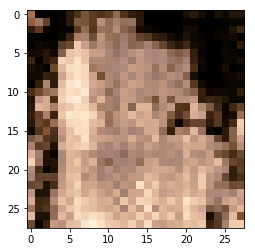

Epoch 1/1... Discriminator Loss: 0.3223... Generator Loss: 2.3529
Epoch 1/1... Discriminator Loss: 2.0727... Generator Loss: 0.1435
Epoch 1/1... Discriminator Loss: 0.7890... Generator Loss: 0.6160
Epoch 1/1... Discriminator Loss: 1.1533... Generator Loss: 0.4221
Epoch 1/1... Discriminator Loss: 1.9610... Generator Loss: 0.1576
Epoch 1/1... Discriminator Loss: 5.0861... Generator Loss: 0.0062


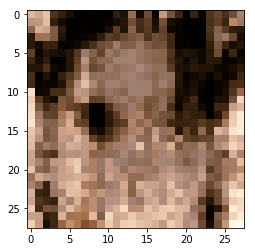

Epoch 1/1... Discriminator Loss: 0.0798... Generator Loss: 2.6752
Epoch 1/1... Discriminator Loss: 1.3105... Generator Loss: 0.3145
Epoch 1/1... Discriminator Loss: 0.6368... Generator Loss: 0.7536
Epoch 1/1... Discriminator Loss: 21.0156... Generator Loss: 0.0000


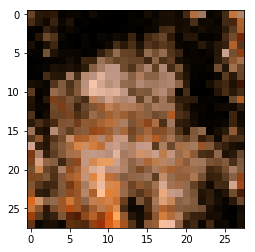

Epoch 1/1... Discriminator Loss: 7.9911... Generator Loss: 13.0529
Epoch 1/1... Discriminator Loss: 3.3027... Generator Loss: 0.0375


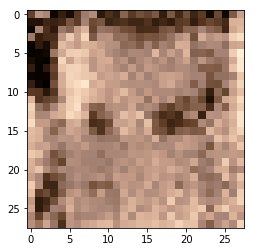

Epoch 1/1... Discriminator Loss: 1.9596... Generator Loss: 0.2051
Epoch 1/1... Discriminator Loss: 0.4559... Generator Loss: 1.8006
Epoch 1/1... Discriminator Loss: 3.3237... Generator Loss: 0.0367


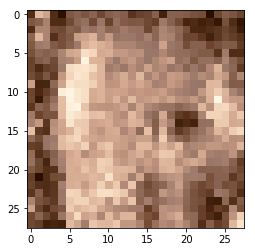

Epoch 1/1... Discriminator Loss: 1.8322... Generator Loss: 0.2028
Epoch 1/1... Discriminator Loss: 0.6043... Generator Loss: 1.0059
Epoch 1/1... Discriminator Loss: 0.8803... Generator Loss: 0.9791
Epoch 1/1... Discriminator Loss: 0.0700... Generator Loss: 3.0587
Epoch 1/1... Discriminator Loss: 0.7621... Generator Loss: 0.7902
Epoch 1/1... Discriminator Loss: 1.4439... Generator Loss: 0.2747
Epoch 1/1... Discriminator Loss: 0.5701... Generator Loss: 1.0322
Epoch 1/1... Discriminator Loss: 0.2664... Generator Loss: 1.8559
Epoch 1/1... Discriminator Loss: 0.0396... Generator Loss: 4.0147
Epoch 1/1... Discriminator Loss: 1.1478... Generator Loss: 0.3850
Epoch 1/1... Discriminator Loss: 1.0343... Generator Loss: 0.4459
Epoch 1/1... Discriminator Loss: 0.7709... Generator Loss: 0.6398
Epoch 1/1... Discriminator Loss: 0.4744... Generator Loss: 1.0740
Epoch 1/1... Discriminator Loss: 0.2920... Generator Loss: 1.3913
Epoch 1/1... Discriminator Loss: 0.8760... Generator Loss: 0.6199
Epoch 1/1.

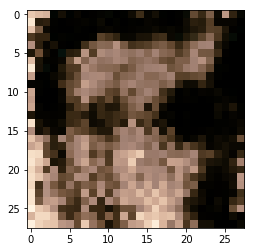

Epoch 1/1... Discriminator Loss: 3.0275... Generator Loss: 0.0497


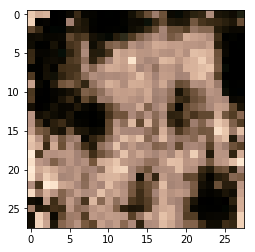

Epoch 1/1... Discriminator Loss: 0.6478... Generator Loss: 0.7629
Epoch 1/1... Discriminator Loss: 0.0573... Generator Loss: 2.9092
Epoch 1/1... Discriminator Loss: 0.1917... Generator Loss: 1.7719
Epoch 1/1... Discriminator Loss: 2.3615... Generator Loss: 0.0991


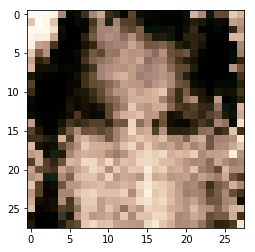

Epoch 1/1... Discriminator Loss: 1.3769... Generator Loss: 0.2908
Epoch 1/1... Discriminator Loss: 0.3826... Generator Loss: 1.1576
Epoch 1/1... Discriminator Loss: 1.5006... Generator Loss: 0.2548
Epoch 1/1... Discriminator Loss: 0.6710... Generator Loss: 0.8203
Epoch 1/1... Discriminator Loss: 0.1448... Generator Loss: 2.3185
Epoch 1/1... Discriminator Loss: 0.4772... Generator Loss: 1.0171
Epoch 1/1... Discriminator Loss: 4.1377... Generator Loss: 0.0161


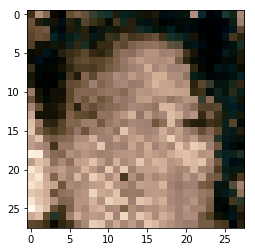

Epoch 1/1... Discriminator Loss: 4.9139... Generator Loss: 0.0074


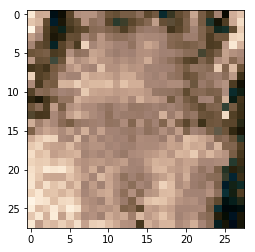

Epoch 1/1... Discriminator Loss: 1.3539... Generator Loss: 1.9581
Epoch 1/1... Discriminator Loss: 0.5914... Generator Loss: 1.2192
Epoch 1/1... Discriminator Loss: 0.2679... Generator Loss: 1.4647
Epoch 1/1... Discriminator Loss: 2.6942... Generator Loss: 0.0701


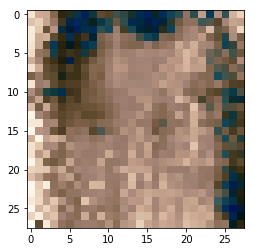

Epoch 1/1... Discriminator Loss: 2.6943... Generator Loss: 0.0700


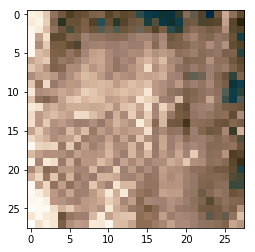

Epoch 1/1... Discriminator Loss: 1.1381... Generator Loss: 0.6323
Epoch 1/1... Discriminator Loss: 1.9929... Generator Loss: 0.1483
Epoch 1/1... Discriminator Loss: 2.1515... Generator Loss: 0.1237
Epoch 1/1... Discriminator Loss: 0.4917... Generator Loss: 1.0661


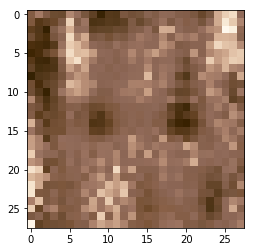

Epoch 1/1... Discriminator Loss: 0.5732... Generator Loss: 1.9153
Epoch 1/1... Discriminator Loss: 0.0699... Generator Loss: 2.8374
Epoch 1/1... Discriminator Loss: 0.8129... Generator Loss: 0.5912
Epoch 1/1... Discriminator Loss: 0.7998... Generator Loss: 0.5977
Epoch 1/1... Discriminator Loss: 0.6510... Generator Loss: 0.8010
Epoch 1/1... Discriminator Loss: 0.4658... Generator Loss: 1.0413
Epoch 1/1... Discriminator Loss: 0.4747... Generator Loss: 1.0701
Epoch 1/1... Discriminator Loss: 2.0622... Generator Loss: 0.1372
Epoch 1/1... Discriminator Loss: 0.7618... Generator Loss: 0.6336
Epoch 1/1... Discriminator Loss: 0.0996... Generator Loss: 2.9172
Epoch 1/1... Discriminator Loss: 0.1134... Generator Loss: 2.2380
Epoch 1/1... Discriminator Loss: 2.3357... Generator Loss: 0.1018
Epoch 1/1... Discriminator Loss: 0.1768... Generator Loss: 2.4992
Epoch 1/1... Discriminator Loss: 4.1631... Generator Loss: 0.0162


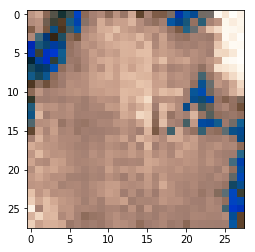

Epoch 1/1... Discriminator Loss: 0.0946... Generator Loss: 2.4198
Epoch 1/1... Discriminator Loss: 0.1597... Generator Loss: 2.1770
Epoch 1/1... Discriminator Loss: 1.0361... Generator Loss: 0.4516
Epoch 1/1... Discriminator Loss: 0.5913... Generator Loss: 0.8120
Epoch 1/1... Discriminator Loss: 0.4444... Generator Loss: 2.1359
Epoch 1/1... Discriminator Loss: 0.3068... Generator Loss: 1.6069
Epoch 1/1... Discriminator Loss: 2.7387... Generator Loss: 0.0669


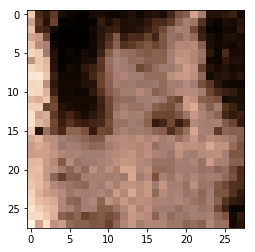

Epoch 1/1... Discriminator Loss: 0.2748... Generator Loss: 4.6451
Epoch 1/1... Discriminator Loss: 0.1004... Generator Loss: 2.3494
Epoch 1/1... Discriminator Loss: 0.1388... Generator Loss: 2.0451
Epoch 1/1... Discriminator Loss: 1.1400... Generator Loss: 0.3899
Epoch 1/1... Discriminator Loss: 0.1899... Generator Loss: 1.7564
Epoch 1/1... Discriminator Loss: 0.1578... Generator Loss: 2.4737
Epoch 1/1... Discriminator Loss: 0.0560... Generator Loss: 3.5662
Epoch 1/1... Discriminator Loss: 0.0587... Generator Loss: 2.8787
Epoch 1/1... Discriminator Loss: 0.0771... Generator Loss: 2.7838
Epoch 1/1... Discriminator Loss: 0.0974... Generator Loss: 2.6337
Epoch 1/1... Discriminator Loss: 1.1673... Generator Loss: 0.3735
Epoch 1/1... Discriminator Loss: 0.0813... Generator Loss: 2.6099
Epoch 1/1... Discriminator Loss: 0.0358... Generator Loss: 3.8671
Epoch 1/1... Discriminator Loss: 0.4981... Generator Loss: 0.9359
Epoch 1/1... Discriminator Loss: 0.2987... Generator Loss: 1.3540
Epoch 1/1.

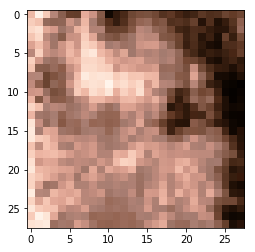

Epoch 1/1... Discriminator Loss: 0.0322... Generator Loss: 3.4530
Epoch 1/1... Discriminator Loss: 0.2668... Generator Loss: 1.5359
Epoch 1/1... Discriminator Loss: 0.3705... Generator Loss: 1.6696
Epoch 1/1... Discriminator Loss: 0.7669... Generator Loss: 0.6257
Epoch 1/1... Discriminator Loss: 0.3199... Generator Loss: 1.2963
Epoch 1/1... Discriminator Loss: 0.5676... Generator Loss: 1.1194
Epoch 1/1... Discriminator Loss: 0.1966... Generator Loss: 1.7282
Epoch 1/1... Discriminator Loss: 0.1125... Generator Loss: 2.3495
Epoch 1/1... Discriminator Loss: 0.3917... Generator Loss: 1.1583
Epoch 1/1... Discriminator Loss: 0.1027... Generator Loss: 2.9270
Epoch 1/1... Discriminator Loss: 0.3200... Generator Loss: 1.2951
Epoch 1/1... Discriminator Loss: 0.1978... Generator Loss: 1.7411
Epoch 1/1... Discriminator Loss: 1.0326... Generator Loss: 0.4582
Epoch 1/1... Discriminator Loss: 1.0193... Generator Loss: 0.4480
Epoch 1/1... Discriminator Loss: 0.5432... Generator Loss: 2.9190
Epoch 1/1.

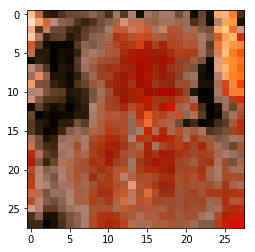

Epoch 1/1... Discriminator Loss: 0.9721... Generator Loss: 2.8709
Epoch 1/1... Discriminator Loss: 0.1315... Generator Loss: 4.3961
Epoch 1/1... Discriminator Loss: 0.0169... Generator Loss: 4.1107
Epoch 1/1... Discriminator Loss: 0.0282... Generator Loss: 3.9475
Epoch 1/1... Discriminator Loss: 1.0744... Generator Loss: 0.4179
Epoch 1/1... Discriminator Loss: 0.1487... Generator Loss: 1.9796
Epoch 1/1... Discriminator Loss: 0.0296... Generator Loss: 3.5360
Epoch 1/1... Discriminator Loss: 0.0083... Generator Loss: 4.7933
Epoch 1/1... Discriminator Loss: 0.0016... Generator Loss: 6.4403
Epoch 1/1... Discriminator Loss: 0.0011... Generator Loss: 6.8865
Epoch 1/1... Discriminator Loss: 0.0010... Generator Loss: 7.2429
Epoch 1/1... Discriminator Loss: 0.0056... Generator Loss: 5.3431
Epoch 1/1... Discriminator Loss: 0.0145... Generator Loss: 4.2416
Epoch 1/1... Discriminator Loss: 0.0249... Generator Loss: 3.7055
Epoch 1/1... Discriminator Loss: 0.0239... Generator Loss: 3.7452
Epoch 1/1.

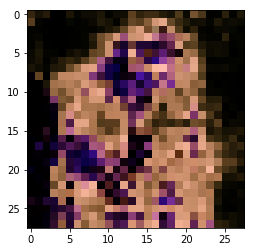

Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 11.9059
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 12.7962
Epoch 1/1... Discriminator Loss: 0.0027... Generator Loss: 5.9203
Epoch 1/1... Discriminator Loss: 0.0029... Generator Loss: 5.8684
Epoch 1/1... Discriminator Loss: 0.0050... Generator Loss: 5.3027
Epoch 1/1... Discriminator Loss: 3.3103... Generator Loss: 0.0372


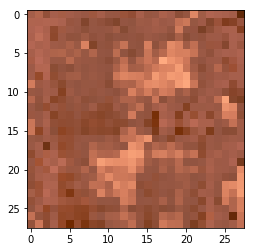

Epoch 1/1... Discriminator Loss: 13.5753... Generator Loss: 0.0000


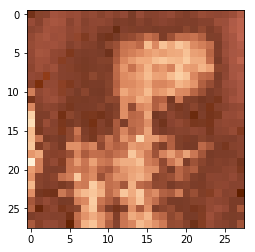

Epoch 1/1... Discriminator Loss: 5.2896... Generator Loss: 0.0052


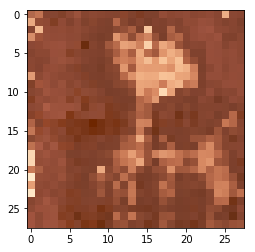

Epoch 1/1... Discriminator Loss: 0.0012... Generator Loss: 8.3842
Epoch 1/1... Discriminator Loss: 0.2199... Generator Loss: 5.7561
Epoch 1/1... Discriminator Loss: 0.0057... Generator Loss: 7.0261
Epoch 1/1... Discriminator Loss: 2.8573... Generator Loss: 0.0598


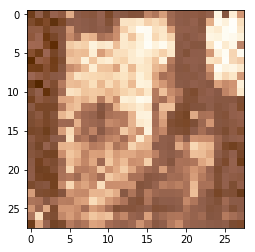

Epoch 1/1... Discriminator Loss: 12.3123... Generator Loss: 0.0000


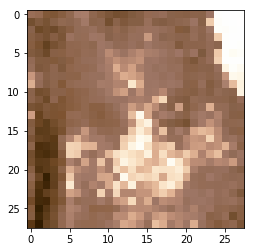

Epoch 1/1... Discriminator Loss: 6.7810... Generator Loss: 14.3331


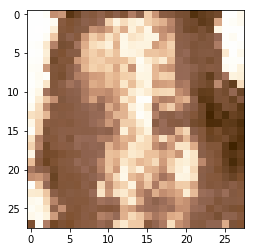

Epoch 1/1... Discriminator Loss: 2.3070... Generator Loss: 10.0434
Epoch 1/1... Discriminator Loss: 1.5976... Generator Loss: 5.6553
Epoch 1/1... Discriminator Loss: 0.0239... Generator Loss: 3.7731
Epoch 1/1... Discriminator Loss: 1.1697... Generator Loss: 0.3969
Epoch 1/1... Discriminator Loss: 2.8706... Generator Loss: 0.0600


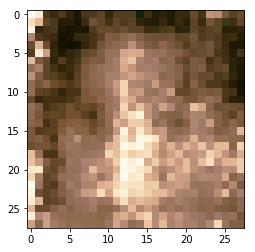

Epoch 1/1... Discriminator Loss: 1.0880... Generator Loss: 1.8838
Epoch 1/1... Discriminator Loss: 1.2849... Generator Loss: 1.0810
Epoch 1/1... Discriminator Loss: 0.3334... Generator Loss: 1.4340
Epoch 1/1... Discriminator Loss: 0.5688... Generator Loss: 1.9252
Epoch 1/1... Discriminator Loss: 1.2399... Generator Loss: 0.4805
Epoch 1/1... Discriminator Loss: 1.1248... Generator Loss: 0.3944
Epoch 1/1... Discriminator Loss: 0.4606... Generator Loss: 1.0228
Epoch 1/1... Discriminator Loss: 0.9579... Generator Loss: 1.0079
Epoch 1/1... Discriminator Loss: 1.6518... Generator Loss: 0.2239
Epoch 1/1... Discriminator Loss: 1.8765... Generator Loss: 0.2782
Epoch 1/1... Discriminator Loss: 1.1306... Generator Loss: 0.5560
Epoch 1/1... Discriminator Loss: 1.8259... Generator Loss: 0.8961
Epoch 1/1... Discriminator Loss: 1.3805... Generator Loss: 0.7909
Epoch 1/1... Discriminator Loss: 8.5753... Generator Loss: 0.0002


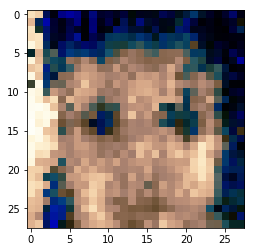

Epoch 1/1... Discriminator Loss: 1.8916... Generator Loss: 1.8573
Epoch 1/1... Discriminator Loss: 1.7494... Generator Loss: 1.2365
Epoch 1/1... Discriminator Loss: 1.7664... Generator Loss: 0.4960
Epoch 1/1... Discriminator Loss: 1.4131... Generator Loss: 0.5189
Epoch 1/1... Discriminator Loss: 1.2596... Generator Loss: 0.6761
Epoch 1/1... Discriminator Loss: 0.5148... Generator Loss: 1.6381
Epoch 1/1... Discriminator Loss: 0.2501... Generator Loss: 2.3758
Epoch 1/1... Discriminator Loss: 1.5912... Generator Loss: 0.3482
Epoch 1/1... Discriminator Loss: 1.2316... Generator Loss: 0.4368
Epoch 1/1... Discriminator Loss: 1.5851... Generator Loss: 0.3741
Epoch 1/1... Discriminator Loss: 1.3039... Generator Loss: 0.5124
Epoch 1/1... Discriminator Loss: 1.1774... Generator Loss: 0.5107
Epoch 1/1... Discriminator Loss: 0.6703... Generator Loss: 0.8019
Epoch 1/1... Discriminator Loss: 0.9732... Generator Loss: 0.5047
Epoch 1/1... Discriminator Loss: 1.2351... Generator Loss: 0.4217
Epoch 1/1.

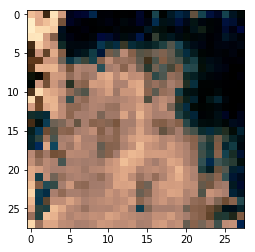

Epoch 1/1... Discriminator Loss: 1.1284... Generator Loss: 10.2468
Epoch 1/1... Discriminator Loss: 0.8412... Generator Loss: 3.8103
Epoch 1/1... Discriminator Loss: 0.3199... Generator Loss: 1.3744
Epoch 1/1... Discriminator Loss: 0.4538... Generator Loss: 1.0084
Epoch 1/1... Discriminator Loss: 0.5099... Generator Loss: 0.9179
Epoch 1/1... Discriminator Loss: 0.4018... Generator Loss: 1.1061
Epoch 1/1... Discriminator Loss: 0.3387... Generator Loss: 1.2930
Epoch 1/1... Discriminator Loss: 0.1978... Generator Loss: 1.7248
Epoch 1/1... Discriminator Loss: 0.2242... Generator Loss: 1.6721
Epoch 1/1... Discriminator Loss: 0.5114... Generator Loss: 1.2477
Epoch 1/1... Discriminator Loss: 0.4820... Generator Loss: 0.9653
Epoch 1/1... Discriminator Loss: 0.3252... Generator Loss: 1.2819
Epoch 1/1... Discriminator Loss: 0.5376... Generator Loss: 1.1575
Epoch 1/1... Discriminator Loss: 0.3746... Generator Loss: 1.1703
Epoch 1/1... Discriminator Loss: 0.3384... Generator Loss: 1.3913
Epoch 1/1

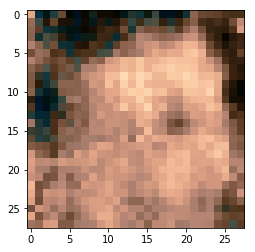

Epoch 1/1... Discriminator Loss: 0.0881... Generator Loss: 2.4729
Epoch 1/1... Discriminator Loss: 0.0752... Generator Loss: 2.6246
Epoch 1/1... Discriminator Loss: 0.0689... Generator Loss: 2.7100
Epoch 1/1... Discriminator Loss: 0.0653... Generator Loss: 2.7617
Epoch 1/1... Discriminator Loss: 0.7454... Generator Loss: 1.3885
Epoch 1/1... Discriminator Loss: 0.3805... Generator Loss: 1.1504
Epoch 1/1... Discriminator Loss: 0.3861... Generator Loss: 1.1384
Epoch 1/1... Discriminator Loss: 0.2391... Generator Loss: 1.5481
Epoch 1/1... Discriminator Loss: 0.2666... Generator Loss: 1.5747
Epoch 1/1... Discriminator Loss: 0.1949... Generator Loss: 1.8650
Epoch 1/1... Discriminator Loss: 0.1647... Generator Loss: 1.8849
Epoch 1/1... Discriminator Loss: 0.1036... Generator Loss: 2.3188
Epoch 1/1... Discriminator Loss: 0.1857... Generator Loss: 1.8130
Epoch 1/1... Discriminator Loss: 0.0627... Generator Loss: 2.8246
Epoch 1/1... Discriminator Loss: 0.0671... Generator Loss: 2.9959
Epoch 1/1.

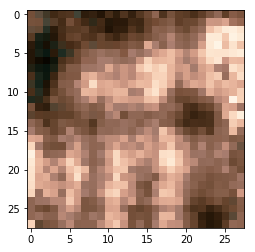

Epoch 1/1... Discriminator Loss: 3.7128... Generator Loss: 7.6778
Epoch 1/1... Discriminator Loss: 0.0023... Generator Loss: 6.1189
Epoch 1/1... Discriminator Loss: 0.8694... Generator Loss: 1.6613
Epoch 1/1... Discriminator Loss: 1.5663... Generator Loss: 0.2372
Epoch 1/1... Discriminator Loss: 0.4937... Generator Loss: 0.9449
Epoch 1/1... Discriminator Loss: 0.3578... Generator Loss: 1.2624
Epoch 1/1... Discriminator Loss: 1.3990... Generator Loss: 0.3196
Epoch 1/1... Discriminator Loss: 0.2897... Generator Loss: 1.3802
Epoch 1/1... Discriminator Loss: 0.0322... Generator Loss: 3.4552
Epoch 1/1... Discriminator Loss: 0.0041... Generator Loss: 5.5436
Epoch 1/1... Discriminator Loss: 0.4441... Generator Loss: 1.1812
Epoch 1/1... Discriminator Loss: 0.3289... Generator Loss: 1.2735
Epoch 1/1... Discriminator Loss: 1.4200... Generator Loss: 0.2767
Epoch 1/1... Discriminator Loss: 0.6815... Generator Loss: 0.7132
Epoch 1/1... Discriminator Loss: 0.3995... Generator Loss: 1.1106
Epoch 1/1.

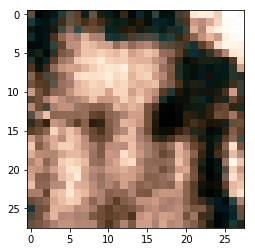

Epoch 1/1... Discriminator Loss: 0.8799... Generator Loss: 0.5431
Epoch 1/1... Discriminator Loss: 0.5755... Generator Loss: 0.8272
Epoch 1/1... Discriminator Loss: 0.0689... Generator Loss: 2.8043
Epoch 1/1... Discriminator Loss: 0.0939... Generator Loss: 2.4175
Epoch 1/1... Discriminator Loss: 0.0292... Generator Loss: 3.5534
Epoch 1/1... Discriminator Loss: 0.3574... Generator Loss: 2.6562
Epoch 1/1... Discriminator Loss: 0.2773... Generator Loss: 1.5189
Epoch 1/1... Discriminator Loss: 0.1991... Generator Loss: 1.7118
Epoch 1/1... Discriminator Loss: 1.3060... Generator Loss: 0.3928
Epoch 1/1... Discriminator Loss: 0.5057... Generator Loss: 0.9663
Epoch 1/1... Discriminator Loss: 0.2850... Generator Loss: 1.8267
Epoch 1/1... Discriminator Loss: 0.3295... Generator Loss: 3.2050
Epoch 1/1... Discriminator Loss: 0.0724... Generator Loss: 2.8528
Epoch 1/1... Discriminator Loss: 0.2093... Generator Loss: 2.2265
Epoch 1/1... Discriminator Loss: 0.7150... Generator Loss: 2.1742
Epoch 1/1.

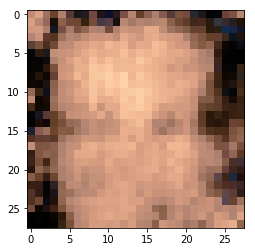

Epoch 1/1... Discriminator Loss: 0.0433... Generator Loss: 3.2841
Epoch 1/1... Discriminator Loss: 0.0288... Generator Loss: 3.5633
Epoch 1/1... Discriminator Loss: 0.0660... Generator Loss: 3.1932
Epoch 1/1... Discriminator Loss: 0.0740... Generator Loss: 2.8023
Epoch 1/1... Discriminator Loss: 0.0522... Generator Loss: 2.9780
Epoch 1/1... Discriminator Loss: 0.0577... Generator Loss: 2.8818
Epoch 1/1... Discriminator Loss: 0.0560... Generator Loss: 2.9109
Epoch 1/1... Discriminator Loss: 0.0448... Generator Loss: 3.1269
Epoch 1/1... Discriminator Loss: 0.0473... Generator Loss: 3.0749
Epoch 1/1... Discriminator Loss: 0.0370... Generator Loss: 3.3165
Epoch 1/1... Discriminator Loss: 0.0396... Generator Loss: 3.2494
Epoch 1/1... Discriminator Loss: 0.0261... Generator Loss: 3.6599
Epoch 1/1... Discriminator Loss: 0.0190... Generator Loss: 3.9711
Epoch 1/1... Discriminator Loss: 0.0267... Generator Loss: 3.6350
Epoch 1/1... Discriminator Loss: 0.0191... Generator Loss: 3.9671
Epoch 1/1.

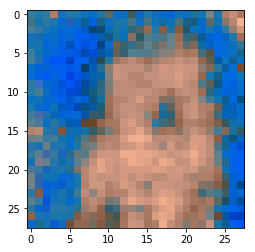

Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 8.3561
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 8.7286
Epoch 1/1... Discriminator Loss: 0.0004... Generator Loss: 7.7444
Epoch 1/1... Discriminator Loss: 1.2110... Generator Loss: 0.3537
Epoch 1/1... Discriminator Loss: 57.1599... Generator Loss: 0.0000


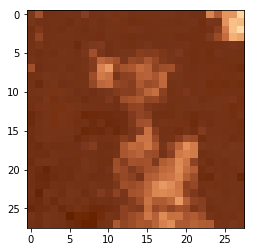

Epoch 1/1... Discriminator Loss: 31.7360... Generator Loss: 23.6721
Epoch 1/1... Discriminator Loss: 10.1538... Generator Loss: 12.9433
Epoch 1/1... Discriminator Loss: 2.5995... Generator Loss: 0.0773


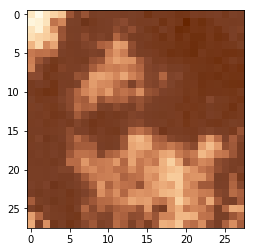

Epoch 1/1... Discriminator Loss: 0.9459... Generator Loss: 0.5077
Epoch 1/1... Discriminator Loss: 1.4123... Generator Loss: 4.3775
Epoch 1/1... Discriminator Loss: 1.7212... Generator Loss: 0.2031
Epoch 1/1... Discriminator Loss: 0.4767... Generator Loss: 1.4060
Epoch 1/1... Discriminator Loss: 0.2843... Generator Loss: 4.7754
Epoch 1/1... Discriminator Loss: 0.3973... Generator Loss: 1.2613
Epoch 1/1... Discriminator Loss: 0.3942... Generator Loss: 2.4959
Epoch 1/1... Discriminator Loss: 0.2952... Generator Loss: 3.3995
Epoch 1/1... Discriminator Loss: 3.4165... Generator Loss: 0.0336


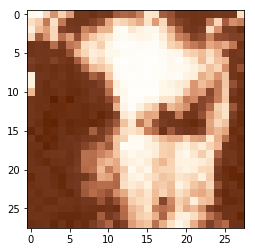

Epoch 1/1... Discriminator Loss: 1.0059... Generator Loss: 4.1758
Epoch 1/1... Discriminator Loss: 0.3455... Generator Loss: 5.2140
Epoch 1/1... Discriminator Loss: 1.2216... Generator Loss: 0.3569
Epoch 1/1... Discriminator Loss: 0.6690... Generator Loss: 0.7188
Epoch 1/1... Discriminator Loss: 0.3657... Generator Loss: 4.9043
Epoch 1/1... Discriminator Loss: 0.6905... Generator Loss: 1.0896
Epoch 1/1... Discriminator Loss: 1.6971... Generator Loss: 0.2069
Epoch 1/1... Discriminator Loss: 2.9254... Generator Loss: 3.4072
Epoch 1/1... Discriminator Loss: 3.4042... Generator Loss: 0.1564
Epoch 1/1... Discriminator Loss: 4.0838... Generator Loss: 0.0185


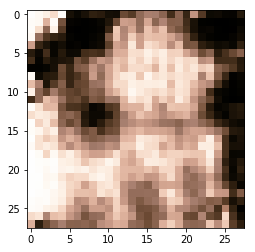

Epoch 1/1... Discriminator Loss: 2.4258... Generator Loss: 1.3129
Epoch 1/1... Discriminator Loss: 2.7621... Generator Loss: 0.3526
Epoch 1/1... Discriminator Loss: 1.1320... Generator Loss: 2.1803
Epoch 1/1... Discriminator Loss: 0.9180... Generator Loss: 0.8841
Epoch 1/1... Discriminator Loss: 1.6062... Generator Loss: 0.2385
Epoch 1/1... Discriminator Loss: 2.2039... Generator Loss: 2.7245
Epoch 1/1... Discriminator Loss: 0.8522... Generator Loss: 0.7464
Epoch 1/1... Discriminator Loss: 1.2979... Generator Loss: 0.3418
Epoch 1/1... Discriminator Loss: 0.5702... Generator Loss: 2.7169
Epoch 1/1... Discriminator Loss: 0.6731... Generator Loss: 0.9485
Epoch 1/1... Discriminator Loss: 1.6689... Generator Loss: 0.2142
Epoch 1/1... Discriminator Loss: 0.6285... Generator Loss: 1.9561
Epoch 1/1... Discriminator Loss: 0.4850... Generator Loss: 1.5193
Epoch 1/1... Discriminator Loss: 1.0000... Generator Loss: 0.4947
Epoch 1/1... Discriminator Loss: 1.8356... Generator Loss: 0.1958
Epoch 1/1.

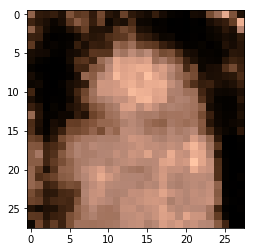

Epoch 1/1... Discriminator Loss: 1.1422... Generator Loss: 0.6248
Epoch 1/1... Discriminator Loss: 1.0134... Generator Loss: 0.5551
Epoch 1/1... Discriminator Loss: 1.3974... Generator Loss: 0.4524
Epoch 1/1... Discriminator Loss: 1.4076... Generator Loss: 0.7420
Epoch 1/1... Discriminator Loss: 0.3900... Generator Loss: 1.9698
Epoch 1/1... Discriminator Loss: 0.8820... Generator Loss: 0.6880
Epoch 1/1... Discriminator Loss: 1.6274... Generator Loss: 0.2954
Epoch 1/1... Discriminator Loss: 0.9350... Generator Loss: 0.6238
Epoch 1/1... Discriminator Loss: 0.3513... Generator Loss: 2.4480
Epoch 1/1... Discriminator Loss: 0.1434... Generator Loss: 3.2055
Epoch 1/1... Discriminator Loss: 1.0737... Generator Loss: 0.6629
Epoch 1/1... Discriminator Loss: 1.0974... Generator Loss: 0.4316
Epoch 1/1... Discriminator Loss: 1.0861... Generator Loss: 0.4799
Epoch 1/1... Discriminator Loss: 1.4199... Generator Loss: 0.6775
Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 0.6632
Epoch 1/1.

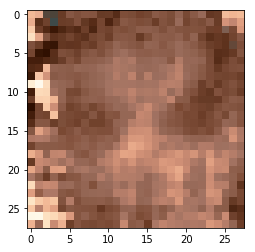

Epoch 1/1... Discriminator Loss: 1.1506... Generator Loss: 2.3222
Epoch 1/1... Discriminator Loss: 0.4138... Generator Loss: 1.3253
Epoch 1/1... Discriminator Loss: 0.7016... Generator Loss: 0.8650
Epoch 1/1... Discriminator Loss: 0.9453... Generator Loss: 0.5606
Epoch 1/1... Discriminator Loss: 0.9953... Generator Loss: 0.5564
Epoch 1/1... Discriminator Loss: 1.4980... Generator Loss: 0.5210
Epoch 1/1... Discriminator Loss: 1.4666... Generator Loss: 0.5804
Epoch 1/1... Discriminator Loss: 0.7120... Generator Loss: 0.9463
Epoch 1/1... Discriminator Loss: 0.3412... Generator Loss: 1.3624
Epoch 1/1... Discriminator Loss: 0.8494... Generator Loss: 1.0364
Epoch 1/1... Discriminator Loss: 0.4537... Generator Loss: 1.1261
Epoch 1/1... Discriminator Loss: 0.4001... Generator Loss: 1.2757
Epoch 1/1... Discriminator Loss: 0.5698... Generator Loss: 1.0122
Epoch 1/1... Discriminator Loss: 0.5153... Generator Loss: 1.0031
Epoch 1/1... Discriminator Loss: 0.3734... Generator Loss: 1.1803
Epoch 1/1.

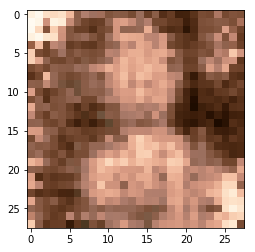

Epoch 1/1... Discriminator Loss: 0.4593... Generator Loss: 1.4503
Epoch 1/1... Discriminator Loss: 0.9457... Generator Loss: 0.6913
Epoch 1/1... Discriminator Loss: 0.5250... Generator Loss: 0.9681
Epoch 1/1... Discriminator Loss: 0.0734... Generator Loss: 3.7425
Epoch 1/1... Discriminator Loss: 4.8341... Generator Loss: 2.9494
Epoch 1/1... Discriminator Loss: 2.3523... Generator Loss: 0.1525
Epoch 1/1... Discriminator Loss: 2.0197... Generator Loss: 0.1502
Epoch 1/1... Discriminator Loss: 2.5265... Generator Loss: 0.2669
Epoch 1/1... Discriminator Loss: 0.7922... Generator Loss: 1.5747
Epoch 1/1... Discriminator Loss: 1.4581... Generator Loss: 0.8411


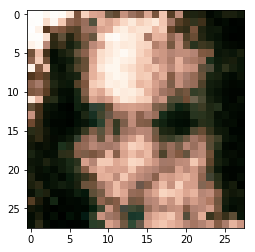

Epoch 1/1... Discriminator Loss: 1.0115... Generator Loss: 0.7937
Epoch 1/1... Discriminator Loss: 0.4194... Generator Loss: 1.2571
Epoch 1/1... Discriminator Loss: 0.9494... Generator Loss: 1.0359
Epoch 1/1... Discriminator Loss: 1.4563... Generator Loss: 0.5804
Epoch 1/1... Discriminator Loss: 0.5841... Generator Loss: 0.9701
Epoch 1/1... Discriminator Loss: 0.7480... Generator Loss: 0.9693
Epoch 1/1... Discriminator Loss: 0.7377... Generator Loss: 0.9417
Epoch 1/1... Discriminator Loss: 0.8286... Generator Loss: 0.8348
Epoch 1/1... Discriminator Loss: 0.6150... Generator Loss: 1.6401
Epoch 1/1... Discriminator Loss: 0.7377... Generator Loss: 0.8462
Epoch 1/1... Discriminator Loss: 1.1995... Generator Loss: 0.4947
Epoch 1/1... Discriminator Loss: 1.1984... Generator Loss: 0.4598
Epoch 1/1... Discriminator Loss: 0.8625... Generator Loss: 0.7144
Epoch 1/1... Discriminator Loss: 1.0328... Generator Loss: 1.3133
Epoch 1/1... Discriminator Loss: 0.6503... Generator Loss: 1.5381
Epoch 1/1.

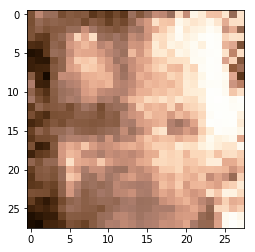

Epoch 1/1... Discriminator Loss: 1.8508... Generator Loss: 3.4990
Epoch 1/1... Discriminator Loss: 0.6268... Generator Loss: 0.9883
Epoch 1/1... Discriminator Loss: 1.6538... Generator Loss: 0.2486
Epoch 1/1... Discriminator Loss: 0.7471... Generator Loss: 0.8059
Epoch 1/1... Discriminator Loss: 1.2976... Generator Loss: 0.4057
Epoch 1/1... Discriminator Loss: 1.0819... Generator Loss: 0.4425
Epoch 1/1... Discriminator Loss: 0.8551... Generator Loss: 1.1790
Epoch 1/1... Discriminator Loss: 0.4800... Generator Loss: 1.4651
Epoch 1/1... Discriminator Loss: 1.3849... Generator Loss: 0.3063
Epoch 1/1... Discriminator Loss: 1.0986... Generator Loss: 0.4222
Epoch 1/1... Discriminator Loss: 0.8285... Generator Loss: 0.6982
Epoch 1/1... Discriminator Loss: 0.4912... Generator Loss: 1.0827
Epoch 1/1... Discriminator Loss: 0.6469... Generator Loss: 0.9151
Epoch 1/1... Discriminator Loss: 0.3044... Generator Loss: 1.4608
Epoch 1/1... Discriminator Loss: 1.8839... Generator Loss: 0.1659
Epoch 1/1.

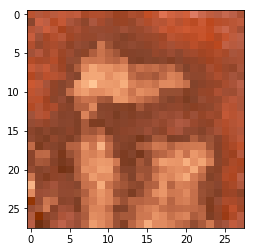

Epoch 1/1... Discriminator Loss: 2.8047... Generator Loss: 5.7740
Epoch 1/1... Discriminator Loss: 0.1953... Generator Loss: 4.2890
Epoch 1/1... Discriminator Loss: 0.0249... Generator Loss: 3.7779
Epoch 1/1... Discriminator Loss: 0.4696... Generator Loss: 1.1728
Epoch 1/1... Discriminator Loss: 2.2982... Generator Loss: 0.1058
Epoch 1/1... Discriminator Loss: 0.6345... Generator Loss: 1.0047
Epoch 1/1... Discriminator Loss: 0.2956... Generator Loss: 2.2942
Epoch 1/1... Discriminator Loss: 0.5654... Generator Loss: 0.8493
Epoch 1/1... Discriminator Loss: 0.4548... Generator Loss: 1.1131
Epoch 1/1... Discriminator Loss: 0.5659... Generator Loss: 0.8755
Epoch 1/1... Discriminator Loss: 4.9077... Generator Loss: 0.0076


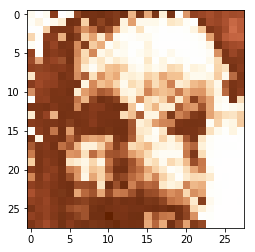

Epoch 1/1... Discriminator Loss: 0.0438... Generator Loss: 3.2168
Epoch 1/1... Discriminator Loss: 1.7838... Generator Loss: 0.1855
Epoch 1/1... Discriminator Loss: 0.0795... Generator Loss: 2.5985
Epoch 1/1... Discriminator Loss: 5.3895... Generator Loss: 0.0046


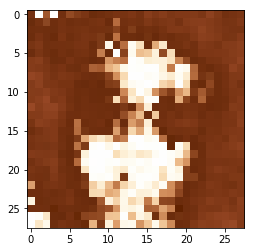

Epoch 1/1... Discriminator Loss: 0.7798... Generator Loss: 17.1462
Epoch 1/1... Discriminator Loss: 0.0027... Generator Loss: 17.3908
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 10.2269
Epoch 1/1... Discriminator Loss: 0.0463... Generator Loss: 3.0954
Epoch 1/1... Discriminator Loss: 0.0402... Generator Loss: 3.2334
Epoch 1/1... Discriminator Loss: 8.1077... Generator Loss: 0.0003


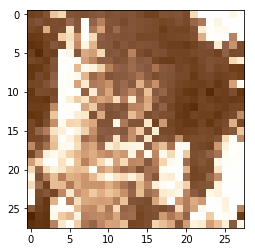

Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 19.3733
Epoch 1/1... Discriminator Loss: 0.0322... Generator Loss: 5.0917
Epoch 1/1... Discriminator Loss: 65.3541... Generator Loss: 0.0000


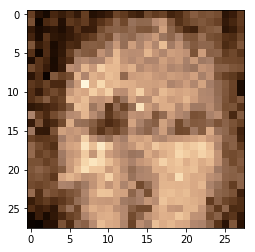

Epoch 1/1... Discriminator Loss: 17.7563... Generator Loss: 8.3529
Epoch 1/1... Discriminator Loss: 5.1520... Generator Loss: 1.4434
Epoch 1/1... Discriminator Loss: 4.4895... Generator Loss: 0.0315


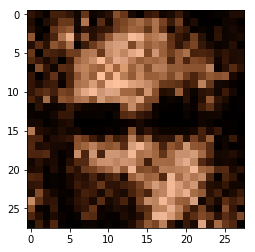

Epoch 1/1... Discriminator Loss: 1.5113... Generator Loss: 0.4796
Epoch 1/1... Discriminator Loss: 1.0570... Generator Loss: 1.1192
Epoch 1/1... Discriminator Loss: 0.2726... Generator Loss: 2.3044
Epoch 1/1... Discriminator Loss: 0.7051... Generator Loss: 1.0559
Epoch 1/1... Discriminator Loss: 1.1187... Generator Loss: 0.4500
Epoch 1/1... Discriminator Loss: 0.0571... Generator Loss: 3.7438
Epoch 1/1... Discriminator Loss: 0.5983... Generator Loss: 1.5103
Epoch 1/1... Discriminator Loss: 1.8777... Generator Loss: 0.1684
Epoch 1/1... Discriminator Loss: 1.1214... Generator Loss: 0.4582
Epoch 1/1... Discriminator Loss: 0.7000... Generator Loss: 1.0492
Epoch 1/1... Discriminator Loss: 0.6767... Generator Loss: 1.0055
Epoch 1/1... Discriminator Loss: 0.3942... Generator Loss: 1.3263
Epoch 1/1... Discriminator Loss: 0.3648... Generator Loss: 1.3823
Epoch 1/1... Discriminator Loss: 0.3088... Generator Loss: 1.4341
Epoch 1/1... Discriminator Loss: 0.7868... Generator Loss: 0.6195


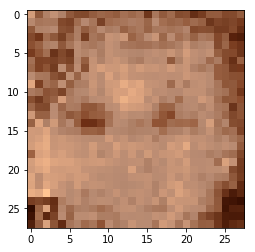

Epoch 1/1... Discriminator Loss: 0.7582... Generator Loss: 0.6324
Epoch 1/1... Discriminator Loss: 0.4435... Generator Loss: 1.0968
Epoch 1/1... Discriminator Loss: 0.1878... Generator Loss: 1.7669
Epoch 1/1... Discriminator Loss: 0.3247... Generator Loss: 1.5426
Epoch 1/1... Discriminator Loss: 0.1331... Generator Loss: 2.1084
Epoch 1/1... Discriminator Loss: 0.1424... Generator Loss: 2.0959
Epoch 1/1... Discriminator Loss: 0.1070... Generator Loss: 2.2962
Epoch 1/1... Discriminator Loss: 0.0784... Generator Loss: 2.5857
Epoch 1/1... Discriminator Loss: 0.1104... Generator Loss: 2.2588
Epoch 1/1... Discriminator Loss: 0.1080... Generator Loss: 2.2900
Epoch 1/1... Discriminator Loss: 0.0746... Generator Loss: 2.6346
Epoch 1/1... Discriminator Loss: 1.0309... Generator Loss: 0.4468
Epoch 1/1... Discriminator Loss: 0.2216... Generator Loss: 1.7001
Epoch 1/1... Discriminator Loss: 5.3548... Generator Loss: 6.0895
Epoch 1/1... Discriminator Loss: 0.2399... Generator Loss: 1.6493
Epoch 1/1.

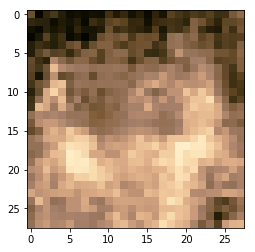

Epoch 1/1... Discriminator Loss: 0.5289... Generator Loss: 0.8898
Epoch 1/1... Discriminator Loss: 5.2372... Generator Loss: 0.0053


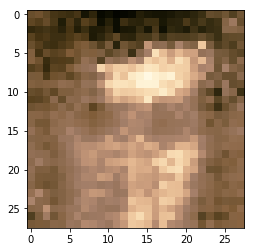

Epoch 1/1... Discriminator Loss: 1.8576... Generator Loss: 3.0458
Epoch 1/1... Discriminator Loss: 3.4576... Generator Loss: 6.4473
Epoch 1/1... Discriminator Loss: 0.8851... Generator Loss: 5.2233
Epoch 1/1... Discriminator Loss: 1.8462... Generator Loss: 0.2230
Epoch 1/1... Discriminator Loss: 1.5317... Generator Loss: 0.2437
Epoch 1/1... Discriminator Loss: 1.1196... Generator Loss: 0.4079
Epoch 1/1... Discriminator Loss: 2.1601... Generator Loss: 1.5472
Epoch 1/1... Discriminator Loss: 0.1292... Generator Loss: 2.4376


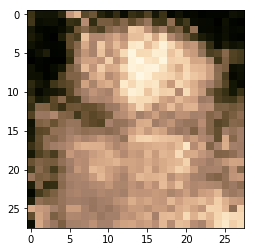

Epoch 1/1... Discriminator Loss: 0.2432... Generator Loss: 2.1056
Epoch 1/1... Discriminator Loss: 2.2567... Generator Loss: 0.1275
Epoch 1/1... Discriminator Loss: 1.4047... Generator Loss: 0.3225
Epoch 1/1... Discriminator Loss: 1.9178... Generator Loss: 2.8042
Epoch 1/1... Discriminator Loss: 0.3872... Generator Loss: 2.2678
Epoch 1/1... Discriminator Loss: 0.9253... Generator Loss: 0.6520
Epoch 1/1... Discriminator Loss: 1.1913... Generator Loss: 0.4033
Epoch 1/1... Discriminator Loss: 0.9012... Generator Loss: 0.6922
Epoch 1/1... Discriminator Loss: 0.7929... Generator Loss: 2.0276
Epoch 1/1... Discriminator Loss: 0.3858... Generator Loss: 1.3134
Epoch 1/1... Discriminator Loss: 3.0414... Generator Loss: 0.0490


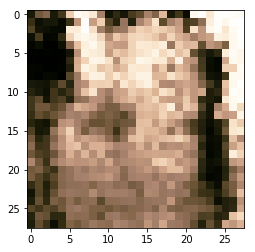

Epoch 1/1... Discriminator Loss: 1.1178... Generator Loss: 3.7883
Epoch 1/1... Discriminator Loss: 0.5379... Generator Loss: 4.1782
Epoch 1/1... Discriminator Loss: 0.1250... Generator Loss: 3.2915
Epoch 1/1... Discriminator Loss: 0.9799... Generator Loss: 0.4911
Epoch 1/1... Discriminator Loss: 0.9558... Generator Loss: 0.5203
Epoch 1/1... Discriminator Loss: 0.6237... Generator Loss: 1.4970
Epoch 1/1... Discriminator Loss: 0.4441... Generator Loss: 1.4008
Epoch 1/1... Discriminator Loss: 0.2140... Generator Loss: 1.7791
Epoch 1/1... Discriminator Loss: 0.7856... Generator Loss: 0.6679
Epoch 1/1... Discriminator Loss: 1.2043... Generator Loss: 0.3696
Epoch 1/1... Discriminator Loss: 1.3857... Generator Loss: 2.1131
Epoch 1/1... Discriminator Loss: 1.2447... Generator Loss: 0.3519
Epoch 1/1... Discriminator Loss: 0.6385... Generator Loss: 0.7801
Epoch 1/1... Discriminator Loss: 1.7712... Generator Loss: 0.1924
Epoch 1/1... Discriminator Loss: 0.7485... Generator Loss: 2.8773
Epoch 1/1.

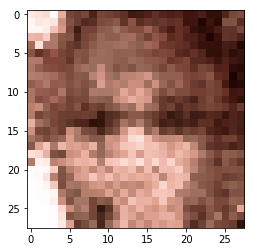

Epoch 1/1... Discriminator Loss: 4.2558... Generator Loss: 9.1387
Epoch 1/1... Discriminator Loss: 0.3825... Generator Loss: 3.0375
Epoch 1/1... Discriminator Loss: 1.6091... Generator Loss: 0.2241
Epoch 1/1... Discriminator Loss: 1.0963... Generator Loss: 0.4305
Epoch 1/1... Discriminator Loss: 0.1510... Generator Loss: 4.0985
Epoch 1/1... Discriminator Loss: 0.0502... Generator Loss: 4.5230
Epoch 1/1... Discriminator Loss: 0.0248... Generator Loss: 5.8511
Epoch 1/1... Discriminator Loss: 0.4322... Generator Loss: 1.0474
Epoch 1/1... Discriminator Loss: 4.3371... Generator Loss: 0.0132


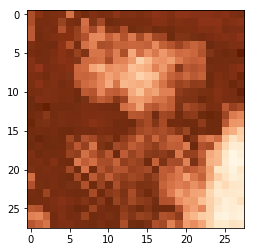

Epoch 1/1... Discriminator Loss: 0.0021... Generator Loss: 11.4425
Epoch 1/1... Discriminator Loss: 0.3327... Generator Loss: 13.4283
Epoch 1/1... Discriminator Loss: 0.0126... Generator Loss: 8.4050
Epoch 1/1... Discriminator Loss: 0.0116... Generator Loss: 5.5876
Epoch 1/1... Discriminator Loss: 0.2540... Generator Loss: 1.4951
Epoch 1/1... Discriminator Loss: 2.3974... Generator Loss: 0.0977


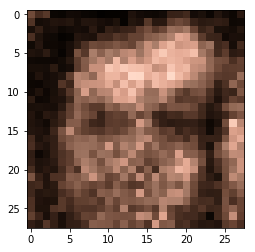

Epoch 1/1... Discriminator Loss: 6.7508... Generator Loss: 7.7023
Epoch 1/1... Discriminator Loss: 3.5747... Generator Loss: 2.5827
Epoch 1/1... Discriminator Loss: 1.3124... Generator Loss: 0.3318
Epoch 1/1... Discriminator Loss: 0.9375... Generator Loss: 0.5292
Epoch 1/1... Discriminator Loss: 0.6951... Generator Loss: 1.2804
Epoch 1/1... Discriminator Loss: 0.2169... Generator Loss: 2.8783
Epoch 1/1... Discriminator Loss: 0.9239... Generator Loss: 0.5713
Epoch 1/1... Discriminator Loss: 1.2862... Generator Loss: 0.3783
Epoch 1/1... Discriminator Loss: 0.6182... Generator Loss: 0.7746
Epoch 1/1... Discriminator Loss: 0.6110... Generator Loss: 0.9902
Epoch 1/1... Discriminator Loss: 0.8391... Generator Loss: 0.6246
Epoch 1/1... Discriminator Loss: 0.4621... Generator Loss: 1.0245
Epoch 1/1... Discriminator Loss: 1.0451... Generator Loss: 0.4613
Epoch 1/1... Discriminator Loss: 1.0670... Generator Loss: 0.5213
Epoch 1/1... Discriminator Loss: 0.3093... Generator Loss: 1.4212
Epoch 1/1.

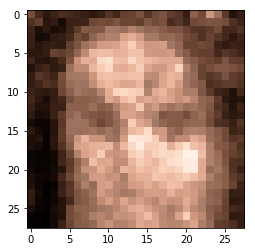

Epoch 1/1... Discriminator Loss: 0.3490... Generator Loss: 1.5891
Epoch 1/1... Discriminator Loss: 0.8156... Generator Loss: 0.6040
Epoch 1/1... Discriminator Loss: 0.8200... Generator Loss: 0.6098
Epoch 1/1... Discriminator Loss: 0.7680... Generator Loss: 0.6803
Epoch 1/1... Discriminator Loss: 0.8310... Generator Loss: 0.8675
Epoch 1/1... Discriminator Loss: 1.8639... Generator Loss: 0.1788
Epoch 1/1... Discriminator Loss: 0.5001... Generator Loss: 2.3903
Epoch 1/1... Discriminator Loss: 0.1294... Generator Loss: 3.4296
Epoch 1/1... Discriminator Loss: 0.3341... Generator Loss: 1.8417
Epoch 1/1... Discriminator Loss: 0.5642... Generator Loss: 0.9042
Epoch 1/1... Discriminator Loss: 0.6768... Generator Loss: 0.7524
Epoch 1/1... Discriminator Loss: 0.6344... Generator Loss: 1.2443
Epoch 1/1... Discriminator Loss: 0.6202... Generator Loss: 1.0760
Epoch 1/1... Discriminator Loss: 1.0700... Generator Loss: 0.6877
Epoch 1/1... Discriminator Loss: 0.3114... Generator Loss: 1.4188
Epoch 1/1.

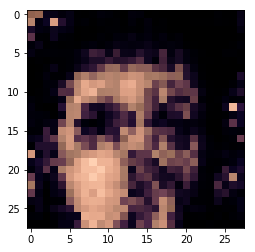

Epoch 1/1... Discriminator Loss: 0.0084... Generator Loss: 5.9207
Epoch 1/1... Discriminator Loss: 0.0185... Generator Loss: 7.6198
Epoch 1/1... Discriminator Loss: 0.0631... Generator Loss: 4.0335
Epoch 1/1... Discriminator Loss: 0.5887... Generator Loss: 1.1955
Epoch 1/1... Discriminator Loss: 1.4557... Generator Loss: 0.2665
Epoch 1/1... Discriminator Loss: 0.1858... Generator Loss: 2.1165
Epoch 1/1... Discriminator Loss: 1.2672... Generator Loss: 1.4629
Epoch 1/1... Discriminator Loss: 0.0252... Generator Loss: 3.8035
Epoch 1/1... Discriminator Loss: 4.9746... Generator Loss: 0.0075


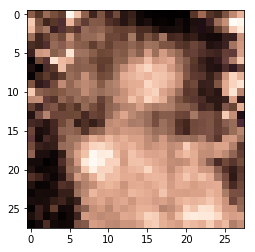

Epoch 1/1... Discriminator Loss: 2.2690... Generator Loss: 0.1093
Epoch 1/1... Discriminator Loss: 0.5303... Generator Loss: 1.7072
Epoch 1/1... Discriminator Loss: 1.4420... Generator Loss: 0.2830
Epoch 1/1... Discriminator Loss: 0.1415... Generator Loss: 3.2510
Epoch 1/1... Discriminator Loss: 0.3401... Generator Loss: 1.6514
Epoch 1/1... Discriminator Loss: 4.8600... Generator Loss: 0.0078


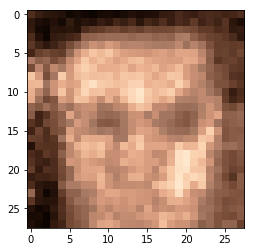

Epoch 1/1... Discriminator Loss: 4.0081... Generator Loss: 3.8853
Epoch 1/1... Discriminator Loss: 1.2754... Generator Loss: 0.4651
Epoch 1/1... Discriminator Loss: 0.8127... Generator Loss: 0.9535
Epoch 1/1... Discriminator Loss: 0.5037... Generator Loss: 1.1205
Epoch 1/1... Discriminator Loss: 0.5192... Generator Loss: 0.9316
Epoch 1/1... Discriminator Loss: 0.8987... Generator Loss: 0.5887
Epoch 1/1... Discriminator Loss: 1.0603... Generator Loss: 0.4988
Epoch 1/1... Discriminator Loss: 1.1005... Generator Loss: 0.5104
Epoch 1/1... Discriminator Loss: 0.5368... Generator Loss: 0.8983
Epoch 1/1... Discriminator Loss: 0.4478... Generator Loss: 1.4628
Epoch 1/1... Discriminator Loss: 0.3165... Generator Loss: 1.4764
Epoch 1/1... Discriminator Loss: 2.7510... Generator Loss: 0.0696


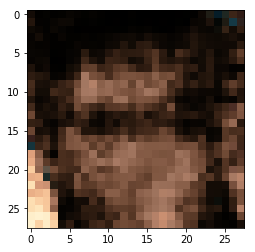

Epoch 1/1... Discriminator Loss: 0.1151... Generator Loss: 2.7926
Epoch 1/1... Discriminator Loss: 0.1921... Generator Loss: 2.1402
Epoch 1/1... Discriminator Loss: 0.2874... Generator Loss: 1.4556
Epoch 1/1... Discriminator Loss: 0.4949... Generator Loss: 0.9517
Epoch 1/1... Discriminator Loss: 0.9241... Generator Loss: 0.6080
Epoch 1/1... Discriminator Loss: 3.3876... Generator Loss: 0.0449


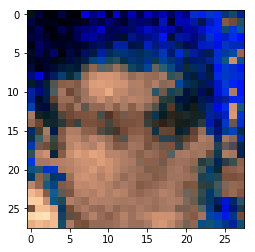

Epoch 1/1... Discriminator Loss: 0.8146... Generator Loss: 3.0897
Epoch 1/1... Discriminator Loss: 0.2823... Generator Loss: 3.2131
Epoch 1/1... Discriminator Loss: 0.0583... Generator Loss: 3.0179
Epoch 1/1... Discriminator Loss: 0.1278... Generator Loss: 2.1218
Epoch 1/1... Discriminator Loss: 0.1023... Generator Loss: 2.3376
Epoch 1/1... Discriminator Loss: 0.4785... Generator Loss: 1.1622
Epoch 1/1... Discriminator Loss: 0.9628... Generator Loss: 0.5342
Epoch 1/1... Discriminator Loss: 0.5833... Generator Loss: 0.8166
Epoch 1/1... Discriminator Loss: 0.7016... Generator Loss: 0.6847
Epoch 1/1... Discriminator Loss: 0.4302... Generator Loss: 1.1321
Epoch 1/1... Discriminator Loss: 1.2360... Generator Loss: 2.7179
Epoch 1/1... Discriminator Loss: 1.5931... Generator Loss: 2.0509
Epoch 1/1... Discriminator Loss: 2.3771... Generator Loss: 0.1239
Epoch 1/1... Discriminator Loss: 1.0092... Generator Loss: 0.4995
Epoch 1/1... Discriminator Loss: 0.7994... Generator Loss: 0.9466
Epoch 1/1.

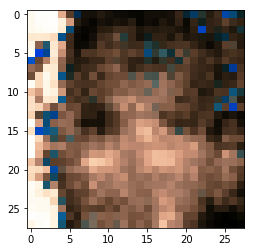

Epoch 1/1... Discriminator Loss: 0.6211... Generator Loss: 0.9269
Epoch 1/1... Discriminator Loss: 1.3996... Generator Loss: 0.3476
Epoch 1/1... Discriminator Loss: 1.0872... Generator Loss: 0.5355
Epoch 1/1... Discriminator Loss: 1.1689... Generator Loss: 0.4768
Epoch 1/1... Discriminator Loss: 0.3199... Generator Loss: 1.9665
Epoch 1/1... Discriminator Loss: 0.1321... Generator Loss: 2.5126
Epoch 1/1... Discriminator Loss: 0.1884... Generator Loss: 2.0357
Epoch 1/1... Discriminator Loss: 0.8950... Generator Loss: 0.5742
Epoch 1/1... Discriminator Loss: 1.2351... Generator Loss: 0.3562
Epoch 1/1... Discriminator Loss: 0.5563... Generator Loss: 0.9437
Epoch 1/1... Discriminator Loss: 0.5826... Generator Loss: 2.4927
Epoch 1/1... Discriminator Loss: 0.4342... Generator Loss: 2.6639
Epoch 1/1... Discriminator Loss: 0.2067... Generator Loss: 2.3660
Epoch 1/1... Discriminator Loss: 0.5462... Generator Loss: 0.9329
Epoch 1/1... Discriminator Loss: 1.4170... Generator Loss: 0.2958
Epoch 1/1.

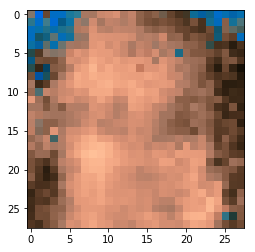

Epoch 1/1... Discriminator Loss: 1.2017... Generator Loss: 0.4487
Epoch 1/1... Discriminator Loss: 0.6818... Generator Loss: 0.7323
Epoch 1/1... Discriminator Loss: 0.4982... Generator Loss: 1.0183
Epoch 1/1... Discriminator Loss: 0.2613... Generator Loss: 1.5367
Epoch 1/1... Discriminator Loss: 0.1941... Generator Loss: 2.1815
Epoch 1/1... Discriminator Loss: 0.1043... Generator Loss: 2.5603
Epoch 1/1... Discriminator Loss: 0.8425... Generator Loss: 0.6432
Epoch 1/1... Discriminator Loss: 0.5122... Generator Loss: 0.9145
Epoch 1/1... Discriminator Loss: 0.1880... Generator Loss: 1.7655
Epoch 1/1... Discriminator Loss: 0.1294... Generator Loss: 2.4330
Epoch 1/1... Discriminator Loss: 0.1047... Generator Loss: 3.2375
Epoch 1/1... Discriminator Loss: 0.6954... Generator Loss: 1.2871
Epoch 1/1... Discriminator Loss: 0.5073... Generator Loss: 0.9224
Epoch 1/1... Discriminator Loss: 0.4625... Generator Loss: 0.9935
Epoch 1/1... Discriminator Loss: 0.1350... Generator Loss: 2.0694
Epoch 1/1.

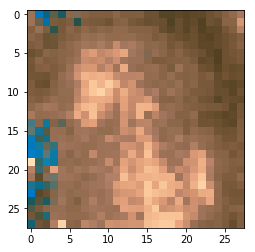

Epoch 1/1... Discriminator Loss: 0.8326... Generator Loss: 1.2931
Epoch 1/1... Discriminator Loss: 1.8026... Generator Loss: 0.7112
Epoch 1/1... Discriminator Loss: 4.3817... Generator Loss: 0.0137


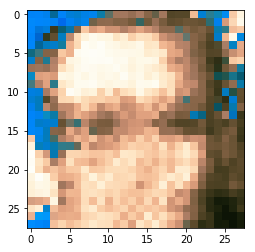

Epoch 1/1... Discriminator Loss: 8.8661... Generator Loss: 0.0003


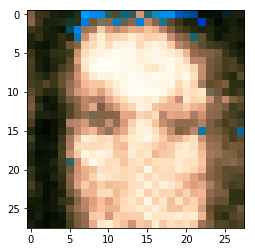

Epoch 1/1... Discriminator Loss: 2.0999... Generator Loss: 9.9135
Epoch 1/1... Discriminator Loss: 0.5842... Generator Loss: 1.5452
Epoch 1/1... Discriminator Loss: 1.4747... Generator Loss: 0.2603
Epoch 1/1... Discriminator Loss: 0.7041... Generator Loss: 0.8993
Epoch 1/1... Discriminator Loss: 0.5031... Generator Loss: 3.1511
Epoch 1/1... Discriminator Loss: 0.4432... Generator Loss: 2.2614
Epoch 1/1... Discriminator Loss: 1.2102... Generator Loss: 0.3843
Epoch 1/1... Discriminator Loss: 1.7610... Generator Loss: 0.1945
Epoch 1/1... Discriminator Loss: 0.6221... Generator Loss: 0.8770
Epoch 1/1... Discriminator Loss: 0.5816... Generator Loss: 1.3189
Epoch 1/1... Discriminator Loss: 1.0987... Generator Loss: 0.4637
Epoch 1/1... Discriminator Loss: 1.0742... Generator Loss: 0.4667
Epoch 1/1... Discriminator Loss: 1.0058... Generator Loss: 0.5237
Epoch 1/1... Discriminator Loss: 0.0611... Generator Loss: 3.0461
Epoch 1/1... Discriminator Loss: 1.7595... Generator Loss: 0.2121
Epoch 1/1.

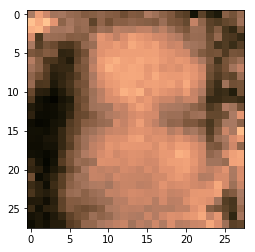

Epoch 1/1... Discriminator Loss: 1.0134... Generator Loss: 2.3908
Epoch 1/1... Discriminator Loss: 0.1316... Generator Loss: 4.1760
Epoch 1/1... Discriminator Loss: 0.9628... Generator Loss: 2.4833
Epoch 1/1... Discriminator Loss: 0.1088... Generator Loss: 2.4505
Epoch 1/1... Discriminator Loss: 0.2010... Generator Loss: 1.8057
Epoch 1/1... Discriminator Loss: 0.2309... Generator Loss: 1.5801
Epoch 1/1... Discriminator Loss: 0.2502... Generator Loss: 1.8710
Epoch 1/1... Discriminator Loss: 0.3098... Generator Loss: 1.7618
Epoch 1/1... Discriminator Loss: 0.1547... Generator Loss: 1.9463
Epoch 1/1... Discriminator Loss: 0.1249... Generator Loss: 2.1582
Epoch 1/1... Discriminator Loss: 0.1696... Generator Loss: 1.8580
Epoch 1/1... Discriminator Loss: 0.1289... Generator Loss: 2.1128
Epoch 1/1... Discriminator Loss: 0.2539... Generator Loss: 1.7976
Epoch 1/1... Discriminator Loss: 0.2132... Generator Loss: 1.6656
Epoch 1/1... Discriminator Loss: 0.1924... Generator Loss: 1.7429
Epoch 1/1.

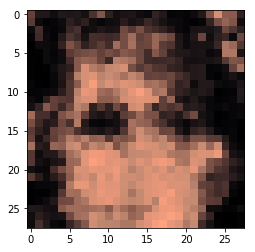

Epoch 1/1... Discriminator Loss: 0.0481... Generator Loss: 3.0586
Epoch 1/1... Discriminator Loss: 0.0136... Generator Loss: 4.3052
Epoch 1/1... Discriminator Loss: 0.0423... Generator Loss: 3.1845
Epoch 1/1... Discriminator Loss: 0.0140... Generator Loss: 4.4330
Epoch 1/1... Discriminator Loss: 0.0243... Generator Loss: 3.8011
Epoch 1/1... Discriminator Loss: 0.0129... Generator Loss: 4.3546
Epoch 1/1... Discriminator Loss: 0.0099... Generator Loss: 4.6205
Epoch 1/1... Discriminator Loss: 0.0294... Generator Loss: 3.5427
Epoch 1/1... Discriminator Loss: 0.4969... Generator Loss: 0.9375
Epoch 1/1... Discriminator Loss: 0.9436... Generator Loss: 0.4931
Epoch 1/1... Discriminator Loss: 0.3928... Generator Loss: 1.1245
Epoch 1/1... Discriminator Loss: 0.2531... Generator Loss: 1.4980
Epoch 1/1... Discriminator Loss: 0.1473... Generator Loss: 1.9879
Epoch 1/1... Discriminator Loss: 0.1865... Generator Loss: 1.7710
Epoch 1/1... Discriminator Loss: 0.1303... Generator Loss: 2.1023
Epoch 1/1.

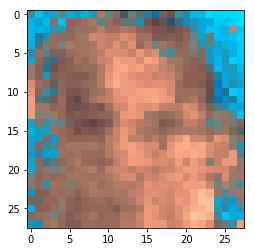

Epoch 1/1... Discriminator Loss: 0.0065... Generator Loss: 11.0919
Epoch 1/1... Discriminator Loss: 0.0270... Generator Loss: 5.6809
Epoch 1/1... Discriminator Loss: 0.0572... Generator Loss: 2.9392
Epoch 1/1... Discriminator Loss: 0.0742... Generator Loss: 2.6512
Epoch 1/1... Discriminator Loss: 0.1893... Generator Loss: 1.7576
Epoch 1/1... Discriminator Loss: 0.3956... Generator Loss: 1.1189
Epoch 1/1... Discriminator Loss: 0.5784... Generator Loss: 0.8228
Epoch 1/1... Discriminator Loss: 0.9497... Generator Loss: 0.4897
Epoch 1/1... Discriminator Loss: 1.2650... Generator Loss: 0.3316
Epoch 1/1... Discriminator Loss: 3.0900... Generator Loss: 7.0728
Epoch 1/1... Discriminator Loss: 4.9326... Generator Loss: 1.1330
Epoch 1/1... Discriminator Loss: 1.0982... Generator Loss: 3.7733
Epoch 1/1... Discriminator Loss: 0.4916... Generator Loss: 0.9519
Epoch 1/1... Discriminator Loss: 1.5739... Generator Loss: 0.2415
Epoch 1/1... Discriminator Loss: 1.2036... Generator Loss: 0.3569
Epoch 1/1

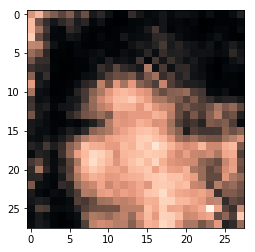

Epoch 1/1... Discriminator Loss: 0.6120... Generator Loss: 0.8021
Epoch 1/1... Discriminator Loss: 1.1323... Generator Loss: 0.4550
Epoch 1/1... Discriminator Loss: 0.8429... Generator Loss: 0.6012
Epoch 1/1... Discriminator Loss: 0.4120... Generator Loss: 1.1197
Epoch 1/1... Discriminator Loss: 0.3991... Generator Loss: 1.1783
Epoch 1/1... Discriminator Loss: 0.5558... Generator Loss: 1.0809
Epoch 1/1... Discriminator Loss: 1.1940... Generator Loss: 0.3855
Epoch 1/1... Discriminator Loss: 0.8385... Generator Loss: 0.5751
Epoch 1/1... Discriminator Loss: 0.6021... Generator Loss: 0.8594
Epoch 1/1... Discriminator Loss: 0.5034... Generator Loss: 0.9643
Epoch 1/1... Discriminator Loss: 0.7374... Generator Loss: 0.8005
Epoch 1/1... Discriminator Loss: 0.7229... Generator Loss: 0.7268
Epoch 1/1... Discriminator Loss: 0.3973... Generator Loss: 1.1748
Epoch 1/1... Discriminator Loss: 0.5913... Generator Loss: 0.9285
Epoch 1/1... Discriminator Loss: 0.5038... Generator Loss: 0.9415
Epoch 1/1.

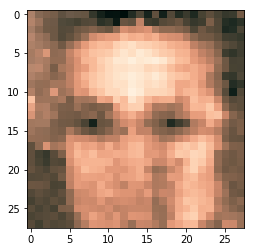

Epoch 1/1... Discriminator Loss: 8.6030... Generator Loss: 0.0002


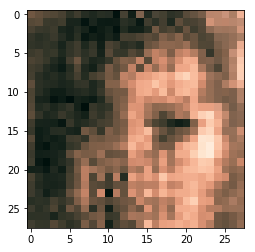

Epoch 1/1... Discriminator Loss: 0.1283... Generator Loss: 2.1169
Epoch 1/1... Discriminator Loss: 10.7524... Generator Loss: 0.0000


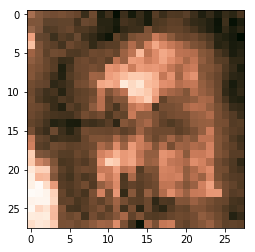

Epoch 1/1... Discriminator Loss: 18.0169... Generator Loss: 0.0000


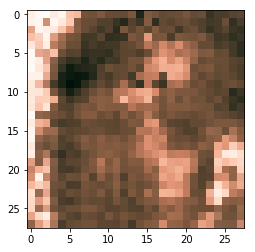

Epoch 1/1... Discriminator Loss: 19.1352... Generator Loss: 20.2195
Epoch 1/1... Discriminator Loss: 9.3455... Generator Loss: 9.4561
Epoch 1/1... Discriminator Loss: 4.0112... Generator Loss: 4.1410


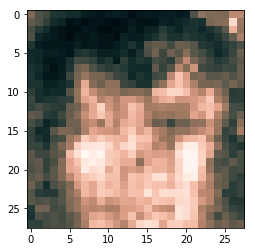

Epoch 1/1... Discriminator Loss: 1.8266... Generator Loss: 0.4725
Epoch 1/1... Discriminator Loss: 2.0477... Generator Loss: 0.1772
Epoch 1/1... Discriminator Loss: 1.2433... Generator Loss: 0.6555
Epoch 1/1... Discriminator Loss: 0.7503... Generator Loss: 1.2364
Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.9420
Epoch 1/1... Discriminator Loss: 1.2613... Generator Loss: 0.6823
Epoch 1/1... Discriminator Loss: 1.0515... Generator Loss: 0.7779
Epoch 1/1... Discriminator Loss: 0.5800... Generator Loss: 1.0098
Epoch 1/1... Discriminator Loss: 0.7166... Generator Loss: 0.8157
Epoch 1/1... Discriminator Loss: 0.3853... Generator Loss: 1.1930
Epoch 1/1... Discriminator Loss: 0.4817... Generator Loss: 1.0106
Epoch 1/1... Discriminator Loss: 0.3034... Generator Loss: 1.4895
Epoch 1/1... Discriminator Loss: 0.4726... Generator Loss: 1.2034
Epoch 1/1... Discriminator Loss: 0.2596... Generator Loss: 1.6975
Epoch 1/1... Discriminator Loss: 0.6913... Generator Loss: 0.7510
Epoch 1/1.

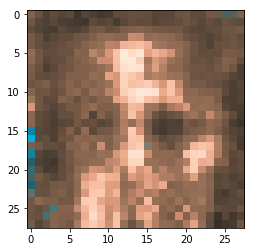

Epoch 1/1... Discriminator Loss: 5.7021... Generator Loss: 0.0033


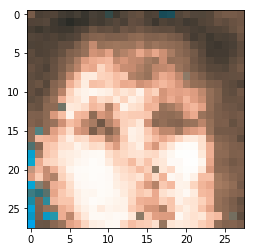

Epoch 1/1... Discriminator Loss: 4.5570... Generator Loss: 0.0106


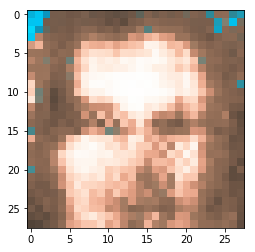

Epoch 1/1... Discriminator Loss: 1.1913... Generator Loss: 0.5300
Epoch 1/1... Discriminator Loss: 0.7415... Generator Loss: 3.3632
Epoch 1/1... Discriminator Loss: 0.9709... Generator Loss: 0.4842
Epoch 1/1... Discriminator Loss: 0.6443... Generator Loss: 0.7454
Epoch 1/1... Discriminator Loss: 0.4865... Generator Loss: 0.9546
Epoch 1/1... Discriminator Loss: 0.5148... Generator Loss: 0.9123
Epoch 1/1... Discriminator Loss: 0.6497... Generator Loss: 0.7990


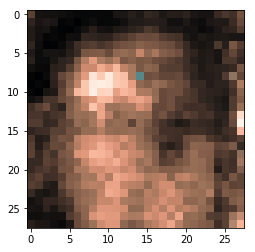

Epoch 1/1... Discriminator Loss: 0.4985... Generator Loss: 1.4916
Epoch 1/1... Discriminator Loss: 3.5072... Generator Loss: 0.0304


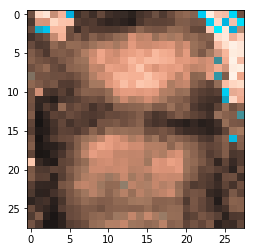

Epoch 1/1... Discriminator Loss: 4.6165... Generator Loss: 6.0543
Epoch 1/1... Discriminator Loss: 2.2981... Generator Loss: 5.2400
Epoch 1/1... Discriminator Loss: 1.3013... Generator Loss: 1.8528
Epoch 1/1... Discriminator Loss: 0.3872... Generator Loss: 1.2124
Epoch 1/1... Discriminator Loss: 0.6804... Generator Loss: 0.7229
Epoch 1/1... Discriminator Loss: 0.5240... Generator Loss: 0.9251
Epoch 1/1... Discriminator Loss: 0.1915... Generator Loss: 1.9236
Epoch 1/1... Discriminator Loss: 0.3158... Generator Loss: 1.7633
Epoch 1/1... Discriminator Loss: 0.3650... Generator Loss: 1.3712
Epoch 1/1... Discriminator Loss: 0.3450... Generator Loss: 1.2911
Epoch 1/1... Discriminator Loss: 0.3574... Generator Loss: 1.4128
Epoch 1/1... Discriminator Loss: 0.2259... Generator Loss: 1.6134
Epoch 1/1... Discriminator Loss: 0.1542... Generator Loss: 1.9571
Epoch 1/1... Discriminator Loss: 0.2222... Generator Loss: 1.7879
Epoch 1/1... Discriminator Loss: 0.0662... Generator Loss: 2.7591
Epoch 1/1.

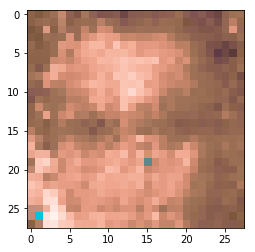

Epoch 1/1... Discriminator Loss: 0.0136... Generator Loss: 4.3046
Epoch 1/1... Discriminator Loss: 8.1439... Generator Loss: 0.0003


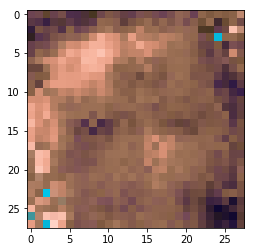

Epoch 1/1... Discriminator Loss: 3.5613... Generator Loss: 9.3780
Epoch 1/1... Discriminator Loss: 0.2570... Generator Loss: 2.3796
Epoch 1/1... Discriminator Loss: 13.0287... Generator Loss: 0.0000


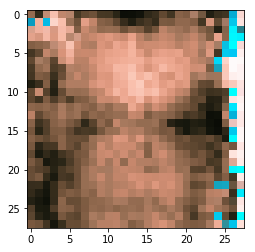

Epoch 1/1... Discriminator Loss: 4.4389... Generator Loss: 6.0577
Epoch 1/1... Discriminator Loss: 1.0300... Generator Loss: 4.1135
Epoch 1/1... Discriminator Loss: 0.1034... Generator Loss: 2.3201
Epoch 1/1... Discriminator Loss: 0.1507... Generator Loss: 1.9671
Epoch 1/1... Discriminator Loss: 0.3194... Generator Loss: 1.5283
Epoch 1/1... Discriminator Loss: 0.5566... Generator Loss: 0.8526
Epoch 1/1... Discriminator Loss: 0.3780... Generator Loss: 1.3575
Epoch 1/1... Discriminator Loss: 0.3321... Generator Loss: 1.2638
Epoch 1/1... Discriminator Loss: 0.3304... Generator Loss: 1.3275
Epoch 1/1... Discriminator Loss: 0.3375... Generator Loss: 1.5548
Epoch 1/1... Discriminator Loss: 1.8582... Generator Loss: 0.1697
Epoch 1/1... Discriminator Loss: 4.1546... Generator Loss: 0.0158


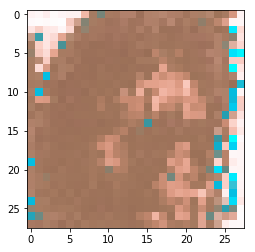

Epoch 1/1... Discriminator Loss: 5.2843... Generator Loss: 0.0055


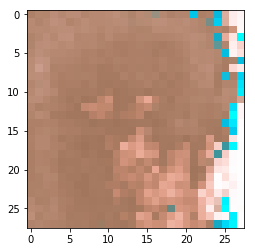

Epoch 1/1... Discriminator Loss: 2.4519... Generator Loss: 5.2257
Epoch 1/1... Discriminator Loss: 0.3673... Generator Loss: 1.2038
Epoch 1/1... Discriminator Loss: 2.1408... Generator Loss: 5.7425
Epoch 1/1... Discriminator Loss: 1.3140... Generator Loss: 5.7630
Epoch 1/1... Discriminator Loss: 0.9616... Generator Loss: 2.5838
Epoch 1/1... Discriminator Loss: 0.3610... Generator Loss: 2.0868
Epoch 1/1... Discriminator Loss: 0.7956... Generator Loss: 0.7417
Epoch 1/1... Discriminator Loss: 0.7840... Generator Loss: 0.6619
Epoch 1/1... Discriminator Loss: 0.5082... Generator Loss: 0.9710
Epoch 1/1... Discriminator Loss: 0.1822... Generator Loss: 2.1396
Epoch 1/1... Discriminator Loss: 0.1656... Generator Loss: 2.3489
Epoch 1/1... Discriminator Loss: 0.1578... Generator Loss: 2.2840
Epoch 1/1... Discriminator Loss: 0.1302... Generator Loss: 3.1271
Epoch 1/1... Discriminator Loss: 0.1238... Generator Loss: 2.4143
Epoch 1/1... Discriminator Loss: 0.0883... Generator Loss: 2.6035
Epoch 1/1.

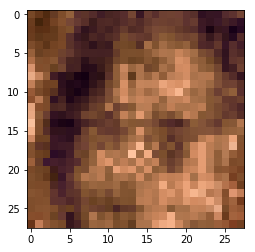

Epoch 1/1... Discriminator Loss: 1.2457... Generator Loss: 0.4507
Epoch 1/1... Discriminator Loss: 1.3679... Generator Loss: 0.5907
Epoch 1/1... Discriminator Loss: 1.6617... Generator Loss: 0.2152
Epoch 1/1... Discriminator Loss: 1.0398... Generator Loss: 0.4476
Epoch 1/1... Discriminator Loss: 0.7931... Generator Loss: 0.7053
Epoch 1/1... Discriminator Loss: 0.4654... Generator Loss: 1.0108
Epoch 1/1... Discriminator Loss: 0.3536... Generator Loss: 1.2144
Epoch 1/1... Discriminator Loss: 0.5330... Generator Loss: 0.9777
Epoch 1/1... Discriminator Loss: 1.2929... Generator Loss: 0.3276
Epoch 1/1... Discriminator Loss: 0.7564... Generator Loss: 0.6366
Epoch 1/1... Discriminator Loss: 0.4828... Generator Loss: 0.9601
Epoch 1/1... Discriminator Loss: 0.2654... Generator Loss: 1.5018
Epoch 1/1... Discriminator Loss: 0.2108... Generator Loss: 1.8659


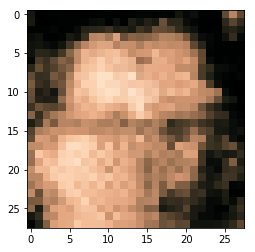

Epoch 1/1... Discriminator Loss: 0.2571... Generator Loss: 1.6266
Epoch 1/1... Discriminator Loss: 0.3385... Generator Loss: 1.2661
Epoch 1/1... Discriminator Loss: 0.2934... Generator Loss: 1.3721
Epoch 1/1... Discriminator Loss: 0.1550... Generator Loss: 2.0596
Epoch 1/1... Discriminator Loss: 0.3242... Generator Loss: 1.3271
Epoch 1/1... Discriminator Loss: 0.2699... Generator Loss: 1.4437
Epoch 1/1... Discriminator Loss: 0.2863... Generator Loss: 1.4841
Epoch 1/1... Discriminator Loss: 0.1522... Generator Loss: 2.1706
Epoch 1/1... Discriminator Loss: 0.0482... Generator Loss: 3.3070
Epoch 1/1... Discriminator Loss: 0.0924... Generator Loss: 2.6075
Epoch 1/1... Discriminator Loss: 0.0977... Generator Loss: 2.4139
Epoch 1/1... Discriminator Loss: 3.3783... Generator Loss: 0.0347


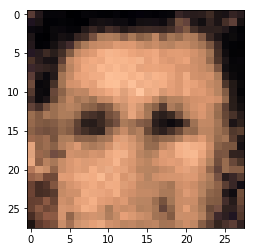

Epoch 1/1... Discriminator Loss: 2.7512... Generator Loss: 8.0790
Epoch 1/1... Discriminator Loss: 0.0239... Generator Loss: 4.5337
Epoch 1/1... Discriminator Loss: 1.8275... Generator Loss: 0.1754
Epoch 1/1... Discriminator Loss: 1.0733... Generator Loss: 0.4184
Epoch 1/1... Discriminator Loss: 0.2013... Generator Loss: 1.9418
Epoch 1/1... Discriminator Loss: 0.1774... Generator Loss: 3.3063
Epoch 1/1... Discriminator Loss: 0.0640... Generator Loss: 3.6445
Epoch 1/1... Discriminator Loss: 0.0297... Generator Loss: 3.5455
Epoch 1/1... Discriminator Loss: 0.2308... Generator Loss: 2.0711
Epoch 1/1... Discriminator Loss: 0.2175... Generator Loss: 1.6469
Epoch 1/1... Discriminator Loss: 0.6652... Generator Loss: 0.7601
Epoch 1/1... Discriminator Loss: 0.4209... Generator Loss: 1.0684
Epoch 1/1... Discriminator Loss: 0.2439... Generator Loss: 1.5306
Epoch 1/1... Discriminator Loss: 0.1495... Generator Loss: 1.9744
Epoch 1/1... Discriminator Loss: 0.0870... Generator Loss: 2.4893
Epoch 1/1.

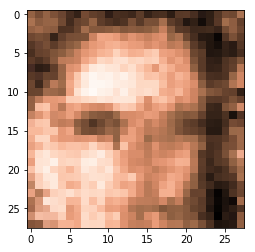

Epoch 1/1... Discriminator Loss: 1.3076... Generator Loss: 2.0510
Epoch 1/1... Discriminator Loss: 0.6004... Generator Loss: 0.9515
Epoch 1/1... Discriminator Loss: 2.4333... Generator Loss: 0.0918


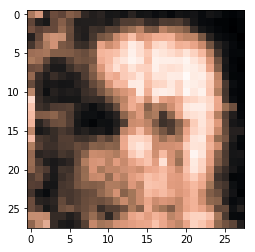

Epoch 1/1... Discriminator Loss: 0.8100... Generator Loss: 0.5885
Epoch 1/1... Discriminator Loss: 1.6583... Generator Loss: 5.4538
Epoch 1/1... Discriminator Loss: 0.9490... Generator Loss: 3.0154
Epoch 1/1... Discriminator Loss: 0.0260... Generator Loss: 3.6763
Epoch 1/1... Discriminator Loss: 0.5577... Generator Loss: 0.8516
Epoch 1/1... Discriminator Loss: 0.2294... Generator Loss: 4.0662
Epoch 1/1... Discriminator Loss: 0.2408... Generator Loss: 1.6744
Epoch 1/1... Discriminator Loss: 1.7783... Generator Loss: 0.1850
Epoch 1/1... Discriminator Loss: 3.7412... Generator Loss: 11.1358
Epoch 1/1... Discriminator Loss: 0.0021... Generator Loss: 6.2618
Epoch 1/1... Discriminator Loss: 3.2024... Generator Loss: 0.0415


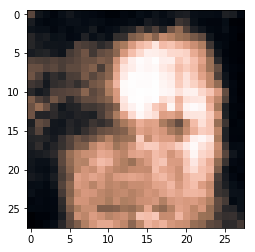

Epoch 1/1... Discriminator Loss: 1.2536... Generator Loss: 0.3863
Epoch 1/1... Discriminator Loss: 0.0677... Generator Loss: 4.0234
Epoch 1/1... Discriminator Loss: 3.2726... Generator Loss: 0.0402


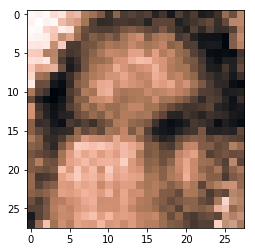

Epoch 1/1... Discriminator Loss: 4.0129... Generator Loss: 0.0182


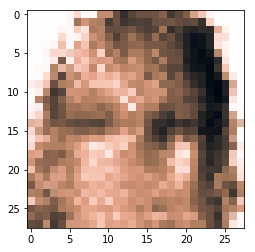

Epoch 1/1... Discriminator Loss: 1.9851... Generator Loss: 0.1524
Epoch 1/1... Discriminator Loss: 1.8933... Generator Loss: 0.1711
Epoch 1/1... Discriminator Loss: 1.6335... Generator Loss: 4.2887
Epoch 1/1... Discriminator Loss: 0.6245... Generator Loss: 3.9416
Epoch 1/1... Discriminator Loss: 1.4517... Generator Loss: 0.3512
Epoch 1/1... Discriminator Loss: 1.2219... Generator Loss: 0.5597
Epoch 1/1... Discriminator Loss: 0.4757... Generator Loss: 1.0755
Epoch 1/1... Discriminator Loss: 0.8358... Generator Loss: 0.7054
Epoch 1/1... Discriminator Loss: 1.8154... Generator Loss: 7.0493
Epoch 1/1... Discriminator Loss: 0.7272... Generator Loss: 5.1549
Epoch 1/1... Discriminator Loss: 0.1378... Generator Loss: 3.7197
Epoch 1/1... Discriminator Loss: 0.4046... Generator Loss: 1.1516
Epoch 1/1... Discriminator Loss: 0.5020... Generator Loss: 0.9465
Epoch 1/1... Discriminator Loss: 1.0279... Generator Loss: 0.4759
Epoch 1/1... Discriminator Loss: 0.5156... Generator Loss: 0.9644
Epoch 1/1.

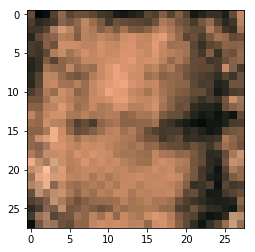

Epoch 1/1... Discriminator Loss: 0.2983... Generator Loss: 2.7099
Epoch 1/1... Discriminator Loss: 0.2943... Generator Loss: 1.5133
Epoch 1/1... Discriminator Loss: 0.6204... Generator Loss: 0.7765
Epoch 1/1... Discriminator Loss: 0.4120... Generator Loss: 1.1002
Epoch 1/1... Discriminator Loss: 0.3121... Generator Loss: 1.3598
Epoch 1/1... Discriminator Loss: 1.3568... Generator Loss: 1.0530
Epoch 1/1... Discriminator Loss: 0.2373... Generator Loss: 1.8495
Epoch 1/1... Discriminator Loss: 1.0687... Generator Loss: 0.4386
Epoch 1/1... Discriminator Loss: 1.4190... Generator Loss: 0.4103
Epoch 1/1... Discriminator Loss: 1.2323... Generator Loss: 3.3010
Epoch 1/1... Discriminator Loss: 3.1422... Generator Loss: 0.0442


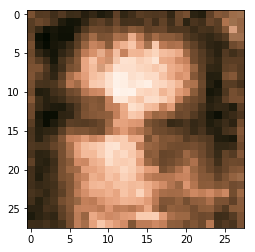

Epoch 1/1... Discriminator Loss: 0.2155... Generator Loss: 1.6405
Epoch 1/1... Discriminator Loss: 0.1030... Generator Loss: 2.3248
Epoch 1/1... Discriminator Loss: 0.6274... Generator Loss: 0.7649
Epoch 1/1... Discriminator Loss: 1.2424... Generator Loss: 0.3419
Epoch 1/1... Discriminator Loss: 4.6127... Generator Loss: 0.0102


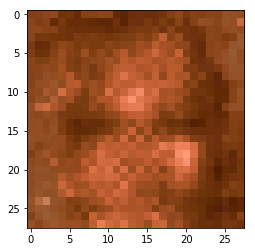

Epoch 1/1... Discriminator Loss: 0.0040... Generator Loss: 6.2991
Epoch 1/1... Discriminator Loss: 0.0501... Generator Loss: 7.9340
Epoch 1/1... Discriminator Loss: 0.0253... Generator Loss: 3.6906
Epoch 1/1... Discriminator Loss: 0.1617... Generator Loss: 1.9018


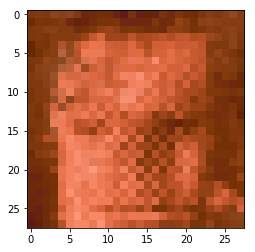

Epoch 1/1... Discriminator Loss: 0.2006... Generator Loss: 1.7053
Epoch 1/1... Discriminator Loss: 0.3981... Generator Loss: 1.1136
Epoch 1/1... Discriminator Loss: 0.1117... Generator Loss: 2.2475
Epoch 1/1... Discriminator Loss: 0.0824... Generator Loss: 2.5376
Epoch 1/1... Discriminator Loss: 0.0713... Generator Loss: 2.6765
Epoch 1/1... Discriminator Loss: 2.3967... Generator Loss: 0.0954


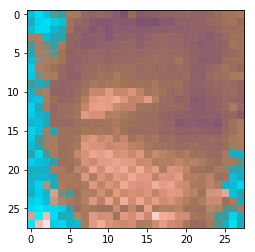

Epoch 1/1... Discriminator Loss: 2.4447... Generator Loss: 0.0907


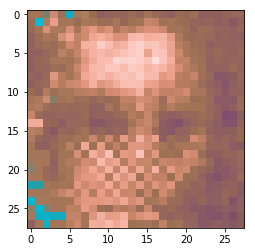

Epoch 1/1... Discriminator Loss: 0.1582... Generator Loss: 1.9218
Epoch 1/1... Discriminator Loss: 0.3271... Generator Loss: 1.6577
Epoch 1/1... Discriminator Loss: 2.6220... Generator Loss: 0.0760


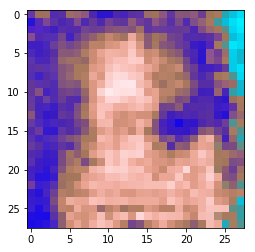

Epoch 1/1... Discriminator Loss: 0.1782... Generator Loss: 3.1739
Epoch 1/1... Discriminator Loss: 0.3455... Generator Loss: 3.3460
Epoch 1/1... Discriminator Loss: 0.2192... Generator Loss: 1.6254
Epoch 1/1... Discriminator Loss: 1.8079... Generator Loss: 0.1791
Epoch 1/1... Discriminator Loss: 0.5653... Generator Loss: 0.8404
Epoch 1/1... Discriminator Loss: 1.8043... Generator Loss: 0.1798
Epoch 1/1... Discriminator Loss: 0.0527... Generator Loss: 3.0075
Epoch 1/1... Discriminator Loss: 0.5917... Generator Loss: 6.0716
Epoch 1/1... Discriminator Loss: 0.0202... Generator Loss: 4.1543
Epoch 1/1... Discriminator Loss: 4.2555... Generator Loss: 0.0143


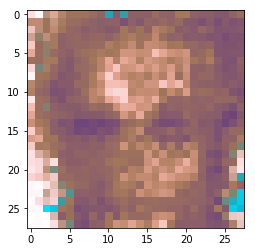

Epoch 1/1... Discriminator Loss: 2.1702... Generator Loss: 12.2190
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 14.4172
Epoch 1/1... Discriminator Loss: 0.0004... Generator Loss: 7.7375
Epoch 1/1... Discriminator Loss: 0.0041... Generator Loss: 5.5067
Epoch 1/1... Discriminator Loss: 0.0390... Generator Loss: 3.2630
Epoch 1/1... Discriminator Loss: 0.0484... Generator Loss: 3.0532
Epoch 1/1... Discriminator Loss: 1.1149... Generator Loss: 0.3974
Epoch 1/1... Discriminator Loss: 0.0060... Generator Loss: 5.1292
Epoch 1/1... Discriminator Loss: 0.6774... Generator Loss: 5.5925
Epoch 1/1... Discriminator Loss: 0.0787... Generator Loss: 2.8202
Epoch 1/1... Discriminator Loss: 12.0746... Generator Loss: 0.0000


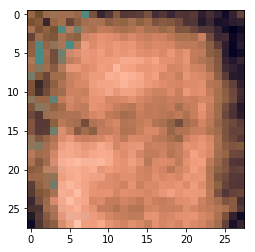

Epoch 1/1... Discriminator Loss: 5.7694... Generator Loss: 3.2335
Epoch 1/1... Discriminator Loss: 2.7153... Generator Loss: 1.8295
Epoch 1/1... Discriminator Loss: 1.6307... Generator Loss: 0.4285
Epoch 1/1... Discriminator Loss: 1.7774... Generator Loss: 0.2420
Epoch 1/1... Discriminator Loss: 1.6465... Generator Loss: 1.2423
Epoch 1/1... Discriminator Loss: 0.9455... Generator Loss: 1.0370
Epoch 1/1... Discriminator Loss: 1.1760... Generator Loss: 0.4792
Epoch 1/1... Discriminator Loss: 1.5461... Generator Loss: 2.6961
Epoch 1/1... Discriminator Loss: 0.6325... Generator Loss: 0.8587
Epoch 1/1... Discriminator Loss: 0.9205... Generator Loss: 0.5710
Epoch 1/1... Discriminator Loss: 1.7775... Generator Loss: 1.8439
Epoch 1/1... Discriminator Loss: 0.9413... Generator Loss: 0.4970
Epoch 1/1... Discriminator Loss: 0.4957... Generator Loss: 0.9697
Epoch 1/1... Discriminator Loss: 0.6729... Generator Loss: 1.0850
Epoch 1/1... Discriminator Loss: 0.7467... Generator Loss: 0.6425
Epoch 1/1.

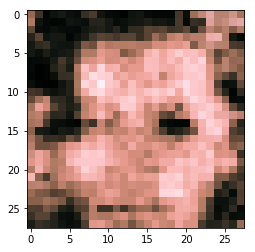

Epoch 1/1... Discriminator Loss: 2.2545... Generator Loss: 3.0480
Epoch 1/1... Discriminator Loss: 0.1753... Generator Loss: 2.0277
Epoch 1/1... Discriminator Loss: 0.5590... Generator Loss: 0.8484
Epoch 1/1... Discriminator Loss: 0.7860... Generator Loss: 0.6102
Epoch 1/1... Discriminator Loss: 0.1175... Generator Loss: 2.4315
Epoch 1/1... Discriminator Loss: 0.2395... Generator Loss: 1.6247
Epoch 1/1... Discriminator Loss: 11.5326... Generator Loss: 0.0000


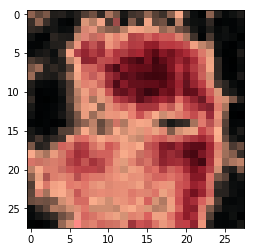

Epoch 1/1... Discriminator Loss: 9.7793... Generator Loss: 16.7520
Epoch 1/1... Discriminator Loss: 3.8986... Generator Loss: 5.5065
Epoch 1/1... Discriminator Loss: 0.6877... Generator Loss: 0.6987
Epoch 1/1... Discriminator Loss: 1.8512... Generator Loss: 0.1717
Epoch 1/1... Discriminator Loss: 0.2953... Generator Loss: 1.3638
Epoch 1/1... Discriminator Loss: 0.0483... Generator Loss: 3.0539
Epoch 1/1... Discriminator Loss: 0.2818... Generator Loss: 1.5182
Epoch 1/1... Discriminator Loss: 0.3372... Generator Loss: 1.2510
Epoch 1/1... Discriminator Loss: 0.0565... Generator Loss: 3.2383
Epoch 1/1... Discriminator Loss: 13.2501... Generator Loss: 0.0000


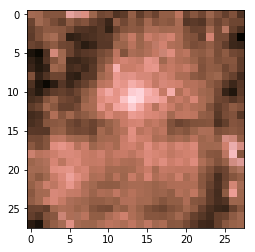

Epoch 1/1... Discriminator Loss: 2.8442... Generator Loss: 2.7582
Epoch 1/1... Discriminator Loss: 0.9656... Generator Loss: 0.9351
Epoch 1/1... Discriminator Loss: 1.5382... Generator Loss: 0.2800
Epoch 1/1... Discriminator Loss: 1.1398... Generator Loss: 0.4441
Epoch 1/1... Discriminator Loss: 1.6145... Generator Loss: 2.8601
Epoch 1/1... Discriminator Loss: 1.8353... Generator Loss: 0.1795
Epoch 1/1... Discriminator Loss: 1.2793... Generator Loss: 0.4190
Epoch 1/1... Discriminator Loss: 1.0270... Generator Loss: 1.1581
Epoch 1/1... Discriminator Loss: 0.4378... Generator Loss: 1.9889
Epoch 1/1... Discriminator Loss: 0.9754... Generator Loss: 0.8327
Epoch 1/1... Discriminator Loss: 0.6385... Generator Loss: 0.8536
Epoch 1/1... Discriminator Loss: 1.0712... Generator Loss: 0.5983
Epoch 1/1... Discriminator Loss: 0.9252... Generator Loss: 0.9631
Epoch 1/1... Discriminator Loss: 0.7179... Generator Loss: 0.8834
Epoch 1/1... Discriminator Loss: 0.9856... Generator Loss: 0.7625
Epoch 1/1.

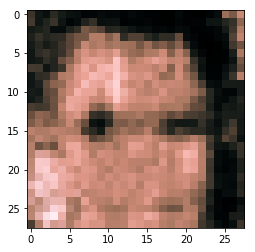

Epoch 1/1... Discriminator Loss: 1.2221... Generator Loss: 0.5181
Epoch 1/1... Discriminator Loss: 0.9354... Generator Loss: 0.7862
Epoch 1/1... Discriminator Loss: 1.0615... Generator Loss: 0.7861
Epoch 1/1... Discriminator Loss: 1.4403... Generator Loss: 1.2844
Epoch 1/1... Discriminator Loss: 1.0887... Generator Loss: 0.8758
Epoch 1/1... Discriminator Loss: 1.4835... Generator Loss: 0.4632
Epoch 1/1... Discriminator Loss: 0.9590... Generator Loss: 0.7856
Epoch 1/1... Discriminator Loss: 0.6313... Generator Loss: 1.3327
Epoch 1/1... Discriminator Loss: 0.9566... Generator Loss: 0.5997
Epoch 1/1... Discriminator Loss: 0.1344... Generator Loss: 2.2942
Epoch 1/1... Discriminator Loss: 1.2115... Generator Loss: 0.3709
Epoch 1/1... Discriminator Loss: 0.7625... Generator Loss: 0.6437
Epoch 1/1... Discriminator Loss: 0.6625... Generator Loss: 1.2195
Epoch 1/1... Discriminator Loss: 0.3089... Generator Loss: 1.3328
Epoch 1/1... Discriminator Loss: 0.4910... Generator Loss: 1.1286
Epoch 1/1.

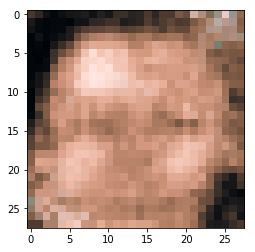

Epoch 1/1... Discriminator Loss: 0.5617... Generator Loss: 1.9350
Epoch 1/1... Discriminator Loss: 0.1718... Generator Loss: 2.8745
Epoch 1/1... Discriminator Loss: 0.4276... Generator Loss: 1.4296
Epoch 1/1... Discriminator Loss: 0.3673... Generator Loss: 1.1897
Epoch 1/1... Discriminator Loss: 0.9998... Generator Loss: 0.5506
Epoch 1/1... Discriminator Loss: 0.4951... Generator Loss: 0.9671
Epoch 1/1... Discriminator Loss: 0.6114... Generator Loss: 1.0244
Epoch 1/1... Discriminator Loss: 0.5271... Generator Loss: 1.3626
Epoch 1/1... Discriminator Loss: 0.7566... Generator Loss: 1.1257
Epoch 1/1... Discriminator Loss: 0.5329... Generator Loss: 1.1273
Epoch 1/1... Discriminator Loss: 0.3680... Generator Loss: 1.5830
Epoch 1/1... Discriminator Loss: 2.0911... Generator Loss: 0.1533
Epoch 1/1... Discriminator Loss: 1.4804... Generator Loss: 0.3980
Epoch 1/1... Discriminator Loss: 0.9923... Generator Loss: 3.5403
Epoch 1/1... Discriminator Loss: 0.3358... Generator Loss: 1.8537
Epoch 1/1.

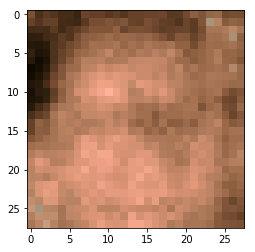

Epoch 1/1... Discriminator Loss: 0.1352... Generator Loss: 2.0788
Epoch 1/1... Discriminator Loss: 0.1042... Generator Loss: 3.0992
Epoch 1/1... Discriminator Loss: 0.0078... Generator Loss: 5.3142
Epoch 1/1... Discriminator Loss: 0.0119... Generator Loss: 4.5805
Epoch 1/1... Discriminator Loss: 0.0224... Generator Loss: 3.9454
Epoch 1/1... Discriminator Loss: 0.1982... Generator Loss: 1.7165
Epoch 1/1... Discriminator Loss: 0.2993... Generator Loss: 1.3527
Epoch 1/1... Discriminator Loss: 0.0908... Generator Loss: 2.4503
Epoch 1/1... Discriminator Loss: 0.0329... Generator Loss: 3.4406
Epoch 1/1... Discriminator Loss: 0.5691... Generator Loss: 0.8349
Epoch 1/1... Discriminator Loss: 1.5016... Generator Loss: 0.2520
Epoch 1/1... Discriminator Loss: 2.5911... Generator Loss: 41.4969
Epoch 1/1... Discriminator Loss: 2.5754... Generator Loss: 22.8459
Epoch 1/1... Discriminator Loss: 0.0018... Generator Loss: 10.1275
Epoch 1/1... Discriminator Loss: 0.0292... Generator Loss: 3.5550
Epoch 1

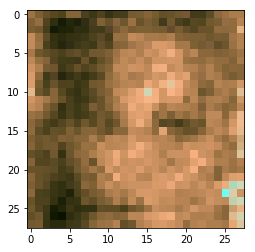

Epoch 1/1... Discriminator Loss: 3.5465... Generator Loss: 0.9555
Epoch 1/1... Discriminator Loss: 8.3579... Generator Loss: 0.0002


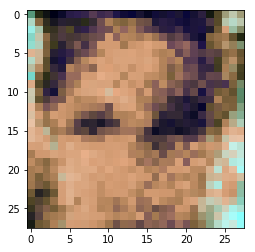

Epoch 1/1... Discriminator Loss: 4.0382... Generator Loss: 2.9497
Epoch 1/1... Discriminator Loss: 2.1206... Generator Loss: 0.1919
Epoch 1/1... Discriminator Loss: 1.5059... Generator Loss: 0.2567
Epoch 1/1... Discriminator Loss: 0.5919... Generator Loss: 0.9995
Epoch 1/1... Discriminator Loss: 2.6087... Generator Loss: 5.7153
Epoch 1/1... Discriminator Loss: 0.2530... Generator Loss: 3.9285
Epoch 1/1... Discriminator Loss: 0.9524... Generator Loss: 2.0721
Epoch 1/1... Discriminator Loss: 0.4524... Generator Loss: 1.0500
Epoch 1/1... Discriminator Loss: 0.6890... Generator Loss: 0.7022
Epoch 1/1... Discriminator Loss: 0.5159... Generator Loss: 0.9101
Epoch 1/1... Discriminator Loss: 0.4365... Generator Loss: 1.0477
Epoch 1/1... Discriminator Loss: 0.3586... Generator Loss: 1.2374
Epoch 1/1... Discriminator Loss: 0.3464... Generator Loss: 1.2969
Epoch 1/1... Discriminator Loss: 0.2429... Generator Loss: 1.8665
Epoch 1/1... Discriminator Loss: 0.3172... Generator Loss: 1.4033
Epoch 1/1.

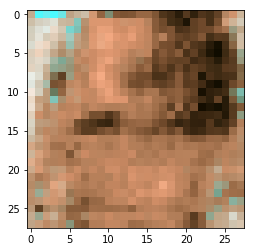

Epoch 1/1... Discriminator Loss: 2.3640... Generator Loss: 3.6350
Epoch 1/1... Discriminator Loss: 1.0106... Generator Loss: 0.4525
Epoch 1/1... Discriminator Loss: 4.8227... Generator Loss: 0.0081


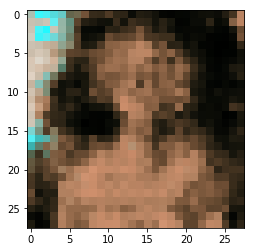

Epoch 1/1... Discriminator Loss: 0.3859... Generator Loss: 1.1390
Epoch 1/1... Discriminator Loss: 0.2879... Generator Loss: 1.6155
Epoch 1/1... Discriminator Loss: 1.0698... Generator Loss: 0.4202
Epoch 1/1... Discriminator Loss: 7.2202... Generator Loss: 0.0007


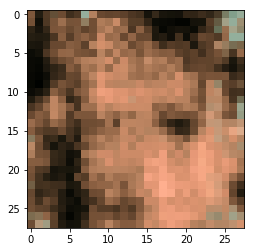

Epoch 1/1... Discriminator Loss: 29.0979... Generator Loss: 0.0000


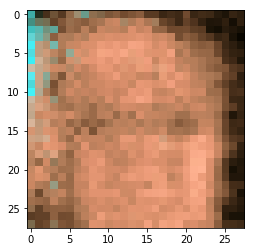

Epoch 1/1... Discriminator Loss: 0.0566... Generator Loss: 2.8997
Epoch 1/1... Discriminator Loss: 3.2992... Generator Loss: 0.0376


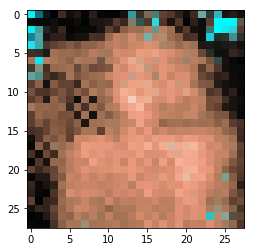

Epoch 1/1... Discriminator Loss: 2.5189... Generator Loss: 0.0840


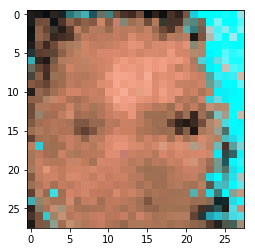

Epoch 1/1... Discriminator Loss: 31.3821... Generator Loss: 0.0000


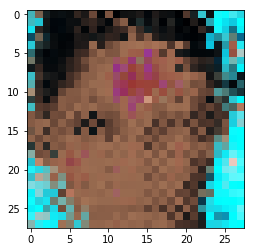

Epoch 1/1... Discriminator Loss: 19.2730... Generator Loss: 19.4011
Epoch 1/1... Discriminator Loss: 1.4966... Generator Loss: 0.4612
Epoch 1/1... Discriminator Loss: 2.2270... Generator Loss: 0.1148
Epoch 1/1... Discriminator Loss: 10.6455... Generator Loss: 18.1710
Epoch 1/1... Discriminator Loss: 0.3382... Generator Loss: 12.1141
Epoch 1/1... Discriminator Loss: 0.6518... Generator Loss: 0.7363
Epoch 1/1... Discriminator Loss: 1.1744... Generator Loss: 0.3696
Epoch 1/1... Discriminator Loss: 0.2185... Generator Loss: 1.6283
Epoch 1/1... Discriminator Loss: 0.0493... Generator Loss: 3.0437
Epoch 1/1... Discriminator Loss: 0.0417... Generator Loss: 3.2131
Epoch 1/1... Discriminator Loss: 0.0918... Generator Loss: 2.4336
Epoch 1/1... Discriminator Loss: 0.0789... Generator Loss: 2.5916
Epoch 1/1... Discriminator Loss: 0.3282... Generator Loss: 1.2743
Epoch 1/1... Discriminator Loss: 0.0778... Generator Loss: 2.5958
Epoch 1/1... Discriminator Loss: 0.1275... Generator Loss: 2.1351
Epoch

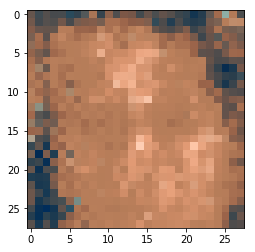

Epoch 1/1... Discriminator Loss: 0.7002... Generator Loss: 1.7628
Epoch 1/1... Discriminator Loss: 0.3898... Generator Loss: 1.6341
Epoch 1/1... Discriminator Loss: 0.6514... Generator Loss: 0.7554
Epoch 1/1... Discriminator Loss: 0.4378... Generator Loss: 1.0395
Epoch 1/1... Discriminator Loss: 0.2237... Generator Loss: 1.6235


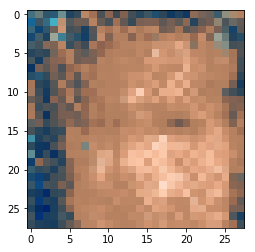

Epoch 1/1... Discriminator Loss: 0.5698... Generator Loss: 1.0696
Epoch 1/1... Discriminator Loss: 0.2848... Generator Loss: 1.4989
Epoch 1/1... Discriminator Loss: 4.1376... Generator Loss: 0.0161


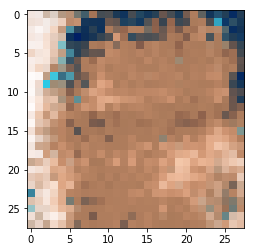

Epoch 1/1... Discriminator Loss: 2.0933... Generator Loss: 1.7016
Epoch 1/1... Discriminator Loss: 0.4996... Generator Loss: 0.9702
Epoch 1/1... Discriminator Loss: 0.5874... Generator Loss: 0.8285
Epoch 1/1... Discriminator Loss: 0.4453... Generator Loss: 1.1052
Epoch 1/1... Discriminator Loss: 0.2807... Generator Loss: 1.8557
Epoch 1/1... Discriminator Loss: 0.2560... Generator Loss: 2.0501
Epoch 1/1... Discriminator Loss: 0.2169... Generator Loss: 1.8056
Epoch 1/1... Discriminator Loss: 1.5905... Generator Loss: 0.2320
Epoch 1/1... Discriminator Loss: 0.6324... Generator Loss: 0.8459
Epoch 1/1... Discriminator Loss: 0.4314... Generator Loss: 1.7354
Epoch 1/1... Discriminator Loss: 0.6224... Generator Loss: 0.9634
Epoch 1/1... Discriminator Loss: 2.7443... Generator Loss: 0.0672


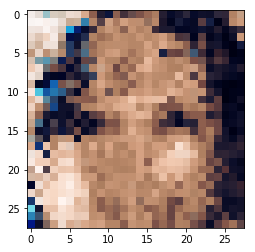

Epoch 1/1... Discriminator Loss: 3.3899... Generator Loss: 6.2454
Epoch 1/1... Discriminator Loss: 0.3882... Generator Loss: 1.1465
Epoch 1/1... Discriminator Loss: 1.0309... Generator Loss: 0.4462
Epoch 1/1... Discriminator Loss: 0.4137... Generator Loss: 1.3227
Epoch 1/1... Discriminator Loss: 0.1494... Generator Loss: 2.5286
Epoch 1/1... Discriminator Loss: 3.9677... Generator Loss: 0.0192


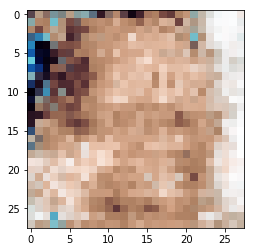

Epoch 1/1... Discriminator Loss: 1.4285... Generator Loss: 0.2751
Epoch 1/1... Discriminator Loss: 0.5399... Generator Loss: 0.8777
Epoch 1/1... Discriminator Loss: 1.5738... Generator Loss: 10.7758
Epoch 1/1... Discriminator Loss: 1.8742... Generator Loss: 0.1666
Epoch 1/1... Discriminator Loss: 1.6793... Generator Loss: 0.2069
Epoch 1/1... Discriminator Loss: 0.2078... Generator Loss: 1.6892
Epoch 1/1... Discriminator Loss: 29.7922... Generator Loss: 0.0000


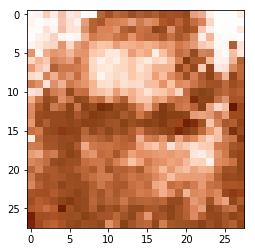

Epoch 1/1... Discriminator Loss: 4.9370... Generator Loss: 18.6318
Epoch 1/1... Discriminator Loss: 1.2782... Generator Loss: 10.1804
Epoch 1/1... Discriminator Loss: 0.0788... Generator Loss: 2.5814
Epoch 1/1... Discriminator Loss: 0.1006... Generator Loss: 5.0621
Epoch 1/1... Discriminator Loss: 0.2604... Generator Loss: 1.4730
Epoch 1/1... Discriminator Loss: 0.9268... Generator Loss: 0.5039
Epoch 1/1... Discriminator Loss: 6.9720... Generator Loss: 17.4177
Epoch 1/1... Discriminator Loss: 4.6271... Generator Loss: 0.0098


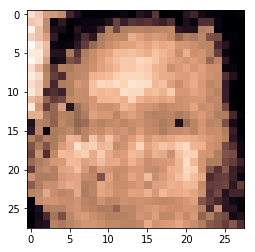

Epoch 1/1... Discriminator Loss: 0.2630... Generator Loss: 4.4793
Epoch 1/1... Discriminator Loss: 5.4809... Generator Loss: 0.0042


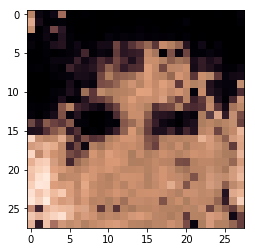

Epoch 1/1... Discriminator Loss: 0.0392... Generator Loss: 3.5381
Epoch 1/1... Discriminator Loss: 0.0208... Generator Loss: 3.9807
Epoch 1/1... Discriminator Loss: 5.0277... Generator Loss: 0.0066


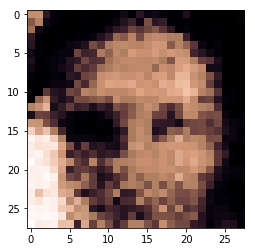

Epoch 1/1... Discriminator Loss: 3.1099... Generator Loss: 0.0457


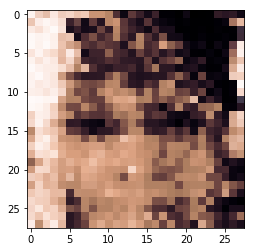

Epoch 1/1... Discriminator Loss: 0.1584... Generator Loss: 15.6675
Epoch 1/1... Discriminator Loss: 2.5697... Generator Loss: 0.0800


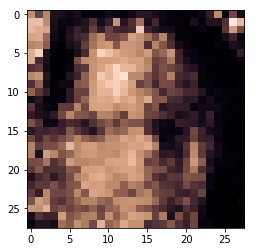

Epoch 1/1... Discriminator Loss: 4.7538... Generator Loss: 0.0087


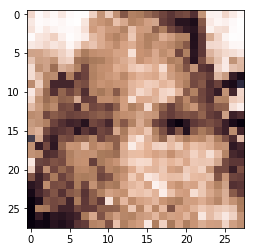

Epoch 1/1... Discriminator Loss: 0.8201... Generator Loss: 5.2470
Epoch 1/1... Discriminator Loss: 1.0020... Generator Loss: 0.5029
Epoch 1/1... Discriminator Loss: 1.4904... Generator Loss: 0.2555
Epoch 1/1... Discriminator Loss: 0.4178... Generator Loss: 1.0800
Epoch 1/1... Discriminator Loss: 0.6109... Generator Loss: 0.8699
Epoch 1/1... Discriminator Loss: 2.4783... Generator Loss: 0.0879


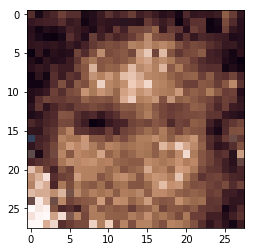

Epoch 1/1... Discriminator Loss: 0.9452... Generator Loss: 0.6528
Epoch 1/1... Discriminator Loss: 0.9870... Generator Loss: 2.6424
Epoch 1/1... Discriminator Loss: 0.0964... Generator Loss: 2.8153
Epoch 1/1... Discriminator Loss: 1.1243... Generator Loss: 0.3978
Epoch 1/1... Discriminator Loss: 1.2734... Generator Loss: 0.3512
Epoch 1/1... Discriminator Loss: 2.2955... Generator Loss: 4.6032
Epoch 1/1... Discriminator Loss: 0.3063... Generator Loss: 1.3326
Epoch 1/1... Discriminator Loss: 2.3300... Generator Loss: 0.1105
Epoch 1/1... Discriminator Loss: 36.0626... Generator Loss: 0.0000


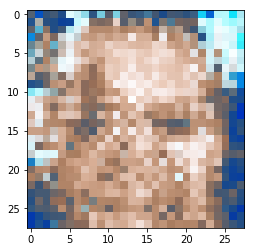

Epoch 1/1... Discriminator Loss: 3.3695... Generator Loss: 11.3151
Epoch 1/1... Discriminator Loss: 0.3499... Generator Loss: 3.3986
Epoch 1/1... Discriminator Loss: 6.3790... Generator Loss: 0.0017


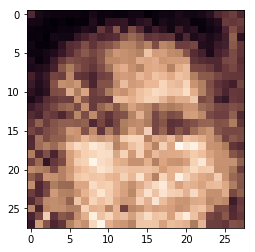

Epoch 1/1... Discriminator Loss: 3.9041... Generator Loss: 0.0204


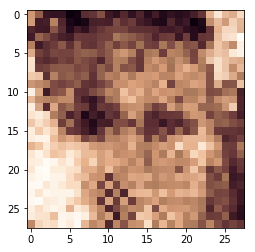

Epoch 1/1... Discriminator Loss: 1.1766... Generator Loss: 2.0309
Epoch 1/1... Discriminator Loss: 2.6141... Generator Loss: 0.0965


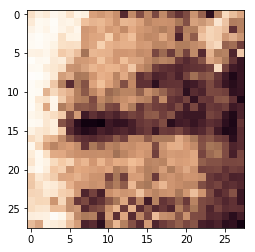

Epoch 1/1... Discriminator Loss: 1.2278... Generator Loss: 0.6164
Epoch 1/1... Discriminator Loss: 2.0482... Generator Loss: 0.1729
Epoch 1/1... Discriminator Loss: 2.1598... Generator Loss: 0.1583
Epoch 1/1... Discriminator Loss: 1.8921... Generator Loss: 0.2226
Epoch 1/1... Discriminator Loss: 2.4990... Generator Loss: 0.4460
Epoch 1/1... Discriminator Loss: 2.2260... Generator Loss: 0.1163
Epoch 1/1... Discriminator Loss: 1.5276... Generator Loss: 0.2519
Epoch 1/1... Discriminator Loss: 1.7589... Generator Loss: 3.2795
Epoch 1/1... Discriminator Loss: 1.9033... Generator Loss: 0.1668
Epoch 1/1... Discriminator Loss: 1.3496... Generator Loss: 0.3466
Epoch 1/1... Discriminator Loss: 2.8452... Generator Loss: 1.7783
Epoch 1/1... Discriminator Loss: 1.6335... Generator Loss: 0.2177
Epoch 1/1... Discriminator Loss: 1.5700... Generator Loss: 0.2349
Epoch 1/1... Discriminator Loss: 0.8754... Generator Loss: 0.5514
Epoch 1/1... Discriminator Loss: 5.2852... Generator Loss: 0.3773
Epoch 1/1.

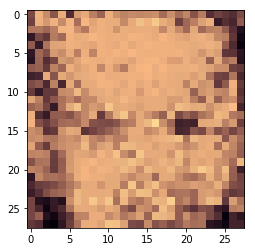

Epoch 1/1... Discriminator Loss: 2.0499... Generator Loss: 0.1396
Epoch 1/1... Discriminator Loss: 0.9574... Generator Loss: 0.5970
Epoch 1/1... Discriminator Loss: 1.0887... Generator Loss: 1.3376
Epoch 1/1... Discriminator Loss: 0.8840... Generator Loss: 0.5806
Epoch 1/1... Discriminator Loss: 1.8025... Generator Loss: 0.2019
Epoch 1/1... Discriminator Loss: 1.1306... Generator Loss: 0.4106
Epoch 1/1... Discriminator Loss: 0.4655... Generator Loss: 1.0182
Epoch 1/1... Discriminator Loss: 0.8730... Generator Loss: 0.6621
Epoch 1/1... Discriminator Loss: 0.1991... Generator Loss: 1.8747
Epoch 1/1... Discriminator Loss: 0.1903... Generator Loss: 1.8682
Epoch 1/1... Discriminator Loss: 1.5227... Generator Loss: 0.2461
Epoch 1/1... Discriminator Loss: 1.2151... Generator Loss: 0.3525
Epoch 1/1... Discriminator Loss: 0.8692... Generator Loss: 0.5562
Epoch 1/1... Discriminator Loss: 0.4577... Generator Loss: 1.0086
Epoch 1/1... Discriminator Loss: 0.2502... Generator Loss: 1.5172
Epoch 1/1.

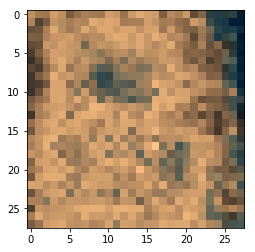

Epoch 1/1... Discriminator Loss: 0.0354... Generator Loss: 3.5094
Epoch 1/1... Discriminator Loss: 0.0393... Generator Loss: 3.4836
Epoch 1/1... Discriminator Loss: 0.0259... Generator Loss: 3.6896
Epoch 1/1... Discriminator Loss: 0.0581... Generator Loss: 2.8844
Epoch 1/1... Discriminator Loss: 0.2340... Generator Loss: 1.5728
Epoch 1/1... Discriminator Loss: 1.2529... Generator Loss: 0.3423
Epoch 1/1... Discriminator Loss: 0.1400... Generator Loss: 2.5494
Epoch 1/1... Discriminator Loss: 0.0173... Generator Loss: 5.7648
Epoch 1/1... Discriminator Loss: 0.2439... Generator Loss: 1.5475
Epoch 1/1... Discriminator Loss: 2.9970... Generator Loss: 0.0512


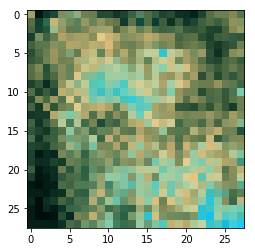

Epoch 1/1... Discriminator Loss: 3.4321... Generator Loss: 0.0329


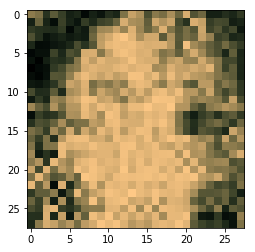

Epoch 1/1... Discriminator Loss: 0.1928... Generator Loss: 2.0014
Epoch 1/1... Discriminator Loss: 0.2162... Generator Loss: 1.9248
Epoch 1/1... Discriminator Loss: 0.0991... Generator Loss: 2.3631
Epoch 1/1... Discriminator Loss: 5.2317... Generator Loss: 0.0054


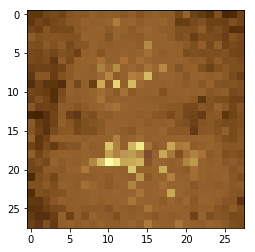

Epoch 1/1... Discriminator Loss: 20.0858... Generator Loss: 0.0000


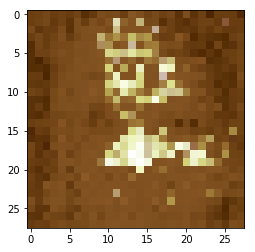

Epoch 1/1... Discriminator Loss: 7.6165... Generator Loss: 1.2043
Epoch 1/1... Discriminator Loss: 14.9330... Generator Loss: 26.8421
Epoch 1/1... Discriminator Loss: 2.5680... Generator Loss: 14.6481
Epoch 1/1... Discriminator Loss: 1.3344... Generator Loss: 1.1448
Epoch 1/1... Discriminator Loss: 3.0133... Generator Loss: 0.0520


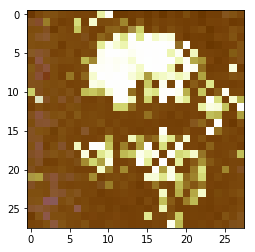

Epoch 1/1... Discriminator Loss: 1.3059... Generator Loss: 10.9657
Epoch 1/1... Discriminator Loss: 0.2749... Generator Loss: 6.5629
Epoch 1/1... Discriminator Loss: 0.2002... Generator Loss: 1.9537
Epoch 1/1... Discriminator Loss: 0.6551... Generator Loss: 0.7553
Epoch 1/1... Discriminator Loss: 0.7743... Generator Loss: 0.6784
Epoch 1/1... Discriminator Loss: 0.5801... Generator Loss: 0.8987
Epoch 1/1... Discriminator Loss: 0.3474... Generator Loss: 1.7113
Epoch 1/1... Discriminator Loss: 0.7723... Generator Loss: 0.6506
Epoch 1/1... Discriminator Loss: 0.5579... Generator Loss: 0.8498
Epoch 1/1... Discriminator Loss: 0.2453... Generator Loss: 1.5254
Epoch 1/1... Discriminator Loss: 0.1923... Generator Loss: 1.7442
Epoch 1/1... Discriminator Loss: 0.0568... Generator Loss: 2.9841
Epoch 1/1... Discriminator Loss: 0.0288... Generator Loss: 3.6733
Epoch 1/1... Discriminator Loss: 0.0731... Generator Loss: 3.1190
Epoch 1/1... Discriminator Loss: 0.4168... Generator Loss: 1.0912
Epoch 1/1

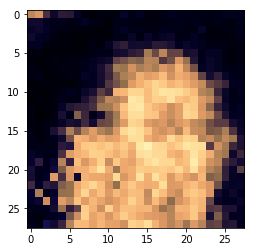

Epoch 1/1... Discriminator Loss: 1.0542... Generator Loss: 0.5701
Epoch 1/1... Discriminator Loss: 0.5427... Generator Loss: 1.7046
Epoch 1/1... Discriminator Loss: 0.7558... Generator Loss: 0.9404
Epoch 1/1... Discriminator Loss: 1.4695... Generator Loss: 0.2872
Epoch 1/1... Discriminator Loss: 0.8639... Generator Loss: 0.5701
Epoch 1/1... Discriminator Loss: 0.8573... Generator Loss: 1.6660
Epoch 1/1... Discriminator Loss: 0.3868... Generator Loss: 2.0724
Epoch 1/1... Discriminator Loss: 0.9533... Generator Loss: 0.5017
Epoch 1/1... Discriminator Loss: 2.0632... Generator Loss: 0.1485
Epoch 1/1... Discriminator Loss: 0.5258... Generator Loss: 1.0593
Epoch 1/1... Discriminator Loss: 0.4522... Generator Loss: 1.4220
Epoch 1/1... Discriminator Loss: 0.9857... Generator Loss: 0.5307
Epoch 1/1... Discriminator Loss: 1.5148... Generator Loss: 0.2681
Epoch 1/1... Discriminator Loss: 0.0144... Generator Loss: 4.4237
Epoch 1/1... Discriminator Loss: 0.9880... Generator Loss: 0.4676
Epoch 1/1.

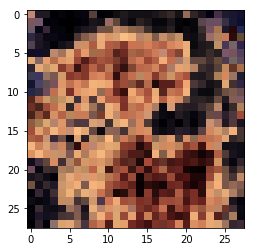

Epoch 1/1... Discriminator Loss: 124.0342... Generator Loss: 15.8381
Epoch 1/1... Discriminator Loss: 7.2618... Generator Loss: 14.0016
Epoch 1/1... Discriminator Loss: 7.2789... Generator Loss: 0.0007


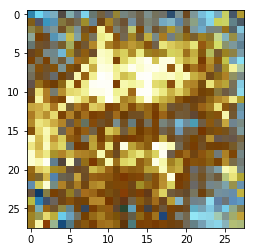

Epoch 1/1... Discriminator Loss: 13.1960... Generator Loss: 4.6628
Epoch 1/1... Discriminator Loss: 0.4390... Generator Loss: 1.4971
Epoch 1/1... Discriminator Loss: 6.0933... Generator Loss: 0.0023


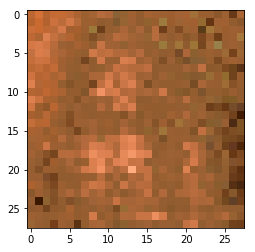

Epoch 1/1... Discriminator Loss: 3.1665... Generator Loss: 0.0431


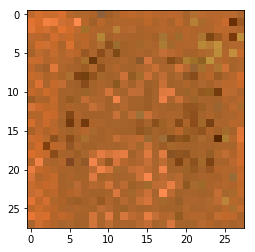

Epoch 1/1... Discriminator Loss: 0.0007... Generator Loss: 7.3278
Epoch 1/1... Discriminator Loss: 0.0404... Generator Loss: 8.4489
Epoch 1/1... Discriminator Loss: 11.6136... Generator Loss: 0.0000


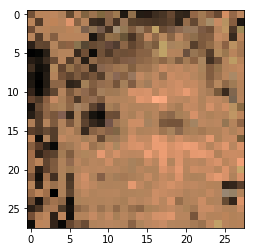

Epoch 1/1... Discriminator Loss: 12.0141... Generator Loss: 0.0000


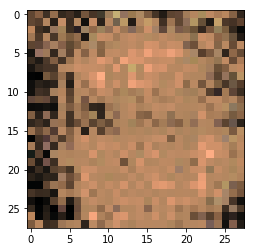

Epoch 1/1... Discriminator Loss: 3.5425... Generator Loss: 0.0296


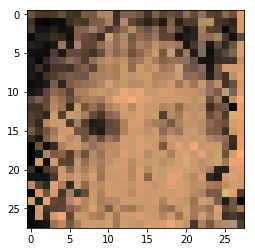

Epoch 1/1... Discriminator Loss: 10.5305... Generator Loss: 10.6507
Epoch 1/1... Discriminator Loss: 6.2825... Generator Loss: 0.0019


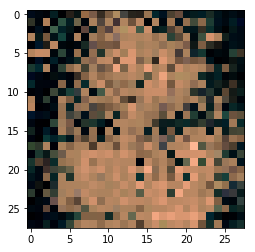

Epoch 1/1... Discriminator Loss: 0.5877... Generator Loss: 0.8577
Epoch 1/1... Discriminator Loss: 5.5232... Generator Loss: 9.9951
Epoch 1/1... Discriminator Loss: 2.1967... Generator Loss: 0.1180
Epoch 1/1... Discriminator Loss: 3.0006... Generator Loss: 3.0768
Epoch 1/1... Discriminator Loss: 0.5565... Generator Loss: 0.8524
Epoch 1/1... Discriminator Loss: 0.9155... Generator Loss: 0.5116
Epoch 1/1... Discriminator Loss: 0.5865... Generator Loss: 0.8151
Epoch 1/1... Discriminator Loss: 0.3694... Generator Loss: 1.4047
Epoch 1/1... Discriminator Loss: 2.5659... Generator Loss: 0.0800


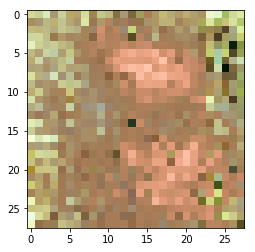

Epoch 1/1... Discriminator Loss: 1.0355... Generator Loss: 0.4640
Epoch 1/1... Discriminator Loss: 1.3390... Generator Loss: 2.8749
Epoch 1/1... Discriminator Loss: 6.9286... Generator Loss: 0.0010


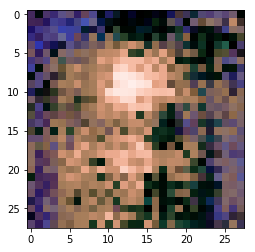

Epoch 1/1... Discriminator Loss: 2.1762... Generator Loss: 2.0049
Epoch 1/1... Discriminator Loss: 1.1516... Generator Loss: 0.6783
Epoch 1/1... Discriminator Loss: 11.0369... Generator Loss: 0.0000


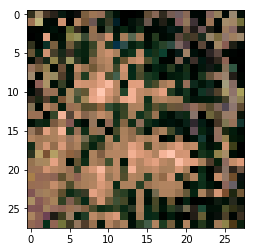

Epoch 1/1... Discriminator Loss: 3.7084... Generator Loss: 0.0542


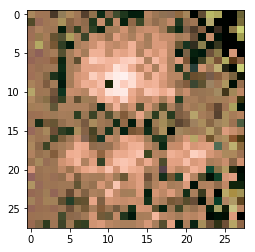

Epoch 1/1... Discriminator Loss: 0.8541... Generator Loss: 0.6745
Epoch 1/1... Discriminator Loss: 3.9990... Generator Loss: 0.0185


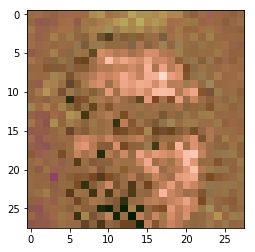

Epoch 1/1... Discriminator Loss: 1.3785... Generator Loss: 0.2903
Epoch 1/1... Discriminator Loss: 1.1580... Generator Loss: 1.3355
Epoch 1/1... Discriminator Loss: 1.1848... Generator Loss: 0.3719
Epoch 1/1... Discriminator Loss: 1.8784... Generator Loss: 0.1677


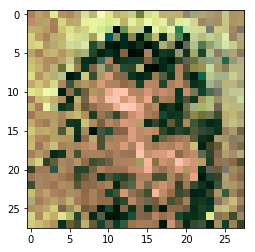

Epoch 1/1... Discriminator Loss: 0.6595... Generator Loss: 0.8389
Epoch 1/1... Discriminator Loss: 2.2136... Generator Loss: 0.1159
Epoch 1/1... Discriminator Loss: 1.0693... Generator Loss: 0.4241
Epoch 1/1... Discriminator Loss: 2.4927... Generator Loss: 0.0867


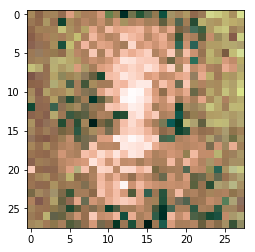

Epoch 1/1... Discriminator Loss: 3.1069... Generator Loss: 7.1390
Epoch 1/1... Discriminator Loss: 0.0141... Generator Loss: 4.3851
Epoch 1/1... Discriminator Loss: 2.3578... Generator Loss: 0.0994


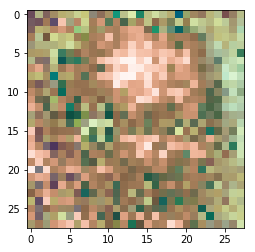

Epoch 1/1... Discriminator Loss: 0.1589... Generator Loss: 2.0133
Epoch 1/1... Discriminator Loss: 0.0664... Generator Loss: 7.4412
Epoch 1/1... Discriminator Loss: 0.0093... Generator Loss: 5.5201
Epoch 1/1... Discriminator Loss: 0.5840... Generator Loss: 0.8157
Epoch 1/1... Discriminator Loss: 3.2749... Generator Loss: 0.0386


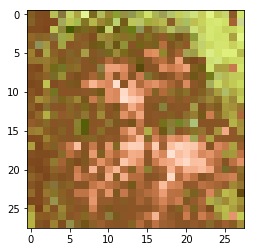

Epoch 1/1... Discriminator Loss: 0.9341... Generator Loss: 0.4991
Epoch 1/1... Discriminator Loss: 0.0156... Generator Loss: 4.1696
Epoch 1/1... Discriminator Loss: 0.0024... Generator Loss: 6.0169
Epoch 1/1... Discriminator Loss: 2.9354... Generator Loss: 0.0546


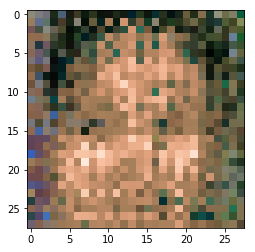

Epoch 1/1... Discriminator Loss: 30.5919... Generator Loss: 16.2882
Epoch 1/1... Discriminator Loss: 0.3113... Generator Loss: 2.7559
Epoch 1/1... Discriminator Loss: 0.8108... Generator Loss: 0.5879
Epoch 1/1... Discriminator Loss: 1.4011... Generator Loss: 0.2835
Epoch 1/1... Discriminator Loss: 1.2722... Generator Loss: 0.3387
Epoch 1/1... Discriminator Loss: 0.7339... Generator Loss: 0.6642
Epoch 1/1... Discriminator Loss: 0.5181... Generator Loss: 0.9188
Epoch 1/1... Discriminator Loss: 0.1958... Generator Loss: 1.8468
Epoch 1/1... Discriminator Loss: 0.1362... Generator Loss: 2.4620
Epoch 1/1... Discriminator Loss: 1.4227... Generator Loss: 0.2759
Epoch 1/1... Discriminator Loss: 1.0745... Generator Loss: 0.4177
Epoch 1/1... Discriminator Loss: 0.5478... Generator Loss: 0.8633
Epoch 1/1... Discriminator Loss: 0.2650... Generator Loss: 1.4585
Epoch 1/1... Discriminator Loss: 0.1066... Generator Loss: 2.2926
Epoch 1/1... Discriminator Loss: 0.2681... Generator Loss: 1.4491
Epoch 1/

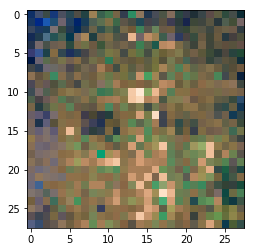

Epoch 1/1... Discriminator Loss: 20.5514... Generator Loss: 12.6435
Epoch 1/1... Discriminator Loss: 0.7520... Generator Loss: 4.5703
Epoch 1/1... Discriminator Loss: 2.9473... Generator Loss: 0.0539


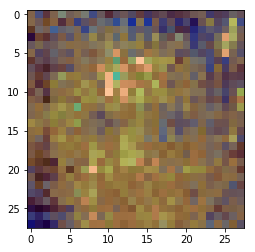

Epoch 1/1... Discriminator Loss: 3.7097... Generator Loss: 0.0248


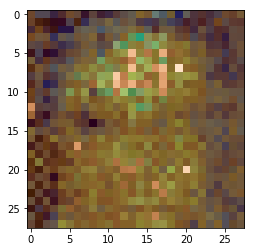

Epoch 1/1... Discriminator Loss: 2.8465... Generator Loss: 0.0598


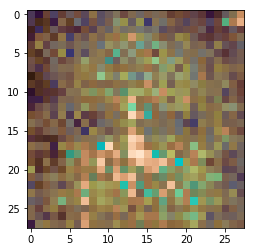

Epoch 1/1... Discriminator Loss: 0.1079... Generator Loss: 2.3332
Epoch 1/1... Discriminator Loss: 0.1261... Generator Loss: 2.4688
Epoch 1/1... Discriminator Loss: 0.4999... Generator Loss: 0.9578
Epoch 1/1... Discriminator Loss: 0.4065... Generator Loss: 1.5972
Epoch 1/1... Discriminator Loss: 0.9517... Generator Loss: 0.4879
Epoch 1/1... Discriminator Loss: 1.5077... Generator Loss: 0.2504
Epoch 1/1... Discriminator Loss: 0.3768... Generator Loss: 1.1586
Epoch 1/1... Discriminator Loss: 0.1044... Generator Loss: 2.3590
Epoch 1/1... Discriminator Loss: 0.0077... Generator Loss: 5.1929
Epoch 1/1... Discriminator Loss: 2.2351... Generator Loss: 0.1135
Epoch 1/1... Discriminator Loss: 2.1130... Generator Loss: 0.1941
Epoch 1/1... Discriminator Loss: 1.0549... Generator Loss: 2.0664
Epoch 1/1... Discriminator Loss: 8.5912... Generator Loss: 0.0002


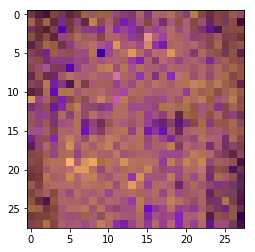

Epoch 1/1... Discriminator Loss: 0.0460... Generator Loss: 3.8867
Epoch 1/1... Discriminator Loss: 0.0358... Generator Loss: 4.8167
Epoch 1/1... Discriminator Loss: 0.2738... Generator Loss: 1.4292
Epoch 1/1... Discriminator Loss: 0.4931... Generator Loss: 0.9435
Epoch 1/1... Discriminator Loss: 0.5159... Generator Loss: 0.9087
Epoch 1/1... Discriminator Loss: 0.0934... Generator Loss: 2.4168
Epoch 1/1... Discriminator Loss: 0.0367... Generator Loss: 3.3232
Epoch 1/1... Discriminator Loss: 0.0308... Generator Loss: 3.4942
Epoch 1/1... Discriminator Loss: 0.0391... Generator Loss: 3.2609
Epoch 1/1... Discriminator Loss: 0.0263... Generator Loss: 3.6499
Epoch 1/1... Discriminator Loss: 0.0219... Generator Loss: 3.8339
Epoch 1/1... Discriminator Loss: 0.0174... Generator Loss: 4.0606
Epoch 1/1... Discriminator Loss: 0.0163... Generator Loss: 4.1217
Epoch 1/1... Discriminator Loss: 0.0226... Generator Loss: 3.7998
Epoch 1/1... Discriminator Loss: 0.0117... Generator Loss: 4.4519
Epoch 1/1.

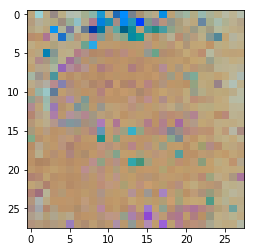

Epoch 1/1... Discriminator Loss: 0.1694... Generator Loss: 1.8589
Epoch 1/1... Discriminator Loss: 0.3023... Generator Loss: 1.3438
Epoch 1/1... Discriminator Loss: 0.0539... Generator Loss: 2.9483
Epoch 1/1... Discriminator Loss: 0.0401... Generator Loss: 3.2374
Epoch 1/1... Discriminator Loss: 0.0548... Generator Loss: 2.9311
Epoch 1/1... Discriminator Loss: 0.0786... Generator Loss: 2.5830
Epoch 1/1... Discriminator Loss: 0.0512... Generator Loss: 2.9972
Epoch 1/1... Discriminator Loss: 0.0438... Generator Loss: 3.1497
Epoch 1/1... Discriminator Loss: 0.0477... Generator Loss: 3.0662
Epoch 1/1... Discriminator Loss: 0.0277... Generator Loss: 3.5996
Epoch 1/1... Discriminator Loss: 0.0158... Generator Loss: 4.1590
Epoch 1/1... Discriminator Loss: 0.0412... Generator Loss: 3.2110
Epoch 1/1... Discriminator Loss: 0.0294... Generator Loss: 3.5406
Epoch 1/1... Discriminator Loss: 0.0553... Generator Loss: 2.9227
Epoch 1/1... Discriminator Loss: 0.0263... Generator Loss: 3.6529
Epoch 1/1.

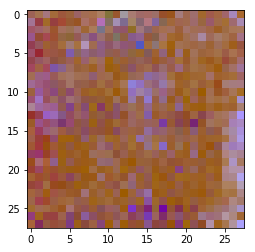

Epoch 1/1... Discriminator Loss: 1.4119... Generator Loss: 14.8889
Epoch 1/1... Discriminator Loss: 0.0066... Generator Loss: 5.5424
Epoch 1/1... Discriminator Loss: 0.0523... Generator Loss: 2.9769
Epoch 1/1... Discriminator Loss: 0.0636... Generator Loss: 2.7873
Epoch 1/1... Discriminator Loss: 0.0441... Generator Loss: 3.1429
Epoch 1/1... Discriminator Loss: 0.1266... Generator Loss: 2.1296
Epoch 1/1... Discriminator Loss: 0.0993... Generator Loss: 2.3591
Epoch 1/1... Discriminator Loss: 0.0633... Generator Loss: 2.7957
Epoch 1/1... Discriminator Loss: 0.0649... Generator Loss: 2.7686
Epoch 1/1... Discriminator Loss: 0.0675... Generator Loss: 2.7308
Epoch 1/1... Discriminator Loss: 0.0316... Generator Loss: 3.4927
Epoch 1/1... Discriminator Loss: 0.0571... Generator Loss: 3.1608
Epoch 1/1... Discriminator Loss: 0.0424... Generator Loss: 3.1822
Epoch 1/1... Discriminator Loss: 0.0391... Generator Loss: 3.2776
Epoch 1/1... Discriminator Loss: 0.0376... Generator Loss: 3.3060
Epoch 1/1

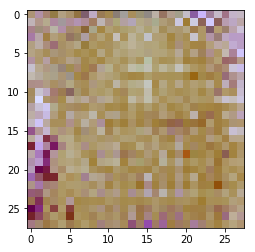

Epoch 1/1... Discriminator Loss: 0.0503... Generator Loss: 3.0157
Epoch 1/1... Discriminator Loss: 0.0104... Generator Loss: 4.5845
Epoch 1/1... Discriminator Loss: 0.0084... Generator Loss: 4.7879
Epoch 1/1... Discriminator Loss: 0.0185... Generator Loss: 4.0113
Epoch 1/1... Discriminator Loss: 0.0279... Generator Loss: 3.5915
Epoch 1/1... Discriminator Loss: 0.0057... Generator Loss: 5.1783
Epoch 1/1... Discriminator Loss: 0.0185... Generator Loss: 4.0011
Epoch 1/1... Discriminator Loss: 0.0096... Generator Loss: 4.6621
Epoch 1/1... Discriminator Loss: 0.0069... Generator Loss: 5.0388
Epoch 1/1... Discriminator Loss: 0.0064... Generator Loss: 5.0573
Epoch 1/1... Discriminator Loss: 0.0030... Generator Loss: 5.8228
Epoch 1/1... Discriminator Loss: 0.0022... Generator Loss: 6.1347
Epoch 1/1... Discriminator Loss: 0.0080... Generator Loss: 4.8326
Epoch 1/1... Discriminator Loss: 0.0179... Generator Loss: 4.6210
Epoch 1/1... Discriminator Loss: 0.0383... Generator Loss: 3.2831
Epoch 1/1.

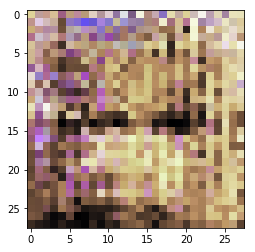

Epoch 1/1... Discriminator Loss: 8.9288... Generator Loss: 0.0002


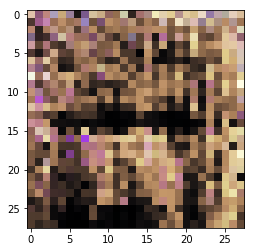

Epoch 1/1... Discriminator Loss: 8.9945... Generator Loss: 16.4890
Epoch 1/1... Discriminator Loss: 0.0045... Generator Loss: 5.4013
Epoch 1/1... Discriminator Loss: 0.8077... Generator Loss: 0.5904
Epoch 1/1... Discriminator Loss: 5.4804... Generator Loss: 0.0042


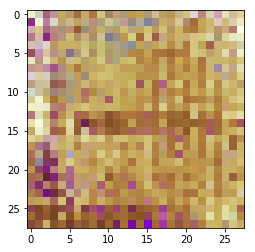

Epoch 1/1... Discriminator Loss: 0.0161... Generator Loss: 4.1385
Epoch 1/1... Discriminator Loss: 0.0009... Generator Loss: 6.9726
Epoch 1/1... Discriminator Loss: 0.0011... Generator Loss: 6.8495
Epoch 1/1... Discriminator Loss: 0.0006... Generator Loss: 7.3680
Epoch 1/1... Discriminator Loss: 0.0015... Generator Loss: 6.5185
Epoch 1/1... Discriminator Loss: 0.0014... Generator Loss: 6.5763
Epoch 1/1... Discriminator Loss: 0.0014... Generator Loss: 6.5977
Epoch 1/1... Discriminator Loss: 0.0057... Generator Loss: 6.3590
Epoch 1/1... Discriminator Loss: 0.0021... Generator Loss: 6.1625
Epoch 1/1... Discriminator Loss: 0.0041... Generator Loss: 5.4962
Epoch 1/1... Discriminator Loss: 0.0029... Generator Loss: 5.8446
Epoch 1/1... Discriminator Loss: 0.0064... Generator Loss: 5.0508
Epoch 1/1... Discriminator Loss: 0.0051... Generator Loss: 5.2806
Epoch 1/1... Discriminator Loss: 0.0031... Generator Loss: 5.7873
Epoch 1/1... Discriminator Loss: 0.0091... Generator Loss: 5.2884
Epoch 1/1.

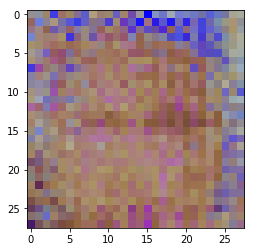

Epoch 1/1... Discriminator Loss: 0.0386... Generator Loss: 3.2746
Epoch 1/1... Discriminator Loss: 0.0412... Generator Loss: 3.2107
Epoch 1/1... Discriminator Loss: 0.0589... Generator Loss: 2.8614
Epoch 1/1... Discriminator Loss: 0.0456... Generator Loss: 3.1311
Epoch 1/1... Discriminator Loss: 0.1412... Generator Loss: 2.0273
Epoch 1/1... Discriminator Loss: 1.0259... Generator Loss: 0.4439
Epoch 1/1... Discriminator Loss: 1.8394... Generator Loss: 0.1951
Epoch 1/1... Discriminator Loss: 14.3452... Generator Loss: 0.0000


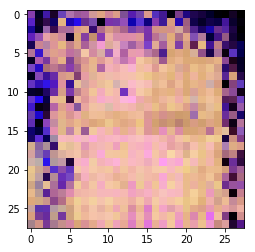

Epoch 1/1... Discriminator Loss: 0.0031... Generator Loss: 5.7903
Epoch 1/1... Discriminator Loss: 0.0285... Generator Loss: 6.4573
Epoch 1/1... Discriminator Loss: 0.0226... Generator Loss: 3.8008
Epoch 1/1... Discriminator Loss: 0.0437... Generator Loss: 3.1585
Epoch 1/1... Discriminator Loss: 0.3230... Generator Loss: 1.2874
Epoch 1/1... Discriminator Loss: 2.0679... Generator Loss: 0.1352
Epoch 1/1... Discriminator Loss: 0.0073... Generator Loss: 4.9201
Epoch 1/1... Discriminator Loss: 0.0209... Generator Loss: 3.8787
Epoch 1/1... Discriminator Loss: 0.0039... Generator Loss: 5.5592
Epoch 1/1... Discriminator Loss: 0.0049... Generator Loss: 5.3187
Epoch 1/1... Discriminator Loss: 0.0276... Generator Loss: 3.6020
Epoch 1/1... Discriminator Loss: 0.0649... Generator Loss: 2.7672
Epoch 1/1... Discriminator Loss: 0.2131... Generator Loss: 1.6506
Epoch 1/1... Discriminator Loss: 0.5698... Generator Loss: 0.8339
Epoch 1/1... Discriminator Loss: 0.9472... Generator Loss: 0.4908
Epoch 1/1.

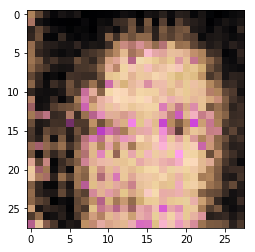

Epoch 1/1... Discriminator Loss: 14.6067... Generator Loss: 10.4960
Epoch 1/1... Discriminator Loss: 2.9005... Generator Loss: 0.0567


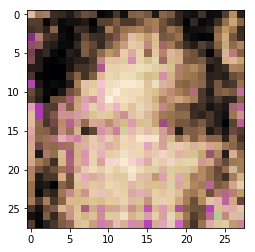

Epoch 1/1... Discriminator Loss: 4.9987... Generator Loss: 0.0068


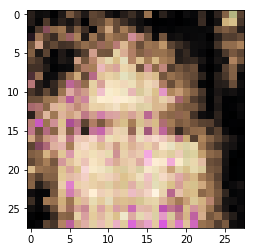

Epoch 1/1... Discriminator Loss: 6.6763... Generator Loss: 7.8824
Epoch 1/1... Discriminator Loss: 1.3073... Generator Loss: 3.2822
Epoch 1/1... Discriminator Loss: 4.1413... Generator Loss: 0.0162


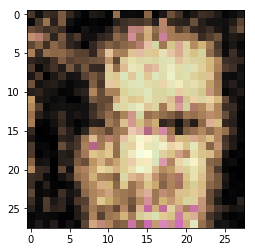

Epoch 1/1... Discriminator Loss: 2.4734... Generator Loss: 0.0939


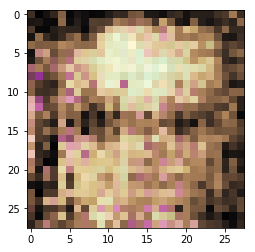

Epoch 1/1... Discriminator Loss: 2.6399... Generator Loss: 0.0785


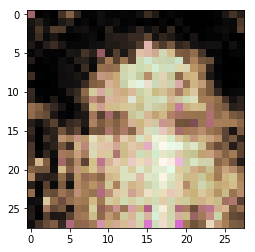

Epoch 1/1... Discriminator Loss: 1.4766... Generator Loss: 1.3483
Epoch 1/1... Discriminator Loss: 0.1424... Generator Loss: 2.1370
Epoch 1/1... Discriminator Loss: 0.0995... Generator Loss: 2.3818
Epoch 1/1... Discriminator Loss: 0.1826... Generator Loss: 1.7950
Epoch 1/1... Discriminator Loss: 0.5904... Generator Loss: 0.8146
Epoch 1/1... Discriminator Loss: 1.6785... Generator Loss: 0.2067
Epoch 1/1... Discriminator Loss: 0.9007... Generator Loss: 0.5241
Epoch 1/1... Discriminator Loss: 0.1198... Generator Loss: 2.1996
Epoch 1/1... Discriminator Loss: 1.0523... Generator Loss: 0.4302
Epoch 1/1... Discriminator Loss: 1.8888... Generator Loss: 0.1709
Epoch 1/1... Discriminator Loss: 5.5888... Generator Loss: 0.0037


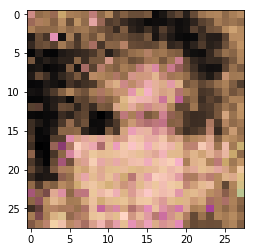

Epoch 1/1... Discriminator Loss: 3.6720... Generator Loss: 6.9641
Epoch 1/1... Discriminator Loss: 0.1822... Generator Loss: 1.8001
Epoch 1/1... Discriminator Loss: 4.8077... Generator Loss: 0.0082


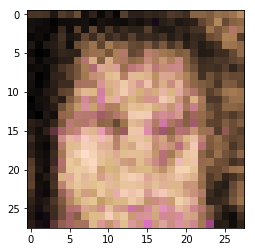

Epoch 1/1... Discriminator Loss: 3.6364... Generator Loss: 7.1084
Epoch 1/1... Discriminator Loss: 1.0385... Generator Loss: 5.4901
Epoch 1/1... Discriminator Loss: 1.2292... Generator Loss: 0.3461
Epoch 1/1... Discriminator Loss: 2.9575... Generator Loss: 0.0534


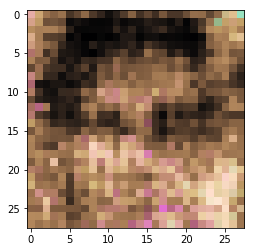

Epoch 1/1... Discriminator Loss: 1.4370... Generator Loss: 0.2757
Epoch 1/1... Discriminator Loss: 0.3068... Generator Loss: 1.4694
Epoch 1/1... Discriminator Loss: 6.0518... Generator Loss: 0.0024


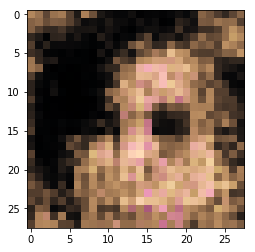

Epoch 1/1... Discriminator Loss: 3.2724... Generator Loss: 5.7983
Epoch 1/1... Discriminator Loss: 0.2788... Generator Loss: 2.5988
Epoch 1/1... Discriminator Loss: 2.4721... Generator Loss: 0.0896


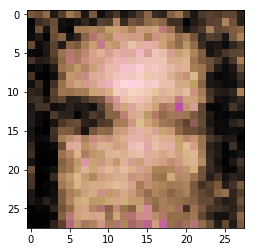

Epoch 1/1... Discriminator Loss: 0.7644... Generator Loss: 2.1089
Epoch 1/1... Discriminator Loss: 2.4665... Generator Loss: 0.0921


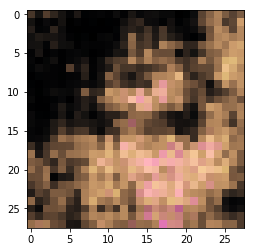

Epoch 1/1... Discriminator Loss: 0.4097... Generator Loss: 1.1482
Epoch 1/1... Discriminator Loss: 0.1004... Generator Loss: 2.8814
Epoch 1/1... Discriminator Loss: 0.1832... Generator Loss: 1.8961
Epoch 1/1... Discriminator Loss: 1.1698... Generator Loss: 0.3852
Epoch 1/1... Discriminator Loss: 3.6756... Generator Loss: 7.5310
Epoch 1/1... Discriminator Loss: 0.1270... Generator Loss: 4.4656
Epoch 1/1... Discriminator Loss: 0.7448... Generator Loss: 0.6459
Epoch 1/1... Discriminator Loss: 1.5590... Generator Loss: 0.2362
Epoch 1/1... Discriminator Loss: 0.9041... Generator Loss: 0.5197
Epoch 1/1... Discriminator Loss: 0.4525... Generator Loss: 1.0176
Epoch 1/1... Discriminator Loss: 0.8131... Generator Loss: 0.6472
Epoch 1/1... Discriminator Loss: 1.3010... Generator Loss: 0.3948
Epoch 1/1... Discriminator Loss: 2.5587... Generator Loss: 0.0971


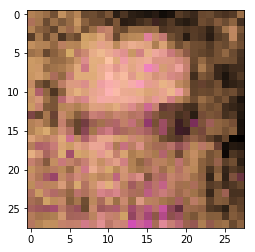

Epoch 1/1... Discriminator Loss: 1.6507... Generator Loss: 1.8496
Epoch 1/1... Discriminator Loss: 4.2230... Generator Loss: 0.0148


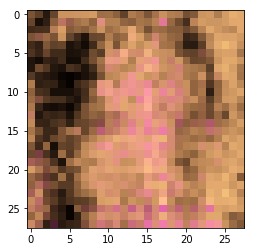

Epoch 1/1... Discriminator Loss: 0.3421... Generator Loss: 4.6866
Epoch 1/1... Discriminator Loss: 0.1579... Generator Loss: 1.9591
Epoch 1/1... Discriminator Loss: 14.6839... Generator Loss: 0.0000


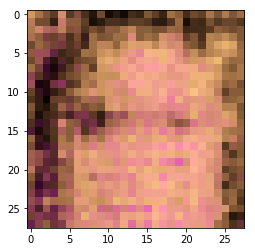

Epoch 1/1... Discriminator Loss: 2.7703... Generator Loss: 8.0663
Epoch 1/1... Discriminator Loss: 0.0109... Generator Loss: 5.8492
Epoch 1/1... Discriminator Loss: 0.0180... Generator Loss: 4.0399
Epoch 1/1... Discriminator Loss: 0.0547... Generator Loss: 2.9327
Epoch 1/1... Discriminator Loss: 0.0928... Generator Loss: 2.4233
Epoch 1/1... Discriminator Loss: 0.1505... Generator Loss: 1.9684
Epoch 1/1... Discriminator Loss: 0.1570... Generator Loss: 1.9289
Epoch 1/1... Discriminator Loss: 0.3794... Generator Loss: 1.1528
Epoch 1/1... Discriminator Loss: 0.0956... Generator Loss: 2.3954
Epoch 1/1... Discriminator Loss: 0.4561... Generator Loss: 3.2010
Epoch 1/1... Discriminator Loss: 0.1647... Generator Loss: 3.2668
Epoch 1/1... Discriminator Loss: 0.6790... Generator Loss: 0.7098
Epoch 1/1... Discriminator Loss: 0.5791... Generator Loss: 1.7672
Epoch 1/1... Discriminator Loss: 4.5507... Generator Loss: 0.0106


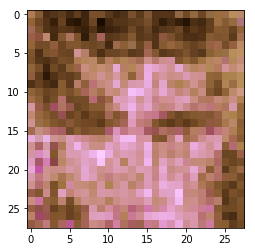

Epoch 1/1... Discriminator Loss: 3.8556... Generator Loss: 6.0957
Epoch 1/1... Discriminator Loss: 0.1930... Generator Loss: 4.1104
Epoch 1/1... Discriminator Loss: 0.6096... Generator Loss: 0.7864
Epoch 1/1... Discriminator Loss: 2.3895... Generator Loss: 0.0981


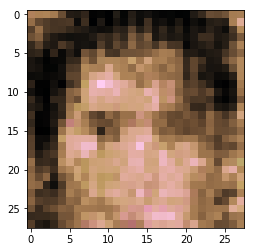

Epoch 1/1... Discriminator Loss: 1.6104... Generator Loss: 0.2230
Epoch 1/1... Discriminator Loss: 0.5893... Generator Loss: 0.8095
Epoch 1/1... Discriminator Loss: 1.6578... Generator Loss: 0.7245
Epoch 1/1... Discriminator Loss: 0.4431... Generator Loss: 1.1585
Epoch 1/1... Discriminator Loss: 1.6244... Generator Loss: 0.2205
Epoch 1/1... Discriminator Loss: 0.3628... Generator Loss: 1.1944
Epoch 1/1... Discriminator Loss: 0.3734... Generator Loss: 1.1659
Epoch 1/1... Discriminator Loss: 10.5525... Generator Loss: 0.0000


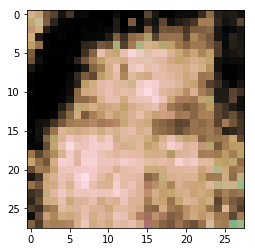

Epoch 1/1... Discriminator Loss: 3.3028... Generator Loss: 9.5269
Epoch 1/1... Discriminator Loss: 0.0669... Generator Loss: 4.2056
Epoch 1/1... Discriminator Loss: 0.3106... Generator Loss: 1.3206
Epoch 1/1... Discriminator Loss: 1.2374... Generator Loss: 0.3427
Epoch 1/1... Discriminator Loss: 1.1169... Generator Loss: 0.3978
Epoch 1/1... Discriminator Loss: 0.8112... Generator Loss: 0.5876
Epoch 1/1... Discriminator Loss: 0.7882... Generator Loss: 0.6063
Epoch 1/1... Discriminator Loss: 1.1456... Generator Loss: 0.4095
Epoch 1/1... Discriminator Loss: 3.8149... Generator Loss: 0.0223


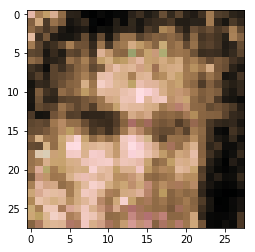

Epoch 1/1... Discriminator Loss: 0.0792... Generator Loss: 2.5866
Epoch 1/1... Discriminator Loss: 2.6482... Generator Loss: 0.0737


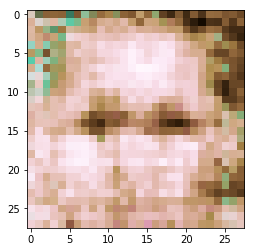

Epoch 1/1... Discriminator Loss: 0.5113... Generator Loss: 5.0922
Epoch 1/1... Discriminator Loss: 0.2396... Generator Loss: 1.5492
Epoch 1/1... Discriminator Loss: 2.0464... Generator Loss: 0.1386
Epoch 1/1... Discriminator Loss: 3.7317... Generator Loss: 0.0242


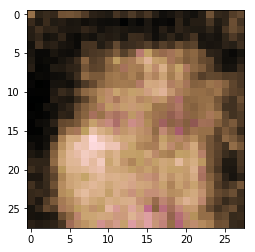

Epoch 1/1... Discriminator Loss: 0.4980... Generator Loss: 1.0369
Epoch 1/1... Discriminator Loss: 0.5168... Generator Loss: 2.5590
Epoch 1/1... Discriminator Loss: 0.2110... Generator Loss: 2.3176
Epoch 1/1... Discriminator Loss: 0.2300... Generator Loss: 1.8442


In [54]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。